In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_descriptor  = pd.read_csv('descriptor_data.csv')
df_descriptor = df_descriptor.drop(['Unnamed: 0', 'index', 'SPS.1'], axis=1)
target_values = pd.read_excel('PI-CW.xlsx')
target_values = target_values['Cut-off wavelength(nm)']

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std = MinMaxScaler()
df_descriptor_s = std.fit_transform(df_descriptor)

In [3]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

sel = VarianceThreshold(threshold=0.01)
X_sel = sel.fit_transform(df_descriptor_s)
feature_index = sel.get_support()

selected_columns = df_descriptor.columns[feature_index]

X_sel_df = pd.DataFrame(X_sel, columns=selected_columns)

print('number of features after remove redundant ones:', sum(feature_index))

number of features after remove redundant ones: 140


In [4]:
y = target_values

In [43]:
from catboost import CatBoostRegressor
from sklearn.feature_selection import SelectFromModel
import pandas as pd


catb2 = CatBoostRegressor()

catb2.fit(X_sel_df, y, verbose=False)


feature_importances = catb2.get_feature_importance()
threshold = 1  
selected_features = X_sel_df.columns[feature_importances > threshold]

X_selected = X_sel_df[selected_features]
X_selected

MaxEStateIndex       SPS  MaxPartialCharge  MinPartialCharge  \
0          0.565673  0.095501          0.834789          0.999905   
1          0.188681  0.075347          0.153965          0.999905   
2          0.184642  0.071317          0.153974          0.997569   
3          0.084575  0.019358          0.153983          0.999907   
4          0.173986  0.088075          0.153971          0.756573   
..              ...       ...               ...               ...   
618        0.432972  0.087374          0.876279          0.176356   
619        0.423459  0.078695          0.876279          0.173421   
620        0.289894  0.084920          0.859516          0.176377   
621        0.283928  0.085992          0.859516          0.173421   
622        0.586313  0.107593          0.859516          0.176377   

     MaxAbsPartialCharge  MinAbsPartialCharge  BCUT2D_MWLOW  BCUT2D_CHGLO  \
0               0.598905             0.259437      0.320372      0.231907   
1               0.000095             0.153965      0.670688      0.727610   
2               0.002431             0.153974      0.670688      0.727784   
3               0.000093             0.153983      0.670878      0.786082   
4               0.243427             0.153971      0.746648      0.760785   
..                   ...                  ...           ...           ...   
618             0.823644             0.876279      0.731428      0.629807   
619             0.826579             0.876279      0.731428      0.629891   
620             0.823623             0.859516      0.737338      0.600984   
621             0.826579             0.859516      0.940898      0.601080   
622             0.823623             0.859516      0.320372      0.231899   

     BCUT2D_LOGPHI  BCUT2D_LOGPLOW  ...  EState_VSA3  VSA_EState8  \
0         0.819759        0.239659  ...     0.420861     0.000000   
1         0.319122        0.856658  ...     0.288254     0.000000   
2         0.288798        0.856207  ...     0.058674     0.000000   
3         0.218737        0.999637  ...     0.058674     0.000000   
4         0.304515        0.855939  ...     0.404771     0.000000   
..             ...             ...  ...          ...          ...   
618       0.514142        0.843392  ...     0.342713     0.194102   
619       0.515450        0.843802  ...     0.342713     0.196800   
620       0.522808        0.832780  ...     0.286850     0.000000   
621       0.531147        0.833237  ...     0.224266     0.000000   
622       0.826878        0.239658  ...     0.312917     0.000000   

     FractionCSP3  NHOHCount  NumHAcceptors  NumSaturatedHeterocycles  \
0        0.068235        0.0          0.000                       0.0   
1        0.000000        0.0          0.000                       0.0   
2        0.000000        0.0          0.125                       0.0   
3        0.000000        0.0          0.125                       0.0   
4        0.000000        1.0          0.250                       0.0   
..            ...        ...            ...                       ...   
618      0.105455        0.0          0.500                       0.0   
619      0.105455        0.0          0.375                       0.0   
620      0.056585        0.0          0.375                       0.0   
621      0.058000        0.0          0.375                       0.0   
622      0.134884        0.0          0.250                       0.0   

     NumSaturatedRings  fr_NH1  fr_bicyclic  fr_para_hydroxylation  
0                  0.0     0.0     0.222222               0.000000  
1                  0.0     0.0     0.222222               0.000000  
2                  0.0     0.0     0.222222               0.000000  
3                  0.0     0.0     0.222222               0.000000  
4                  0.0     1.0     0.444444               0.666667  
..                 ...     ...          ...                    ...  
618                0.0     0.0     0.222222               0.33

In [44]:
X_selected.columns

Index(['MaxEStateIndex', 'SPS', 'MaxPartialCharge', 'MinPartialCharge',
       'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'BCUT2D_MWLOW',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'PEOE_VSA12',
       'PEOE_VSA13', 'SMR_VSA4', 'SMR_VSA5', 'SlogP_VSA4', 'SlogP_VSA6',
       'SlogP_VSA8', 'EState_VSA3', 'VSA_EState8', 'FractionCSP3', 'NHOHCount',
       'NumHAcceptors', 'NumSaturatedHeterocycles', 'NumSaturatedRings',
       'fr_NH1', 'fr_bicyclic', 'fr_para_hydroxylation'],
      dtype='object')

In [5]:
X_selected = df_descriptor[['MaxEStateIndex', 'SPS', 'MaxPartialCharge', 'MinPartialCharge',
       'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'BCUT2D_MWLOW',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'PEOE_VSA12',
       'PEOE_VSA13', 'SMR_VSA4', 'SMR_VSA5', 'SlogP_VSA4', 'SlogP_VSA6',
       'SlogP_VSA8', 'EState_VSA3', 'VSA_EState8', 'FractionCSP3', 'NHOHCount',
       'NumHAcceptors', 'NumSaturatedHeterocycles', 'NumSaturatedRings',
       'fr_NH1', 'fr_bicyclic', 'fr_para_hydroxylation']]
X_selected

MaxEStateIndex        SPS  MaxPartialCharge  MinPartialCharge  \
0         15.055834  14.190476          0.410722         -0.288137   
1         13.659419  13.555556          0.265665         -0.288137   
2         13.644457  13.428571          0.265667         -0.288615   
3         13.273798  11.791667          0.265669         -0.288136   
4         13.604986  13.956522          0.265666         -0.337951   
..              ...        ...               ...               ...   
618       14.564298  13.934426          0.419562         -0.456730   
619       14.529059  13.661017          0.419562         -0.457330   
620       14.034319  13.857143          0.415991         -0.456725   
621       14.012223  13.890909          0.415991         -0.457330   
622       15.132288  14.571429          0.415991         -0.456725   

     MaxAbsPartialCharge  MinAbsPartialCharge  BCUT2D_MWLOW  BCUT2D_CHGLO  \
0               0.410722             0.288137      9.714010     -2.381857   
1               0.288137             0.265665      9.924048     -2.147181   
2               0.288615             0.265667      9.924048     -2.147099   
3               0.288136             0.265669      9.924162     -2.119500   
4               0.337951             0.265666      9.969591     -2.131476   
..                   ...                  ...           ...           ...   
618             0.456730             0.419562      9.960466     -2.193484   
619             0.457330             0.419562      9.960466     -2.193444   
620             0.456725             0.415991      9.964010     -2.207129   
621             0.457330             0.415991     10.086058     -2.207083   
622             0.456725             0.415991      9.714010     -2.381861   

     BCUT2D_LOGPHI  BCUT2D_LOGPLOW  ...  EState_VSA3  VSA_EState8  \
0         2.567104       -2.545222  ...    40.795197     0.000000   
1         2.350060       -2.287223  ...    27.941192     0.000000   
2         2.336913       -2.287411  ...     5.687386     0.000000   
3         2.306540       -2.227436  ...     5.687386     0.000000   
4         2.343727       -2.287523  ...    39.235547     0.000000   
..             ...             ...  ...          ...          ...   
618       2.434608       -2.292770  ...    33.220083     3.403708   
619       2.435175       -2.292598  ...    33.220083     3.451017   
620       2.438365       -2.297207  ...    27.805092     0.000000   
621       2.441981       -2.297016  ...    21.738725     0.000000   
622       2.570191       -2.545222  ...    30.331835     0.000000   

     FractionCSP3  NHOHCount  NumHAcceptors  NumSaturatedHeterocycles  \
0        0.058824          1              4                         0   
1        0.000000          1              4                         0   
2        0.000000          1              5                         0   
3        0.000000          1              5                         0   
4        0.000000          3              6                         0   
..            ...        ...            ...                       ...   
618      0.090909          1              8                         0   
619      0.090909          1              7                         0   
620      0.048780          1              7                         0   
621      0.050000          1              7                         0   
622      0.116279          1              6                         0   

     NumSaturatedRings  fr_NH1  fr_bicyclic  fr_para_hydroxylation  
0                    0       1            2                      0  
1                    0       1            2                      0  
2                    0       1            2                      0  
3                    0       1            2                      0  
4                    0       3            4                      2  
..                 ...     ...          ...                    ...  
618                  0       1            2       

In [46]:
X_selected.to_excel('Feature_importance_catb_27.xlsx', index=False)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2,random_state=1)

In [8]:
from catboost import CatBoostRegressor

catb = CatBoostRegressor()
catb.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

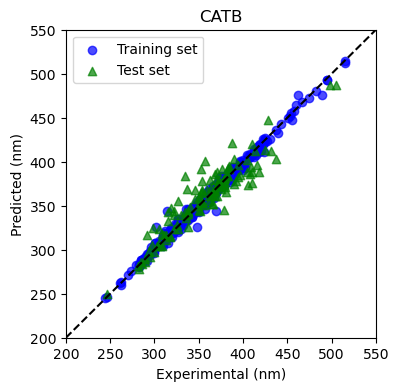

In [49]:
y_train_pred = catb.predict(X_train)
y_test_pred = catb.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Training set', color='blue', marker='o')  # Use different color and marker
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Test set', color='green', marker='^')  # Use different color and marker
plt.plot([200, 550], [200, 550], 'k--')
plt.xlim(200, 550)
plt.ylim(200, 550)
plt.title('CATB')
plt.legend()
plt.xlabel('Experimental (nm)')
plt.ylabel('Predicted (nm)')
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

print('training R = %.3f' % np.sqrt(r2_score(y_train, y_train_pred)))
print('training R2 = %.3f' % r2_score(y_train, y_train_pred))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_train, y_train_pred)))

print('test R = %.3f' % np.sqrt(r2_score(y_test, y_test_pred)))
print('test R2 = %.3f' % r2_score(y_test, y_test_pred))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_test, y_test_pred)))

training R = 0.995
training R2 = 0.990
training RMSE = 4.093
test R = 0.935
test R2 = 0.874
test RMSE = 14.984


In [51]:
# 交叉验证法
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)                        # 分割之前先打乱数据
r2_scores_catb = cross_val_score(catb2, X_selected, y, scoring='r2', cv=crossvalidation)
rmse_scores_catb = cross_val_score(catb2, X_selected,y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
print('Cross-Validation Results:')
print('Folds:%i, mean R: %.3f' %(len(r2_scores_catb), np.sqrt(r2_scores_catb.mean())))
print('Folds:%i, mean R2: %.3f' %(len(r2_scores_catb), r2_scores_catb.mean()))
print('Folds:%i, mean RMSE: %.3f' %(len(rmse_scores_catb), -rmse_scores_catb.mean()))

Learning rate set to 0.037359
0:	learn: 40.8872461	total: 4.17ms	remaining: 4.16s
1:	learn: 40.0576398	total: 7.96ms	remaining: 3.97s
2:	learn: 39.2588439	total: 12.1ms	remaining: 4.02s
3:	learn: 38.5794556	total: 16ms	remaining: 3.99s
4:	learn: 37.8385138	total: 23ms	remaining: 4.58s
5:	learn: 37.1811006	total: 29.4ms	remaining: 4.86s
6:	learn: 36.5406584	total: 32.9ms	remaining: 4.67s
7:	learn: 35.8935974	total: 36.4ms	remaining: 4.51s
8:	learn: 35.2183270	total: 40ms	remaining: 4.4s
9:	learn: 34.6663180	total: 44.3ms	remaining: 4.39s
10:	learn: 34.0968271	total: 48.1ms	remaining: 4.32s
11:	learn: 33.5680791	total: 51.8ms	remaining: 4.27s
12:	learn: 33.0362237	total: 55.3ms	remaining: 4.2s
13:	learn: 32.5113299	total: 59.3ms	remaining: 4.18s
14:	learn: 32.0197897	total: 62.8ms	remaining: 4.12s
15:	learn: 31.5556538	total: 66.2ms	remaining: 4.07s
16:	learn: 31.0771003	total: 69.8ms	remaining: 4.03s
17:	learn: 30.6507897	total: 73.5ms	remaining: 4.01s
18:	learn: 30.2211181	total: 77.3m

179:	learn: 13.3986206	total: 752ms	remaining: 3.43s
180:	learn: 13.3648963	total: 756ms	remaining: 3.42s
181:	learn: 13.3425098	total: 759ms	remaining: 3.41s
182:	learn: 13.3336415	total: 763ms	remaining: 3.4s
183:	learn: 13.3034081	total: 767ms	remaining: 3.4s
184:	learn: 13.2630887	total: 770ms	remaining: 3.39s
185:	learn: 13.2379246	total: 775ms	remaining: 3.39s
186:	learn: 13.1911858	total: 778ms	remaining: 3.38s
187:	learn: 13.1649016	total: 783ms	remaining: 3.38s
188:	learn: 13.1339692	total: 787ms	remaining: 3.38s
189:	learn: 13.1145622	total: 791ms	remaining: 3.37s
190:	learn: 13.0729997	total: 795ms	remaining: 3.37s
191:	learn: 13.0352833	total: 798ms	remaining: 3.36s
192:	learn: 13.0090884	total: 802ms	remaining: 3.35s
193:	learn: 12.9793709	total: 806ms	remaining: 3.35s
194:	learn: 12.9342591	total: 809ms	remaining: 3.34s
195:	learn: 12.8995269	total: 813ms	remaining: 3.33s
196:	learn: 12.8523544	total: 817ms	remaining: 3.33s
197:	learn: 12.8110761	total: 821ms	remaining: 3

375:	learn: 9.3607708	total: 1.54s	remaining: 2.55s
376:	learn: 9.3581283	total: 1.54s	remaining: 2.54s
377:	learn: 9.3510518	total: 1.54s	remaining: 2.54s
378:	learn: 9.3410095	total: 1.55s	remaining: 2.54s
379:	learn: 9.3246794	total: 1.55s	remaining: 2.53s
380:	learn: 9.3198376	total: 1.55s	remaining: 2.53s
381:	learn: 9.2932286	total: 1.56s	remaining: 2.52s
382:	learn: 9.2877676	total: 1.56s	remaining: 2.52s
383:	learn: 9.2678457	total: 1.57s	remaining: 2.52s
384:	learn: 9.2538852	total: 1.57s	remaining: 2.51s
385:	learn: 9.2309685	total: 1.58s	remaining: 2.51s
386:	learn: 9.2133003	total: 1.58s	remaining: 2.5s
387:	learn: 9.2110968	total: 1.58s	remaining: 2.5s
388:	learn: 9.1842772	total: 1.59s	remaining: 2.49s
389:	learn: 9.1588144	total: 1.59s	remaining: 2.49s
390:	learn: 9.1372852	total: 1.59s	remaining: 2.48s
391:	learn: 9.1136137	total: 1.6s	remaining: 2.48s
392:	learn: 9.1074058	total: 1.6s	remaining: 2.48s
393:	learn: 9.1019692	total: 1.61s	remaining: 2.47s
394:	learn: 9.07

569:	learn: 7.3868698	total: 2.32s	remaining: 1.75s
570:	learn: 7.3778998	total: 2.32s	remaining: 1.75s
571:	learn: 7.3673491	total: 2.33s	remaining: 1.74s
572:	learn: 7.3657886	total: 2.33s	remaining: 1.74s
573:	learn: 7.3642512	total: 2.33s	remaining: 1.73s
574:	learn: 7.3528315	total: 2.34s	remaining: 1.73s
575:	learn: 7.3472119	total: 2.34s	remaining: 1.72s
576:	learn: 7.3362270	total: 2.35s	remaining: 1.72s
577:	learn: 7.3355210	total: 2.35s	remaining: 1.72s
578:	learn: 7.3347596	total: 2.35s	remaining: 1.71s
579:	learn: 7.3190693	total: 2.36s	remaining: 1.71s
580:	learn: 7.3129011	total: 2.36s	remaining: 1.7s
581:	learn: 7.3118639	total: 2.37s	remaining: 1.7s
582:	learn: 7.3000948	total: 2.37s	remaining: 1.7s
583:	learn: 7.2858180	total: 2.37s	remaining: 1.69s
584:	learn: 7.2774628	total: 2.38s	remaining: 1.69s
585:	learn: 7.2718082	total: 2.38s	remaining: 1.68s
586:	learn: 7.2612570	total: 2.38s	remaining: 1.68s
587:	learn: 7.2605474	total: 2.39s	remaining: 1.67s
588:	learn: 7.2

764:	learn: 6.0958308	total: 3.1s	remaining: 951ms
765:	learn: 6.0931680	total: 3.1s	remaining: 947ms
766:	learn: 6.0892882	total: 3.1s	remaining: 943ms
767:	learn: 6.0808394	total: 3.11s	remaining: 939ms
768:	learn: 6.0711147	total: 3.11s	remaining: 935ms
769:	learn: 6.0670671	total: 3.12s	remaining: 931ms
770:	learn: 6.0636819	total: 3.12s	remaining: 927ms
771:	learn: 6.0612276	total: 3.12s	remaining: 923ms
772:	learn: 6.0591185	total: 3.13s	remaining: 919ms
773:	learn: 6.0498344	total: 3.13s	remaining: 915ms
774:	learn: 6.0458790	total: 3.14s	remaining: 911ms
775:	learn: 6.0421296	total: 3.14s	remaining: 907ms
776:	learn: 6.0354164	total: 3.14s	remaining: 902ms
777:	learn: 6.0290595	total: 3.15s	remaining: 898ms
778:	learn: 6.0221070	total: 3.15s	remaining: 894ms
779:	learn: 6.0187746	total: 3.15s	remaining: 890ms
780:	learn: 6.0111769	total: 3.16s	remaining: 886ms
781:	learn: 6.0022418	total: 3.16s	remaining: 881ms
782:	learn: 6.0009212	total: 3.17s	remaining: 877ms
783:	learn: 5.9

958:	learn: 5.1026248	total: 3.86s	remaining: 165ms
959:	learn: 5.0962024	total: 3.87s	remaining: 161ms
960:	learn: 5.0908151	total: 3.87s	remaining: 157ms
961:	learn: 5.0820248	total: 3.88s	remaining: 153ms
962:	learn: 5.0784370	total: 3.88s	remaining: 149ms
963:	learn: 5.0735305	total: 3.88s	remaining: 145ms
964:	learn: 5.0695448	total: 3.89s	remaining: 141ms
965:	learn: 5.0654003	total: 3.89s	remaining: 137ms
966:	learn: 5.0645361	total: 3.9s	remaining: 133ms
967:	learn: 5.0618405	total: 3.9s	remaining: 129ms
968:	learn: 5.0570356	total: 3.9s	remaining: 125ms
969:	learn: 5.0565628	total: 3.91s	remaining: 121ms
970:	learn: 5.0519709	total: 3.91s	remaining: 117ms
971:	learn: 5.0493524	total: 3.91s	remaining: 113ms
972:	learn: 5.0471414	total: 3.92s	remaining: 109ms
973:	learn: 5.0457323	total: 3.92s	remaining: 105ms
974:	learn: 5.0436936	total: 3.93s	remaining: 101ms
975:	learn: 5.0405621	total: 3.93s	remaining: 96.7ms
976:	learn: 5.0369565	total: 3.94s	remaining: 92.7ms
977:	learn: 5

144:	learn: 14.7731323	total: 577ms	remaining: 3.4s
145:	learn: 14.7211323	total: 581ms	remaining: 3.4s
146:	learn: 14.6714793	total: 585ms	remaining: 3.4s
147:	learn: 14.6385285	total: 589ms	remaining: 3.39s
148:	learn: 14.5978954	total: 593ms	remaining: 3.39s
149:	learn: 14.5606521	total: 597ms	remaining: 3.38s
150:	learn: 14.5199684	total: 601ms	remaining: 3.38s
151:	learn: 14.5050923	total: 608ms	remaining: 3.39s
152:	learn: 14.4606818	total: 612ms	remaining: 3.39s
153:	learn: 14.4247446	total: 617ms	remaining: 3.39s
154:	learn: 14.3769225	total: 622ms	remaining: 3.39s
155:	learn: 14.3360210	total: 626ms	remaining: 3.39s
156:	learn: 14.3186844	total: 631ms	remaining: 3.39s
157:	learn: 14.2653360	total: 635ms	remaining: 3.38s
158:	learn: 14.2374181	total: 639ms	remaining: 3.38s
159:	learn: 14.2128135	total: 644ms	remaining: 3.38s
160:	learn: 14.1897086	total: 648ms	remaining: 3.38s
161:	learn: 14.1387133	total: 652ms	remaining: 3.37s
162:	learn: 14.1020353	total: 656ms	remaining: 3.

327:	learn: 9.9108893	total: 1.33s	remaining: 2.73s
328:	learn: 9.9041832	total: 1.34s	remaining: 2.73s
329:	learn: 9.8935921	total: 1.34s	remaining: 2.72s
330:	learn: 9.8783009	total: 1.34s	remaining: 2.72s
331:	learn: 9.8605517	total: 1.35s	remaining: 2.71s
332:	learn: 9.8498697	total: 1.35s	remaining: 2.71s
333:	learn: 9.8228608	total: 1.35s	remaining: 2.7s
334:	learn: 9.8035592	total: 1.36s	remaining: 2.7s
335:	learn: 9.7931229	total: 1.36s	remaining: 2.69s
336:	learn: 9.7775846	total: 1.37s	remaining: 2.69s
337:	learn: 9.7516681	total: 1.37s	remaining: 2.68s
338:	learn: 9.7320316	total: 1.38s	remaining: 2.68s
339:	learn: 9.7014324	total: 1.38s	remaining: 2.68s
340:	learn: 9.6706724	total: 1.39s	remaining: 2.68s
341:	learn: 9.6538726	total: 1.4s	remaining: 2.69s
342:	learn: 9.6479837	total: 1.4s	remaining: 2.69s
343:	learn: 9.6422503	total: 1.41s	remaining: 2.69s
344:	learn: 9.6218033	total: 1.41s	remaining: 2.68s
345:	learn: 9.6006799	total: 1.42s	remaining: 2.68s
346:	learn: 9.58

509:	learn: 7.8385047	total: 2.1s	remaining: 2.02s
510:	learn: 7.8375632	total: 2.11s	remaining: 2.02s
511:	learn: 7.8235264	total: 2.11s	remaining: 2.01s
512:	learn: 7.8037466	total: 2.11s	remaining: 2.01s
513:	learn: 7.7938395	total: 2.12s	remaining: 2s
514:	learn: 7.7835455	total: 2.12s	remaining: 2s
515:	learn: 7.7782367	total: 2.13s	remaining: 2s
516:	learn: 7.7637968	total: 2.13s	remaining: 1.99s
517:	learn: 7.7592505	total: 2.13s	remaining: 1.99s
518:	learn: 7.7537247	total: 2.14s	remaining: 1.98s
519:	learn: 7.7463601	total: 2.14s	remaining: 1.98s
520:	learn: 7.7439606	total: 2.15s	remaining: 1.97s
521:	learn: 7.7433962	total: 2.15s	remaining: 1.97s
522:	learn: 7.7323146	total: 2.15s	remaining: 1.96s
523:	learn: 7.7309894	total: 2.16s	remaining: 1.96s
524:	learn: 7.7303560	total: 2.16s	remaining: 1.95s
525:	learn: 7.7289745	total: 2.16s	remaining: 1.95s
526:	learn: 7.7150507	total: 2.17s	remaining: 1.95s
527:	learn: 7.7057522	total: 2.17s	remaining: 1.94s
528:	learn: 7.7033175	

693:	learn: 6.5333446	total: 2.87s	remaining: 1.26s
694:	learn: 6.5226277	total: 2.87s	remaining: 1.26s
695:	learn: 6.5219643	total: 2.88s	remaining: 1.26s
696:	learn: 6.5135698	total: 2.88s	remaining: 1.25s
697:	learn: 6.5054276	total: 2.89s	remaining: 1.25s
698:	learn: 6.5051138	total: 2.89s	remaining: 1.24s
699:	learn: 6.4996496	total: 2.89s	remaining: 1.24s
700:	learn: 6.4877671	total: 2.9s	remaining: 1.24s
701:	learn: 6.4758692	total: 2.9s	remaining: 1.23s
702:	learn: 6.4752264	total: 2.91s	remaining: 1.23s
703:	learn: 6.4717596	total: 2.91s	remaining: 1.22s
704:	learn: 6.4626019	total: 2.91s	remaining: 1.22s
705:	learn: 6.4619298	total: 2.92s	remaining: 1.22s
706:	learn: 6.4510380	total: 2.92s	remaining: 1.21s
707:	learn: 6.4438276	total: 2.93s	remaining: 1.21s
708:	learn: 6.4434171	total: 2.93s	remaining: 1.2s
709:	learn: 6.4351321	total: 2.94s	remaining: 1.2s
710:	learn: 6.4282863	total: 2.94s	remaining: 1.2s
711:	learn: 6.4223698	total: 2.94s	remaining: 1.19s
712:	learn: 6.415

882:	learn: 5.5277709	total: 3.65s	remaining: 484ms
883:	learn: 5.5208001	total: 3.65s	remaining: 480ms
884:	learn: 5.5114912	total: 3.66s	remaining: 475ms
885:	learn: 5.5086629	total: 3.66s	remaining: 471ms
886:	learn: 5.5061452	total: 3.67s	remaining: 467ms
887:	learn: 5.4977173	total: 3.67s	remaining: 463ms
888:	learn: 5.4959689	total: 3.67s	remaining: 459ms
889:	learn: 5.4938384	total: 3.68s	remaining: 455ms
890:	learn: 5.4893563	total: 3.68s	remaining: 450ms
891:	learn: 5.4877587	total: 3.69s	remaining: 446ms
892:	learn: 5.4809439	total: 3.69s	remaining: 442ms
893:	learn: 5.4729808	total: 3.69s	remaining: 438ms
894:	learn: 5.4670553	total: 3.7s	remaining: 434ms
895:	learn: 5.4626431	total: 3.7s	remaining: 430ms
896:	learn: 5.4557044	total: 3.71s	remaining: 426ms
897:	learn: 5.4523928	total: 3.71s	remaining: 422ms
898:	learn: 5.4468453	total: 3.72s	remaining: 418ms
899:	learn: 5.4355531	total: 3.72s	remaining: 413ms
900:	learn: 5.4310026	total: 3.73s	remaining: 409ms
901:	learn: 5.

51:	learn: 20.9677927	total: 203ms	remaining: 3.7s
52:	learn: 20.8016051	total: 207ms	remaining: 3.71s
53:	learn: 20.6714249	total: 212ms	remaining: 3.71s
54:	learn: 20.4920965	total: 216ms	remaining: 3.7s
55:	learn: 20.3444521	total: 221ms	remaining: 3.72s
56:	learn: 20.1918777	total: 225ms	remaining: 3.71s
57:	learn: 20.0235045	total: 228ms	remaining: 3.7s
58:	learn: 19.8464242	total: 233ms	remaining: 3.71s
59:	learn: 19.7539884	total: 236ms	remaining: 3.7s
60:	learn: 19.6013502	total: 240ms	remaining: 3.7s
61:	learn: 19.4841977	total: 244ms	remaining: 3.7s
62:	learn: 19.3782382	total: 249ms	remaining: 3.7s
63:	learn: 19.2744555	total: 253ms	remaining: 3.7s
64:	learn: 19.1706842	total: 257ms	remaining: 3.7s
65:	learn: 19.0194601	total: 261ms	remaining: 3.69s
66:	learn: 18.9374175	total: 264ms	remaining: 3.68s
67:	learn: 18.8342854	total: 268ms	remaining: 3.67s
68:	learn: 18.7416622	total: 272ms	remaining: 3.67s
69:	learn: 18.6487268	total: 275ms	remaining: 3.65s
70:	learn: 18.5448357

236:	learn: 11.2915407	total: 985ms	remaining: 3.17s
237:	learn: 11.2518544	total: 989ms	remaining: 3.17s
238:	learn: 11.2219698	total: 993ms	remaining: 3.16s
239:	learn: 11.2017814	total: 997ms	remaining: 3.16s
240:	learn: 11.1972590	total: 1s	remaining: 3.15s
241:	learn: 11.1779022	total: 1s	remaining: 3.15s
242:	learn: 11.1465185	total: 1.01s	remaining: 3.14s
243:	learn: 11.1425475	total: 1.01s	remaining: 3.14s
244:	learn: 11.1265050	total: 1.02s	remaining: 3.14s
245:	learn: 11.0968048	total: 1.02s	remaining: 3.14s
246:	learn: 11.0664794	total: 1.03s	remaining: 3.14s
247:	learn: 11.0508312	total: 1.03s	remaining: 3.14s
248:	learn: 11.0189510	total: 1.04s	remaining: 3.13s
249:	learn: 10.9898905	total: 1.04s	remaining: 3.13s
250:	learn: 10.9826150	total: 1.04s	remaining: 3.12s
251:	learn: 10.9524549	total: 1.05s	remaining: 3.12s
252:	learn: 10.9269389	total: 1.06s	remaining: 3.12s
253:	learn: 10.9058620	total: 1.06s	remaining: 3.12s
254:	learn: 10.8780204	total: 1.07s	remaining: 3.12s

422:	learn: 8.2089833	total: 1.76s	remaining: 2.4s
423:	learn: 8.2050913	total: 1.76s	remaining: 2.39s
424:	learn: 8.1967935	total: 1.76s	remaining: 2.39s
425:	learn: 8.1907993	total: 1.77s	remaining: 2.38s
426:	learn: 8.1817279	total: 1.77s	remaining: 2.38s
427:	learn: 8.1673814	total: 1.78s	remaining: 2.37s
428:	learn: 8.1601553	total: 1.78s	remaining: 2.37s
429:	learn: 8.1497242	total: 1.78s	remaining: 2.37s
430:	learn: 8.1412678	total: 1.79s	remaining: 2.36s
431:	learn: 8.1357093	total: 1.79s	remaining: 2.36s
432:	learn: 8.1347005	total: 1.8s	remaining: 2.35s
433:	learn: 8.1220035	total: 1.8s	remaining: 2.35s
434:	learn: 8.1104375	total: 1.8s	remaining: 2.35s
435:	learn: 8.1082673	total: 1.81s	remaining: 2.34s
436:	learn: 8.1062314	total: 1.81s	remaining: 2.33s
437:	learn: 8.0900516	total: 1.82s	remaining: 2.33s
438:	learn: 8.0769072	total: 1.82s	remaining: 2.33s
439:	learn: 8.0744312	total: 1.82s	remaining: 2.32s
440:	learn: 8.0719327	total: 1.83s	remaining: 2.32s
441:	learn: 8.06

598:	learn: 6.7707355	total: 2.54s	remaining: 1.7s
599:	learn: 6.7638339	total: 2.54s	remaining: 1.7s
600:	learn: 6.7532486	total: 2.55s	remaining: 1.69s
601:	learn: 6.7413698	total: 2.55s	remaining: 1.69s
602:	learn: 6.7395588	total: 2.56s	remaining: 1.68s
603:	learn: 6.7381714	total: 2.56s	remaining: 1.68s
604:	learn: 6.7371467	total: 2.57s	remaining: 1.68s
605:	learn: 6.7301938	total: 2.57s	remaining: 1.67s
606:	learn: 6.7282954	total: 2.58s	remaining: 1.67s
607:	learn: 6.7265363	total: 2.58s	remaining: 1.67s
608:	learn: 6.7170211	total: 2.59s	remaining: 1.66s
609:	learn: 6.7163290	total: 2.59s	remaining: 1.66s
610:	learn: 6.7159215	total: 2.6s	remaining: 1.65s
611:	learn: 6.7112175	total: 2.6s	remaining: 1.65s
612:	learn: 6.7095473	total: 2.6s	remaining: 1.64s
613:	learn: 6.7078086	total: 2.61s	remaining: 1.64s
614:	learn: 6.7014950	total: 2.61s	remaining: 1.64s
615:	learn: 6.6885604	total: 2.62s	remaining: 1.63s
616:	learn: 6.6809667	total: 2.62s	remaining: 1.63s
617:	learn: 6.678

776:	learn: 5.8078316	total: 3.29s	remaining: 944ms
777:	learn: 5.8008878	total: 3.29s	remaining: 940ms
778:	learn: 5.7947731	total: 3.3s	remaining: 936ms
779:	learn: 5.7891455	total: 3.3s	remaining: 932ms
780:	learn: 5.7823599	total: 3.31s	remaining: 927ms
781:	learn: 5.7747662	total: 3.31s	remaining: 923ms
782:	learn: 5.7743364	total: 3.31s	remaining: 919ms
783:	learn: 5.7670990	total: 3.32s	remaining: 915ms
784:	learn: 5.7575848	total: 3.33s	remaining: 911ms
785:	learn: 5.7550579	total: 3.33s	remaining: 907ms
786:	learn: 5.7470155	total: 3.34s	remaining: 903ms
787:	learn: 5.7467321	total: 3.34s	remaining: 899ms
788:	learn: 5.7457615	total: 3.35s	remaining: 895ms
789:	learn: 5.7410183	total: 3.35s	remaining: 891ms
790:	learn: 5.7365900	total: 3.35s	remaining: 886ms
791:	learn: 5.7362047	total: 3.36s	remaining: 882ms
792:	learn: 5.7322887	total: 3.36s	remaining: 878ms
793:	learn: 5.7312305	total: 3.37s	remaining: 873ms
794:	learn: 5.7245121	total: 3.37s	remaining: 869ms
795:	learn: 5.

958:	learn: 5.0380315	total: 4.06s	remaining: 174ms
959:	learn: 5.0336757	total: 4.06s	remaining: 169ms
960:	learn: 5.0302017	total: 4.07s	remaining: 165ms
961:	learn: 5.0260320	total: 4.07s	remaining: 161ms
962:	learn: 5.0257406	total: 4.08s	remaining: 157ms
963:	learn: 5.0255566	total: 4.08s	remaining: 152ms
964:	learn: 5.0212224	total: 4.08s	remaining: 148ms
965:	learn: 5.0209592	total: 4.09s	remaining: 144ms
966:	learn: 5.0182144	total: 4.09s	remaining: 140ms
967:	learn: 5.0136704	total: 4.1s	remaining: 135ms
968:	learn: 5.0115905	total: 4.1s	remaining: 131ms
969:	learn: 5.0092595	total: 4.11s	remaining: 127ms
970:	learn: 5.0059066	total: 4.11s	remaining: 123ms
971:	learn: 5.0056093	total: 4.12s	remaining: 119ms
972:	learn: 5.0033171	total: 4.12s	remaining: 114ms
973:	learn: 5.0004005	total: 4.12s	remaining: 110ms
974:	learn: 4.9957902	total: 4.13s	remaining: 106ms
975:	learn: 4.9907451	total: 4.13s	remaining: 102ms
976:	learn: 4.9885325	total: 4.14s	remaining: 97.4ms
977:	learn: 4

137:	learn: 14.8352716	total: 560ms	remaining: 3.5s
138:	learn: 14.7806068	total: 564ms	remaining: 3.5s
139:	learn: 14.7587741	total: 570ms	remaining: 3.5s
140:	learn: 14.7109871	total: 574ms	remaining: 3.5s
141:	learn: 14.6702725	total: 578ms	remaining: 3.49s
142:	learn: 14.6439158	total: 582ms	remaining: 3.49s
143:	learn: 14.5988788	total: 586ms	remaining: 3.48s
144:	learn: 14.5633587	total: 590ms	remaining: 3.48s
145:	learn: 14.5214312	total: 594ms	remaining: 3.48s
146:	learn: 14.4957309	total: 598ms	remaining: 3.47s
147:	learn: 14.4519387	total: 602ms	remaining: 3.46s
148:	learn: 14.4195133	total: 605ms	remaining: 3.45s
149:	learn: 14.3754978	total: 609ms	remaining: 3.45s
150:	learn: 14.3399602	total: 613ms	remaining: 3.44s
151:	learn: 14.3106744	total: 617ms	remaining: 3.44s
152:	learn: 14.2543560	total: 621ms	remaining: 3.44s
153:	learn: 14.1924824	total: 625ms	remaining: 3.43s
154:	learn: 14.1584612	total: 628ms	remaining: 3.42s
155:	learn: 14.1096667	total: 632ms	remaining: 3.4

334:	learn: 9.5373610	total: 1.35s	remaining: 2.68s
335:	learn: 9.5291401	total: 1.36s	remaining: 2.68s
336:	learn: 9.5092438	total: 1.36s	remaining: 2.68s
337:	learn: 9.4974994	total: 1.36s	remaining: 2.67s
338:	learn: 9.4827523	total: 1.37s	remaining: 2.67s
339:	learn: 9.4707819	total: 1.37s	remaining: 2.67s
340:	learn: 9.4649445	total: 1.38s	remaining: 2.66s
341:	learn: 9.4496557	total: 1.38s	remaining: 2.66s
342:	learn: 9.4405907	total: 1.39s	remaining: 2.66s
343:	learn: 9.4176461	total: 1.39s	remaining: 2.65s
344:	learn: 9.3935770	total: 1.39s	remaining: 2.65s
345:	learn: 9.3847176	total: 1.4s	remaining: 2.64s
346:	learn: 9.3624863	total: 1.4s	remaining: 2.64s
347:	learn: 9.3574540	total: 1.41s	remaining: 2.63s
348:	learn: 9.3341615	total: 1.41s	remaining: 2.63s
349:	learn: 9.3235195	total: 1.41s	remaining: 2.63s
350:	learn: 9.2973580	total: 1.42s	remaining: 2.62s
351:	learn: 9.2952799	total: 1.42s	remaining: 2.62s
352:	learn: 9.2877715	total: 1.43s	remaining: 2.62s
353:	learn: 9.

516:	learn: 7.4537784	total: 2.12s	remaining: 1.98s
517:	learn: 7.4531922	total: 2.12s	remaining: 1.98s
518:	learn: 7.4458812	total: 2.13s	remaining: 1.97s
519:	learn: 7.4321738	total: 2.13s	remaining: 1.97s
520:	learn: 7.4176564	total: 2.13s	remaining: 1.96s
521:	learn: 7.4077750	total: 2.14s	remaining: 1.96s
522:	learn: 7.4044357	total: 2.14s	remaining: 1.95s
523:	learn: 7.3944062	total: 2.15s	remaining: 1.95s
524:	learn: 7.3854708	total: 2.15s	remaining: 1.95s
525:	learn: 7.3786074	total: 2.15s	remaining: 1.94s
526:	learn: 7.3655135	total: 2.16s	remaining: 1.94s
527:	learn: 7.3646733	total: 2.16s	remaining: 1.93s
528:	learn: 7.3484221	total: 2.17s	remaining: 1.93s
529:	learn: 7.3459680	total: 2.17s	remaining: 1.92s
530:	learn: 7.3407489	total: 2.17s	remaining: 1.92s
531:	learn: 7.3366298	total: 2.18s	remaining: 1.92s
532:	learn: 7.3248065	total: 2.18s	remaining: 1.91s
533:	learn: 7.3112391	total: 2.19s	remaining: 1.91s
534:	learn: 7.3010409	total: 2.19s	remaining: 1.9s
535:	learn: 7

694:	learn: 6.1980103	total: 2.89s	remaining: 1.27s
695:	learn: 6.1931916	total: 2.9s	remaining: 1.27s
696:	learn: 6.1880823	total: 2.9s	remaining: 1.26s
697:	learn: 6.1758446	total: 2.91s	remaining: 1.26s
698:	learn: 6.1733154	total: 2.91s	remaining: 1.25s
699:	learn: 6.1726986	total: 2.92s	remaining: 1.25s
700:	learn: 6.1606995	total: 2.92s	remaining: 1.25s
701:	learn: 6.1564735	total: 2.92s	remaining: 1.24s
702:	learn: 6.1516470	total: 2.93s	remaining: 1.24s
703:	learn: 6.1458764	total: 2.93s	remaining: 1.23s
704:	learn: 6.1453542	total: 2.94s	remaining: 1.23s
705:	learn: 6.1384452	total: 2.94s	remaining: 1.22s
706:	learn: 6.1381620	total: 2.94s	remaining: 1.22s
707:	learn: 6.1296385	total: 2.95s	remaining: 1.22s
708:	learn: 6.1281002	total: 2.95s	remaining: 1.21s
709:	learn: 6.1238199	total: 2.95s	remaining: 1.21s
710:	learn: 6.1111439	total: 2.96s	remaining: 1.2s
711:	learn: 6.1045206	total: 2.96s	remaining: 1.2s
712:	learn: 6.0968732	total: 2.97s	remaining: 1.19s
713:	learn: 6.08

871:	learn: 5.2717583	total: 3.68s	remaining: 540ms
872:	learn: 5.2690901	total: 3.69s	remaining: 536ms
873:	learn: 5.2613886	total: 3.69s	remaining: 532ms
874:	learn: 5.2532324	total: 3.69s	remaining: 528ms
875:	learn: 5.2442859	total: 3.7s	remaining: 523ms
876:	learn: 5.2425355	total: 3.7s	remaining: 519ms
877:	learn: 5.2390880	total: 3.7s	remaining: 515ms
878:	learn: 5.2371171	total: 3.71s	remaining: 510ms
879:	learn: 5.2290527	total: 3.71s	remaining: 506ms
880:	learn: 5.2287060	total: 3.71s	remaining: 502ms
881:	learn: 5.2233410	total: 3.72s	remaining: 497ms
882:	learn: 5.2192499	total: 3.72s	remaining: 493ms
883:	learn: 5.2151582	total: 3.73s	remaining: 489ms
884:	learn: 5.2148454	total: 3.73s	remaining: 485ms
885:	learn: 5.2121565	total: 3.73s	remaining: 480ms
886:	learn: 5.2060451	total: 3.74s	remaining: 476ms
887:	learn: 5.1976306	total: 3.74s	remaining: 472ms
888:	learn: 5.1945569	total: 3.75s	remaining: 468ms
889:	learn: 5.1941797	total: 3.75s	remaining: 463ms
890:	learn: 5.1

43:	learn: 22.9123535	total: 183ms	remaining: 3.98s
44:	learn: 22.7191673	total: 187ms	remaining: 3.97s
45:	learn: 22.5253748	total: 191ms	remaining: 3.96s
46:	learn: 22.3192188	total: 211ms	remaining: 4.28s
47:	learn: 22.1235715	total: 215ms	remaining: 4.25s
48:	learn: 21.9616351	total: 220ms	remaining: 4.27s
49:	learn: 21.7652703	total: 224ms	remaining: 4.26s
50:	learn: 21.6571269	total: 228ms	remaining: 4.24s
51:	learn: 21.4911536	total: 231ms	remaining: 4.22s
52:	learn: 21.3043376	total: 235ms	remaining: 4.19s
53:	learn: 21.1813069	total: 239ms	remaining: 4.19s
54:	learn: 20.9998967	total: 244ms	remaining: 4.2s
55:	learn: 20.8702057	total: 248ms	remaining: 4.17s
56:	learn: 20.7152987	total: 252ms	remaining: 4.16s
57:	learn: 20.6182936	total: 256ms	remaining: 4.16s
58:	learn: 20.5120251	total: 260ms	remaining: 4.15s
59:	learn: 20.4136695	total: 264ms	remaining: 4.14s
60:	learn: 20.3417554	total: 268ms	remaining: 4.13s
61:	learn: 20.2382739	total: 273ms	remaining: 4.12s
62:	learn: 20

233:	learn: 11.8761980	total: 982ms	remaining: 3.21s
234:	learn: 11.8401912	total: 986ms	remaining: 3.21s
235:	learn: 11.7946331	total: 991ms	remaining: 3.21s
236:	learn: 11.7775323	total: 999ms	remaining: 3.21s
237:	learn: 11.7554157	total: 1s	remaining: 3.21s
238:	learn: 11.7271562	total: 1.01s	remaining: 3.21s
239:	learn: 11.7048009	total: 1.01s	remaining: 3.21s
240:	learn: 11.6787766	total: 1.02s	remaining: 3.22s
241:	learn: 11.6578845	total: 1.03s	remaining: 3.22s
242:	learn: 11.6296641	total: 1.03s	remaining: 3.22s
243:	learn: 11.6196775	total: 1.04s	remaining: 3.22s
244:	learn: 11.5936055	total: 1.04s	remaining: 3.22s
245:	learn: 11.5767177	total: 1.05s	remaining: 3.22s
246:	learn: 11.5465457	total: 1.05s	remaining: 3.22s
247:	learn: 11.5316341	total: 1.06s	remaining: 3.21s
248:	learn: 11.5160676	total: 1.06s	remaining: 3.21s
249:	learn: 11.4912260	total: 1.07s	remaining: 3.21s
250:	learn: 11.4830379	total: 1.08s	remaining: 3.21s
251:	learn: 11.4699444	total: 1.08s	remaining: 3.

396:	learn: 8.9414430	total: 1.78s	remaining: 2.7s
397:	learn: 8.9223559	total: 1.78s	remaining: 2.69s
398:	learn: 8.9208027	total: 1.78s	remaining: 2.69s
399:	learn: 8.9078764	total: 1.79s	remaining: 2.69s
400:	learn: 8.9011249	total: 1.79s	remaining: 2.68s
401:	learn: 8.8999473	total: 1.8s	remaining: 2.67s
402:	learn: 8.8986387	total: 1.8s	remaining: 2.67s
403:	learn: 8.8815314	total: 1.8s	remaining: 2.66s
404:	learn: 8.8535693	total: 1.81s	remaining: 2.66s
405:	learn: 8.8470553	total: 1.81s	remaining: 2.65s
406:	learn: 8.8267078	total: 1.82s	remaining: 2.65s
407:	learn: 8.8201488	total: 1.82s	remaining: 2.64s
408:	learn: 8.7976053	total: 1.82s	remaining: 2.63s
409:	learn: 8.7869193	total: 1.83s	remaining: 2.63s
410:	learn: 8.7675910	total: 1.83s	remaining: 2.63s
411:	learn: 8.7551036	total: 1.84s	remaining: 2.62s
412:	learn: 8.7399878	total: 1.84s	remaining: 2.62s
413:	learn: 8.7389659	total: 1.84s	remaining: 2.61s
414:	learn: 8.7258726	total: 1.85s	remaining: 2.6s
415:	learn: 8.713

588:	learn: 7.0001059	total: 2.56s	remaining: 1.79s
589:	learn: 6.9967183	total: 2.57s	remaining: 1.78s
590:	learn: 6.9961775	total: 2.57s	remaining: 1.78s
591:	learn: 6.9933615	total: 2.58s	remaining: 1.77s
592:	learn: 6.9834413	total: 2.58s	remaining: 1.77s
593:	learn: 6.9775420	total: 2.58s	remaining: 1.77s
594:	learn: 6.9649630	total: 2.59s	remaining: 1.76s
595:	learn: 6.9556077	total: 2.59s	remaining: 1.76s
596:	learn: 6.9500115	total: 2.6s	remaining: 1.75s
597:	learn: 6.9432469	total: 2.6s	remaining: 1.75s
598:	learn: 6.9324293	total: 2.61s	remaining: 1.75s
599:	learn: 6.9318928	total: 2.61s	remaining: 1.74s
600:	learn: 6.9212834	total: 2.62s	remaining: 1.74s
601:	learn: 6.9188293	total: 2.62s	remaining: 1.73s
602:	learn: 6.9123230	total: 2.62s	remaining: 1.73s
603:	learn: 6.9006391	total: 2.63s	remaining: 1.72s
604:	learn: 6.8918566	total: 2.63s	remaining: 1.72s
605:	learn: 6.8826006	total: 2.64s	remaining: 1.71s
606:	learn: 6.8750418	total: 2.64s	remaining: 1.71s
607:	learn: 6.

774:	learn: 5.9277062	total: 3.33s	remaining: 968ms
775:	learn: 5.9165318	total: 3.34s	remaining: 964ms
776:	learn: 5.9162952	total: 3.34s	remaining: 959ms
777:	learn: 5.9117535	total: 3.35s	remaining: 955ms
778:	learn: 5.9010959	total: 3.35s	remaining: 950ms
779:	learn: 5.8959083	total: 3.35s	remaining: 946ms
780:	learn: 5.8893304	total: 3.36s	remaining: 942ms
781:	learn: 5.8824773	total: 3.36s	remaining: 937ms
782:	learn: 5.8821924	total: 3.37s	remaining: 933ms
783:	learn: 5.8767380	total: 3.37s	remaining: 929ms
784:	learn: 5.8732269	total: 3.38s	remaining: 924ms
785:	learn: 5.8673718	total: 3.38s	remaining: 920ms
786:	learn: 5.8615566	total: 3.38s	remaining: 916ms
787:	learn: 5.8561647	total: 3.39s	remaining: 911ms
788:	learn: 5.8480296	total: 3.39s	remaining: 907ms
789:	learn: 5.8435634	total: 3.39s	remaining: 902ms
790:	learn: 5.8413090	total: 3.4s	remaining: 898ms
791:	learn: 5.8329365	total: 3.4s	remaining: 893ms
792:	learn: 5.8243884	total: 3.4s	remaining: 889ms
793:	learn: 5.8

964:	learn: 5.1016174	total: 4.12s	remaining: 149ms
965:	learn: 5.0987885	total: 4.12s	remaining: 145ms
966:	learn: 5.0953692	total: 4.13s	remaining: 141ms
967:	learn: 5.0921002	total: 4.13s	remaining: 137ms
968:	learn: 5.0917843	total: 4.13s	remaining: 132ms
969:	learn: 5.0884701	total: 4.14s	remaining: 128ms
970:	learn: 5.0854308	total: 4.14s	remaining: 124ms
971:	learn: 5.0832127	total: 4.15s	remaining: 119ms
972:	learn: 5.0828849	total: 4.15s	remaining: 115ms
973:	learn: 5.0793884	total: 4.15s	remaining: 111ms
974:	learn: 5.0764738	total: 4.16s	remaining: 107ms
975:	learn: 5.0709763	total: 4.16s	remaining: 102ms
976:	learn: 5.0707141	total: 4.17s	remaining: 98.1ms
977:	learn: 5.0611998	total: 4.17s	remaining: 93.8ms
978:	learn: 5.0578781	total: 4.17s	remaining: 89.5ms
979:	learn: 5.0574199	total: 4.18s	remaining: 85.2ms
980:	learn: 5.0572155	total: 4.18s	remaining: 81ms
981:	learn: 5.0536454	total: 4.18s	remaining: 76.7ms
982:	learn: 5.0534945	total: 4.19s	remaining: 72.4ms
983:	le

135:	learn: 14.5679184	total: 560ms	remaining: 3.56s
136:	learn: 14.5215382	total: 564ms	remaining: 3.56s
137:	learn: 14.4773752	total: 568ms	remaining: 3.55s
138:	learn: 14.4438281	total: 572ms	remaining: 3.54s
139:	learn: 14.4129130	total: 576ms	remaining: 3.54s
140:	learn: 14.3897169	total: 580ms	remaining: 3.54s
141:	learn: 14.3511428	total: 585ms	remaining: 3.53s
142:	learn: 14.3348169	total: 588ms	remaining: 3.52s
143:	learn: 14.2945689	total: 593ms	remaining: 3.52s
144:	learn: 14.2513022	total: 597ms	remaining: 3.52s
145:	learn: 14.1976078	total: 601ms	remaining: 3.51s
146:	learn: 14.1524751	total: 605ms	remaining: 3.51s
147:	learn: 14.1010762	total: 609ms	remaining: 3.5s
148:	learn: 14.0589131	total: 613ms	remaining: 3.5s
149:	learn: 14.0284932	total: 617ms	remaining: 3.5s
150:	learn: 13.9979439	total: 621ms	remaining: 3.49s
151:	learn: 13.9673895	total: 625ms	remaining: 3.48s
152:	learn: 13.9411529	total: 629ms	remaining: 3.48s
153:	learn: 13.8937909	total: 633ms	remaining: 3.

329:	learn: 9.9665019	total: 1.32s	remaining: 2.69s
330:	learn: 9.9384287	total: 1.33s	remaining: 2.68s
331:	learn: 9.9296230	total: 1.33s	remaining: 2.68s
332:	learn: 9.9209253	total: 1.33s	remaining: 2.67s
333:	learn: 9.9028882	total: 1.34s	remaining: 2.67s
334:	learn: 9.8800035	total: 1.34s	remaining: 2.67s
335:	learn: 9.8628742	total: 1.35s	remaining: 2.67s
336:	learn: 9.8506514	total: 1.35s	remaining: 2.67s
337:	learn: 9.8305342	total: 1.36s	remaining: 2.66s
338:	learn: 9.8040372	total: 1.36s	remaining: 2.66s
339:	learn: 9.7790536	total: 1.37s	remaining: 2.65s
340:	learn: 9.7772362	total: 1.37s	remaining: 2.65s
341:	learn: 9.7693489	total: 1.38s	remaining: 2.65s
342:	learn: 9.7459196	total: 1.38s	remaining: 2.64s
343:	learn: 9.7387395	total: 1.38s	remaining: 2.64s
344:	learn: 9.7254391	total: 1.39s	remaining: 2.63s
345:	learn: 9.7187696	total: 1.39s	remaining: 2.63s
346:	learn: 9.7027410	total: 1.39s	remaining: 2.62s
347:	learn: 9.6779572	total: 1.4s	remaining: 2.62s
348:	learn: 9

514:	learn: 7.8783510	total: 2.08s	remaining: 1.96s
515:	learn: 7.8664439	total: 2.08s	remaining: 1.96s
516:	learn: 7.8639516	total: 2.09s	remaining: 1.95s
517:	learn: 7.8492415	total: 2.09s	remaining: 1.95s
518:	learn: 7.8464637	total: 2.1s	remaining: 1.94s
519:	learn: 7.8291778	total: 2.1s	remaining: 1.94s
520:	learn: 7.8257260	total: 2.11s	remaining: 1.94s
521:	learn: 7.8167403	total: 2.11s	remaining: 1.93s
522:	learn: 7.8147865	total: 2.11s	remaining: 1.93s
523:	learn: 7.7942337	total: 2.12s	remaining: 1.92s
524:	learn: 7.7932859	total: 2.12s	remaining: 1.92s
525:	learn: 7.7767889	total: 2.13s	remaining: 1.92s
526:	learn: 7.7673715	total: 2.13s	remaining: 1.91s
527:	learn: 7.7627987	total: 2.13s	remaining: 1.91s
528:	learn: 7.7516389	total: 2.14s	remaining: 1.9s
529:	learn: 7.7429228	total: 2.14s	remaining: 1.9s
530:	learn: 7.7344823	total: 2.15s	remaining: 1.9s
531:	learn: 7.7329696	total: 2.15s	remaining: 1.89s
532:	learn: 7.7257203	total: 2.15s	remaining: 1.89s
533:	learn: 7.717

709:	learn: 6.5081567	total: 3.04s	remaining: 1.24s
710:	learn: 6.5072130	total: 3.05s	remaining: 1.24s
711:	learn: 6.5063558	total: 3.05s	remaining: 1.23s
712:	learn: 6.4966525	total: 3.06s	remaining: 1.23s
713:	learn: 6.4882370	total: 3.06s	remaining: 1.23s
714:	learn: 6.4874294	total: 3.06s	remaining: 1.22s
715:	learn: 6.4748380	total: 3.07s	remaining: 1.22s
716:	learn: 6.4707425	total: 3.07s	remaining: 1.21s
717:	learn: 6.4661365	total: 3.08s	remaining: 1.21s
718:	learn: 6.4625592	total: 3.08s	remaining: 1.2s
719:	learn: 6.4562733	total: 3.08s	remaining: 1.2s
720:	learn: 6.4499260	total: 3.09s	remaining: 1.19s
721:	learn: 6.4402243	total: 3.09s	remaining: 1.19s
722:	learn: 6.4345232	total: 3.09s	remaining: 1.19s
723:	learn: 6.4285575	total: 3.1s	remaining: 1.18s
724:	learn: 6.4184721	total: 3.1s	remaining: 1.18s
725:	learn: 6.4177215	total: 3.1s	remaining: 1.17s
726:	learn: 6.4104229	total: 3.11s	remaining: 1.17s
727:	learn: 6.4097010	total: 3.11s	remaining: 1.16s
728:	learn: 6.409

888:	learn: 5.6077309	total: 3.82s	remaining: 478ms
889:	learn: 5.6005539	total: 3.83s	remaining: 473ms
890:	learn: 5.5958700	total: 3.83s	remaining: 469ms
891:	learn: 5.5908692	total: 3.84s	remaining: 465ms
892:	learn: 5.5812820	total: 3.84s	remaining: 461ms
893:	learn: 5.5737999	total: 3.85s	remaining: 456ms
894:	learn: 5.5732674	total: 3.85s	remaining: 452ms
895:	learn: 5.5729861	total: 3.86s	remaining: 448ms
896:	learn: 5.5667030	total: 3.86s	remaining: 443ms
897:	learn: 5.5622715	total: 3.86s	remaining: 439ms
898:	learn: 5.5547229	total: 3.87s	remaining: 435ms
899:	learn: 5.5450508	total: 3.87s	remaining: 430ms
900:	learn: 5.5378322	total: 3.88s	remaining: 426ms
901:	learn: 5.5284272	total: 3.88s	remaining: 422ms
902:	learn: 5.5245428	total: 3.88s	remaining: 417ms
903:	learn: 5.5188705	total: 3.89s	remaining: 413ms
904:	learn: 5.5156812	total: 3.89s	remaining: 408ms
905:	learn: 5.5130562	total: 3.89s	remaining: 404ms
906:	learn: 5.5075072	total: 3.9s	remaining: 400ms
907:	learn: 5

57:	learn: 19.8530377	total: 233ms	remaining: 3.78s
58:	learn: 19.6863052	total: 237ms	remaining: 3.78s
59:	learn: 19.5762262	total: 241ms	remaining: 3.77s
60:	learn: 19.4571806	total: 245ms	remaining: 3.77s
61:	learn: 19.3437328	total: 249ms	remaining: 3.77s
62:	learn: 19.2161202	total: 253ms	remaining: 3.77s
63:	learn: 19.1060924	total: 258ms	remaining: 3.77s
64:	learn: 19.0065333	total: 263ms	remaining: 3.78s
65:	learn: 18.8689660	total: 267ms	remaining: 3.78s
66:	learn: 18.7682573	total: 270ms	remaining: 3.76s
67:	learn: 18.6288179	total: 274ms	remaining: 3.76s
68:	learn: 18.5482356	total: 278ms	remaining: 3.75s
69:	learn: 18.4505464	total: 283ms	remaining: 3.75s
70:	learn: 18.3751462	total: 287ms	remaining: 3.75s
71:	learn: 18.2547017	total: 291ms	remaining: 3.75s
72:	learn: 18.1796662	total: 295ms	remaining: 3.74s
73:	learn: 18.0805170	total: 298ms	remaining: 3.73s
74:	learn: 17.9886476	total: 302ms	remaining: 3.73s
75:	learn: 17.8780986	total: 307ms	remaining: 3.73s
76:	learn: 1

253:	learn: 10.6597817	total: 1.02s	remaining: 2.99s
254:	learn: 10.6296597	total: 1.02s	remaining: 2.99s
255:	learn: 10.6002342	total: 1.03s	remaining: 2.98s
256:	learn: 10.5757234	total: 1.03s	remaining: 2.98s
257:	learn: 10.5577285	total: 1.03s	remaining: 2.98s
258:	learn: 10.5242298	total: 1.04s	remaining: 2.97s
259:	learn: 10.5155137	total: 1.04s	remaining: 2.97s
260:	learn: 10.5029439	total: 1.05s	remaining: 2.96s
261:	learn: 10.4664221	total: 1.05s	remaining: 2.96s
262:	learn: 10.4569332	total: 1.05s	remaining: 2.96s
263:	learn: 10.4324190	total: 1.06s	remaining: 2.95s
264:	learn: 10.3977704	total: 1.06s	remaining: 2.95s
265:	learn: 10.3769329	total: 1.07s	remaining: 2.94s
266:	learn: 10.3693770	total: 1.07s	remaining: 2.94s
267:	learn: 10.3598087	total: 1.07s	remaining: 2.94s
268:	learn: 10.3411780	total: 1.08s	remaining: 2.93s
269:	learn: 10.3102256	total: 1.08s	remaining: 2.93s
270:	learn: 10.3017945	total: 1.09s	remaining: 2.92s
271:	learn: 10.2744054	total: 1.09s	remaining:

451:	learn: 7.6612093	total: 1.81s	remaining: 2.19s
452:	learn: 7.6429805	total: 1.81s	remaining: 2.19s
453:	learn: 7.6326341	total: 1.82s	remaining: 2.19s
454:	learn: 7.6306424	total: 1.82s	remaining: 2.18s
455:	learn: 7.6208421	total: 1.83s	remaining: 2.18s
456:	learn: 7.5966017	total: 1.83s	remaining: 2.18s
457:	learn: 7.5951797	total: 1.84s	remaining: 2.17s
458:	learn: 7.5755594	total: 1.84s	remaining: 2.17s
459:	learn: 7.5581015	total: 1.84s	remaining: 2.17s
460:	learn: 7.5401371	total: 1.85s	remaining: 2.16s
461:	learn: 7.5269879	total: 1.85s	remaining: 2.16s
462:	learn: 7.5121673	total: 1.86s	remaining: 2.15s
463:	learn: 7.4930370	total: 1.86s	remaining: 2.15s
464:	learn: 7.4917247	total: 1.86s	remaining: 2.14s
465:	learn: 7.4874032	total: 1.87s	remaining: 2.14s
466:	learn: 7.4709891	total: 1.87s	remaining: 2.13s
467:	learn: 7.4696071	total: 1.87s	remaining: 2.13s
468:	learn: 7.4600173	total: 1.88s	remaining: 2.13s
469:	learn: 7.4540227	total: 1.88s	remaining: 2.12s
470:	learn: 

640:	learn: 6.0141022	total: 2.57s	remaining: 1.44s
641:	learn: 6.0135637	total: 2.57s	remaining: 1.43s
642:	learn: 6.0068142	total: 2.58s	remaining: 1.43s
643:	learn: 6.0063396	total: 2.58s	remaining: 1.43s
644:	learn: 5.9975917	total: 2.58s	remaining: 1.42s
645:	learn: 5.9961195	total: 2.59s	remaining: 1.42s
646:	learn: 5.9956978	total: 2.59s	remaining: 1.42s
647:	learn: 5.9847286	total: 2.6s	remaining: 1.41s
648:	learn: 5.9827804	total: 2.6s	remaining: 1.41s
649:	learn: 5.9820310	total: 2.61s	remaining: 1.41s
650:	learn: 5.9794791	total: 2.62s	remaining: 1.4s
651:	learn: 5.9750820	total: 2.62s	remaining: 1.4s
652:	learn: 5.9666145	total: 2.63s	remaining: 1.39s
653:	learn: 5.9570392	total: 2.63s	remaining: 1.39s
654:	learn: 5.9484842	total: 2.63s	remaining: 1.39s
655:	learn: 5.9465287	total: 2.64s	remaining: 1.38s
656:	learn: 5.9319810	total: 2.64s	remaining: 1.38s
657:	learn: 5.9244887	total: 2.64s	remaining: 1.37s
658:	learn: 5.9143031	total: 2.65s	remaining: 1.37s
659:	learn: 5.90

808:	learn: 5.0650330	total: 3.34s	remaining: 789ms
809:	learn: 5.0572615	total: 3.35s	remaining: 785ms
810:	learn: 5.0567468	total: 3.35s	remaining: 781ms
811:	learn: 5.0494491	total: 3.35s	remaining: 777ms
812:	learn: 5.0432331	total: 3.36s	remaining: 773ms
813:	learn: 5.0428408	total: 3.36s	remaining: 769ms
814:	learn: 5.0415681	total: 3.37s	remaining: 764ms
815:	learn: 5.0398240	total: 3.37s	remaining: 760ms
816:	learn: 5.0326641	total: 3.38s	remaining: 756ms
817:	learn: 5.0283607	total: 3.38s	remaining: 752ms
818:	learn: 5.0279516	total: 3.38s	remaining: 747ms
819:	learn: 5.0232635	total: 3.39s	remaining: 744ms
820:	learn: 5.0202139	total: 3.39s	remaining: 740ms
821:	learn: 5.0111445	total: 3.4s	remaining: 736ms
822:	learn: 5.0061401	total: 3.4s	remaining: 732ms
823:	learn: 5.0043958	total: 3.4s	remaining: 727ms
824:	learn: 4.9968850	total: 3.41s	remaining: 723ms
825:	learn: 4.9944596	total: 3.41s	remaining: 719ms
826:	learn: 4.9922237	total: 3.42s	remaining: 715ms
827:	learn: 4.9

989:	learn: 4.3456018	total: 4.12s	remaining: 41.7ms
990:	learn: 4.3413183	total: 4.13s	remaining: 37.5ms
991:	learn: 4.3403636	total: 4.14s	remaining: 33.4ms
992:	learn: 4.3347791	total: 4.14s	remaining: 29.2ms
993:	learn: 4.3328996	total: 4.15s	remaining: 25ms
994:	learn: 4.3265438	total: 4.16s	remaining: 20.9ms
995:	learn: 4.3229559	total: 4.16s	remaining: 16.7ms
996:	learn: 4.3194390	total: 4.18s	remaining: 12.6ms
997:	learn: 4.3136677	total: 4.19s	remaining: 8.39ms
998:	learn: 4.3053405	total: 4.19s	remaining: 4.2ms
999:	learn: 4.2983164	total: 4.2s	remaining: 0us
Learning rate set to 0.037369
0:	learn: 40.4787244	total: 7.09ms	remaining: 7.08s
1:	learn: 39.6063652	total: 17.9ms	remaining: 8.95s
2:	learn: 38.8202460	total: 23.1ms	remaining: 7.68s
3:	learn: 38.0762648	total: 31.2ms	remaining: 7.76s
4:	learn: 37.3979862	total: 37ms	remaining: 7.36s
5:	learn: 36.7217541	total: 41.3ms	remaining: 6.84s
6:	learn: 36.1213452	total: 47ms	remaining: 6.66s
7:	learn: 35.4879487	total: 51.6ms

179:	learn: 13.2410873	total: 796ms	remaining: 3.62s
180:	learn: 13.1973546	total: 800ms	remaining: 3.62s
181:	learn: 13.1641210	total: 804ms	remaining: 3.61s
182:	learn: 13.1168951	total: 807ms	remaining: 3.6s
183:	learn: 13.0758905	total: 811ms	remaining: 3.6s
184:	learn: 13.0548182	total: 815ms	remaining: 3.59s
185:	learn: 13.0241572	total: 818ms	remaining: 3.58s
186:	learn: 12.9948716	total: 822ms	remaining: 3.58s
187:	learn: 12.9506209	total: 827ms	remaining: 3.57s
188:	learn: 12.9326674	total: 831ms	remaining: 3.57s
189:	learn: 12.9139328	total: 835ms	remaining: 3.56s
190:	learn: 12.8824034	total: 838ms	remaining: 3.55s
191:	learn: 12.8442231	total: 842ms	remaining: 3.54s
192:	learn: 12.8138321	total: 845ms	remaining: 3.53s
193:	learn: 12.7868848	total: 849ms	remaining: 3.52s
194:	learn: 12.7740866	total: 853ms	remaining: 3.52s
195:	learn: 12.7443138	total: 856ms	remaining: 3.51s
196:	learn: 12.6974127	total: 860ms	remaining: 3.5s
197:	learn: 12.6598599	total: 864ms	remaining: 3.

364:	learn: 9.0751019	total: 1.56s	remaining: 2.72s
365:	learn: 9.0580852	total: 1.57s	remaining: 2.72s
366:	learn: 9.0384133	total: 1.58s	remaining: 2.72s
367:	learn: 9.0240684	total: 1.58s	remaining: 2.71s
368:	learn: 9.0187733	total: 1.58s	remaining: 2.71s
369:	learn: 8.9968095	total: 1.59s	remaining: 2.71s
370:	learn: 8.9924617	total: 1.59s	remaining: 2.7s
371:	learn: 8.9733671	total: 1.6s	remaining: 2.7s
372:	learn: 8.9655800	total: 1.6s	remaining: 2.69s
373:	learn: 8.9614032	total: 1.6s	remaining: 2.69s
374:	learn: 8.9525304	total: 1.61s	remaining: 2.68s
375:	learn: 8.9465492	total: 1.61s	remaining: 2.68s
376:	learn: 8.9384143	total: 1.62s	remaining: 2.68s
377:	learn: 8.9109009	total: 1.62s	remaining: 2.67s
378:	learn: 8.8857716	total: 1.63s	remaining: 2.67s
379:	learn: 8.8808483	total: 1.63s	remaining: 2.67s
380:	learn: 8.8739679	total: 1.64s	remaining: 2.66s
381:	learn: 8.8565257	total: 1.64s	remaining: 2.66s
382:	learn: 8.8403003	total: 1.65s	remaining: 2.65s
383:	learn: 8.820

553:	learn: 7.1971182	total: 2.34s	remaining: 1.88s
554:	learn: 7.1880170	total: 2.34s	remaining: 1.88s
555:	learn: 7.1831894	total: 2.35s	remaining: 1.88s
556:	learn: 7.1815819	total: 2.35s	remaining: 1.87s
557:	learn: 7.1771972	total: 2.36s	remaining: 1.87s
558:	learn: 7.1721970	total: 2.36s	remaining: 1.86s
559:	learn: 7.1668680	total: 2.36s	remaining: 1.86s
560:	learn: 7.1655106	total: 2.37s	remaining: 1.85s
561:	learn: 7.1588843	total: 2.37s	remaining: 1.85s
562:	learn: 7.1450294	total: 2.38s	remaining: 1.84s
563:	learn: 7.1443260	total: 2.38s	remaining: 1.84s
564:	learn: 7.1309968	total: 2.38s	remaining: 1.84s
565:	learn: 7.1205423	total: 2.39s	remaining: 1.83s
566:	learn: 7.1108601	total: 2.39s	remaining: 1.83s
567:	learn: 7.1059991	total: 2.4s	remaining: 1.82s
568:	learn: 7.0977652	total: 2.4s	remaining: 1.82s
569:	learn: 7.0891634	total: 2.4s	remaining: 1.81s
570:	learn: 7.0879364	total: 2.41s	remaining: 1.81s
571:	learn: 7.0837849	total: 2.41s	remaining: 1.8s
572:	learn: 7.08

745:	learn: 6.0391487	total: 3.1s	remaining: 1.05s
746:	learn: 6.0350095	total: 3.1s	remaining: 1.05s
747:	learn: 6.0265607	total: 3.1s	remaining: 1.05s
748:	learn: 6.0158065	total: 3.11s	remaining: 1.04s
749:	learn: 6.0123848	total: 3.11s	remaining: 1.04s
750:	learn: 6.0064560	total: 3.12s	remaining: 1.03s
751:	learn: 6.0013405	total: 3.12s	remaining: 1.03s
752:	learn: 5.9930282	total: 3.12s	remaining: 1.02s
753:	learn: 5.9862575	total: 3.13s	remaining: 1.02s
754:	learn: 5.9779923	total: 3.13s	remaining: 1.02s
755:	learn: 5.9695181	total: 3.13s	remaining: 1.01s
756:	learn: 5.9650927	total: 3.14s	remaining: 1.01s
757:	learn: 5.9626391	total: 3.14s	remaining: 1s
758:	learn: 5.9606072	total: 3.15s	remaining: 999ms
759:	learn: 5.9540026	total: 3.15s	remaining: 994ms
760:	learn: 5.9510547	total: 3.15s	remaining: 990ms
761:	learn: 5.9396835	total: 3.16s	remaining: 986ms
762:	learn: 5.9363664	total: 3.16s	remaining: 982ms
763:	learn: 5.9340530	total: 3.16s	remaining: 977ms
764:	learn: 5.9273

938:	learn: 5.2186855	total: 3.85s	remaining: 250ms
939:	learn: 5.2155104	total: 3.85s	remaining: 246ms
940:	learn: 5.2147358	total: 3.86s	remaining: 242ms
941:	learn: 5.2057984	total: 3.86s	remaining: 238ms
942:	learn: 5.2010814	total: 3.86s	remaining: 234ms
943:	learn: 5.1990767	total: 3.87s	remaining: 230ms
944:	learn: 5.1926957	total: 3.87s	remaining: 225ms
945:	learn: 5.1886902	total: 3.88s	remaining: 221ms
946:	learn: 5.1824680	total: 3.88s	remaining: 217ms
947:	learn: 5.1759970	total: 3.88s	remaining: 213ms
948:	learn: 5.1741275	total: 3.89s	remaining: 209ms
949:	learn: 5.1718176	total: 3.89s	remaining: 205ms
950:	learn: 5.1714160	total: 3.9s	remaining: 201ms
951:	learn: 5.1680837	total: 3.9s	remaining: 197ms
952:	learn: 5.1676266	total: 3.9s	remaining: 193ms
953:	learn: 5.1649639	total: 3.91s	remaining: 188ms
954:	learn: 5.1643626	total: 3.91s	remaining: 184ms
955:	learn: 5.1627087	total: 3.92s	remaining: 180ms
956:	learn: 5.1606817	total: 3.92s	remaining: 176ms
957:	learn: 5.1

131:	learn: 14.7207292	total: 616ms	remaining: 4.05s
132:	learn: 14.6757947	total: 624ms	remaining: 4.06s
133:	learn: 14.6311534	total: 629ms	remaining: 4.06s
134:	learn: 14.5798754	total: 633ms	remaining: 4.05s
135:	learn: 14.5578656	total: 637ms	remaining: 4.05s
136:	learn: 14.5161218	total: 641ms	remaining: 4.04s
137:	learn: 14.4562110	total: 646ms	remaining: 4.04s
138:	learn: 14.4299405	total: 650ms	remaining: 4.03s
139:	learn: 14.3848981	total: 656ms	remaining: 4.03s
140:	learn: 14.3652462	total: 661ms	remaining: 4.02s
141:	learn: 14.3277729	total: 664ms	remaining: 4.01s
142:	learn: 14.3104624	total: 668ms	remaining: 4s
143:	learn: 14.2619696	total: 672ms	remaining: 3.99s
144:	learn: 14.2186937	total: 677ms	remaining: 3.99s
145:	learn: 14.1616843	total: 680ms	remaining: 3.98s
146:	learn: 14.1198075	total: 685ms	remaining: 3.97s
147:	learn: 14.1050722	total: 690ms	remaining: 3.97s
148:	learn: 14.0598239	total: 693ms	remaining: 3.96s
149:	learn: 14.0279823	total: 697ms	remaining: 3.

320:	learn: 9.9597264	total: 1.4s	remaining: 2.96s
321:	learn: 9.9314959	total: 1.41s	remaining: 2.96s
322:	learn: 9.9205637	total: 1.41s	remaining: 2.96s
323:	learn: 9.9134945	total: 1.41s	remaining: 2.95s
324:	learn: 9.9077552	total: 1.42s	remaining: 2.94s
325:	learn: 9.8974426	total: 1.42s	remaining: 2.94s
326:	learn: 9.8920073	total: 1.43s	remaining: 2.94s
327:	learn: 9.8827911	total: 1.43s	remaining: 2.93s
328:	learn: 9.8575429	total: 1.44s	remaining: 2.93s
329:	learn: 9.8336613	total: 1.44s	remaining: 2.92s
330:	learn: 9.8171323	total: 1.44s	remaining: 2.92s
331:	learn: 9.7979305	total: 1.45s	remaining: 2.91s
332:	learn: 9.7867423	total: 1.45s	remaining: 2.91s
333:	learn: 9.7815822	total: 1.46s	remaining: 2.91s
334:	learn: 9.7587305	total: 1.46s	remaining: 2.9s
335:	learn: 9.7375684	total: 1.47s	remaining: 2.9s
336:	learn: 9.7141387	total: 1.47s	remaining: 2.89s
337:	learn: 9.7075500	total: 1.47s	remaining: 2.89s
338:	learn: 9.6845112	total: 1.48s	remaining: 2.88s
339:	learn: 9.6

503:	learn: 7.6816190	total: 2.18s	remaining: 2.14s
504:	learn: 7.6793900	total: 2.18s	remaining: 2.14s
505:	learn: 7.6721343	total: 2.19s	remaining: 2.13s
506:	learn: 7.6581824	total: 2.19s	remaining: 2.13s
507:	learn: 7.6471465	total: 2.19s	remaining: 2.12s
508:	learn: 7.6448460	total: 2.2s	remaining: 2.12s
509:	learn: 7.6436363	total: 2.2s	remaining: 2.12s
510:	learn: 7.6237183	total: 2.21s	remaining: 2.11s
511:	learn: 7.6183718	total: 2.21s	remaining: 2.11s
512:	learn: 7.5993504	total: 2.22s	remaining: 2.1s
513:	learn: 7.5898190	total: 2.22s	remaining: 2.1s
514:	learn: 7.5862065	total: 2.23s	remaining: 2.1s
515:	learn: 7.5799225	total: 2.23s	remaining: 2.09s
516:	learn: 7.5775876	total: 2.23s	remaining: 2.09s
517:	learn: 7.5761802	total: 2.24s	remaining: 2.08s
518:	learn: 7.5621203	total: 2.24s	remaining: 2.08s
519:	learn: 7.5518807	total: 2.25s	remaining: 2.07s
520:	learn: 7.5503295	total: 2.25s	remaining: 2.07s
521:	learn: 7.5410989	total: 2.26s	remaining: 2.07s
522:	learn: 7.539

686:	learn: 6.3769896	total: 2.93s	remaining: 1.33s
687:	learn: 6.3651890	total: 2.94s	remaining: 1.33s
688:	learn: 6.3619237	total: 2.94s	remaining: 1.33s
689:	learn: 6.3463609	total: 2.95s	remaining: 1.32s
690:	learn: 6.3404216	total: 2.95s	remaining: 1.32s
691:	learn: 6.3337281	total: 2.95s	remaining: 1.31s
692:	learn: 6.3228783	total: 2.96s	remaining: 1.31s
693:	learn: 6.3167408	total: 2.96s	remaining: 1.31s
694:	learn: 6.3108028	total: 2.97s	remaining: 1.3s
695:	learn: 6.3034496	total: 2.97s	remaining: 1.3s
696:	learn: 6.2989725	total: 2.98s	remaining: 1.29s
697:	learn: 6.2977825	total: 2.98s	remaining: 1.29s
698:	learn: 6.2973987	total: 2.98s	remaining: 1.28s
699:	learn: 6.2817334	total: 2.99s	remaining: 1.28s
700:	learn: 6.2798773	total: 2.99s	remaining: 1.28s
701:	learn: 6.2730566	total: 3s	remaining: 1.27s
702:	learn: 6.2674658	total: 3s	remaining: 1.27s
703:	learn: 6.2530968	total: 3.01s	remaining: 1.26s
704:	learn: 6.2402307	total: 3.01s	remaining: 1.26s
705:	learn: 6.237801

884:	learn: 5.3429026	total: 3.73s	remaining: 484ms
885:	learn: 5.3411406	total: 3.73s	remaining: 480ms
886:	learn: 5.3377651	total: 3.73s	remaining: 476ms
887:	learn: 5.3333736	total: 3.74s	remaining: 472ms
888:	learn: 5.3329307	total: 3.75s	remaining: 468ms
889:	learn: 5.3300485	total: 3.75s	remaining: 463ms
890:	learn: 5.3285469	total: 3.75s	remaining: 459ms
891:	learn: 5.3247168	total: 3.76s	remaining: 455ms
892:	learn: 5.3173257	total: 3.76s	remaining: 451ms
893:	learn: 5.3107657	total: 3.76s	remaining: 446ms
894:	learn: 5.3078286	total: 3.77s	remaining: 442ms
895:	learn: 5.3074572	total: 3.77s	remaining: 438ms
896:	learn: 5.3011784	total: 3.77s	remaining: 433ms
897:	learn: 5.2988581	total: 3.78s	remaining: 429ms
898:	learn: 5.2957125	total: 3.78s	remaining: 425ms
899:	learn: 5.2938988	total: 3.79s	remaining: 421ms
900:	learn: 5.2904122	total: 3.79s	remaining: 417ms
901:	learn: 5.2863117	total: 3.79s	remaining: 412ms
902:	learn: 5.2794905	total: 3.8s	remaining: 408ms
903:	learn: 5

51:	learn: 21.2117411	total: 212ms	remaining: 3.86s
52:	learn: 21.0493596	total: 218ms	remaining: 3.89s
53:	learn: 20.9175277	total: 221ms	remaining: 3.88s
54:	learn: 20.7124016	total: 226ms	remaining: 3.88s
55:	learn: 20.5894815	total: 230ms	remaining: 3.88s
56:	learn: 20.4519584	total: 234ms	remaining: 3.86s
57:	learn: 20.2830502	total: 237ms	remaining: 3.85s
58:	learn: 20.0976444	total: 241ms	remaining: 3.85s
59:	learn: 19.9354978	total: 245ms	remaining: 3.84s
60:	learn: 19.8286374	total: 249ms	remaining: 3.83s
61:	learn: 19.7089331	total: 253ms	remaining: 3.82s
62:	learn: 19.6129638	total: 256ms	remaining: 3.81s
63:	learn: 19.5061894	total: 260ms	remaining: 3.8s
64:	learn: 19.4084549	total: 264ms	remaining: 3.79s
65:	learn: 19.2839990	total: 267ms	remaining: 3.78s
66:	learn: 19.1723580	total: 271ms	remaining: 3.78s
67:	learn: 19.0647034	total: 275ms	remaining: 3.77s
68:	learn: 18.9477369	total: 279ms	remaining: 3.76s
69:	learn: 18.8725851	total: 283ms	remaining: 3.75s
70:	learn: 18

241:	learn: 11.7878511	total: 963ms	remaining: 3.02s
242:	learn: 11.7737599	total: 969ms	remaining: 3.02s
243:	learn: 11.7688531	total: 975ms	remaining: 3.02s
244:	learn: 11.7410048	total: 979ms	remaining: 3.02s
245:	learn: 11.7055245	total: 983ms	remaining: 3.01s
246:	learn: 11.6747874	total: 989ms	remaining: 3.01s
247:	learn: 11.6377062	total: 993ms	remaining: 3.01s
248:	learn: 11.6128005	total: 997ms	remaining: 3.01s
249:	learn: 11.6080377	total: 1s	remaining: 3.01s
250:	learn: 11.5714979	total: 1.01s	remaining: 3s
251:	learn: 11.5345279	total: 1.01s	remaining: 3s
252:	learn: 11.5301362	total: 1.01s	remaining: 3s
253:	learn: 11.5020216	total: 1.02s	remaining: 2.99s
254:	learn: 11.4584053	total: 1.03s	remaining: 3s
255:	learn: 11.4283377	total: 1.03s	remaining: 2.99s
256:	learn: 11.4188997	total: 1.03s	remaining: 2.99s
257:	learn: 11.3979176	total: 1.04s	remaining: 3s
258:	learn: 11.3758797	total: 1.04s	remaining: 2.99s
259:	learn: 11.3712554	total: 1.05s	remaining: 2.99s
260:	learn:

434:	learn: 8.4682058	total: 1.76s	remaining: 2.28s
435:	learn: 8.4666974	total: 1.76s	remaining: 2.28s
436:	learn: 8.4655093	total: 1.76s	remaining: 2.27s
437:	learn: 8.4627353	total: 1.77s	remaining: 2.27s
438:	learn: 8.4460052	total: 1.77s	remaining: 2.27s
439:	learn: 8.4282425	total: 1.78s	remaining: 2.26s
440:	learn: 8.4120396	total: 1.78s	remaining: 2.26s
441:	learn: 8.4109243	total: 1.79s	remaining: 2.26s
442:	learn: 8.3989244	total: 1.79s	remaining: 2.25s
443:	learn: 8.3974084	total: 1.79s	remaining: 2.25s
444:	learn: 8.3961800	total: 1.8s	remaining: 2.25s
445:	learn: 8.3918490	total: 1.8s	remaining: 2.24s
446:	learn: 8.3689099	total: 1.81s	remaining: 2.24s
447:	learn: 8.3544209	total: 1.81s	remaining: 2.23s
448:	learn: 8.3529068	total: 1.81s	remaining: 2.23s
449:	learn: 8.3390432	total: 1.82s	remaining: 2.23s
450:	learn: 8.3258893	total: 1.82s	remaining: 2.22s
451:	learn: 8.3242983	total: 1.83s	remaining: 2.22s
452:	learn: 8.3088001	total: 1.83s	remaining: 2.21s
453:	learn: 8.

612:	learn: 6.8793930	total: 2.53s	remaining: 1.6s
613:	learn: 6.8732272	total: 2.54s	remaining: 1.59s
614:	learn: 6.8726772	total: 2.54s	remaining: 1.59s
615:	learn: 6.8604396	total: 2.54s	remaining: 1.59s
616:	learn: 6.8519963	total: 2.55s	remaining: 1.58s
617:	learn: 6.8509243	total: 2.55s	remaining: 1.58s
618:	learn: 6.8412882	total: 2.56s	remaining: 1.57s
619:	learn: 6.8403396	total: 2.56s	remaining: 1.57s
620:	learn: 6.8309572	total: 2.56s	remaining: 1.56s
621:	learn: 6.8279431	total: 2.57s	remaining: 1.56s
622:	learn: 6.8256226	total: 2.57s	remaining: 1.56s
623:	learn: 6.8156772	total: 2.58s	remaining: 1.55s
624:	learn: 6.8010240	total: 2.58s	remaining: 1.55s
625:	learn: 6.7869290	total: 2.58s	remaining: 1.54s
626:	learn: 6.7815543	total: 2.59s	remaining: 1.54s
627:	learn: 6.7769031	total: 2.59s	remaining: 1.54s
628:	learn: 6.7761105	total: 2.6s	remaining: 1.53s
629:	learn: 6.7713727	total: 2.6s	remaining: 1.53s
630:	learn: 6.7686016	total: 2.61s	remaining: 1.52s
631:	learn: 6.7

786:	learn: 5.8906284	total: 3.31s	remaining: 896ms
787:	learn: 5.8829667	total: 3.31s	remaining: 892ms
788:	learn: 5.8719094	total: 3.32s	remaining: 888ms
789:	learn: 5.8682116	total: 3.33s	remaining: 884ms
790:	learn: 5.8676937	total: 3.33s	remaining: 881ms
791:	learn: 5.8671791	total: 3.34s	remaining: 876ms
792:	learn: 5.8609503	total: 3.34s	remaining: 872ms
793:	learn: 5.8572107	total: 3.35s	remaining: 868ms
794:	learn: 5.8545489	total: 3.35s	remaining: 864ms
795:	learn: 5.8539652	total: 3.35s	remaining: 859ms
796:	learn: 5.8445420	total: 3.36s	remaining: 855ms
797:	learn: 5.8356675	total: 3.36s	remaining: 852ms
798:	learn: 5.8331521	total: 3.37s	remaining: 847ms
799:	learn: 5.8302168	total: 3.37s	remaining: 843ms
800:	learn: 5.8297722	total: 3.38s	remaining: 839ms
801:	learn: 5.8234589	total: 3.38s	remaining: 835ms
802:	learn: 5.8151949	total: 3.38s	remaining: 831ms
803:	learn: 5.8114102	total: 3.39s	remaining: 826ms
804:	learn: 5.8071995	total: 3.39s	remaining: 822ms
805:	learn: 

970:	learn: 5.1194800	total: 4.09s	remaining: 122ms
971:	learn: 5.1191044	total: 4.09s	remaining: 118ms
972:	learn: 5.1123332	total: 4.09s	remaining: 114ms
973:	learn: 5.1052951	total: 4.1s	remaining: 109ms
974:	learn: 5.1048978	total: 4.1s	remaining: 105ms
975:	learn: 5.1035854	total: 4.11s	remaining: 101ms
976:	learn: 5.1032981	total: 4.11s	remaining: 96.8ms
977:	learn: 5.1030384	total: 4.12s	remaining: 92.6ms
978:	learn: 5.0991349	total: 4.12s	remaining: 88.4ms
979:	learn: 5.0987137	total: 4.13s	remaining: 84.2ms
980:	learn: 5.0926072	total: 4.13s	remaining: 80ms
981:	learn: 5.0922122	total: 4.13s	remaining: 75.8ms
982:	learn: 5.0905759	total: 4.14s	remaining: 71.5ms
983:	learn: 5.0878758	total: 4.14s	remaining: 67.3ms
984:	learn: 5.0829887	total: 4.14s	remaining: 63.1ms
985:	learn: 5.0763267	total: 4.15s	remaining: 58.9ms
986:	learn: 5.0756600	total: 4.15s	remaining: 54.7ms
987:	learn: 5.0697331	total: 4.16s	remaining: 50.5ms
988:	learn: 5.0668042	total: 4.16s	remaining: 46.3ms
989

137:	learn: 14.9310674	total: 555ms	remaining: 3.47s
138:	learn: 14.8711148	total: 562ms	remaining: 3.48s
139:	learn: 14.8072731	total: 566ms	remaining: 3.48s
140:	learn: 14.7850556	total: 570ms	remaining: 3.47s
141:	learn: 14.7258526	total: 577ms	remaining: 3.49s
142:	learn: 14.6818864	total: 582ms	remaining: 3.48s
143:	learn: 14.6386013	total: 586ms	remaining: 3.48s
144:	learn: 14.5891171	total: 591ms	remaining: 3.48s
145:	learn: 14.5454464	total: 596ms	remaining: 3.49s
146:	learn: 14.4942305	total: 600ms	remaining: 3.48s
147:	learn: 14.4717677	total: 604ms	remaining: 3.48s
148:	learn: 14.4390470	total: 608ms	remaining: 3.47s
149:	learn: 14.4138170	total: 612ms	remaining: 3.46s
150:	learn: 14.3839839	total: 616ms	remaining: 3.46s
151:	learn: 14.3586481	total: 620ms	remaining: 3.46s
152:	learn: 14.3313747	total: 624ms	remaining: 3.45s
153:	learn: 14.2710025	total: 628ms	remaining: 3.45s
154:	learn: 14.2450037	total: 633ms	remaining: 3.45s
155:	learn: 14.1976132	total: 637ms	remaining:

329:	learn: 10.0376264	total: 1.31s	remaining: 2.66s
330:	learn: 10.0240354	total: 1.31s	remaining: 2.66s
331:	learn: 10.0157653	total: 1.32s	remaining: 2.65s
332:	learn: 9.9936274	total: 1.32s	remaining: 2.65s
333:	learn: 9.9830878	total: 1.33s	remaining: 2.65s
334:	learn: 9.9639362	total: 1.33s	remaining: 2.64s
335:	learn: 9.9581248	total: 1.33s	remaining: 2.64s
336:	learn: 9.9357536	total: 1.34s	remaining: 2.63s
337:	learn: 9.9108657	total: 1.34s	remaining: 2.63s
338:	learn: 9.9080671	total: 1.34s	remaining: 2.62s
339:	learn: 9.8807958	total: 1.35s	remaining: 2.62s
340:	learn: 9.8567228	total: 1.35s	remaining: 2.61s
341:	learn: 9.8422965	total: 1.36s	remaining: 2.61s
342:	learn: 9.8396647	total: 1.36s	remaining: 2.6s
343:	learn: 9.8367659	total: 1.36s	remaining: 2.6s
344:	learn: 9.8265055	total: 1.37s	remaining: 2.6s
345:	learn: 9.8195519	total: 1.37s	remaining: 2.59s
346:	learn: 9.7980077	total: 1.37s	remaining: 2.58s
347:	learn: 9.7929808	total: 1.38s	remaining: 2.58s
348:	learn: 

520:	learn: 7.7803105	total: 2.07s	remaining: 1.9s
521:	learn: 7.7765763	total: 2.08s	remaining: 1.9s
522:	learn: 7.7631811	total: 2.08s	remaining: 1.9s
523:	learn: 7.7616937	total: 2.08s	remaining: 1.89s
524:	learn: 7.7549540	total: 2.09s	remaining: 1.89s
525:	learn: 7.7494394	total: 2.09s	remaining: 1.88s
526:	learn: 7.7395468	total: 2.1s	remaining: 1.88s
527:	learn: 7.7359173	total: 2.1s	remaining: 1.88s
528:	learn: 7.7282755	total: 2.1s	remaining: 1.87s
529:	learn: 7.7267128	total: 2.11s	remaining: 1.87s
530:	learn: 7.7248248	total: 2.11s	remaining: 1.86s
531:	learn: 7.7060874	total: 2.11s	remaining: 1.86s
532:	learn: 7.6979278	total: 2.12s	remaining: 1.86s
533:	learn: 7.6914636	total: 2.12s	remaining: 1.85s
534:	learn: 7.6751766	total: 2.13s	remaining: 1.85s
535:	learn: 7.6580920	total: 2.13s	remaining: 1.84s
536:	learn: 7.6545983	total: 2.13s	remaining: 1.84s
537:	learn: 7.6402858	total: 2.14s	remaining: 1.84s
538:	learn: 7.6277090	total: 2.14s	remaining: 1.83s
539:	learn: 7.6267

716:	learn: 6.3996802	total: 2.85s	remaining: 1.12s
717:	learn: 6.3926756	total: 2.85s	remaining: 1.12s
718:	learn: 6.3841949	total: 2.86s	remaining: 1.12s
719:	learn: 6.3832529	total: 2.86s	remaining: 1.11s
720:	learn: 6.3792284	total: 2.87s	remaining: 1.11s
721:	learn: 6.3714772	total: 2.87s	remaining: 1.1s
722:	learn: 6.3659704	total: 2.87s	remaining: 1.1s
723:	learn: 6.3608681	total: 2.88s	remaining: 1.1s
724:	learn: 6.3524629	total: 2.88s	remaining: 1.09s
725:	learn: 6.3451296	total: 2.88s	remaining: 1.09s
726:	learn: 6.3369751	total: 2.89s	remaining: 1.08s
727:	learn: 6.3295658	total: 2.89s	remaining: 1.08s
728:	learn: 6.3222590	total: 2.9s	remaining: 1.08s
729:	learn: 6.3217098	total: 2.9s	remaining: 1.07s
730:	learn: 6.3209689	total: 2.9s	remaining: 1.07s
731:	learn: 6.3160275	total: 2.91s	remaining: 1.06s
732:	learn: 6.3043852	total: 2.91s	remaining: 1.06s
733:	learn: 6.2940701	total: 2.91s	remaining: 1.06s
734:	learn: 6.2932918	total: 2.92s	remaining: 1.05s
735:	learn: 6.2883

897:	learn: 5.3864063	total: 3.62s	remaining: 411ms
898:	learn: 5.3832589	total: 3.62s	remaining: 407ms
899:	learn: 5.3780242	total: 3.63s	remaining: 403ms
900:	learn: 5.3735710	total: 3.63s	remaining: 399ms
901:	learn: 5.3698827	total: 3.63s	remaining: 395ms
902:	learn: 5.3655528	total: 3.64s	remaining: 391ms
903:	learn: 5.3583010	total: 3.64s	remaining: 387ms
904:	learn: 5.3507092	total: 3.65s	remaining: 383ms
905:	learn: 5.3431258	total: 3.65s	remaining: 379ms
906:	learn: 5.3428047	total: 3.65s	remaining: 375ms
907:	learn: 5.3394038	total: 3.66s	remaining: 371ms
908:	learn: 5.3300759	total: 3.66s	remaining: 367ms
909:	learn: 5.3215928	total: 3.66s	remaining: 362ms
910:	learn: 5.3167506	total: 3.67s	remaining: 358ms
911:	learn: 5.3111211	total: 3.67s	remaining: 354ms
912:	learn: 5.3013110	total: 3.67s	remaining: 350ms
913:	learn: 5.2926671	total: 3.68s	remaining: 346ms
914:	learn: 5.2897224	total: 3.68s	remaining: 342ms
915:	learn: 5.2856504	total: 3.69s	remaining: 338ms
916:	learn: 

62:	learn: 19.7952559	total: 253ms	remaining: 3.76s
63:	learn: 19.7050572	total: 257ms	remaining: 3.76s
64:	learn: 19.6022572	total: 262ms	remaining: 3.77s
65:	learn: 19.5036121	total: 266ms	remaining: 3.76s
66:	learn: 19.4108061	total: 269ms	remaining: 3.75s
67:	learn: 19.3093490	total: 273ms	remaining: 3.74s
68:	learn: 19.2159804	total: 277ms	remaining: 3.73s
69:	learn: 19.1497494	total: 280ms	remaining: 3.72s
70:	learn: 19.0338997	total: 284ms	remaining: 3.71s
71:	learn: 18.9484376	total: 287ms	remaining: 3.7s
72:	learn: 18.8644748	total: 293ms	remaining: 3.72s
73:	learn: 18.8002706	total: 297ms	remaining: 3.71s
74:	learn: 18.7045012	total: 301ms	remaining: 3.71s
75:	learn: 18.5964223	total: 305ms	remaining: 3.71s
76:	learn: 18.5013424	total: 310ms	remaining: 3.71s
77:	learn: 18.4009581	total: 314ms	remaining: 3.71s
78:	learn: 18.3036683	total: 319ms	remaining: 3.71s
79:	learn: 18.2350245	total: 323ms	remaining: 3.71s
80:	learn: 18.1451339	total: 327ms	remaining: 3.71s
81:	learn: 18

262:	learn: 11.2117299	total: 1.05s	remaining: 2.96s
263:	learn: 11.1798897	total: 1.06s	remaining: 2.95s
264:	learn: 11.1648377	total: 1.06s	remaining: 2.95s
265:	learn: 11.1418079	total: 1.07s	remaining: 2.94s
266:	learn: 11.1175175	total: 1.07s	remaining: 2.94s
267:	learn: 11.0973309	total: 1.08s	remaining: 2.94s
268:	learn: 11.0854668	total: 1.08s	remaining: 2.94s
269:	learn: 11.0525878	total: 1.08s	remaining: 2.94s
270:	learn: 11.0244429	total: 1.09s	remaining: 2.93s
271:	learn: 10.9929556	total: 1.09s	remaining: 2.93s
272:	learn: 10.9707473	total: 1.1s	remaining: 2.93s
273:	learn: 10.9349663	total: 1.1s	remaining: 2.92s
274:	learn: 10.9102531	total: 1.11s	remaining: 2.92s
275:	learn: 10.8825572	total: 1.11s	remaining: 2.92s
276:	learn: 10.8710824	total: 1.11s	remaining: 2.91s
277:	learn: 10.8488711	total: 1.12s	remaining: 2.91s
278:	learn: 10.8245688	total: 1.12s	remaining: 2.9s
279:	learn: 10.8017927	total: 1.13s	remaining: 2.9s
280:	learn: 10.7793833	total: 1.13s	remaining: 2.8

459:	learn: 8.2831832	total: 1.82s	remaining: 2.14s
460:	learn: 8.2792404	total: 1.83s	remaining: 2.13s
461:	learn: 8.2601078	total: 1.83s	remaining: 2.13s
462:	learn: 8.2541934	total: 1.83s	remaining: 2.13s
463:	learn: 8.2353868	total: 1.84s	remaining: 2.12s
464:	learn: 8.2277914	total: 1.84s	remaining: 2.12s
465:	learn: 8.2201270	total: 1.84s	remaining: 2.11s
466:	learn: 8.2070990	total: 1.85s	remaining: 2.11s
467:	learn: 8.2056908	total: 1.85s	remaining: 2.11s
468:	learn: 8.1972688	total: 1.86s	remaining: 2.1s
469:	learn: 8.1895871	total: 1.86s	remaining: 2.1s
470:	learn: 8.1885802	total: 1.86s	remaining: 2.09s
471:	learn: 8.1763681	total: 1.87s	remaining: 2.09s
472:	learn: 8.1739740	total: 1.87s	remaining: 2.08s
473:	learn: 8.1582332	total: 1.88s	remaining: 2.08s
474:	learn: 8.1401019	total: 1.88s	remaining: 2.08s
475:	learn: 8.1275048	total: 1.88s	remaining: 2.07s
476:	learn: 8.1112789	total: 1.89s	remaining: 2.07s
477:	learn: 8.1034698	total: 1.89s	remaining: 2.07s
478:	learn: 8.

658:	learn: 6.7578406	total: 2.62s	remaining: 1.35s
659:	learn: 6.7460823	total: 2.62s	remaining: 1.35s
660:	learn: 6.7382308	total: 2.63s	remaining: 1.35s
661:	learn: 6.7326365	total: 2.63s	remaining: 1.34s
662:	learn: 6.7311560	total: 2.64s	remaining: 1.34s
663:	learn: 6.7166237	total: 2.64s	remaining: 1.34s
664:	learn: 6.7104992	total: 2.65s	remaining: 1.33s
665:	learn: 6.6953650	total: 2.65s	remaining: 1.33s
666:	learn: 6.6945712	total: 2.65s	remaining: 1.32s
667:	learn: 6.6884360	total: 2.66s	remaining: 1.32s
668:	learn: 6.6784706	total: 2.66s	remaining: 1.32s
669:	learn: 6.6765901	total: 2.66s	remaining: 1.31s
670:	learn: 6.6688039	total: 2.67s	remaining: 1.31s
671:	learn: 6.6587225	total: 2.67s	remaining: 1.3s
672:	learn: 6.6568087	total: 2.67s	remaining: 1.3s
673:	learn: 6.6489326	total: 2.68s	remaining: 1.29s
674:	learn: 6.6485932	total: 2.68s	remaining: 1.29s
675:	learn: 6.6478437	total: 2.69s	remaining: 1.29s
676:	learn: 6.6449040	total: 2.69s	remaining: 1.28s
677:	learn: 6.

846:	learn: 5.6867493	total: 3.38s	remaining: 610ms
847:	learn: 5.6772642	total: 3.38s	remaining: 606ms
848:	learn: 5.6696480	total: 3.38s	remaining: 602ms
849:	learn: 5.6607405	total: 3.39s	remaining: 598ms
850:	learn: 5.6543306	total: 3.39s	remaining: 594ms
851:	learn: 5.6481731	total: 3.4s	remaining: 590ms
852:	learn: 5.6443910	total: 3.4s	remaining: 586ms
853:	learn: 5.6401049	total: 3.4s	remaining: 582ms
854:	learn: 5.6387248	total: 3.41s	remaining: 578ms
855:	learn: 5.6354801	total: 3.41s	remaining: 574ms
856:	learn: 5.6318640	total: 3.42s	remaining: 570ms
857:	learn: 5.6303648	total: 3.42s	remaining: 566ms
858:	learn: 5.6234414	total: 3.42s	remaining: 562ms
859:	learn: 5.6222181	total: 3.43s	remaining: 558ms
860:	learn: 5.6216637	total: 3.43s	remaining: 554ms
861:	learn: 5.6185930	total: 3.44s	remaining: 550ms
862:	learn: 5.6179848	total: 3.44s	remaining: 546ms
863:	learn: 5.6168364	total: 3.44s	remaining: 542ms
864:	learn: 5.6092772	total: 3.45s	remaining: 538ms
865:	learn: 5.6

15:	learn: 30.4750117	total: 65.7ms	remaining: 4.04s
16:	learn: 30.0602286	total: 70.7ms	remaining: 4.09s
17:	learn: 29.6431022	total: 75.1ms	remaining: 4.1s
18:	learn: 29.2201446	total: 79.9ms	remaining: 4.13s
19:	learn: 28.8688234	total: 84.6ms	remaining: 4.14s
20:	learn: 28.4971296	total: 90.4ms	remaining: 4.21s
21:	learn: 28.1291985	total: 94.1ms	remaining: 4.18s
22:	learn: 27.7926790	total: 97.8ms	remaining: 4.15s
23:	learn: 27.4335181	total: 101ms	remaining: 4.11s
24:	learn: 27.0494965	total: 105ms	remaining: 4.09s
25:	learn: 26.7116574	total: 109ms	remaining: 4.08s
26:	learn: 26.4177837	total: 112ms	remaining: 4.05s
27:	learn: 26.1219644	total: 116ms	remaining: 4.03s
28:	learn: 25.8536563	total: 120ms	remaining: 4.01s
29:	learn: 25.5622705	total: 124ms	remaining: 3.99s
30:	learn: 25.2823525	total: 127ms	remaining: 3.98s
31:	learn: 25.0431561	total: 131ms	remaining: 3.97s
32:	learn: 24.7659354	total: 135ms	remaining: 3.95s
33:	learn: 24.5145353	total: 139ms	remaining: 3.94s
34:	l

209:	learn: 11.9820381	total: 857ms	remaining: 3.23s
210:	learn: 11.9637071	total: 862ms	remaining: 3.22s
211:	learn: 11.9589541	total: 865ms	remaining: 3.21s
212:	learn: 11.9232231	total: 869ms	remaining: 3.21s
213:	learn: 11.8838029	total: 872ms	remaining: 3.2s
214:	learn: 11.8559136	total: 876ms	remaining: 3.2s
215:	learn: 11.8434915	total: 880ms	remaining: 3.19s
216:	learn: 11.8243139	total: 883ms	remaining: 3.19s
217:	learn: 11.8107389	total: 888ms	remaining: 3.19s
218:	learn: 11.7697185	total: 892ms	remaining: 3.18s
219:	learn: 11.7323200	total: 896ms	remaining: 3.18s
220:	learn: 11.6907073	total: 901ms	remaining: 3.17s
221:	learn: 11.6488668	total: 904ms	remaining: 3.17s
222:	learn: 11.6319082	total: 908ms	remaining: 3.16s
223:	learn: 11.5969022	total: 912ms	remaining: 3.16s
224:	learn: 11.5894937	total: 916ms	remaining: 3.16s
225:	learn: 11.5555885	total: 919ms	remaining: 3.15s
226:	learn: 11.5270117	total: 923ms	remaining: 3.14s
227:	learn: 11.5096771	total: 927ms	remaining: 3

397:	learn: 8.4982719	total: 1.61s	remaining: 2.44s
398:	learn: 8.4953091	total: 1.62s	remaining: 2.44s
399:	learn: 8.4842474	total: 1.62s	remaining: 2.43s
400:	learn: 8.4740392	total: 1.63s	remaining: 2.43s
401:	learn: 8.4637522	total: 1.63s	remaining: 2.43s
402:	learn: 8.4487839	total: 1.64s	remaining: 2.42s
403:	learn: 8.4472117	total: 1.64s	remaining: 2.42s
404:	learn: 8.4459669	total: 1.65s	remaining: 2.42s
405:	learn: 8.4296755	total: 1.65s	remaining: 2.42s
406:	learn: 8.4172423	total: 1.66s	remaining: 2.41s
407:	learn: 8.4104434	total: 1.66s	remaining: 2.41s
408:	learn: 8.3939309	total: 1.67s	remaining: 2.41s
409:	learn: 8.3784229	total: 1.67s	remaining: 2.4s
410:	learn: 8.3682965	total: 1.67s	remaining: 2.4s
411:	learn: 8.3524681	total: 1.68s	remaining: 2.4s
412:	learn: 8.3402257	total: 1.68s	remaining: 2.39s
413:	learn: 8.3255244	total: 1.69s	remaining: 2.39s
414:	learn: 8.3100795	total: 1.69s	remaining: 2.38s
415:	learn: 8.2914521	total: 1.69s	remaining: 2.38s
416:	learn: 8.2

595:	learn: 6.7913472	total: 2.39s	remaining: 1.62s
596:	learn: 6.7866897	total: 2.4s	remaining: 1.62s
597:	learn: 6.7761704	total: 2.4s	remaining: 1.61s
598:	learn: 6.7707355	total: 2.4s	remaining: 1.61s
599:	learn: 6.7638339	total: 2.41s	remaining: 1.6s
600:	learn: 6.7532486	total: 2.41s	remaining: 1.6s
601:	learn: 6.7413698	total: 2.42s	remaining: 1.6s
602:	learn: 6.7395588	total: 2.42s	remaining: 1.59s
603:	learn: 6.7381714	total: 2.42s	remaining: 1.59s
604:	learn: 6.7371467	total: 2.43s	remaining: 1.58s
605:	learn: 6.7301938	total: 2.43s	remaining: 1.58s
606:	learn: 6.7282954	total: 2.43s	remaining: 1.58s
607:	learn: 6.7265363	total: 2.44s	remaining: 1.57s
608:	learn: 6.7170211	total: 2.44s	remaining: 1.57s
609:	learn: 6.7163290	total: 2.44s	remaining: 1.56s
610:	learn: 6.7159215	total: 2.45s	remaining: 1.56s
611:	learn: 6.7112175	total: 2.45s	remaining: 1.55s
612:	learn: 6.7095473	total: 2.46s	remaining: 1.55s
613:	learn: 6.7078086	total: 2.46s	remaining: 1.55s
614:	learn: 6.7014

789:	learn: 5.7410183	total: 3.16s	remaining: 839ms
790:	learn: 5.7365900	total: 3.16s	remaining: 836ms
791:	learn: 5.7362047	total: 3.17s	remaining: 834ms
792:	learn: 5.7322887	total: 3.18s	remaining: 830ms
793:	learn: 5.7312305	total: 3.18s	remaining: 826ms
794:	learn: 5.7245121	total: 3.19s	remaining: 822ms
795:	learn: 5.7129423	total: 3.19s	remaining: 818ms
796:	learn: 5.7074308	total: 3.2s	remaining: 815ms
797:	learn: 5.7057010	total: 3.2s	remaining: 811ms
798:	learn: 5.7004770	total: 3.21s	remaining: 807ms
799:	learn: 5.6974583	total: 3.21s	remaining: 803ms
800:	learn: 5.6970823	total: 3.21s	remaining: 799ms
801:	learn: 5.6967888	total: 3.22s	remaining: 795ms
802:	learn: 5.6886139	total: 3.22s	remaining: 791ms
803:	learn: 5.6850218	total: 3.23s	remaining: 787ms
804:	learn: 5.6839304	total: 3.23s	remaining: 783ms
805:	learn: 5.6792561	total: 3.24s	remaining: 779ms
806:	learn: 5.6733983	total: 3.24s	remaining: 775ms
807:	learn: 5.6688544	total: 3.25s	remaining: 771ms
808:	learn: 5.

971:	learn: 5.0056093	total: 3.9s	remaining: 112ms
972:	learn: 5.0033171	total: 3.91s	remaining: 108ms
973:	learn: 5.0004005	total: 3.91s	remaining: 104ms
974:	learn: 4.9957902	total: 3.92s	remaining: 100ms
975:	learn: 4.9907451	total: 3.92s	remaining: 96.4ms
976:	learn: 4.9885325	total: 3.92s	remaining: 92.4ms
977:	learn: 4.9875452	total: 3.93s	remaining: 88.4ms
978:	learn: 4.9859350	total: 3.93s	remaining: 84.4ms
979:	learn: 4.9799750	total: 3.94s	remaining: 80.3ms
980:	learn: 4.9765452	total: 3.94s	remaining: 76.3ms
981:	learn: 4.9759958	total: 3.94s	remaining: 72.3ms
982:	learn: 4.9708175	total: 3.95s	remaining: 68.3ms
983:	learn: 4.9657082	total: 3.95s	remaining: 64.3ms
984:	learn: 4.9655312	total: 3.96s	remaining: 60.3ms
985:	learn: 4.9626413	total: 3.96s	remaining: 56.3ms
986:	learn: 4.9589763	total: 3.96s	remaining: 52.2ms
987:	learn: 4.9536110	total: 3.97s	remaining: 48.2ms
988:	learn: 4.9488715	total: 3.97s	remaining: 44.2ms
989:	learn: 4.9485944	total: 3.98s	remaining: 40.2m

144:	learn: 14.5633587	total: 566ms	remaining: 3.33s
145:	learn: 14.5214312	total: 570ms	remaining: 3.33s
146:	learn: 14.4957309	total: 574ms	remaining: 3.33s
147:	learn: 14.4519387	total: 581ms	remaining: 3.34s
148:	learn: 14.4195133	total: 587ms	remaining: 3.35s
149:	learn: 14.3754978	total: 591ms	remaining: 3.35s
150:	learn: 14.3399602	total: 596ms	remaining: 3.35s
151:	learn: 14.3106744	total: 601ms	remaining: 3.35s
152:	learn: 14.2543560	total: 604ms	remaining: 3.35s
153:	learn: 14.1924824	total: 609ms	remaining: 3.35s
154:	learn: 14.1584612	total: 614ms	remaining: 3.35s
155:	learn: 14.1096667	total: 618ms	remaining: 3.34s
156:	learn: 14.0676965	total: 622ms	remaining: 3.34s
157:	learn: 14.0142584	total: 625ms	remaining: 3.33s
158:	learn: 13.9778324	total: 631ms	remaining: 3.34s
159:	learn: 13.9411794	total: 634ms	remaining: 3.33s
160:	learn: 13.9102161	total: 639ms	remaining: 3.33s
161:	learn: 13.8743597	total: 644ms	remaining: 3.33s
162:	learn: 13.8566064	total: 648ms	remaining:

315:	learn: 9.8549180	total: 1.56s	remaining: 3.38s
316:	learn: 9.8503748	total: 1.57s	remaining: 3.38s
317:	learn: 9.8258209	total: 1.57s	remaining: 3.37s
318:	learn: 9.8075599	total: 1.58s	remaining: 3.37s
319:	learn: 9.7967166	total: 1.58s	remaining: 3.36s
320:	learn: 9.7707986	total: 1.59s	remaining: 3.36s
321:	learn: 9.7428569	total: 1.59s	remaining: 3.36s
322:	learn: 9.7315622	total: 1.6s	remaining: 3.35s
323:	learn: 9.7233316	total: 1.6s	remaining: 3.34s
324:	learn: 9.6983606	total: 1.6s	remaining: 3.33s
325:	learn: 9.6827128	total: 1.61s	remaining: 3.33s
326:	learn: 9.6581641	total: 1.61s	remaining: 3.32s
327:	learn: 9.6554796	total: 1.62s	remaining: 3.32s
328:	learn: 9.6400536	total: 1.62s	remaining: 3.31s
329:	learn: 9.6194769	total: 1.63s	remaining: 3.31s
330:	learn: 9.6166588	total: 1.63s	remaining: 3.3s
331:	learn: 9.6114423	total: 1.64s	remaining: 3.29s
332:	learn: 9.5852352	total: 1.64s	remaining: 3.29s
333:	learn: 9.5587200	total: 1.65s	remaining: 3.28s
334:	learn: 9.53

495:	learn: 7.6505711	total: 2.33s	remaining: 2.37s
496:	learn: 7.6402945	total: 2.34s	remaining: 2.37s
497:	learn: 7.6287229	total: 2.34s	remaining: 2.36s
498:	learn: 7.6139968	total: 2.35s	remaining: 2.35s
499:	learn: 7.6025359	total: 2.35s	remaining: 2.35s
500:	learn: 7.5876617	total: 2.35s	remaining: 2.34s
501:	learn: 7.5858985	total: 2.37s	remaining: 2.35s
502:	learn: 7.5726871	total: 2.37s	remaining: 2.34s
503:	learn: 7.5619547	total: 2.37s	remaining: 2.34s
504:	learn: 7.5596777	total: 2.38s	remaining: 2.33s
505:	learn: 7.5493999	total: 2.38s	remaining: 2.33s
506:	learn: 7.5481466	total: 2.39s	remaining: 2.32s
507:	learn: 7.5342432	total: 2.39s	remaining: 2.31s
508:	learn: 7.5263656	total: 2.39s	remaining: 2.31s
509:	learn: 7.5132534	total: 2.4s	remaining: 2.3s
510:	learn: 7.5118705	total: 2.41s	remaining: 2.31s
511:	learn: 7.5063860	total: 2.41s	remaining: 2.3s
512:	learn: 7.4984903	total: 2.42s	remaining: 2.3s
513:	learn: 7.4832581	total: 2.42s	remaining: 2.29s
514:	learn: 7.48

668:	learn: 6.3661308	total: 3.13s	remaining: 1.55s
669:	learn: 6.3589753	total: 3.13s	remaining: 1.54s
670:	learn: 6.3535294	total: 3.13s	remaining: 1.54s
671:	learn: 6.3472771	total: 3.14s	remaining: 1.53s
672:	learn: 6.3355674	total: 3.14s	remaining: 1.53s
673:	learn: 6.3305517	total: 3.15s	remaining: 1.52s
674:	learn: 6.3278489	total: 3.15s	remaining: 1.52s
675:	learn: 6.3247125	total: 3.16s	remaining: 1.51s
676:	learn: 6.3163229	total: 3.16s	remaining: 1.51s
677:	learn: 6.3071183	total: 3.17s	remaining: 1.5s
678:	learn: 6.3024705	total: 3.17s	remaining: 1.5s
679:	learn: 6.2992886	total: 3.17s	remaining: 1.49s
680:	learn: 6.2928372	total: 3.18s	remaining: 1.49s
681:	learn: 6.2838679	total: 3.18s	remaining: 1.48s
682:	learn: 6.2730385	total: 3.19s	remaining: 1.48s
683:	learn: 6.2677144	total: 3.19s	remaining: 1.47s
684:	learn: 6.2658228	total: 3.19s	remaining: 1.47s
685:	learn: 6.2550402	total: 3.2s	remaining: 1.47s
686:	learn: 6.2515107	total: 3.2s	remaining: 1.46s
687:	learn: 6.24

857:	learn: 5.3262779	total: 3.88s	remaining: 643ms
858:	learn: 5.3142753	total: 3.89s	remaining: 638ms
859:	learn: 5.3095820	total: 3.89s	remaining: 634ms
860:	learn: 5.3040521	total: 3.9s	remaining: 629ms
861:	learn: 5.3032485	total: 3.9s	remaining: 625ms
862:	learn: 5.2988391	total: 3.9s	remaining: 620ms
863:	learn: 5.2977343	total: 3.91s	remaining: 615ms
864:	learn: 5.2965387	total: 3.91s	remaining: 611ms
865:	learn: 5.2961148	total: 3.92s	remaining: 606ms
866:	learn: 5.2942719	total: 3.92s	remaining: 601ms
867:	learn: 5.2898812	total: 3.92s	remaining: 597ms
868:	learn: 5.2840029	total: 3.93s	remaining: 592ms
869:	learn: 5.2807925	total: 3.93s	remaining: 588ms
870:	learn: 5.2804238	total: 3.94s	remaining: 583ms
871:	learn: 5.2717583	total: 3.94s	remaining: 578ms
872:	learn: 5.2690901	total: 3.94s	remaining: 574ms
873:	learn: 5.2613886	total: 3.95s	remaining: 569ms
874:	learn: 5.2532324	total: 3.95s	remaining: 564ms
875:	learn: 5.2442859	total: 3.95s	remaining: 560ms
876:	learn: 5.2

40:	learn: 23.5331305	total: 176ms	remaining: 4.12s
41:	learn: 23.3422045	total: 183ms	remaining: 4.18s
42:	learn: 23.1193421	total: 187ms	remaining: 4.16s
43:	learn: 22.9123535	total: 196ms	remaining: 4.26s
44:	learn: 22.7191673	total: 200ms	remaining: 4.25s
45:	learn: 22.5253748	total: 206ms	remaining: 4.28s
46:	learn: 22.3192188	total: 210ms	remaining: 4.26s
47:	learn: 22.1235715	total: 215ms	remaining: 4.26s
48:	learn: 21.9616351	total: 219ms	remaining: 4.26s
49:	learn: 21.7652703	total: 223ms	remaining: 4.24s
50:	learn: 21.6571269	total: 227ms	remaining: 4.23s
51:	learn: 21.4911536	total: 233ms	remaining: 4.25s
52:	learn: 21.3043376	total: 236ms	remaining: 4.22s
53:	learn: 21.1813069	total: 240ms	remaining: 4.21s
54:	learn: 20.9998967	total: 246ms	remaining: 4.22s
55:	learn: 20.8702057	total: 250ms	remaining: 4.21s
56:	learn: 20.7152987	total: 254ms	remaining: 4.21s
57:	learn: 20.6182936	total: 258ms	remaining: 4.18s
58:	learn: 20.5120251	total: 262ms	remaining: 4.17s
59:	learn: 2

213:	learn: 12.3154595	total: 962ms	remaining: 3.53s
214:	learn: 12.3005766	total: 966ms	remaining: 3.52s
215:	learn: 12.2741646	total: 970ms	remaining: 3.52s
216:	learn: 12.2283654	total: 974ms	remaining: 3.51s
217:	learn: 12.2129471	total: 979ms	remaining: 3.51s
218:	learn: 12.1788329	total: 982ms	remaining: 3.5s
219:	learn: 12.1590422	total: 986ms	remaining: 3.5s
220:	learn: 12.1374815	total: 990ms	remaining: 3.49s
221:	learn: 12.1227312	total: 994ms	remaining: 3.48s
222:	learn: 12.1007427	total: 997ms	remaining: 3.47s
223:	learn: 12.0642052	total: 1s	remaining: 3.47s
224:	learn: 12.0459000	total: 1.01s	remaining: 3.47s
225:	learn: 12.0355924	total: 1.01s	remaining: 3.46s
226:	learn: 12.0082622	total: 1.01s	remaining: 3.46s
227:	learn: 11.9665166	total: 1.02s	remaining: 3.45s
228:	learn: 11.9557091	total: 1.02s	remaining: 3.45s
229:	learn: 11.9351847	total: 1.03s	remaining: 3.44s
230:	learn: 11.9225279	total: 1.03s	remaining: 3.44s
231:	learn: 11.9071179	total: 1.04s	remaining: 3.44

385:	learn: 9.0708338	total: 1.75s	remaining: 2.78s
386:	learn: 9.0690446	total: 1.76s	remaining: 2.78s
387:	learn: 9.0570131	total: 1.76s	remaining: 2.78s
388:	learn: 9.0514605	total: 1.77s	remaining: 2.77s
389:	learn: 9.0352453	total: 1.77s	remaining: 2.77s
390:	learn: 9.0154782	total: 1.78s	remaining: 2.77s
391:	learn: 9.0083900	total: 1.78s	remaining: 2.76s
392:	learn: 8.9925261	total: 1.78s	remaining: 2.76s
393:	learn: 8.9755056	total: 1.79s	remaining: 2.75s
394:	learn: 8.9543837	total: 1.79s	remaining: 2.75s
395:	learn: 8.9529553	total: 1.8s	remaining: 2.74s
396:	learn: 8.9414430	total: 1.8s	remaining: 2.74s
397:	learn: 8.9223559	total: 1.81s	remaining: 2.74s
398:	learn: 8.9208027	total: 1.81s	remaining: 2.73s
399:	learn: 8.9078764	total: 1.82s	remaining: 2.73s
400:	learn: 8.9011249	total: 1.82s	remaining: 2.72s
401:	learn: 8.8999473	total: 1.82s	remaining: 2.72s
402:	learn: 8.8986387	total: 1.83s	remaining: 2.71s
403:	learn: 8.8815314	total: 1.83s	remaining: 2.71s
404:	learn: 8.

556:	learn: 7.2570561	total: 2.52s	remaining: 2s
557:	learn: 7.2400559	total: 2.52s	remaining: 2s
558:	learn: 7.2239263	total: 2.53s	remaining: 1.99s
559:	learn: 7.2093350	total: 2.53s	remaining: 1.99s
560:	learn: 7.2013158	total: 2.54s	remaining: 1.98s
561:	learn: 7.1985274	total: 2.54s	remaining: 1.98s
562:	learn: 7.1946781	total: 2.55s	remaining: 1.98s
563:	learn: 7.1892963	total: 2.55s	remaining: 1.97s
564:	learn: 7.1789020	total: 2.55s	remaining: 1.97s
565:	learn: 7.1766236	total: 2.56s	remaining: 1.96s
566:	learn: 7.1643239	total: 2.56s	remaining: 1.96s
567:	learn: 7.1603187	total: 2.57s	remaining: 1.95s
568:	learn: 7.1545374	total: 2.57s	remaining: 1.95s
569:	learn: 7.1395669	total: 2.57s	remaining: 1.94s
570:	learn: 7.1353187	total: 2.58s	remaining: 1.94s
571:	learn: 7.1265652	total: 2.58s	remaining: 1.93s
572:	learn: 7.1254406	total: 2.59s	remaining: 1.93s
573:	learn: 7.1204706	total: 2.59s	remaining: 1.92s
574:	learn: 7.1149025	total: 2.6s	remaining: 1.92s
575:	learn: 7.10753

740:	learn: 6.1264183	total: 3.29s	remaining: 1.15s
741:	learn: 6.1167317	total: 3.29s	remaining: 1.14s
742:	learn: 6.1051797	total: 3.29s	remaining: 1.14s
743:	learn: 6.0986333	total: 3.3s	remaining: 1.14s
744:	learn: 6.0892536	total: 3.3s	remaining: 1.13s
745:	learn: 6.0864124	total: 3.31s	remaining: 1.13s
746:	learn: 6.0809702	total: 3.32s	remaining: 1.12s
747:	learn: 6.0756857	total: 3.32s	remaining: 1.12s
748:	learn: 6.0682922	total: 3.33s	remaining: 1.11s
749:	learn: 6.0656420	total: 3.33s	remaining: 1.11s
750:	learn: 6.0618147	total: 3.34s	remaining: 1.11s
751:	learn: 6.0572787	total: 3.34s	remaining: 1.1s
752:	learn: 6.0498890	total: 3.35s	remaining: 1.1s
753:	learn: 6.0422999	total: 3.35s	remaining: 1.09s
754:	learn: 6.0396070	total: 3.36s	remaining: 1.09s
755:	learn: 6.0390636	total: 3.36s	remaining: 1.08s
756:	learn: 6.0285140	total: 3.36s	remaining: 1.08s
757:	learn: 6.0216682	total: 3.37s	remaining: 1.07s
758:	learn: 6.0209200	total: 3.37s	remaining: 1.07s
759:	learn: 6.01

923:	learn: 5.2505944	total: 4.07s	remaining: 334ms
924:	learn: 5.2502850	total: 4.07s	remaining: 330ms
925:	learn: 5.2433138	total: 4.08s	remaining: 326ms
926:	learn: 5.2391579	total: 4.08s	remaining: 321ms
927:	learn: 5.2340041	total: 4.08s	remaining: 317ms
928:	learn: 5.2303717	total: 4.09s	remaining: 313ms
929:	learn: 5.2300253	total: 4.09s	remaining: 308ms
930:	learn: 5.2243082	total: 4.1s	remaining: 304ms
931:	learn: 5.2191998	total: 4.1s	remaining: 299ms
932:	learn: 5.2146136	total: 4.11s	remaining: 295ms
933:	learn: 5.2056038	total: 4.11s	remaining: 291ms
934:	learn: 5.2038953	total: 4.12s	remaining: 286ms
935:	learn: 5.1993239	total: 4.12s	remaining: 282ms
936:	learn: 5.1967023	total: 4.13s	remaining: 278ms
937:	learn: 5.1912626	total: 4.13s	remaining: 273ms
938:	learn: 5.1880879	total: 4.14s	remaining: 269ms
939:	learn: 5.1820259	total: 4.14s	remaining: 264ms
940:	learn: 5.1776918	total: 4.15s	remaining: 260ms
941:	learn: 5.1709612	total: 4.15s	remaining: 256ms
942:	learn: 5.

93:	learn: 16.8131741	total: 382ms	remaining: 3.68s
94:	learn: 16.7500828	total: 387ms	remaining: 3.68s
95:	learn: 16.6896939	total: 391ms	remaining: 3.68s
96:	learn: 16.6328328	total: 398ms	remaining: 3.7s
97:	learn: 16.5479007	total: 402ms	remaining: 3.7s
98:	learn: 16.4931014	total: 406ms	remaining: 3.69s
99:	learn: 16.4517811	total: 409ms	remaining: 3.68s
100:	learn: 16.3985914	total: 413ms	remaining: 3.68s
101:	learn: 16.3566291	total: 418ms	remaining: 3.68s
102:	learn: 16.2777675	total: 422ms	remaining: 3.68s
103:	learn: 16.2355815	total: 427ms	remaining: 3.68s
104:	learn: 16.1714550	total: 431ms	remaining: 3.67s
105:	learn: 16.1154444	total: 435ms	remaining: 3.67s
106:	learn: 16.0537016	total: 438ms	remaining: 3.66s
107:	learn: 16.0072652	total: 442ms	remaining: 3.65s
108:	learn: 15.9515098	total: 446ms	remaining: 3.64s
109:	learn: 15.9124582	total: 451ms	remaining: 3.65s
110:	learn: 15.8644337	total: 454ms	remaining: 3.64s
111:	learn: 15.8162769	total: 458ms	remaining: 3.63s
11

277:	learn: 10.7332305	total: 1.16s	remaining: 3.01s
278:	learn: 10.7245282	total: 1.17s	remaining: 3.02s
279:	learn: 10.7023191	total: 1.17s	remaining: 3.01s
280:	learn: 10.6766550	total: 1.18s	remaining: 3.01s
281:	learn: 10.6717149	total: 1.18s	remaining: 3.01s
282:	learn: 10.6483074	total: 1.19s	remaining: 3.01s
283:	learn: 10.6245494	total: 1.19s	remaining: 3s
284:	learn: 10.5917662	total: 1.2s	remaining: 3s
285:	learn: 10.5781870	total: 1.2s	remaining: 3s
286:	learn: 10.5574466	total: 1.2s	remaining: 2.99s
287:	learn: 10.5536225	total: 1.21s	remaining: 2.99s
288:	learn: 10.5500222	total: 1.21s	remaining: 2.98s
289:	learn: 10.5401585	total: 1.22s	remaining: 2.98s
290:	learn: 10.5194185	total: 1.22s	remaining: 2.98s
291:	learn: 10.4975115	total: 1.23s	remaining: 2.97s
292:	learn: 10.4939866	total: 1.23s	remaining: 2.97s
293:	learn: 10.4705699	total: 1.23s	remaining: 2.96s
294:	learn: 10.4476140	total: 1.24s	remaining: 2.96s
295:	learn: 10.4443108	total: 1.24s	remaining: 2.95s
296:	

451:	learn: 8.4482245	total: 1.94s	remaining: 2.35s
452:	learn: 8.4318942	total: 1.95s	remaining: 2.35s
453:	learn: 8.4202041	total: 1.95s	remaining: 2.35s
454:	learn: 8.4067781	total: 1.95s	remaining: 2.34s
455:	learn: 8.3991210	total: 1.96s	remaining: 2.33s
456:	learn: 8.3882899	total: 1.96s	remaining: 2.33s
457:	learn: 8.3769946	total: 1.97s	remaining: 2.33s
458:	learn: 8.3713452	total: 1.97s	remaining: 2.32s
459:	learn: 8.3564776	total: 1.97s	remaining: 2.32s
460:	learn: 8.3536540	total: 1.98s	remaining: 2.31s
461:	learn: 8.3508797	total: 1.98s	remaining: 2.31s
462:	learn: 8.3500558	total: 1.99s	remaining: 2.3s
463:	learn: 8.3486074	total: 1.99s	remaining: 2.3s
464:	learn: 8.3339433	total: 1.99s	remaining: 2.29s
465:	learn: 8.3327212	total: 2s	remaining: 2.29s
466:	learn: 8.3283148	total: 2s	remaining: 2.29s
467:	learn: 8.3076774	total: 2.01s	remaining: 2.28s
468:	learn: 8.3061266	total: 2.01s	remaining: 2.28s
469:	learn: 8.3006309	total: 2.02s	remaining: 2.27s
470:	learn: 8.283521

629:	learn: 7.0048409	total: 2.7s	remaining: 1.59s
630:	learn: 6.9996219	total: 2.71s	remaining: 1.58s
631:	learn: 6.9898497	total: 2.71s	remaining: 1.58s
632:	learn: 6.9892799	total: 2.71s	remaining: 1.57s
633:	learn: 6.9831935	total: 2.72s	remaining: 1.57s
634:	learn: 6.9725105	total: 2.72s	remaining: 1.56s
635:	learn: 6.9673496	total: 2.73s	remaining: 1.56s
636:	learn: 6.9663593	total: 2.73s	remaining: 1.56s
637:	learn: 6.9614030	total: 2.73s	remaining: 1.55s
638:	learn: 6.9501784	total: 2.74s	remaining: 1.55s
639:	learn: 6.9456941	total: 2.74s	remaining: 1.54s
640:	learn: 6.9355094	total: 2.75s	remaining: 1.54s
641:	learn: 6.9267943	total: 2.75s	remaining: 1.53s
642:	learn: 6.9221172	total: 2.75s	remaining: 1.53s
643:	learn: 6.9111307	total: 2.76s	remaining: 1.52s
644:	learn: 6.9100955	total: 2.76s	remaining: 1.52s
645:	learn: 6.9017689	total: 2.77s	remaining: 1.52s
646:	learn: 6.8988642	total: 2.77s	remaining: 1.51s
647:	learn: 6.8983860	total: 2.77s	remaining: 1.51s
648:	learn: 6

813:	learn: 5.9506019	total: 3.47s	remaining: 793ms
814:	learn: 5.9461752	total: 3.47s	remaining: 789ms
815:	learn: 5.9427451	total: 3.48s	remaining: 784ms
816:	learn: 5.9394662	total: 3.48s	remaining: 780ms
817:	learn: 5.9390561	total: 3.48s	remaining: 776ms
818:	learn: 5.9320943	total: 3.49s	remaining: 771ms
819:	learn: 5.9316036	total: 3.49s	remaining: 767ms
820:	learn: 5.9294425	total: 3.5s	remaining: 763ms
821:	learn: 5.9237593	total: 3.5s	remaining: 758ms
822:	learn: 5.9196412	total: 3.51s	remaining: 754ms
823:	learn: 5.9120131	total: 3.51s	remaining: 750ms
824:	learn: 5.9105255	total: 3.51s	remaining: 745ms
825:	learn: 5.9040815	total: 3.52s	remaining: 741ms
826:	learn: 5.9036652	total: 3.52s	remaining: 737ms
827:	learn: 5.9002378	total: 3.53s	remaining: 733ms
828:	learn: 5.8935007	total: 3.53s	remaining: 728ms
829:	learn: 5.8858892	total: 3.53s	remaining: 724ms
830:	learn: 5.8763953	total: 3.54s	remaining: 720ms
831:	learn: 5.8737749	total: 3.54s	remaining: 715ms
832:	learn: 5.

Learning rate set to 0.037369
0:	learn: 40.8481225	total: 4.78ms	remaining: 4.78s
1:	learn: 40.0146122	total: 9.1ms	remaining: 4.54s
2:	learn: 39.2971043	total: 13ms	remaining: 4.31s
3:	learn: 38.6094693	total: 17ms	remaining: 4.23s
4:	learn: 37.8470384	total: 20.8ms	remaining: 4.15s
5:	learn: 37.1800153	total: 24.5ms	remaining: 4.05s
6:	learn: 36.4953587	total: 28.3ms	remaining: 4.01s
7:	learn: 35.8341932	total: 31.8ms	remaining: 3.94s
8:	learn: 35.1624807	total: 36.1ms	remaining: 3.97s
9:	learn: 34.5677739	total: 39.5ms	remaining: 3.91s
10:	learn: 33.9509027	total: 43.6ms	remaining: 3.92s
11:	learn: 33.3941157	total: 47.2ms	remaining: 3.89s
12:	learn: 32.8581350	total: 50.6ms	remaining: 3.84s
13:	learn: 32.3230347	total: 53.9ms	remaining: 3.79s
14:	learn: 31.8321801	total: 57.4ms	remaining: 3.77s
15:	learn: 31.2979164	total: 61ms	remaining: 3.75s
16:	learn: 30.8218825	total: 64.9ms	remaining: 3.75s
17:	learn: 30.3778251	total: 68.5ms	remaining: 3.74s
18:	learn: 29.9334320	total: 72.2

186:	learn: 12.4375648	total: 761ms	remaining: 3.31s
187:	learn: 12.4081546	total: 766ms	remaining: 3.31s
188:	learn: 12.3909387	total: 771ms	remaining: 3.31s
189:	learn: 12.3491920	total: 775ms	remaining: 3.3s
190:	learn: 12.3139018	total: 780ms	remaining: 3.3s
191:	learn: 12.2791937	total: 784ms	remaining: 3.3s
192:	learn: 12.2475347	total: 787ms	remaining: 3.29s
193:	learn: 12.2208117	total: 791ms	remaining: 3.28s
194:	learn: 12.1943109	total: 794ms	remaining: 3.28s
195:	learn: 12.1454712	total: 801ms	remaining: 3.28s
196:	learn: 12.1272334	total: 804ms	remaining: 3.28s
197:	learn: 12.0912050	total: 809ms	remaining: 3.28s
198:	learn: 12.0591132	total: 813ms	remaining: 3.27s
199:	learn: 12.0149374	total: 818ms	remaining: 3.27s
200:	learn: 11.9868810	total: 822ms	remaining: 3.27s
201:	learn: 11.9551834	total: 826ms	remaining: 3.26s
202:	learn: 11.9134489	total: 830ms	remaining: 3.26s
203:	learn: 11.9026238	total: 834ms	remaining: 3.25s
204:	learn: 11.8643550	total: 838ms	remaining: 3.

388:	learn: 8.3877161	total: 1.55s	remaining: 2.44s
389:	learn: 8.3822879	total: 1.56s	remaining: 2.44s
390:	learn: 8.3783155	total: 1.56s	remaining: 2.44s
391:	learn: 8.3691608	total: 1.57s	remaining: 2.43s
392:	learn: 8.3564285	total: 1.57s	remaining: 2.43s
393:	learn: 8.3363704	total: 1.57s	remaining: 2.42s
394:	learn: 8.3273018	total: 1.58s	remaining: 2.42s
395:	learn: 8.3241708	total: 1.58s	remaining: 2.41s
396:	learn: 8.3204874	total: 1.59s	remaining: 2.41s
397:	learn: 8.3077924	total: 1.59s	remaining: 2.41s
398:	learn: 8.2970743	total: 1.59s	remaining: 2.4s
399:	learn: 8.2730874	total: 1.6s	remaining: 2.4s
400:	learn: 8.2712978	total: 1.6s	remaining: 2.39s
401:	learn: 8.2553736	total: 1.61s	remaining: 2.39s
402:	learn: 8.2385779	total: 1.61s	remaining: 2.38s
403:	learn: 8.2275154	total: 1.61s	remaining: 2.38s
404:	learn: 8.2105743	total: 1.62s	remaining: 2.38s
405:	learn: 8.2075793	total: 1.62s	remaining: 2.38s
406:	learn: 8.1823353	total: 1.63s	remaining: 2.37s
407:	learn: 8.16

583:	learn: 6.4204576	total: 2.34s	remaining: 1.67s
584:	learn: 6.4103796	total: 2.34s	remaining: 1.66s
585:	learn: 6.4050611	total: 2.35s	remaining: 1.66s
586:	learn: 6.3962569	total: 2.35s	remaining: 1.65s
587:	learn: 6.3899915	total: 2.35s	remaining: 1.65s
588:	learn: 6.3857501	total: 2.36s	remaining: 1.65s
589:	learn: 6.3745018	total: 2.36s	remaining: 1.64s
590:	learn: 6.3628564	total: 2.37s	remaining: 1.64s
591:	learn: 6.3527258	total: 2.37s	remaining: 1.63s
592:	learn: 6.3409579	total: 2.37s	remaining: 1.63s
593:	learn: 6.3384285	total: 2.38s	remaining: 1.63s
594:	learn: 6.3374691	total: 2.38s	remaining: 1.62s
595:	learn: 6.3367655	total: 2.38s	remaining: 1.62s
596:	learn: 6.3298677	total: 2.39s	remaining: 1.61s
597:	learn: 6.3165150	total: 2.39s	remaining: 1.61s
598:	learn: 6.3078397	total: 2.4s	remaining: 1.6s
599:	learn: 6.3015032	total: 2.4s	remaining: 1.6s
600:	learn: 6.2915076	total: 2.4s	remaining: 1.59s
601:	learn: 6.2779262	total: 2.41s	remaining: 1.59s
602:	learn: 6.266

778:	learn: 5.2303664	total: 3.1s	remaining: 879ms
779:	learn: 5.2249862	total: 3.1s	remaining: 876ms
780:	learn: 5.2130644	total: 3.11s	remaining: 872ms
781:	learn: 5.2031098	total: 3.11s	remaining: 868ms
782:	learn: 5.1990967	total: 3.12s	remaining: 863ms
783:	learn: 5.1885439	total: 3.12s	remaining: 860ms
784:	learn: 5.1858156	total: 3.12s	remaining: 856ms
785:	learn: 5.1824184	total: 3.13s	remaining: 852ms
786:	learn: 5.1736205	total: 3.13s	remaining: 848ms
787:	learn: 5.1690546	total: 3.13s	remaining: 844ms
788:	learn: 5.1603882	total: 3.14s	remaining: 840ms
789:	learn: 5.1562075	total: 3.14s	remaining: 836ms
790:	learn: 5.1484952	total: 3.15s	remaining: 832ms
791:	learn: 5.1448318	total: 3.15s	remaining: 828ms
792:	learn: 5.1402587	total: 3.15s	remaining: 824ms
793:	learn: 5.1295413	total: 3.16s	remaining: 820ms
794:	learn: 5.1259872	total: 3.16s	remaining: 816ms
795:	learn: 5.1231116	total: 3.17s	remaining: 811ms
796:	learn: 5.1226668	total: 3.17s	remaining: 807ms
797:	learn: 5.

968:	learn: 4.4126205	total: 3.85s	remaining: 123ms
969:	learn: 4.4113001	total: 3.85s	remaining: 119ms
970:	learn: 4.4055945	total: 3.86s	remaining: 115ms
971:	learn: 4.4031479	total: 3.86s	remaining: 111ms
972:	learn: 4.3991931	total: 3.87s	remaining: 107ms
973:	learn: 4.3933614	total: 3.87s	remaining: 103ms
974:	learn: 4.3898322	total: 3.87s	remaining: 99.3ms
975:	learn: 4.3877270	total: 3.88s	remaining: 95.4ms
976:	learn: 4.3854802	total: 3.88s	remaining: 91.4ms
977:	learn: 4.3844315	total: 3.88s	remaining: 87.4ms
978:	learn: 4.3814789	total: 3.89s	remaining: 83.4ms
979:	learn: 4.3790664	total: 3.89s	remaining: 79.5ms
980:	learn: 4.3743518	total: 3.9s	remaining: 75.5ms
981:	learn: 4.3702450	total: 3.9s	remaining: 71.5ms
982:	learn: 4.3669952	total: 3.91s	remaining: 67.6ms
983:	learn: 4.3630413	total: 3.91s	remaining: 63.6ms
984:	learn: 4.3620539	total: 3.91s	remaining: 59.6ms
985:	learn: 4.3618237	total: 3.92s	remaining: 55.6ms
986:	learn: 4.3574937	total: 3.92s	remaining: 51.6ms
9

147:	learn: 14.3136485	total: 590ms	remaining: 3.4s
148:	learn: 14.2857272	total: 595ms	remaining: 3.4s
149:	learn: 14.2635559	total: 599ms	remaining: 3.4s
150:	learn: 14.2190159	total: 604ms	remaining: 3.39s
151:	learn: 14.1879397	total: 608ms	remaining: 3.39s
152:	learn: 14.1576293	total: 612ms	remaining: 3.39s
153:	learn: 14.1153751	total: 616ms	remaining: 3.38s
154:	learn: 14.0799626	total: 621ms	remaining: 3.38s
155:	learn: 14.0535897	total: 625ms	remaining: 3.38s
156:	learn: 14.0296445	total: 628ms	remaining: 3.37s
157:	learn: 13.9858009	total: 632ms	remaining: 3.37s
158:	learn: 13.9310895	total: 636ms	remaining: 3.36s
159:	learn: 13.8976284	total: 640ms	remaining: 3.36s
160:	learn: 13.8659208	total: 644ms	remaining: 3.35s
161:	learn: 13.8451951	total: 648ms	remaining: 3.35s
162:	learn: 13.8204872	total: 652ms	remaining: 3.35s
163:	learn: 13.7997031	total: 656ms	remaining: 3.35s
164:	learn: 13.7693270	total: 660ms	remaining: 3.34s
165:	learn: 13.7214007	total: 664ms	remaining: 3.

334:	learn: 9.5869369	total: 1.35s	remaining: 2.68s
335:	learn: 9.5674517	total: 1.35s	remaining: 2.67s
336:	learn: 9.5553709	total: 1.36s	remaining: 2.67s
337:	learn: 9.5450501	total: 1.36s	remaining: 2.67s
338:	learn: 9.5386366	total: 1.36s	remaining: 2.66s
339:	learn: 9.5362910	total: 1.37s	remaining: 2.66s
340:	learn: 9.5169687	total: 1.37s	remaining: 2.65s
341:	learn: 9.4954749	total: 1.38s	remaining: 2.65s
342:	learn: 9.4746525	total: 1.38s	remaining: 2.64s
343:	learn: 9.4591015	total: 1.38s	remaining: 2.64s
344:	learn: 9.4460118	total: 1.39s	remaining: 2.64s
345:	learn: 9.4211374	total: 1.39s	remaining: 2.63s
346:	learn: 9.3923273	total: 1.4s	remaining: 2.63s
347:	learn: 9.3659881	total: 1.4s	remaining: 2.62s
348:	learn: 9.3517025	total: 1.4s	remaining: 2.62s
349:	learn: 9.3418609	total: 1.41s	remaining: 2.62s
350:	learn: 9.3294571	total: 1.41s	remaining: 2.61s
351:	learn: 9.3084769	total: 1.42s	remaining: 2.61s
352:	learn: 9.2817593	total: 1.42s	remaining: 2.6s
353:	learn: 9.26

525:	learn: 7.4060514	total: 2.12s	remaining: 1.91s
526:	learn: 7.3925893	total: 2.13s	remaining: 1.91s
527:	learn: 7.3816315	total: 2.13s	remaining: 1.9s
528:	learn: 7.3729153	total: 2.13s	remaining: 1.9s
529:	learn: 7.3676805	total: 2.14s	remaining: 1.9s
530:	learn: 7.3620840	total: 2.14s	remaining: 1.89s
531:	learn: 7.3539514	total: 2.14s	remaining: 1.89s
532:	learn: 7.3532365	total: 2.15s	remaining: 1.88s
533:	learn: 7.3395662	total: 2.15s	remaining: 1.88s
534:	learn: 7.3379740	total: 2.15s	remaining: 1.87s
535:	learn: 7.3360782	total: 2.16s	remaining: 1.87s
536:	learn: 7.3303864	total: 2.16s	remaining: 1.86s
537:	learn: 7.3296228	total: 2.17s	remaining: 1.86s
538:	learn: 7.3283820	total: 2.17s	remaining: 1.85s
539:	learn: 7.3148073	total: 2.17s	remaining: 1.85s
540:	learn: 7.3046068	total: 2.18s	remaining: 1.85s
541:	learn: 7.2927979	total: 2.18s	remaining: 1.84s
542:	learn: 7.2912709	total: 2.19s	remaining: 1.84s
543:	learn: 7.2857778	total: 2.19s	remaining: 1.83s
544:	learn: 7.2

714:	learn: 6.1848091	total: 2.89s	remaining: 1.15s
715:	learn: 6.1808627	total: 2.89s	remaining: 1.15s
716:	learn: 6.1738798	total: 2.9s	remaining: 1.14s
717:	learn: 6.1732621	total: 2.9s	remaining: 1.14s
718:	learn: 6.1726822	total: 2.9s	remaining: 1.14s
719:	learn: 6.1696494	total: 2.91s	remaining: 1.13s
720:	learn: 6.1628135	total: 2.91s	remaining: 1.13s
721:	learn: 6.1511373	total: 2.92s	remaining: 1.12s
722:	learn: 6.1403204	total: 2.92s	remaining: 1.12s
723:	learn: 6.1302238	total: 2.92s	remaining: 1.11s
724:	learn: 6.1299223	total: 2.93s	remaining: 1.11s
725:	learn: 6.1269589	total: 2.93s	remaining: 1.1s
726:	learn: 6.1255444	total: 2.93s	remaining: 1.1s
727:	learn: 6.1228016	total: 2.94s	remaining: 1.1s
728:	learn: 6.1179279	total: 2.94s	remaining: 1.09s
729:	learn: 6.1127104	total: 2.94s	remaining: 1.09s
730:	learn: 6.1065012	total: 2.95s	remaining: 1.08s
731:	learn: 6.1054672	total: 2.95s	remaining: 1.08s
732:	learn: 6.1051517	total: 2.96s	remaining: 1.08s
733:	learn: 6.1025

913:	learn: 5.3123793	total: 3.68s	remaining: 347ms
914:	learn: 5.3047426	total: 3.69s	remaining: 343ms
915:	learn: 5.2995092	total: 3.69s	remaining: 339ms
916:	learn: 5.2965374	total: 3.7s	remaining: 335ms
917:	learn: 5.2903550	total: 3.7s	remaining: 331ms
918:	learn: 5.2872669	total: 3.71s	remaining: 327ms
919:	learn: 5.2840287	total: 3.71s	remaining: 323ms
920:	learn: 5.2757182	total: 3.71s	remaining: 318ms
921:	learn: 5.2752122	total: 3.72s	remaining: 314ms
922:	learn: 5.2749695	total: 3.72s	remaining: 310ms
923:	learn: 5.2744588	total: 3.72s	remaining: 306ms
924:	learn: 5.2742525	total: 3.73s	remaining: 302ms
925:	learn: 5.2651655	total: 3.73s	remaining: 298ms
926:	learn: 5.2649630	total: 3.73s	remaining: 294ms
927:	learn: 5.2647413	total: 3.74s	remaining: 290ms
928:	learn: 5.2620081	total: 3.74s	remaining: 286ms
929:	learn: 5.2572796	total: 3.75s	remaining: 282ms
930:	learn: 5.2549398	total: 3.75s	remaining: 278ms
931:	learn: 5.2521400	total: 3.75s	remaining: 274ms
932:	learn: 5.

95:	learn: 16.5103598	total: 377ms	remaining: 3.55s
96:	learn: 16.4449981	total: 381ms	remaining: 3.55s
97:	learn: 16.3885523	total: 385ms	remaining: 3.54s
98:	learn: 16.3500384	total: 389ms	remaining: 3.54s
99:	learn: 16.3066471	total: 393ms	remaining: 3.54s
100:	learn: 16.2725720	total: 397ms	remaining: 3.53s
101:	learn: 16.2251221	total: 402ms	remaining: 3.54s
102:	learn: 16.1558193	total: 406ms	remaining: 3.53s
103:	learn: 16.1278129	total: 409ms	remaining: 3.52s
104:	learn: 16.0831876	total: 413ms	remaining: 3.52s
105:	learn: 16.0205005	total: 417ms	remaining: 3.52s
106:	learn: 15.9562680	total: 421ms	remaining: 3.51s
107:	learn: 15.8991096	total: 424ms	remaining: 3.5s
108:	learn: 15.8495720	total: 428ms	remaining: 3.5s
109:	learn: 15.8158573	total: 432ms	remaining: 3.49s
110:	learn: 15.7690347	total: 435ms	remaining: 3.48s
111:	learn: 15.7227669	total: 438ms	remaining: 3.48s
112:	learn: 15.6979903	total: 442ms	remaining: 3.47s
113:	learn: 15.6214846	total: 446ms	remaining: 3.46s


286:	learn: 10.5377584	total: 1.13s	remaining: 2.8s
287:	learn: 10.5170727	total: 1.13s	remaining: 2.8s
288:	learn: 10.4869637	total: 1.14s	remaining: 2.8s
289:	learn: 10.4691863	total: 1.14s	remaining: 2.79s
290:	learn: 10.4559096	total: 1.15s	remaining: 2.79s
291:	learn: 10.4389646	total: 1.15s	remaining: 2.79s
292:	learn: 10.4134987	total: 1.15s	remaining: 2.78s
293:	learn: 10.3958416	total: 1.16s	remaining: 2.78s
294:	learn: 10.3834192	total: 1.16s	remaining: 2.77s
295:	learn: 10.3623451	total: 1.17s	remaining: 2.77s
296:	learn: 10.3406984	total: 1.17s	remaining: 2.77s
297:	learn: 10.3260762	total: 1.17s	remaining: 2.76s
298:	learn: 10.3140323	total: 1.18s	remaining: 2.76s
299:	learn: 10.2968361	total: 1.18s	remaining: 2.75s
300:	learn: 10.2950209	total: 1.18s	remaining: 2.75s
301:	learn: 10.2567507	total: 1.19s	remaining: 2.75s
302:	learn: 10.2519371	total: 1.19s	remaining: 2.74s
303:	learn: 10.2464361	total: 1.2s	remaining: 2.74s
304:	learn: 10.2205896	total: 1.2s	remaining: 2.73

484:	learn: 7.8615215	total: 1.89s	remaining: 2.01s
485:	learn: 7.8576998	total: 1.9s	remaining: 2.01s
486:	learn: 7.8454834	total: 1.9s	remaining: 2s
487:	learn: 7.8350687	total: 1.91s	remaining: 2s
488:	learn: 7.8179758	total: 1.91s	remaining: 2s
489:	learn: 7.8159518	total: 1.92s	remaining: 1.99s
490:	learn: 7.8139624	total: 1.92s	remaining: 1.99s
491:	learn: 7.8058112	total: 1.92s	remaining: 1.99s
492:	learn: 7.8035005	total: 1.93s	remaining: 1.98s
493:	learn: 7.7893712	total: 1.93s	remaining: 1.98s
494:	learn: 7.7800817	total: 1.93s	remaining: 1.97s
495:	learn: 7.7791089	total: 1.94s	remaining: 1.97s
496:	learn: 7.7682926	total: 1.94s	remaining: 1.97s
497:	learn: 7.7554877	total: 1.95s	remaining: 1.96s
498:	learn: 7.7421551	total: 1.95s	remaining: 1.96s
499:	learn: 7.7324058	total: 1.95s	remaining: 1.95s
500:	learn: 7.7202618	total: 1.96s	remaining: 1.95s
501:	learn: 7.7079989	total: 1.96s	remaining: 1.94s
502:	learn: 7.6922282	total: 1.96s	remaining: 1.94s
503:	learn: 7.6816190	t

667:	learn: 6.5025654	total: 2.64s	remaining: 1.31s
668:	learn: 6.5007856	total: 2.64s	remaining: 1.31s
669:	learn: 6.4995480	total: 2.65s	remaining: 1.3s
670:	learn: 6.4859482	total: 2.65s	remaining: 1.3s
671:	learn: 6.4850146	total: 2.65s	remaining: 1.3s
672:	learn: 6.4752262	total: 2.66s	remaining: 1.29s
673:	learn: 6.4699208	total: 2.66s	remaining: 1.29s
674:	learn: 6.4615755	total: 2.67s	remaining: 1.28s
675:	learn: 6.4455684	total: 2.67s	remaining: 1.28s
676:	learn: 6.4452459	total: 2.67s	remaining: 1.27s
677:	learn: 6.4410215	total: 2.68s	remaining: 1.27s
678:	learn: 6.4345306	total: 2.68s	remaining: 1.27s
679:	learn: 6.4290400	total: 2.68s	remaining: 1.26s
680:	learn: 6.4239540	total: 2.69s	remaining: 1.26s
681:	learn: 6.4190182	total: 2.69s	remaining: 1.25s
682:	learn: 6.4036979	total: 2.7s	remaining: 1.25s
683:	learn: 6.3999766	total: 2.7s	remaining: 1.25s
684:	learn: 6.3895768	total: 2.7s	remaining: 1.24s
685:	learn: 6.3822044	total: 2.71s	remaining: 1.24s
686:	learn: 6.3769

856:	learn: 5.4568670	total: 3.42s	remaining: 570ms
857:	learn: 5.4503475	total: 3.42s	remaining: 566ms
858:	learn: 5.4454944	total: 3.42s	remaining: 562ms
859:	learn: 5.4377540	total: 3.43s	remaining: 558ms
860:	learn: 5.4322596	total: 3.43s	remaining: 554ms
861:	learn: 5.4265018	total: 3.44s	remaining: 550ms
862:	learn: 5.4184549	total: 3.44s	remaining: 546ms
863:	learn: 5.4110854	total: 3.44s	remaining: 542ms
864:	learn: 5.4048820	total: 3.45s	remaining: 538ms
865:	learn: 5.4005290	total: 3.45s	remaining: 534ms
866:	learn: 5.4001859	total: 3.46s	remaining: 530ms
867:	learn: 5.3997153	total: 3.46s	remaining: 526ms
868:	learn: 5.3986791	total: 3.46s	remaining: 522ms
869:	learn: 5.3952896	total: 3.47s	remaining: 518ms
870:	learn: 5.3915869	total: 3.47s	remaining: 514ms
871:	learn: 5.3901802	total: 3.47s	remaining: 510ms
872:	learn: 5.3885268	total: 3.48s	remaining: 506ms
873:	learn: 5.3810180	total: 3.48s	remaining: 502ms
874:	learn: 5.3771784	total: 3.49s	remaining: 498ms
875:	learn: 

17:	learn: 30.3701932	total: 73.3ms	remaining: 4s
18:	learn: 29.9501528	total: 77.9ms	remaining: 4.02s
19:	learn: 29.5205843	total: 81.9ms	remaining: 4.01s
20:	learn: 29.1725026	total: 86.3ms	remaining: 4.02s
21:	learn: 28.7730554	total: 90.7ms	remaining: 4.03s
22:	learn: 28.4192074	total: 94.7ms	remaining: 4.02s
23:	learn: 28.0320082	total: 98.5ms	remaining: 4.01s
24:	learn: 27.6097123	total: 103ms	remaining: 4s
25:	learn: 27.2493214	total: 106ms	remaining: 3.98s
26:	learn: 26.9392019	total: 110ms	remaining: 3.95s
27:	learn: 26.6338176	total: 113ms	remaining: 3.94s
28:	learn: 26.3480037	total: 118ms	remaining: 3.94s
29:	learn: 26.0193890	total: 121ms	remaining: 3.92s
30:	learn: 25.7648762	total: 125ms	remaining: 3.92s
31:	learn: 25.4689154	total: 129ms	remaining: 3.91s
32:	learn: 25.1941756	total: 134ms	remaining: 3.91s
33:	learn: 24.9360315	total: 138ms	remaining: 3.91s
34:	learn: 24.7013639	total: 141ms	remaining: 3.9s
35:	learn: 24.5110468	total: 145ms	remaining: 3.88s
36:	learn: 2

210:	learn: 12.4724333	total: 849ms	remaining: 3.18s
211:	learn: 12.4577900	total: 853ms	remaining: 3.17s
212:	learn: 12.4502370	total: 857ms	remaining: 3.16s
213:	learn: 12.4409356	total: 860ms	remaining: 3.16s
214:	learn: 12.4082253	total: 864ms	remaining: 3.15s
215:	learn: 12.3981019	total: 869ms	remaining: 3.15s
216:	learn: 12.3514292	total: 872ms	remaining: 3.15s
217:	learn: 12.3458845	total: 876ms	remaining: 3.14s
218:	learn: 12.3026005	total: 880ms	remaining: 3.14s
219:	learn: 12.2785753	total: 884ms	remaining: 3.13s
220:	learn: 12.2731000	total: 888ms	remaining: 3.13s
221:	learn: 12.2487824	total: 892ms	remaining: 3.12s
222:	learn: 12.2135425	total: 896ms	remaining: 3.12s
223:	learn: 12.1747482	total: 900ms	remaining: 3.12s
224:	learn: 12.1361925	total: 904ms	remaining: 3.11s
225:	learn: 12.1253295	total: 908ms	remaining: 3.11s
226:	learn: 12.0892117	total: 912ms	remaining: 3.1s
227:	learn: 12.0747689	total: 916ms	remaining: 3.1s
228:	learn: 12.0369279	total: 920ms	remaining: 3

408:	learn: 8.7600476	total: 1.62s	remaining: 2.35s
409:	learn: 8.7547141	total: 1.63s	remaining: 2.34s
410:	learn: 8.7419060	total: 1.63s	remaining: 2.34s
411:	learn: 8.7203254	total: 1.64s	remaining: 2.33s
412:	learn: 8.7067720	total: 1.64s	remaining: 2.33s
413:	learn: 8.6958001	total: 1.64s	remaining: 2.33s
414:	learn: 8.6942557	total: 1.65s	remaining: 2.32s
415:	learn: 8.6750711	total: 1.65s	remaining: 2.32s
416:	learn: 8.6605966	total: 1.66s	remaining: 2.32s
417:	learn: 8.6574465	total: 1.66s	remaining: 2.31s
418:	learn: 8.6561540	total: 1.67s	remaining: 2.31s
419:	learn: 8.6460116	total: 1.67s	remaining: 2.31s
420:	learn: 8.6272412	total: 1.67s	remaining: 2.3s
421:	learn: 8.6116911	total: 1.68s	remaining: 2.3s
422:	learn: 8.6106627	total: 1.68s	remaining: 2.29s
423:	learn: 8.5963086	total: 1.69s	remaining: 2.29s
424:	learn: 8.5750944	total: 1.69s	remaining: 2.29s
425:	learn: 8.5572024	total: 1.7s	remaining: 2.29s
426:	learn: 8.5432568	total: 1.7s	remaining: 2.29s
427:	learn: 8.53

606:	learn: 6.9119705	total: 2.4s	remaining: 1.56s
607:	learn: 6.9107890	total: 2.41s	remaining: 1.55s
608:	learn: 6.8999328	total: 2.41s	remaining: 1.55s
609:	learn: 6.8958008	total: 2.42s	remaining: 1.54s
610:	learn: 6.8935184	total: 2.42s	remaining: 1.54s
611:	learn: 6.8890654	total: 2.42s	remaining: 1.54s
612:	learn: 6.8793930	total: 2.43s	remaining: 1.53s
613:	learn: 6.8732272	total: 2.44s	remaining: 1.53s
614:	learn: 6.8726772	total: 2.44s	remaining: 1.53s
615:	learn: 6.8604396	total: 2.44s	remaining: 1.52s
616:	learn: 6.8519963	total: 2.45s	remaining: 1.52s
617:	learn: 6.8509243	total: 2.45s	remaining: 1.51s
618:	learn: 6.8412882	total: 2.45s	remaining: 1.51s
619:	learn: 6.8403396	total: 2.46s	remaining: 1.51s
620:	learn: 6.8309572	total: 2.46s	remaining: 1.5s
621:	learn: 6.8279431	total: 2.46s	remaining: 1.5s
622:	learn: 6.8256226	total: 2.47s	remaining: 1.49s
623:	learn: 6.8156772	total: 2.47s	remaining: 1.49s
624:	learn: 6.8010240	total: 2.48s	remaining: 1.49s
625:	learn: 6.7

808:	learn: 5.7952635	total: 3.17s	remaining: 747ms
809:	learn: 5.7904004	total: 3.17s	remaining: 743ms
810:	learn: 5.7879403	total: 3.17s	remaining: 739ms
811:	learn: 5.7842561	total: 3.18s	remaining: 736ms
812:	learn: 5.7753170	total: 3.18s	remaining: 731ms
813:	learn: 5.7711020	total: 3.18s	remaining: 728ms
814:	learn: 5.7665323	total: 3.19s	remaining: 724ms
815:	learn: 5.7634538	total: 3.19s	remaining: 720ms
816:	learn: 5.7629447	total: 3.19s	remaining: 716ms
817:	learn: 5.7616791	total: 3.2s	remaining: 712ms
818:	learn: 5.7522881	total: 3.2s	remaining: 708ms
819:	learn: 5.7466770	total: 3.21s	remaining: 704ms
820:	learn: 5.7400752	total: 3.21s	remaining: 700ms
821:	learn: 5.7341222	total: 3.21s	remaining: 696ms
822:	learn: 5.7297970	total: 3.22s	remaining: 692ms
823:	learn: 5.7224594	total: 3.22s	remaining: 688ms
824:	learn: 5.7190224	total: 3.23s	remaining: 685ms
825:	learn: 5.7127737	total: 3.23s	remaining: 681ms
826:	learn: 5.7111912	total: 3.23s	remaining: 677ms
827:	learn: 5.

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': range(900, 1200, 100),
    'depth': range(4, 8, 1),
    'learning_rate': np.arange(0.08, 0.13, 0.01),
}


grid_search = GridSearchCV(
    catb2, param_grid=param_grid, scoring='r2', cv=5, verbose=0)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [25]:
# Best parameters:  {'depth': 4, 'iterations': 900, 'learning_rate': 0.09999999999999999}
# Best score:  0.8145421605102137

In [53]:
best_catb = grid_search.best_estimator_
y_pred = best_catb.predict(X_test)

print('test R = %.3f' % np.sqrt(r2_score(y_test, y_pred)))
print('test R2 = %.3f' % r2_score(y_test, y_pred))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_test, y_pred)))

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)                        
r2_scores_catb = cross_val_score(best_catb, X_selected, y, scoring='r2', cv=crossvalidation)
rmse_scores_catb = cross_val_score(best_catb, X_selected,y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
print('Cross-Validation Results:')
print('Folds:%i, mean R: %.3f' %(len(r2_scores_catb), np.sqrt(r2_scores_catb.mean())))
print('Folds:%i, mean R2: %.3f' %(len(r2_scores_catb), r2_scores_catb.mean()))
print('Folds:%i, mean RMSE: %.3f' %(len(rmse_scores_catb), -rmse_scores_catb.mean()))

test R = 0.934
test R2 = 0.872
test RMSE = 15.122
0:	learn: 39.6288213	total: 2.65ms	remaining: 2.39s
1:	learn: 37.6646977	total: 5.12ms	remaining: 2.3s
2:	learn: 36.0109088	total: 6.1ms	remaining: 1.82s
3:	learn: 34.3005491	total: 7.41ms	remaining: 1.66s
4:	learn: 32.9399523	total: 8.81ms	remaining: 1.58s
5:	learn: 31.7115789	total: 10.3ms	remaining: 1.54s
6:	learn: 30.5031497	total: 11.5ms	remaining: 1.47s
7:	learn: 29.4398592	total: 13ms	remaining: 1.45s
8:	learn: 28.5375190	total: 15.1ms	remaining: 1.5s
9:	learn: 27.6713381	total: 16.4ms	remaining: 1.46s
10:	learn: 26.9777456	total: 18.2ms	remaining: 1.47s
11:	learn: 26.3566698	total: 21.2ms	remaining: 1.57s
12:	learn: 25.7394854	total: 23.6ms	remaining: 1.61s
13:	learn: 25.1258480	total: 24.6ms	remaining: 1.56s
14:	learn: 24.6849773	total: 25.7ms	remaining: 1.52s
15:	learn: 24.2699205	total: 27.6ms	remaining: 1.52s
16:	learn: 23.7705797	total: 28.6ms	remaining: 1.48s
17:	learn: 23.3007844	total: 29.6ms	remaining: 1.45s
18:	learn: 

209:	learn: 10.0204230	total: 287ms	remaining: 941ms
210:	learn: 10.0185488	total: 288ms	remaining: 941ms
211:	learn: 10.0145798	total: 290ms	remaining: 940ms
212:	learn: 9.9808589	total: 291ms	remaining: 938ms
213:	learn: 9.9575824	total: 292ms	remaining: 936ms
214:	learn: 9.9441618	total: 293ms	remaining: 935ms
215:	learn: 9.9021053	total: 294ms	remaining: 933ms
216:	learn: 9.8680764	total: 296ms	remaining: 931ms
217:	learn: 9.8370796	total: 297ms	remaining: 929ms
218:	learn: 9.8336321	total: 298ms	remaining: 927ms
219:	learn: 9.8107727	total: 299ms	remaining: 925ms
220:	learn: 9.7900130	total: 301ms	remaining: 924ms
221:	learn: 9.7694568	total: 302ms	remaining: 922ms
222:	learn: 9.7592163	total: 303ms	remaining: 921ms
223:	learn: 9.7217927	total: 304ms	remaining: 918ms
224:	learn: 9.7051266	total: 305ms	remaining: 916ms
225:	learn: 9.6857077	total: 307ms	remaining: 915ms
226:	learn: 9.6461395	total: 308ms	remaining: 913ms
227:	learn: 9.6044780	total: 309ms	remaining: 911ms
228:	lear

484:	learn: 6.2674628	total: 649ms	remaining: 555ms
485:	learn: 6.2584673	total: 651ms	remaining: 555ms
486:	learn: 6.2509101	total: 653ms	remaining: 554ms
487:	learn: 6.2444252	total: 654ms	remaining: 552ms
488:	learn: 6.2298769	total: 655ms	remaining: 551ms
489:	learn: 6.2234118	total: 657ms	remaining: 549ms
490:	learn: 6.2211870	total: 658ms	remaining: 548ms
491:	learn: 6.2115991	total: 659ms	remaining: 546ms
492:	learn: 6.1991462	total: 660ms	remaining: 545ms
493:	learn: 6.1930852	total: 662ms	remaining: 544ms
494:	learn: 6.1818791	total: 663ms	remaining: 542ms
495:	learn: 6.1737526	total: 665ms	remaining: 541ms
496:	learn: 6.1631838	total: 666ms	remaining: 540ms
497:	learn: 6.1593610	total: 668ms	remaining: 539ms
498:	learn: 6.1553346	total: 669ms	remaining: 538ms
499:	learn: 6.1478065	total: 671ms	remaining: 536ms
500:	learn: 6.1471772	total: 672ms	remaining: 535ms
501:	learn: 6.1432742	total: 673ms	remaining: 533ms
502:	learn: 6.1282229	total: 674ms	remaining: 532ms
503:	learn: 

740:	learn: 4.6843155	total: 988ms	remaining: 212ms
741:	learn: 4.6771515	total: 989ms	remaining: 211ms
742:	learn: 4.6764568	total: 991ms	remaining: 209ms
743:	learn: 4.6733009	total: 992ms	remaining: 208ms
744:	learn: 4.6665392	total: 993ms	remaining: 207ms
745:	learn: 4.6649891	total: 994ms	remaining: 205ms
746:	learn: 4.6570248	total: 995ms	remaining: 204ms
747:	learn: 4.6560736	total: 996ms	remaining: 202ms
748:	learn: 4.6554336	total: 998ms	remaining: 201ms
749:	learn: 4.6548654	total: 999ms	remaining: 200ms
750:	learn: 4.6498031	total: 1000ms	remaining: 198ms
751:	learn: 4.6460120	total: 1s	remaining: 197ms
752:	learn: 4.6445222	total: 1s	remaining: 196ms
753:	learn: 4.6411917	total: 1s	remaining: 195ms
754:	learn: 4.6406022	total: 1s	remaining: 193ms
755:	learn: 4.6364447	total: 1.01s	remaining: 192ms
756:	learn: 4.6355280	total: 1.01s	remaining: 190ms
757:	learn: 4.6316160	total: 1.01s	remaining: 189ms
758:	learn: 4.6232978	total: 1.01s	remaining: 188ms
759:	learn: 4.6188805	t

69:	learn: 15.7693105	total: 91.7ms	remaining: 1.09s
70:	learn: 15.6566604	total: 93.5ms	remaining: 1.09s
71:	learn: 15.6362923	total: 94.9ms	remaining: 1.09s
72:	learn: 15.5582636	total: 95.8ms	remaining: 1.08s
73:	learn: 15.4494223	total: 96.8ms	remaining: 1.08s
74:	learn: 15.3826896	total: 97.7ms	remaining: 1.07s
75:	learn: 15.3052947	total: 98.7ms	remaining: 1.07s
76:	learn: 15.2056297	total: 100ms	remaining: 1.07s
77:	learn: 15.1296072	total: 101ms	remaining: 1.07s
78:	learn: 15.0745936	total: 102ms	remaining: 1.06s
79:	learn: 14.9875660	total: 104ms	remaining: 1.06s
80:	learn: 14.8801536	total: 105ms	remaining: 1.06s
81:	learn: 14.8368180	total: 106ms	remaining: 1.06s
82:	learn: 14.7632032	total: 107ms	remaining: 1.05s
83:	learn: 14.7095403	total: 109ms	remaining: 1.05s
84:	learn: 14.6249935	total: 110ms	remaining: 1.05s
85:	learn: 14.5976203	total: 111ms	remaining: 1.05s
86:	learn: 14.5113101	total: 113ms	remaining: 1.06s
87:	learn: 14.4407795	total: 115ms	remaining: 1.06s
88:	l

359:	learn: 7.4458649	total: 443ms	remaining: 665ms
360:	learn: 7.4356246	total: 445ms	remaining: 664ms
361:	learn: 7.4170737	total: 446ms	remaining: 663ms
362:	learn: 7.3928281	total: 447ms	remaining: 661ms
363:	learn: 7.3828923	total: 448ms	remaining: 660ms
364:	learn: 7.3576337	total: 449ms	remaining: 659ms
365:	learn: 7.3400909	total: 450ms	remaining: 657ms
366:	learn: 7.3306504	total: 452ms	remaining: 656ms
367:	learn: 7.3228923	total: 453ms	remaining: 655ms
368:	learn: 7.3203915	total: 454ms	remaining: 653ms
369:	learn: 7.3035597	total: 455ms	remaining: 652ms
370:	learn: 7.2937745	total: 456ms	remaining: 651ms
371:	learn: 7.2926227	total: 458ms	remaining: 650ms
372:	learn: 7.2744494	total: 459ms	remaining: 649ms
373:	learn: 7.2639423	total: 461ms	remaining: 648ms
374:	learn: 7.2467147	total: 462ms	remaining: 647ms
375:	learn: 7.2229338	total: 463ms	remaining: 646ms
376:	learn: 7.2078203	total: 465ms	remaining: 645ms
377:	learn: 7.1976951	total: 467ms	remaining: 645ms
378:	learn: 

635:	learn: 5.2733118	total: 784ms	remaining: 325ms
636:	learn: 5.2698265	total: 785ms	remaining: 324ms
637:	learn: 5.2623452	total: 787ms	remaining: 323ms
638:	learn: 5.2534892	total: 788ms	remaining: 322ms
639:	learn: 5.2482681	total: 789ms	remaining: 320ms
640:	learn: 5.2452675	total: 790ms	remaining: 319ms
641:	learn: 5.2414443	total: 791ms	remaining: 318ms
642:	learn: 5.2290480	total: 792ms	remaining: 317ms
643:	learn: 5.2282781	total: 793ms	remaining: 315ms
644:	learn: 5.2194697	total: 794ms	remaining: 314ms
645:	learn: 5.2185575	total: 795ms	remaining: 313ms
646:	learn: 5.2176704	total: 796ms	remaining: 311ms
647:	learn: 5.2098041	total: 798ms	remaining: 310ms
648:	learn: 5.2069628	total: 799ms	remaining: 309ms
649:	learn: 5.2013581	total: 801ms	remaining: 308ms
650:	learn: 5.1917239	total: 802ms	remaining: 307ms
651:	learn: 5.1857900	total: 803ms	remaining: 305ms
652:	learn: 5.1798984	total: 804ms	remaining: 304ms
653:	learn: 5.1789149	total: 805ms	remaining: 303ms
654:	learn: 

0:	learn: 38.1854976	total: 1.48ms	remaining: 1.33s
1:	learn: 36.2783113	total: 3.17ms	remaining: 1.42s
2:	learn: 34.8411715	total: 4.33ms	remaining: 1.29s
3:	learn: 33.3562850	total: 6.06ms	remaining: 1.36s
4:	learn: 32.1382888	total: 7.18ms	remaining: 1.28s
5:	learn: 31.0614200	total: 8.83ms	remaining: 1.31s
6:	learn: 29.8857555	total: 10.7ms	remaining: 1.37s
7:	learn: 28.8754851	total: 12.1ms	remaining: 1.34s
8:	learn: 28.0130024	total: 13.7ms	remaining: 1.35s
9:	learn: 27.2585194	total: 14.9ms	remaining: 1.33s
10:	learn: 26.5497837	total: 15.8ms	remaining: 1.28s
11:	learn: 25.9235729	total: 17ms	remaining: 1.26s
12:	learn: 25.3171091	total: 17.8ms	remaining: 1.22s
13:	learn: 24.7471876	total: 21.9ms	remaining: 1.39s
14:	learn: 24.3327703	total: 23.2ms	remaining: 1.37s
15:	learn: 23.9446143	total: 24.4ms	remaining: 1.35s
16:	learn: 23.5732336	total: 25.6ms	remaining: 1.33s
17:	learn: 23.1113282	total: 27.3ms	remaining: 1.34s
18:	learn: 22.6652355	total: 28.6ms	remaining: 1.32s
19:	l

253:	learn: 8.6867367	total: 350ms	remaining: 889ms
254:	learn: 8.6822965	total: 351ms	remaining: 889ms
255:	learn: 8.6791423	total: 353ms	remaining: 887ms
256:	learn: 8.6705247	total: 354ms	remaining: 885ms
257:	learn: 8.6617205	total: 355ms	remaining: 883ms
258:	learn: 8.6368130	total: 356ms	remaining: 882ms
259:	learn: 8.6154510	total: 358ms	remaining: 880ms
260:	learn: 8.5975313	total: 359ms	remaining: 879ms
261:	learn: 8.5963713	total: 360ms	remaining: 877ms
262:	learn: 8.5865360	total: 361ms	remaining: 875ms
263:	learn: 8.5700244	total: 362ms	remaining: 873ms
264:	learn: 8.5522696	total: 364ms	remaining: 872ms
265:	learn: 8.5486188	total: 365ms	remaining: 870ms
266:	learn: 8.5396646	total: 366ms	remaining: 868ms
267:	learn: 8.5170866	total: 368ms	remaining: 867ms
268:	learn: 8.4801165	total: 369ms	remaining: 866ms
269:	learn: 8.4742183	total: 370ms	remaining: 864ms
270:	learn: 8.4727275	total: 371ms	remaining: 862ms
271:	learn: 8.4626891	total: 373ms	remaining: 861ms
272:	learn: 

516:	learn: 5.9411606	total: 701ms	remaining: 519ms
517:	learn: 5.9280226	total: 703ms	remaining: 518ms
518:	learn: 5.9249712	total: 704ms	remaining: 517ms
519:	learn: 5.9104194	total: 705ms	remaining: 515ms
520:	learn: 5.9088477	total: 706ms	remaining: 514ms
521:	learn: 5.9023918	total: 707ms	remaining: 512ms
522:	learn: 5.8892234	total: 709ms	remaining: 511ms
523:	learn: 5.8840837	total: 710ms	remaining: 509ms
524:	learn: 5.8836730	total: 711ms	remaining: 508ms
525:	learn: 5.8760150	total: 712ms	remaining: 506ms
526:	learn: 5.8642918	total: 713ms	remaining: 505ms
527:	learn: 5.8557511	total: 715ms	remaining: 504ms
528:	learn: 5.8500000	total: 716ms	remaining: 502ms
529:	learn: 5.8377408	total: 717ms	remaining: 500ms
530:	learn: 5.8260136	total: 718ms	remaining: 499ms
531:	learn: 5.8186283	total: 719ms	remaining: 497ms
532:	learn: 5.8139583	total: 720ms	remaining: 496ms
533:	learn: 5.8093765	total: 722ms	remaining: 495ms
534:	learn: 5.8024318	total: 723ms	remaining: 493ms
535:	learn: 

769:	learn: 4.6439884	total: 1.06s	remaining: 180ms
770:	learn: 4.6414580	total: 1.06s	remaining: 178ms
771:	learn: 4.6380974	total: 1.07s	remaining: 177ms
772:	learn: 4.6378778	total: 1.07s	remaining: 175ms
773:	learn: 4.6372917	total: 1.07s	remaining: 174ms
774:	learn: 4.6322021	total: 1.07s	remaining: 173ms
775:	learn: 4.6244667	total: 1.07s	remaining: 171ms
776:	learn: 4.6240258	total: 1.07s	remaining: 170ms
777:	learn: 4.6213747	total: 1.07s	remaining: 168ms
778:	learn: 4.6181280	total: 1.07s	remaining: 167ms
779:	learn: 4.6142169	total: 1.08s	remaining: 166ms
780:	learn: 4.6068547	total: 1.09s	remaining: 166ms
781:	learn: 4.6044328	total: 1.09s	remaining: 165ms
782:	learn: 4.6025679	total: 1.09s	remaining: 164ms
783:	learn: 4.5968692	total: 1.09s	remaining: 162ms
784:	learn: 4.5942186	total: 1.1s	remaining: 161ms
785:	learn: 4.5902817	total: 1.1s	remaining: 159ms
786:	learn: 4.5874598	total: 1.1s	remaining: 158ms
787:	learn: 4.5824624	total: 1.1s	remaining: 157ms
788:	learn: 4.57

57:	learn: 16.9524999	total: 96.3ms	remaining: 1.4s
58:	learn: 16.8398889	total: 98.1ms	remaining: 1.4s
59:	learn: 16.7892216	total: 99.9ms	remaining: 1.4s
60:	learn: 16.6371703	total: 101ms	remaining: 1.39s
61:	learn: 16.5689415	total: 102ms	remaining: 1.38s
62:	learn: 16.4535373	total: 104ms	remaining: 1.38s
63:	learn: 16.3491148	total: 105ms	remaining: 1.38s
64:	learn: 16.2754628	total: 107ms	remaining: 1.37s
65:	learn: 16.1392649	total: 108ms	remaining: 1.36s
66:	learn: 16.0916260	total: 109ms	remaining: 1.35s
67:	learn: 15.9386916	total: 111ms	remaining: 1.35s
68:	learn: 15.8312053	total: 112ms	remaining: 1.35s
69:	learn: 15.7415347	total: 114ms	remaining: 1.35s
70:	learn: 15.6609418	total: 115ms	remaining: 1.34s
71:	learn: 15.5518624	total: 116ms	remaining: 1.33s
72:	learn: 15.4697333	total: 118ms	remaining: 1.33s
73:	learn: 15.4270904	total: 119ms	remaining: 1.33s
74:	learn: 15.3853237	total: 120ms	remaining: 1.32s
75:	learn: 15.2990895	total: 122ms	remaining: 1.32s
76:	learn: 1

319:	learn: 8.0267608	total: 445ms	remaining: 806ms
320:	learn: 8.0245772	total: 446ms	remaining: 805ms
321:	learn: 8.0166321	total: 448ms	remaining: 804ms
322:	learn: 8.0137155	total: 449ms	remaining: 802ms
323:	learn: 7.9815530	total: 450ms	remaining: 800ms
324:	learn: 7.9647415	total: 451ms	remaining: 798ms
325:	learn: 7.9464342	total: 453ms	remaining: 797ms
326:	learn: 7.9160261	total: 454ms	remaining: 795ms
327:	learn: 7.9097232	total: 455ms	remaining: 793ms
328:	learn: 7.8967604	total: 456ms	remaining: 792ms
329:	learn: 7.8741378	total: 457ms	remaining: 790ms
330:	learn: 7.8729235	total: 459ms	remaining: 789ms
331:	learn: 7.8665677	total: 460ms	remaining: 788ms
332:	learn: 7.8614124	total: 462ms	remaining: 786ms
333:	learn: 7.8456370	total: 464ms	remaining: 786ms
334:	learn: 7.8379273	total: 465ms	remaining: 784ms
335:	learn: 7.8339904	total: 466ms	remaining: 783ms
336:	learn: 7.8293624	total: 468ms	remaining: 781ms
337:	learn: 7.8134384	total: 469ms	remaining: 780ms
338:	learn: 

596:	learn: 5.3933860	total: 808ms	remaining: 410ms
597:	learn: 5.3813463	total: 809ms	remaining: 409ms
598:	learn: 5.3809755	total: 811ms	remaining: 407ms
599:	learn: 5.3723727	total: 812ms	remaining: 406ms
600:	learn: 5.3675067	total: 813ms	remaining: 405ms
601:	learn: 5.3582608	total: 815ms	remaining: 403ms
602:	learn: 5.3520726	total: 816ms	remaining: 402ms
603:	learn: 5.3450722	total: 817ms	remaining: 401ms
604:	learn: 5.3376751	total: 819ms	remaining: 399ms
605:	learn: 5.3258345	total: 820ms	remaining: 398ms
606:	learn: 5.3224805	total: 821ms	remaining: 397ms
607:	learn: 5.3213423	total: 823ms	remaining: 395ms
608:	learn: 5.3150175	total: 824ms	remaining: 394ms
609:	learn: 5.3085419	total: 825ms	remaining: 392ms
610:	learn: 5.2980616	total: 827ms	remaining: 391ms
611:	learn: 5.2934136	total: 828ms	remaining: 389ms
612:	learn: 5.2863381	total: 829ms	remaining: 388ms
613:	learn: 5.2853939	total: 830ms	remaining: 387ms
614:	learn: 5.2780791	total: 831ms	remaining: 385ms
615:	learn: 

881:	learn: 4.0570255	total: 1.16s	remaining: 23.6ms
882:	learn: 4.0514450	total: 1.16s	remaining: 22.3ms
883:	learn: 4.0451892	total: 1.16s	remaining: 21ms
884:	learn: 4.0423527	total: 1.16s	remaining: 19.7ms
885:	learn: 4.0393933	total: 1.16s	remaining: 18.3ms
886:	learn: 4.0334136	total: 1.16s	remaining: 17ms
887:	learn: 4.0285047	total: 1.16s	remaining: 15.7ms
888:	learn: 4.0242642	total: 1.16s	remaining: 14.4ms
889:	learn: 4.0202446	total: 1.17s	remaining: 13.1ms
890:	learn: 4.0168913	total: 1.17s	remaining: 11.8ms
891:	learn: 4.0090600	total: 1.17s	remaining: 10.5ms
892:	learn: 4.0047850	total: 1.17s	remaining: 9.17ms
893:	learn: 4.0024948	total: 1.17s	remaining: 7.86ms
894:	learn: 4.0002545	total: 1.17s	remaining: 6.55ms
895:	learn: 3.9990097	total: 1.17s	remaining: 5.24ms
896:	learn: 3.9969198	total: 1.18s	remaining: 3.93ms
897:	learn: 3.9923707	total: 1.18s	remaining: 2.62ms
898:	learn: 3.9872558	total: 1.18s	remaining: 1.31ms
899:	learn: 3.9850926	total: 1.18s	remaining: 0us


227:	learn: 9.6224903	total: 280ms	remaining: 824ms
228:	learn: 9.6196577	total: 281ms	remaining: 823ms
229:	learn: 9.6146394	total: 282ms	remaining: 821ms
230:	learn: 9.5997553	total: 283ms	remaining: 820ms
231:	learn: 9.5638123	total: 284ms	remaining: 818ms
232:	learn: 9.5261735	total: 285ms	remaining: 816ms
233:	learn: 9.4874345	total: 286ms	remaining: 815ms
234:	learn: 9.4546722	total: 287ms	remaining: 813ms
235:	learn: 9.4523154	total: 288ms	remaining: 811ms
236:	learn: 9.4489375	total: 290ms	remaining: 810ms
237:	learn: 9.4321083	total: 291ms	remaining: 810ms
238:	learn: 9.4091586	total: 293ms	remaining: 809ms
239:	learn: 9.3971024	total: 295ms	remaining: 811ms
240:	learn: 9.3780329	total: 296ms	remaining: 809ms
241:	learn: 9.3586587	total: 297ms	remaining: 808ms
242:	learn: 9.3461504	total: 299ms	remaining: 807ms
243:	learn: 9.3437789	total: 300ms	remaining: 806ms
244:	learn: 9.3103057	total: 301ms	remaining: 804ms
245:	learn: 9.2958057	total: 302ms	remaining: 803ms
246:	learn: 

522:	learn: 5.8986203	total: 629ms	remaining: 454ms
523:	learn: 5.8938915	total: 631ms	remaining: 453ms
524:	learn: 5.8849438	total: 632ms	remaining: 451ms
525:	learn: 5.8785655	total: 633ms	remaining: 450ms
526:	learn: 5.8718401	total: 634ms	remaining: 449ms
527:	learn: 5.8632750	total: 636ms	remaining: 448ms
528:	learn: 5.8471685	total: 637ms	remaining: 447ms
529:	learn: 5.8394204	total: 638ms	remaining: 445ms
530:	learn: 5.8353332	total: 639ms	remaining: 444ms
531:	learn: 5.8275649	total: 640ms	remaining: 443ms
532:	learn: 5.8269657	total: 641ms	remaining: 442ms
533:	learn: 5.8207389	total: 643ms	remaining: 440ms
534:	learn: 5.8124135	total: 644ms	remaining: 439ms
535:	learn: 5.7949737	total: 645ms	remaining: 438ms
536:	learn: 5.7900652	total: 646ms	remaining: 437ms
537:	learn: 5.7767217	total: 647ms	remaining: 435ms
538:	learn: 5.7712796	total: 648ms	remaining: 434ms
539:	learn: 5.7619848	total: 650ms	remaining: 433ms
540:	learn: 5.7579297	total: 652ms	remaining: 432ms
541:	learn: 

797:	learn: 4.5034967	total: 974ms	remaining: 124ms
798:	learn: 4.4989182	total: 975ms	remaining: 123ms
799:	learn: 4.4959388	total: 977ms	remaining: 122ms
800:	learn: 4.4956610	total: 978ms	remaining: 121ms
801:	learn: 4.4954020	total: 979ms	remaining: 120ms
802:	learn: 4.4913175	total: 981ms	remaining: 118ms
803:	learn: 4.4838727	total: 982ms	remaining: 117ms
804:	learn: 4.4794946	total: 984ms	remaining: 116ms
805:	learn: 4.4743770	total: 986ms	remaining: 115ms
806:	learn: 4.4679196	total: 987ms	remaining: 114ms
807:	learn: 4.4621116	total: 989ms	remaining: 113ms
808:	learn: 4.4611852	total: 991ms	remaining: 111ms
809:	learn: 4.4588512	total: 992ms	remaining: 110ms
810:	learn: 4.4562975	total: 993ms	remaining: 109ms
811:	learn: 4.4546071	total: 995ms	remaining: 108ms
812:	learn: 4.4485827	total: 996ms	remaining: 107ms
813:	learn: 4.4474656	total: 997ms	remaining: 105ms
814:	learn: 4.4471026	total: 998ms	remaining: 104ms
815:	learn: 4.4456614	total: 999ms	remaining: 103ms
816:	learn: 

105:	learn: 13.1747396	total: 178ms	remaining: 1.33s
106:	learn: 13.1526820	total: 179ms	remaining: 1.33s
107:	learn: 13.1046839	total: 180ms	remaining: 1.32s
108:	learn: 13.0826023	total: 182ms	remaining: 1.32s
109:	learn: 13.0725098	total: 183ms	remaining: 1.31s
110:	learn: 13.0522605	total: 185ms	remaining: 1.31s
111:	learn: 13.0087865	total: 186ms	remaining: 1.31s
112:	learn: 13.0015202	total: 187ms	remaining: 1.3s
113:	learn: 12.9641626	total: 188ms	remaining: 1.3s
114:	learn: 12.9501965	total: 189ms	remaining: 1.29s
115:	learn: 12.8807019	total: 191ms	remaining: 1.29s
116:	learn: 12.8710240	total: 192ms	remaining: 1.28s
117:	learn: 12.7933662	total: 193ms	remaining: 1.28s
118:	learn: 12.7405852	total: 195ms	remaining: 1.28s
119:	learn: 12.7268555	total: 197ms	remaining: 1.28s
120:	learn: 12.6852733	total: 198ms	remaining: 1.27s
121:	learn: 12.6386344	total: 199ms	remaining: 1.27s
122:	learn: 12.6007921	total: 200ms	remaining: 1.27s
123:	learn: 12.5846485	total: 202ms	remaining: 1

372:	learn: 7.6974231	total: 542ms	remaining: 765ms
373:	learn: 7.6961707	total: 543ms	remaining: 764ms
374:	learn: 7.6953710	total: 544ms	remaining: 762ms
375:	learn: 7.6855487	total: 546ms	remaining: 760ms
376:	learn: 7.6738100	total: 547ms	remaining: 758ms
377:	learn: 7.6433860	total: 548ms	remaining: 757ms
378:	learn: 7.6424859	total: 550ms	remaining: 755ms
379:	learn: 7.6202725	total: 551ms	remaining: 754ms
380:	learn: 7.6041788	total: 552ms	remaining: 752ms
381:	learn: 7.5965810	total: 553ms	remaining: 750ms
382:	learn: 7.5954913	total: 554ms	remaining: 748ms
383:	learn: 7.5877908	total: 556ms	remaining: 747ms
384:	learn: 7.5734898	total: 558ms	remaining: 747ms
385:	learn: 7.5632828	total: 560ms	remaining: 746ms
386:	learn: 7.5581919	total: 561ms	remaining: 744ms
387:	learn: 7.5496778	total: 562ms	remaining: 742ms
388:	learn: 7.5374874	total: 565ms	remaining: 742ms
389:	learn: 7.5225688	total: 567ms	remaining: 741ms
390:	learn: 7.5049744	total: 570ms	remaining: 742ms
391:	learn: 

633:	learn: 5.4237441	total: 893ms	remaining: 374ms
634:	learn: 5.4230587	total: 894ms	remaining: 373ms
635:	learn: 5.4191345	total: 895ms	remaining: 372ms
636:	learn: 5.4120939	total: 896ms	remaining: 370ms
637:	learn: 5.4005939	total: 898ms	remaining: 369ms
638:	learn: 5.3969365	total: 899ms	remaining: 367ms
639:	learn: 5.3941546	total: 900ms	remaining: 366ms
640:	learn: 5.3897223	total: 901ms	remaining: 364ms
641:	learn: 5.3813879	total: 902ms	remaining: 363ms
642:	learn: 5.3799027	total: 903ms	remaining: 361ms
643:	learn: 5.3721590	total: 905ms	remaining: 360ms
644:	learn: 5.3610996	total: 906ms	remaining: 358ms
645:	learn: 5.3551082	total: 907ms	remaining: 357ms
646:	learn: 5.3515276	total: 909ms	remaining: 355ms
647:	learn: 5.3509498	total: 910ms	remaining: 354ms
648:	learn: 5.3467862	total: 911ms	remaining: 352ms
649:	learn: 5.3458939	total: 913ms	remaining: 351ms
650:	learn: 5.3413351	total: 914ms	remaining: 350ms
651:	learn: 5.3346515	total: 915ms	remaining: 348ms
652:	learn: 

0:	learn: 39.5068630	total: 1.55ms	remaining: 1.39s
1:	learn: 37.8241767	total: 2.92ms	remaining: 1.31s
2:	learn: 36.1563621	total: 4.02ms	remaining: 1.2s
3:	learn: 34.4465704	total: 5.14ms	remaining: 1.15s
4:	learn: 33.1110864	total: 6.33ms	remaining: 1.13s
5:	learn: 31.9132606	total: 8.09ms	remaining: 1.2s
6:	learn: 30.6888076	total: 9.38ms	remaining: 1.2s
7:	learn: 29.7334648	total: 10.5ms	remaining: 1.17s
8:	learn: 28.7382784	total: 12ms	remaining: 1.19s
9:	learn: 27.8640064	total: 13.4ms	remaining: 1.19s
10:	learn: 26.9991234	total: 14.7ms	remaining: 1.19s
11:	learn: 26.3895435	total: 15.8ms	remaining: 1.17s
12:	learn: 25.7026192	total: 16.9ms	remaining: 1.15s
13:	learn: 25.1102465	total: 18.4ms	remaining: 1.17s
14:	learn: 24.6625114	total: 19.6ms	remaining: 1.15s
15:	learn: 24.3351495	total: 21.1ms	remaining: 1.17s
16:	learn: 23.9498572	total: 22.3ms	remaining: 1.16s
17:	learn: 23.4740070	total: 23.6ms	remaining: 1.16s
18:	learn: 23.0719471	total: 24.9ms	remaining: 1.15s
19:	lear

289:	learn: 7.7896825	total: 348ms	remaining: 731ms
290:	learn: 7.7703479	total: 349ms	remaining: 731ms
291:	learn: 7.7612640	total: 351ms	remaining: 730ms
292:	learn: 7.7323953	total: 352ms	remaining: 729ms
293:	learn: 7.7074286	total: 353ms	remaining: 727ms
294:	learn: 7.7058133	total: 354ms	remaining: 726ms
295:	learn: 7.6820107	total: 355ms	remaining: 725ms
296:	learn: 7.6644051	total: 356ms	remaining: 724ms
297:	learn: 7.6530131	total: 357ms	remaining: 722ms
298:	learn: 7.6419864	total: 359ms	remaining: 721ms
299:	learn: 7.6299646	total: 360ms	remaining: 720ms
300:	learn: 7.6172495	total: 361ms	remaining: 719ms
301:	learn: 7.5910309	total: 363ms	remaining: 718ms
302:	learn: 7.5699409	total: 364ms	remaining: 717ms
303:	learn: 7.5608828	total: 365ms	remaining: 716ms
304:	learn: 7.5409966	total: 367ms	remaining: 717ms
305:	learn: 7.5177531	total: 369ms	remaining: 715ms
306:	learn: 7.5107571	total: 370ms	remaining: 714ms
307:	learn: 7.4918495	total: 371ms	remaining: 713ms
308:	learn: 

553:	learn: 5.2479783	total: 687ms	remaining: 429ms
554:	learn: 5.2449202	total: 689ms	remaining: 428ms
555:	learn: 5.2402084	total: 690ms	remaining: 427ms
556:	learn: 5.2373248	total: 691ms	remaining: 426ms
557:	learn: 5.2256066	total: 692ms	remaining: 424ms
558:	learn: 5.2219983	total: 694ms	remaining: 423ms
559:	learn: 5.2209868	total: 695ms	remaining: 422ms
560:	learn: 5.2147012	total: 696ms	remaining: 421ms
561:	learn: 5.2083174	total: 697ms	remaining: 419ms
562:	learn: 5.2076542	total: 699ms	remaining: 418ms
563:	learn: 5.2017731	total: 700ms	remaining: 417ms
564:	learn: 5.1972119	total: 702ms	remaining: 416ms
565:	learn: 5.1916028	total: 703ms	remaining: 415ms
566:	learn: 5.1842075	total: 704ms	remaining: 414ms
567:	learn: 5.1837967	total: 705ms	remaining: 412ms
568:	learn: 5.1778432	total: 706ms	remaining: 411ms
569:	learn: 5.1652790	total: 708ms	remaining: 410ms
570:	learn: 5.1625243	total: 709ms	remaining: 409ms
571:	learn: 5.1582589	total: 710ms	remaining: 407ms
572:	learn: 

845:	learn: 3.7752333	total: 1.04s	remaining: 66.2ms
846:	learn: 3.7716780	total: 1.04s	remaining: 64.9ms
847:	learn: 3.7641610	total: 1.04s	remaining: 63.7ms
848:	learn: 3.7591159	total: 1.04s	remaining: 62.5ms
849:	learn: 3.7586101	total: 1.04s	remaining: 61.3ms
850:	learn: 3.7583938	total: 1.04s	remaining: 60ms
851:	learn: 3.7549149	total: 1.04s	remaining: 58.8ms
852:	learn: 3.7514014	total: 1.04s	remaining: 57.6ms
853:	learn: 3.7469680	total: 1.05s	remaining: 56.3ms
854:	learn: 3.7437085	total: 1.05s	remaining: 55.1ms
855:	learn: 3.7398388	total: 1.05s	remaining: 53.9ms
856:	learn: 3.7373709	total: 1.05s	remaining: 52.7ms
857:	learn: 3.7347195	total: 1.05s	remaining: 51.5ms
858:	learn: 3.7308165	total: 1.05s	remaining: 50.2ms
859:	learn: 3.7273761	total: 1.05s	remaining: 49ms
860:	learn: 3.7267997	total: 1.05s	remaining: 47.8ms
861:	learn: 3.7220828	total: 1.06s	remaining: 46.6ms
862:	learn: 3.7199006	total: 1.06s	remaining: 45.4ms
863:	learn: 3.7149218	total: 1.06s	remaining: 44.1

157:	learn: 11.1724631	total: 225ms	remaining: 1.05s
158:	learn: 11.1553331	total: 226ms	remaining: 1.05s
159:	learn: 11.1136292	total: 227ms	remaining: 1.05s
160:	learn: 11.0928312	total: 228ms	remaining: 1.05s
161:	learn: 11.0576364	total: 229ms	remaining: 1.04s
162:	learn: 11.0484080	total: 230ms	remaining: 1.04s
163:	learn: 11.0444294	total: 232ms	remaining: 1.04s
164:	learn: 10.9968267	total: 233ms	remaining: 1.03s
165:	learn: 10.9935339	total: 234ms	remaining: 1.03s
166:	learn: 10.9560469	total: 235ms	remaining: 1.03s
167:	learn: 10.9162254	total: 237ms	remaining: 1.03s
168:	learn: 10.9103896	total: 238ms	remaining: 1.03s
169:	learn: 10.8823748	total: 240ms	remaining: 1.03s
170:	learn: 10.8633301	total: 241ms	remaining: 1.03s
171:	learn: 10.8482426	total: 242ms	remaining: 1.02s
172:	learn: 10.8079931	total: 243ms	remaining: 1.02s
173:	learn: 10.7979389	total: 245ms	remaining: 1.02s
174:	learn: 10.7946651	total: 246ms	remaining: 1.02s
175:	learn: 10.7644504	total: 247ms	remaining:

433:	learn: 6.6379888	total: 578ms	remaining: 621ms
434:	learn: 6.6332609	total: 580ms	remaining: 620ms
435:	learn: 6.6326729	total: 582ms	remaining: 619ms
436:	learn: 6.6256018	total: 583ms	remaining: 617ms
437:	learn: 6.6193894	total: 584ms	remaining: 616ms
438:	learn: 6.6137085	total: 585ms	remaining: 614ms
439:	learn: 6.6053487	total: 586ms	remaining: 613ms
440:	learn: 6.5939293	total: 587ms	remaining: 611ms
441:	learn: 6.5842634	total: 588ms	remaining: 610ms
442:	learn: 6.5706820	total: 589ms	remaining: 608ms
443:	learn: 6.5586090	total: 591ms	remaining: 607ms
444:	learn: 6.5489264	total: 592ms	remaining: 605ms
445:	learn: 6.5393682	total: 593ms	remaining: 604ms
446:	learn: 6.5346095	total: 596ms	remaining: 604ms
447:	learn: 6.5182521	total: 597ms	remaining: 602ms
448:	learn: 6.5176113	total: 598ms	remaining: 601ms
449:	learn: 6.5057776	total: 600ms	remaining: 600ms
450:	learn: 6.4887989	total: 601ms	remaining: 599ms
451:	learn: 6.4858973	total: 602ms	remaining: 597ms
452:	learn: 

714:	learn: 4.8195658	total: 924ms	remaining: 239ms
715:	learn: 4.8168211	total: 926ms	remaining: 238ms
716:	learn: 4.8116214	total: 927ms	remaining: 237ms
717:	learn: 4.8091314	total: 929ms	remaining: 235ms
718:	learn: 4.8046954	total: 930ms	remaining: 234ms
719:	learn: 4.8040354	total: 931ms	remaining: 233ms
720:	learn: 4.7979598	total: 932ms	remaining: 231ms
721:	learn: 4.7946490	total: 933ms	remaining: 230ms
722:	learn: 4.7919335	total: 934ms	remaining: 229ms
723:	learn: 4.7911627	total: 936ms	remaining: 227ms
724:	learn: 4.7850880	total: 937ms	remaining: 226ms
725:	learn: 4.7826462	total: 938ms	remaining: 225ms
726:	learn: 4.7748994	total: 940ms	remaining: 224ms
727:	learn: 4.7660648	total: 942ms	remaining: 223ms
728:	learn: 4.7645599	total: 943ms	remaining: 221ms
729:	learn: 4.7600334	total: 944ms	remaining: 220ms
730:	learn: 4.7528286	total: 946ms	remaining: 219ms
731:	learn: 4.7489024	total: 947ms	remaining: 217ms
732:	learn: 4.7444571	total: 948ms	remaining: 216ms
733:	learn: 

46:	learn: 17.2990900	total: 60.2ms	remaining: 1.09s
47:	learn: 17.2142746	total: 62.1ms	remaining: 1.1s
48:	learn: 17.1192980	total: 63.3ms	remaining: 1.1s
49:	learn: 16.9860622	total: 64.7ms	remaining: 1.1s
50:	learn: 16.8870988	total: 65.8ms	remaining: 1.09s
51:	learn: 16.8060007	total: 66.8ms	remaining: 1.09s
52:	learn: 16.6917585	total: 68.3ms	remaining: 1.09s
53:	learn: 16.5840024	total: 69.1ms	remaining: 1.08s
54:	learn: 16.5295087	total: 69.9ms	remaining: 1.07s
55:	learn: 16.4746902	total: 71.2ms	remaining: 1.07s
56:	learn: 16.4134217	total: 72.7ms	remaining: 1.07s
57:	learn: 16.3553245	total: 75.3ms	remaining: 1.09s
58:	learn: 16.2933045	total: 76.8ms	remaining: 1.09s
59:	learn: 16.2017536	total: 78.3ms	remaining: 1.09s
60:	learn: 16.0830923	total: 79.9ms	remaining: 1.1s
61:	learn: 15.9497761	total: 81.6ms	remaining: 1.1s
62:	learn: 15.8534055	total: 82.9ms	remaining: 1.1s
63:	learn: 15.7588811	total: 84.4ms	remaining: 1.1s
64:	learn: 15.6655272	total: 85.6ms	remaining: 1.1s
6

340:	learn: 7.8392309	total: 411ms	remaining: 673ms
341:	learn: 7.8219773	total: 412ms	remaining: 673ms
342:	learn: 7.8205412	total: 413ms	remaining: 671ms
343:	learn: 7.8066544	total: 415ms	remaining: 670ms
344:	learn: 7.7888512	total: 416ms	remaining: 669ms
345:	learn: 7.7827433	total: 417ms	remaining: 668ms
346:	learn: 7.7681323	total: 418ms	remaining: 666ms
347:	learn: 7.7665893	total: 419ms	remaining: 665ms
348:	learn: 7.7651658	total: 420ms	remaining: 664ms
349:	learn: 7.7559244	total: 422ms	remaining: 663ms
350:	learn: 7.7545068	total: 423ms	remaining: 662ms
351:	learn: 7.7423239	total: 424ms	remaining: 661ms
352:	learn: 7.7410337	total: 425ms	remaining: 659ms
353:	learn: 7.7314857	total: 426ms	remaining: 658ms
354:	learn: 7.7112035	total: 428ms	remaining: 657ms
355:	learn: 7.6805495	total: 431ms	remaining: 658ms
356:	learn: 7.6651768	total: 432ms	remaining: 657ms
357:	learn: 7.6481524	total: 433ms	remaining: 656ms
358:	learn: 7.6213615	total: 434ms	remaining: 654ms
359:	learn: 

617:	learn: 5.4291356	total: 757ms	remaining: 345ms
618:	learn: 5.4194734	total: 758ms	remaining: 344ms
619:	learn: 5.4119806	total: 759ms	remaining: 343ms
620:	learn: 5.3930138	total: 760ms	remaining: 342ms
621:	learn: 5.3893666	total: 762ms	remaining: 340ms
622:	learn: 5.3840578	total: 763ms	remaining: 339ms
623:	learn: 5.3835148	total: 764ms	remaining: 338ms
624:	learn: 5.3736913	total: 765ms	remaining: 336ms
625:	learn: 5.3686054	total: 766ms	remaining: 335ms
626:	learn: 5.3654071	total: 767ms	remaining: 334ms
627:	learn: 5.3626171	total: 768ms	remaining: 333ms
628:	learn: 5.3615986	total: 769ms	remaining: 331ms
629:	learn: 5.3578252	total: 770ms	remaining: 330ms
630:	learn: 5.3522685	total: 771ms	remaining: 329ms
631:	learn: 5.3464165	total: 772ms	remaining: 327ms
632:	learn: 5.3383789	total: 773ms	remaining: 326ms
633:	learn: 5.3376266	total: 774ms	remaining: 325ms
634:	learn: 5.3352439	total: 775ms	remaining: 323ms
635:	learn: 5.3298049	total: 776ms	remaining: 322ms
636:	learn: 

0:	learn: 39.0958776	total: 1.47ms	remaining: 1.32s
1:	learn: 37.5185183	total: 2.87ms	remaining: 1.29s
2:	learn: 35.8858462	total: 4.82ms	remaining: 1.44s
3:	learn: 34.1968581	total: 5.81ms	remaining: 1.3s
4:	learn: 32.7494366	total: 6.84ms	remaining: 1.22s
5:	learn: 31.6425092	total: 7.77ms	remaining: 1.16s
6:	learn: 30.4481143	total: 9.23ms	remaining: 1.18s
7:	learn: 29.4077946	total: 10.4ms	remaining: 1.17s
8:	learn: 28.4266078	total: 12.6ms	remaining: 1.25s
9:	learn: 27.6273149	total: 13.9ms	remaining: 1.23s
10:	learn: 26.9147178	total: 15.2ms	remaining: 1.23s
11:	learn: 26.2848670	total: 16.3ms	remaining: 1.21s
12:	learn: 25.6966563	total: 17.5ms	remaining: 1.2s
13:	learn: 25.0477337	total: 18.7ms	remaining: 1.18s
14:	learn: 24.6551340	total: 19.8ms	remaining: 1.17s
15:	learn: 24.2329854	total: 20.9ms	remaining: 1.16s
16:	learn: 23.8268025	total: 22.2ms	remaining: 1.15s
17:	learn: 23.4353304	total: 23.1ms	remaining: 1.13s
18:	learn: 23.0160491	total: 23.9ms	remaining: 1.11s
19:	l

260:	learn: 9.2014014	total: 356ms	remaining: 871ms
261:	learn: 9.1886282	total: 358ms	remaining: 871ms
262:	learn: 9.1655215	total: 360ms	remaining: 871ms
263:	learn: 9.1470315	total: 361ms	remaining: 869ms
264:	learn: 9.1447940	total: 362ms	remaining: 867ms
265:	learn: 9.1372998	total: 363ms	remaining: 864ms
266:	learn: 9.1282147	total: 364ms	remaining: 862ms
267:	learn: 9.1229043	total: 365ms	remaining: 860ms
268:	learn: 9.0969015	total: 366ms	remaining: 858ms
269:	learn: 9.0955421	total: 367ms	remaining: 856ms
270:	learn: 9.0930541	total: 368ms	remaining: 854ms
271:	learn: 9.0628279	total: 369ms	remaining: 853ms
272:	learn: 9.0510937	total: 370ms	remaining: 851ms
273:	learn: 9.0488271	total: 371ms	remaining: 848ms
274:	learn: 9.0462878	total: 372ms	remaining: 846ms
275:	learn: 9.0172292	total: 373ms	remaining: 844ms
276:	learn: 9.0118685	total: 374ms	remaining: 841ms
277:	learn: 9.0082514	total: 375ms	remaining: 840ms
278:	learn: 8.9997031	total: 376ms	remaining: 838ms
279:	learn: 

563:	learn: 5.9741800	total: 698ms	remaining: 416ms
564:	learn: 5.9688497	total: 700ms	remaining: 415ms
565:	learn: 5.9589403	total: 702ms	remaining: 414ms
566:	learn: 5.9565255	total: 702ms	remaining: 413ms
567:	learn: 5.9459474	total: 704ms	remaining: 411ms
568:	learn: 5.9383788	total: 705ms	remaining: 410ms
569:	learn: 5.9373744	total: 706ms	remaining: 409ms
570:	learn: 5.9337817	total: 707ms	remaining: 407ms
571:	learn: 5.9311850	total: 708ms	remaining: 406ms
572:	learn: 5.9252034	total: 709ms	remaining: 405ms
573:	learn: 5.9178801	total: 711ms	remaining: 404ms
574:	learn: 5.9168364	total: 712ms	remaining: 402ms
575:	learn: 5.9155580	total: 713ms	remaining: 401ms
576:	learn: 5.9146158	total: 715ms	remaining: 400ms
577:	learn: 5.9091771	total: 717ms	remaining: 399ms
578:	learn: 5.9026119	total: 718ms	remaining: 398ms
579:	learn: 5.8922312	total: 719ms	remaining: 397ms
580:	learn: 5.8853660	total: 720ms	remaining: 396ms
581:	learn: 5.8681797	total: 721ms	remaining: 394ms
582:	learn: 

862:	learn: 4.5644274	total: 1.04s	remaining: 44.8ms
863:	learn: 4.5611517	total: 1.05s	remaining: 43.6ms
864:	learn: 4.5607630	total: 1.05s	remaining: 42.4ms
865:	learn: 4.5569917	total: 1.05s	remaining: 41.2ms
866:	learn: 4.5566566	total: 1.05s	remaining: 39.9ms
867:	learn: 4.5563421	total: 1.05s	remaining: 38.7ms
868:	learn: 4.5534216	total: 1.05s	remaining: 37.5ms
869:	learn: 4.5531919	total: 1.05s	remaining: 36.3ms
870:	learn: 4.5514558	total: 1.05s	remaining: 35.1ms
871:	learn: 4.5456796	total: 1.05s	remaining: 33.9ms
872:	learn: 4.5449437	total: 1.05s	remaining: 32.6ms
873:	learn: 4.5409499	total: 1.06s	remaining: 31.4ms
874:	learn: 4.5357514	total: 1.06s	remaining: 30.2ms
875:	learn: 4.5352409	total: 1.06s	remaining: 29ms
876:	learn: 4.5294894	total: 1.06s	remaining: 27.8ms
877:	learn: 4.5291702	total: 1.06s	remaining: 26.6ms
878:	learn: 4.5261096	total: 1.06s	remaining: 25.4ms
879:	learn: 4.5235512	total: 1.06s	remaining: 24.2ms
880:	learn: 4.5232799	total: 1.06s	remaining: 23

194:	learn: 10.3195202	total: 229ms	remaining: 829ms
195:	learn: 10.2906378	total: 231ms	remaining: 831ms
196:	learn: 10.2548282	total: 232ms	remaining: 828ms
197:	learn: 10.2198986	total: 233ms	remaining: 828ms
198:	learn: 10.1986096	total: 235ms	remaining: 827ms
199:	learn: 10.1820009	total: 236ms	remaining: 826ms
200:	learn: 10.1332830	total: 237ms	remaining: 824ms
201:	learn: 10.1130355	total: 239ms	remaining: 824ms
202:	learn: 10.1099709	total: 239ms	remaining: 822ms
203:	learn: 10.1050103	total: 240ms	remaining: 820ms
204:	learn: 10.0826629	total: 242ms	remaining: 819ms
205:	learn: 10.0670327	total: 242ms	remaining: 817ms
206:	learn: 10.0651411	total: 244ms	remaining: 816ms
207:	learn: 10.0265376	total: 245ms	remaining: 816ms
208:	learn: 10.0240308	total: 247ms	remaining: 818ms
209:	learn: 10.0204230	total: 248ms	remaining: 816ms
210:	learn: 10.0185488	total: 250ms	remaining: 815ms
211:	learn: 10.0145798	total: 251ms	remaining: 814ms
212:	learn: 9.9808589	total: 252ms	remaining: 

483:	learn: 6.2795577	total: 569ms	remaining: 489ms
484:	learn: 6.2674628	total: 570ms	remaining: 488ms
485:	learn: 6.2584673	total: 571ms	remaining: 487ms
486:	learn: 6.2509101	total: 572ms	remaining: 485ms
487:	learn: 6.2444252	total: 573ms	remaining: 484ms
488:	learn: 6.2298769	total: 575ms	remaining: 483ms
489:	learn: 6.2234118	total: 576ms	remaining: 482ms
490:	learn: 6.2211870	total: 577ms	remaining: 481ms
491:	learn: 6.2115991	total: 578ms	remaining: 479ms
492:	learn: 6.1991462	total: 579ms	remaining: 478ms
493:	learn: 6.1930852	total: 581ms	remaining: 477ms
494:	learn: 6.1818791	total: 582ms	remaining: 476ms
495:	learn: 6.1737526	total: 583ms	remaining: 475ms
496:	learn: 6.1631838	total: 585ms	remaining: 474ms
497:	learn: 6.1593610	total: 586ms	remaining: 473ms
498:	learn: 6.1553346	total: 587ms	remaining: 472ms
499:	learn: 6.1478065	total: 588ms	remaining: 471ms
500:	learn: 6.1471772	total: 590ms	remaining: 470ms
501:	learn: 6.1432742	total: 591ms	remaining: 468ms
502:	learn: 

752:	learn: 4.6445222	total: 909ms	remaining: 177ms
753:	learn: 4.6411917	total: 910ms	remaining: 176ms
754:	learn: 4.6406022	total: 911ms	remaining: 175ms
755:	learn: 4.6364447	total: 912ms	remaining: 174ms
756:	learn: 4.6355280	total: 913ms	remaining: 173ms
757:	learn: 4.6316160	total: 915ms	remaining: 171ms
758:	learn: 4.6232978	total: 916ms	remaining: 170ms
759:	learn: 4.6188805	total: 917ms	remaining: 169ms
760:	learn: 4.6182791	total: 918ms	remaining: 168ms
761:	learn: 4.6154572	total: 919ms	remaining: 166ms
762:	learn: 4.6152204	total: 920ms	remaining: 165ms
763:	learn: 4.6121101	total: 921ms	remaining: 164ms
764:	learn: 4.6079863	total: 923ms	remaining: 163ms
765:	learn: 4.6049101	total: 924ms	remaining: 162ms
766:	learn: 4.5988100	total: 926ms	remaining: 161ms
767:	learn: 4.5900158	total: 928ms	remaining: 159ms
768:	learn: 4.5897394	total: 928ms	remaining: 158ms
769:	learn: 4.5823364	total: 929ms	remaining: 157ms
770:	learn: 4.5773195	total: 931ms	remaining: 156ms
771:	learn: 

82:	learn: 14.7632032	total: 101ms	remaining: 989ms
83:	learn: 14.7095403	total: 102ms	remaining: 989ms
84:	learn: 14.6249935	total: 103ms	remaining: 986ms
85:	learn: 14.5976203	total: 104ms	remaining: 985ms
86:	learn: 14.5113101	total: 105ms	remaining: 985ms
87:	learn: 14.4407795	total: 107ms	remaining: 984ms
88:	learn: 14.3863371	total: 108ms	remaining: 983ms
89:	learn: 14.2776652	total: 109ms	remaining: 980ms
90:	learn: 14.2218933	total: 110ms	remaining: 978ms
91:	learn: 14.1608007	total: 111ms	remaining: 978ms
92:	learn: 14.0510256	total: 113ms	remaining: 977ms
93:	learn: 13.9781511	total: 114ms	remaining: 976ms
94:	learn: 13.9346906	total: 115ms	remaining: 974ms
95:	learn: 13.8980129	total: 116ms	remaining: 973ms
96:	learn: 13.8264884	total: 118ms	remaining: 980ms
97:	learn: 13.7914559	total: 120ms	remaining: 978ms
98:	learn: 13.7347692	total: 121ms	remaining: 979ms
99:	learn: 13.6976845	total: 122ms	remaining: 978ms
100:	learn: 13.6102421	total: 124ms	remaining: 978ms
101:	learn:

370:	learn: 7.2937745	total: 450ms	remaining: 642ms
371:	learn: 7.2926227	total: 451ms	remaining: 641ms
372:	learn: 7.2744494	total: 453ms	remaining: 640ms
373:	learn: 7.2639423	total: 454ms	remaining: 639ms
374:	learn: 7.2467147	total: 455ms	remaining: 637ms
375:	learn: 7.2229338	total: 456ms	remaining: 636ms
376:	learn: 7.2078203	total: 458ms	remaining: 635ms
377:	learn: 7.1976951	total: 459ms	remaining: 633ms
378:	learn: 7.1775422	total: 460ms	remaining: 632ms
379:	learn: 7.1688132	total: 461ms	remaining: 631ms
380:	learn: 7.1643203	total: 462ms	remaining: 629ms
381:	learn: 7.1539035	total: 463ms	remaining: 628ms
382:	learn: 7.1309602	total: 465ms	remaining: 628ms
383:	learn: 7.1140136	total: 466ms	remaining: 627ms
384:	learn: 7.0991426	total: 468ms	remaining: 625ms
385:	learn: 7.0937527	total: 469ms	remaining: 624ms
386:	learn: 7.0718362	total: 470ms	remaining: 623ms
387:	learn: 7.0616758	total: 471ms	remaining: 622ms
388:	learn: 7.0476948	total: 472ms	remaining: 620ms
389:	learn: 

649:	learn: 5.2013581	total: 784ms	remaining: 302ms
650:	learn: 5.1917239	total: 785ms	remaining: 300ms
651:	learn: 5.1857900	total: 787ms	remaining: 299ms
652:	learn: 5.1798984	total: 788ms	remaining: 298ms
653:	learn: 5.1789149	total: 789ms	remaining: 297ms
654:	learn: 5.1740508	total: 790ms	remaining: 296ms
655:	learn: 5.1596519	total: 791ms	remaining: 294ms
656:	learn: 5.1533599	total: 793ms	remaining: 293ms
657:	learn: 5.1520543	total: 794ms	remaining: 292ms
658:	learn: 5.1446594	total: 795ms	remaining: 291ms
659:	learn: 5.1365459	total: 797ms	remaining: 290ms
660:	learn: 5.1323588	total: 798ms	remaining: 289ms
661:	learn: 5.1265065	total: 799ms	remaining: 287ms
662:	learn: 5.1215089	total: 802ms	remaining: 287ms
663:	learn: 5.1167004	total: 803ms	remaining: 285ms
664:	learn: 5.1126314	total: 804ms	remaining: 284ms
665:	learn: 5.1069954	total: 805ms	remaining: 283ms
666:	learn: 5.1037619	total: 806ms	remaining: 282ms
667:	learn: 5.1014011	total: 807ms	remaining: 280ms
668:	learn: 

0:	learn: 38.1854976	total: 1.39ms	remaining: 1.25s
1:	learn: 36.2783113	total: 3.29ms	remaining: 1.48s
2:	learn: 34.8411715	total: 4.58ms	remaining: 1.37s
3:	learn: 33.3562850	total: 5.89ms	remaining: 1.32s
4:	learn: 32.1382888	total: 7.34ms	remaining: 1.31s
5:	learn: 31.0614200	total: 8.98ms	remaining: 1.34s
6:	learn: 29.8857555	total: 10ms	remaining: 1.28s
7:	learn: 28.8754851	total: 11.4ms	remaining: 1.27s
8:	learn: 28.0130024	total: 12.6ms	remaining: 1.25s
9:	learn: 27.2585194	total: 13.8ms	remaining: 1.23s
10:	learn: 26.5497837	total: 15.6ms	remaining: 1.26s
11:	learn: 25.9235729	total: 17.2ms	remaining: 1.27s
12:	learn: 25.3171091	total: 18.4ms	remaining: 1.25s
13:	learn: 24.7471876	total: 19.9ms	remaining: 1.26s
14:	learn: 24.3327703	total: 21.5ms	remaining: 1.26s
15:	learn: 23.9446143	total: 22.9ms	remaining: 1.26s
16:	learn: 23.5732336	total: 24.2ms	remaining: 1.25s
17:	learn: 23.1113282	total: 25.6ms	remaining: 1.25s
18:	learn: 22.6652355	total: 27ms	remaining: 1.25s
19:	lea

242:	learn: 8.8911159	total: 351ms	remaining: 948ms
243:	learn: 8.8728163	total: 352ms	remaining: 948ms
244:	learn: 8.8509090	total: 355ms	remaining: 950ms
245:	learn: 8.8467469	total: 356ms	remaining: 946ms
246:	learn: 8.8187830	total: 357ms	remaining: 944ms
247:	learn: 8.7994271	total: 358ms	remaining: 942ms
248:	learn: 8.7731801	total: 360ms	remaining: 940ms
249:	learn: 8.7558167	total: 361ms	remaining: 938ms
250:	learn: 8.7508246	total: 362ms	remaining: 937ms
251:	learn: 8.7323877	total: 364ms	remaining: 935ms
252:	learn: 8.7010694	total: 365ms	remaining: 933ms
253:	learn: 8.6867367	total: 366ms	remaining: 931ms
254:	learn: 8.6822965	total: 367ms	remaining: 929ms
255:	learn: 8.6791423	total: 369ms	remaining: 928ms
256:	learn: 8.6705247	total: 370ms	remaining: 926ms
257:	learn: 8.6617205	total: 371ms	remaining: 923ms
258:	learn: 8.6368130	total: 372ms	remaining: 921ms
259:	learn: 8.6154510	total: 373ms	remaining: 919ms
260:	learn: 8.5975313	total: 375ms	remaining: 918ms
261:	learn: 

481:	learn: 6.2218710	total: 702ms	remaining: 609ms
482:	learn: 6.2206652	total: 704ms	remaining: 608ms
483:	learn: 6.2198013	total: 705ms	remaining: 606ms
484:	learn: 6.2193057	total: 706ms	remaining: 604ms
485:	learn: 6.2101494	total: 707ms	remaining: 602ms
486:	learn: 6.2042684	total: 709ms	remaining: 601ms
487:	learn: 6.1936433	total: 710ms	remaining: 599ms
488:	learn: 6.1860112	total: 711ms	remaining: 597ms
489:	learn: 6.1782794	total: 712ms	remaining: 596ms
490:	learn: 6.1704701	total: 713ms	remaining: 594ms
491:	learn: 6.1653581	total: 715ms	remaining: 593ms
492:	learn: 6.1602221	total: 716ms	remaining: 591ms
493:	learn: 6.1529849	total: 717ms	remaining: 590ms
494:	learn: 6.1512563	total: 719ms	remaining: 588ms
495:	learn: 6.1508278	total: 720ms	remaining: 586ms
496:	learn: 6.1441578	total: 721ms	remaining: 585ms
497:	learn: 6.1361101	total: 722ms	remaining: 583ms
498:	learn: 6.1256346	total: 724ms	remaining: 582ms
499:	learn: 6.1103942	total: 725ms	remaining: 580ms
500:	learn: 

753:	learn: 4.6940303	total: 1.05s	remaining: 203ms
754:	learn: 4.6914977	total: 1.05s	remaining: 202ms
755:	learn: 4.6876639	total: 1.05s	remaining: 200ms
756:	learn: 4.6874666	total: 1.05s	remaining: 199ms
757:	learn: 4.6815275	total: 1.05s	remaining: 198ms
758:	learn: 4.6812410	total: 1.05s	remaining: 196ms
759:	learn: 4.6749114	total: 1.06s	remaining: 195ms
760:	learn: 4.6707643	total: 1.06s	remaining: 193ms
761:	learn: 4.6675697	total: 1.06s	remaining: 192ms
762:	learn: 4.6670858	total: 1.06s	remaining: 190ms
763:	learn: 4.6638293	total: 1.06s	remaining: 189ms
764:	learn: 4.6572591	total: 1.06s	remaining: 188ms
765:	learn: 4.6559188	total: 1.06s	remaining: 186ms
766:	learn: 4.6521627	total: 1.06s	remaining: 185ms
767:	learn: 4.6481283	total: 1.07s	remaining: 183ms
768:	learn: 4.6443362	total: 1.07s	remaining: 182ms
769:	learn: 4.6439884	total: 1.07s	remaining: 180ms
770:	learn: 4.6414580	total: 1.07s	remaining: 179ms
771:	learn: 4.6380974	total: 1.07s	remaining: 178ms
772:	learn: 

87:	learn: 14.5942731	total: 113ms	remaining: 1.04s
88:	learn: 14.5361781	total: 115ms	remaining: 1.04s
89:	learn: 14.4747806	total: 116ms	remaining: 1.04s
90:	learn: 14.4338828	total: 117ms	remaining: 1.04s
91:	learn: 14.3472527	total: 118ms	remaining: 1.04s
92:	learn: 14.2697891	total: 119ms	remaining: 1.04s
93:	learn: 14.1860422	total: 121ms	remaining: 1.03s
94:	learn: 14.1405059	total: 122ms	remaining: 1.03s
95:	learn: 14.0605339	total: 123ms	remaining: 1.03s
96:	learn: 14.0159356	total: 124ms	remaining: 1.03s
97:	learn: 13.9387110	total: 125ms	remaining: 1.03s
98:	learn: 13.9161395	total: 127ms	remaining: 1.03s
99:	learn: 13.8454542	total: 128ms	remaining: 1.02s
100:	learn: 13.7283979	total: 129ms	remaining: 1.02s
101:	learn: 13.6881139	total: 131ms	remaining: 1.02s
102:	learn: 13.6047048	total: 132ms	remaining: 1.02s
103:	learn: 13.5525727	total: 133ms	remaining: 1.02s
104:	learn: 13.5229907	total: 134ms	remaining: 1.02s
105:	learn: 13.4175486	total: 136ms	remaining: 1.02s
106:	l

370:	learn: 7.4091526	total: 453ms	remaining: 646ms
371:	learn: 7.3957090	total: 454ms	remaining: 645ms
372:	learn: 7.3758986	total: 455ms	remaining: 643ms
373:	learn: 7.3660029	total: 456ms	remaining: 642ms
374:	learn: 7.3607533	total: 458ms	remaining: 641ms
375:	learn: 7.3595566	total: 459ms	remaining: 640ms
376:	learn: 7.3530938	total: 460ms	remaining: 638ms
377:	learn: 7.3524125	total: 461ms	remaining: 637ms
378:	learn: 7.3517594	total: 462ms	remaining: 636ms
379:	learn: 7.3338344	total: 464ms	remaining: 634ms
380:	learn: 7.3300829	total: 465ms	remaining: 633ms
381:	learn: 7.3255585	total: 466ms	remaining: 632ms
382:	learn: 7.3141638	total: 468ms	remaining: 631ms
383:	learn: 7.2997100	total: 469ms	remaining: 630ms
384:	learn: 7.2790992	total: 470ms	remaining: 629ms
385:	learn: 7.2699981	total: 472ms	remaining: 628ms
386:	learn: 7.2497611	total: 473ms	remaining: 627ms
387:	learn: 7.2402075	total: 474ms	remaining: 626ms
388:	learn: 7.2135424	total: 476ms	remaining: 625ms
389:	learn: 

655:	learn: 5.1121465	total: 798ms	remaining: 297ms
656:	learn: 5.0988692	total: 800ms	remaining: 296ms
657:	learn: 5.0916209	total: 801ms	remaining: 295ms
658:	learn: 5.0861788	total: 802ms	remaining: 293ms
659:	learn: 5.0804416	total: 804ms	remaining: 292ms
660:	learn: 5.0727678	total: 805ms	remaining: 291ms
661:	learn: 5.0723403	total: 806ms	remaining: 290ms
662:	learn: 5.0710244	total: 807ms	remaining: 289ms
663:	learn: 5.0706829	total: 808ms	remaining: 287ms
664:	learn: 5.0703466	total: 809ms	remaining: 286ms
665:	learn: 5.0622580	total: 810ms	remaining: 285ms
666:	learn: 5.0550728	total: 812ms	remaining: 284ms
667:	learn: 5.0452695	total: 813ms	remaining: 282ms
668:	learn: 5.0430393	total: 814ms	remaining: 281ms
669:	learn: 5.0403054	total: 816ms	remaining: 280ms
670:	learn: 5.0265268	total: 817ms	remaining: 279ms
671:	learn: 5.0251587	total: 818ms	remaining: 278ms
672:	learn: 5.0178895	total: 820ms	remaining: 277ms
673:	learn: 5.0071727	total: 822ms	remaining: 275ms
674:	learn: 

0:	learn: 39.1566900	total: 1.79ms	remaining: 1.61s
1:	learn: 37.3362259	total: 3.28ms	remaining: 1.47s
2:	learn: 35.7982925	total: 4.6ms	remaining: 1.37s
3:	learn: 34.1411360	total: 5.82ms	remaining: 1.3s
4:	learn: 32.9192776	total: 7.12ms	remaining: 1.27s
5:	learn: 31.7820726	total: 8.4ms	remaining: 1.25s
6:	learn: 30.7196221	total: 9.64ms	remaining: 1.23s
7:	learn: 29.7068189	total: 10.9ms	remaining: 1.22s
8:	learn: 28.7569607	total: 12.2ms	remaining: 1.21s
9:	learn: 27.9628886	total: 13.4ms	remaining: 1.19s
10:	learn: 27.3152693	total: 15ms	remaining: 1.22s
11:	learn: 26.6142627	total: 16.3ms	remaining: 1.2s
12:	learn: 25.9966781	total: 17.5ms	remaining: 1.2s
13:	learn: 25.4563507	total: 18.8ms	remaining: 1.19s
14:	learn: 24.9565841	total: 19.9ms	remaining: 1.17s
15:	learn: 24.6175192	total: 21.1ms	remaining: 1.17s
16:	learn: 24.1545262	total: 22.7ms	remaining: 1.18s
17:	learn: 23.7430830	total: 23.8ms	remaining: 1.17s
18:	learn: 23.3369178	total: 25ms	remaining: 1.16s
19:	learn: 2

272:	learn: 8.7986464	total: 341ms	remaining: 783ms
273:	learn: 8.7787616	total: 343ms	remaining: 784ms
274:	learn: 8.7760243	total: 344ms	remaining: 782ms
275:	learn: 8.7463988	total: 345ms	remaining: 781ms
276:	learn: 8.7433777	total: 347ms	remaining: 779ms
277:	learn: 8.7417466	total: 348ms	remaining: 778ms
278:	learn: 8.7192343	total: 349ms	remaining: 777ms
279:	learn: 8.7173556	total: 350ms	remaining: 775ms
280:	learn: 8.7062011	total: 351ms	remaining: 774ms
281:	learn: 8.6924412	total: 354ms	remaining: 775ms
282:	learn: 8.6671562	total: 354ms	remaining: 773ms
283:	learn: 8.6483119	total: 356ms	remaining: 772ms
284:	learn: 8.6317122	total: 357ms	remaining: 770ms
285:	learn: 8.6117568	total: 358ms	remaining: 769ms
286:	learn: 8.5903768	total: 359ms	remaining: 767ms
287:	learn: 8.5740608	total: 361ms	remaining: 767ms
288:	learn: 8.5596227	total: 362ms	remaining: 765ms
289:	learn: 8.5391734	total: 363ms	remaining: 764ms
290:	learn: 8.5257566	total: 364ms	remaining: 762ms
291:	learn: 

560:	learn: 5.6296588	total: 690ms	remaining: 417ms
561:	learn: 5.6214572	total: 692ms	remaining: 416ms
562:	learn: 5.6157387	total: 693ms	remaining: 415ms
563:	learn: 5.6101460	total: 694ms	remaining: 414ms
564:	learn: 5.6036495	total: 695ms	remaining: 412ms
565:	learn: 5.5924997	total: 696ms	remaining: 411ms
566:	learn: 5.5826832	total: 698ms	remaining: 410ms
567:	learn: 5.5784505	total: 699ms	remaining: 409ms
568:	learn: 5.5710619	total: 700ms	remaining: 407ms
569:	learn: 5.5661864	total: 701ms	remaining: 406ms
570:	learn: 5.5610988	total: 703ms	remaining: 405ms
571:	learn: 5.5496156	total: 704ms	remaining: 403ms
572:	learn: 5.5480486	total: 705ms	remaining: 402ms
573:	learn: 5.5439610	total: 706ms	remaining: 401ms
574:	learn: 5.5365069	total: 708ms	remaining: 400ms
575:	learn: 5.5347846	total: 709ms	remaining: 399ms
576:	learn: 5.5301579	total: 711ms	remaining: 398ms
577:	learn: 5.5294360	total: 712ms	remaining: 396ms
578:	learn: 5.5227096	total: 713ms	remaining: 395ms
579:	learn: 

848:	learn: 4.3348616	total: 1.04s	remaining: 62.4ms
849:	learn: 4.3303235	total: 1.04s	remaining: 61.2ms
850:	learn: 4.3290750	total: 1.04s	remaining: 60ms
851:	learn: 4.3260967	total: 1.04s	remaining: 58.7ms
852:	learn: 4.3254253	total: 1.04s	remaining: 57.5ms
853:	learn: 4.3220363	total: 1.04s	remaining: 56.3ms
854:	learn: 4.3200852	total: 1.05s	remaining: 55.1ms
855:	learn: 4.3152315	total: 1.05s	remaining: 53.8ms
856:	learn: 4.3115453	total: 1.05s	remaining: 52.6ms
857:	learn: 4.3020259	total: 1.05s	remaining: 51.4ms
858:	learn: 4.2994192	total: 1.05s	remaining: 50.2ms
859:	learn: 4.2940655	total: 1.05s	remaining: 49ms
860:	learn: 4.2917015	total: 1.05s	remaining: 47.7ms
861:	learn: 4.2883449	total: 1.05s	remaining: 46.5ms
862:	learn: 4.2849257	total: 1.05s	remaining: 45.3ms
863:	learn: 4.2818516	total: 1.06s	remaining: 44ms
864:	learn: 4.2780575	total: 1.06s	remaining: 42.9ms
865:	learn: 4.2764437	total: 1.06s	remaining: 41.6ms
866:	learn: 4.2721269	total: 1.06s	remaining: 40.4ms

159:	learn: 11.3983668	total: 213ms	remaining: 987ms
160:	learn: 11.3485043	total: 215ms	remaining: 987ms
161:	learn: 11.3422160	total: 217ms	remaining: 986ms
162:	learn: 11.3095786	total: 218ms	remaining: 985ms
163:	learn: 11.2815340	total: 219ms	remaining: 983ms
164:	learn: 11.2580918	total: 220ms	remaining: 981ms
165:	learn: 11.2187420	total: 221ms	remaining: 978ms
166:	learn: 11.1699395	total: 222ms	remaining: 976ms
167:	learn: 11.1650612	total: 223ms	remaining: 973ms
168:	learn: 11.1557406	total: 224ms	remaining: 971ms
169:	learn: 11.1515050	total: 226ms	remaining: 970ms
170:	learn: 11.1167912	total: 228ms	remaining: 974ms
171:	learn: 11.0958709	total: 230ms	remaining: 973ms
172:	learn: 11.0521767	total: 231ms	remaining: 971ms
173:	learn: 11.0127353	total: 232ms	remaining: 969ms
174:	learn: 10.9977792	total: 233ms	remaining: 967ms
175:	learn: 10.9647889	total: 235ms	remaining: 966ms
176:	learn: 10.9202601	total: 236ms	remaining: 964ms
177:	learn: 10.9142397	total: 237ms	remaining:

440:	learn: 6.8864936	total: 551ms	remaining: 573ms
441:	learn: 6.8766482	total: 553ms	remaining: 573ms
442:	learn: 6.8758658	total: 554ms	remaining: 571ms
443:	learn: 6.8581643	total: 555ms	remaining: 570ms
444:	learn: 6.8527096	total: 556ms	remaining: 569ms
445:	learn: 6.8449168	total: 557ms	remaining: 567ms
446:	learn: 6.8355455	total: 558ms	remaining: 566ms
447:	learn: 6.8295947	total: 559ms	remaining: 564ms
448:	learn: 6.8219042	total: 561ms	remaining: 563ms
449:	learn: 6.8203609	total: 562ms	remaining: 562ms
450:	learn: 6.8094239	total: 563ms	remaining: 561ms
451:	learn: 6.8011753	total: 564ms	remaining: 559ms
452:	learn: 6.7834678	total: 565ms	remaining: 558ms
453:	learn: 6.7729148	total: 567ms	remaining: 557ms
454:	learn: 6.7721733	total: 569ms	remaining: 556ms
455:	learn: 6.7557978	total: 570ms	remaining: 555ms
456:	learn: 6.7527747	total: 571ms	remaining: 554ms
457:	learn: 6.7480750	total: 572ms	remaining: 552ms
458:	learn: 6.7351998	total: 574ms	remaining: 551ms
459:	learn: 

726:	learn: 4.9904934	total: 889ms	remaining: 212ms
727:	learn: 4.9828127	total: 891ms	remaining: 210ms
728:	learn: 4.9826087	total: 892ms	remaining: 209ms
729:	learn: 4.9770997	total: 893ms	remaining: 208ms
730:	learn: 4.9746872	total: 894ms	remaining: 207ms
731:	learn: 4.9652635	total: 895ms	remaining: 205ms
732:	learn: 4.9650988	total: 896ms	remaining: 204ms
733:	learn: 4.9627582	total: 897ms	remaining: 203ms
734:	learn: 4.9596683	total: 899ms	remaining: 202ms
735:	learn: 4.9586801	total: 900ms	remaining: 201ms
736:	learn: 4.9570840	total: 901ms	remaining: 199ms
737:	learn: 4.9498427	total: 902ms	remaining: 198ms
738:	learn: 4.9473294	total: 903ms	remaining: 197ms
739:	learn: 4.9376558	total: 904ms	remaining: 195ms
740:	learn: 4.9331017	total: 905ms	remaining: 194ms
741:	learn: 4.9308898	total: 908ms	remaining: 193ms
742:	learn: 4.9249608	total: 909ms	remaining: 192ms
743:	learn: 4.9220341	total: 910ms	remaining: 191ms
744:	learn: 4.9187426	total: 911ms	remaining: 190ms
745:	learn: 

47:	learn: 17.3062625	total: 69.9ms	remaining: 1.24s
48:	learn: 17.1758756	total: 72.7ms	remaining: 1.26s
49:	learn: 17.0765100	total: 74.2ms	remaining: 1.26s
50:	learn: 16.9285574	total: 75.5ms	remaining: 1.26s
51:	learn: 16.7834768	total: 77.7ms	remaining: 1.27s
52:	learn: 16.6836388	total: 78.7ms	remaining: 1.26s
53:	learn: 16.5401284	total: 79.9ms	remaining: 1.25s
54:	learn: 16.5054555	total: 81.2ms	remaining: 1.25s
55:	learn: 16.4449063	total: 82.3ms	remaining: 1.24s
56:	learn: 16.3401871	total: 84.1ms	remaining: 1.24s
57:	learn: 16.2601278	total: 86.4ms	remaining: 1.25s
58:	learn: 16.1775304	total: 87.4ms	remaining: 1.25s
59:	learn: 16.1302853	total: 88.8ms	remaining: 1.24s
60:	learn: 15.9983452	total: 90.5ms	remaining: 1.24s
61:	learn: 15.9552751	total: 92ms	remaining: 1.24s
62:	learn: 15.8174369	total: 93.3ms	remaining: 1.24s
63:	learn: 15.7013537	total: 94.4ms	remaining: 1.23s
64:	learn: 15.5985884	total: 95.7ms	remaining: 1.23s
65:	learn: 15.5283407	total: 96.8ms	remaining: 1

321:	learn: 7.3355183	total: 420ms	remaining: 754ms
322:	learn: 7.3342046	total: 422ms	remaining: 753ms
323:	learn: 7.3216917	total: 423ms	remaining: 752ms
324:	learn: 7.3151250	total: 424ms	remaining: 750ms
325:	learn: 7.3094723	total: 425ms	remaining: 749ms
326:	learn: 7.2983120	total: 426ms	remaining: 747ms
327:	learn: 7.2843381	total: 428ms	remaining: 746ms
328:	learn: 7.2698919	total: 429ms	remaining: 745ms
329:	learn: 7.2603638	total: 430ms	remaining: 743ms
330:	learn: 7.2436676	total: 432ms	remaining: 742ms
331:	learn: 7.2218679	total: 433ms	remaining: 741ms
332:	learn: 7.2002631	total: 434ms	remaining: 739ms
333:	learn: 7.1744235	total: 435ms	remaining: 737ms
334:	learn: 7.1731395	total: 436ms	remaining: 736ms
335:	learn: 7.1720597	total: 447ms	remaining: 750ms
336:	learn: 7.1622791	total: 448ms	remaining: 748ms
337:	learn: 7.1482291	total: 449ms	remaining: 747ms
338:	learn: 7.1241566	total: 451ms	remaining: 746ms
339:	learn: 7.1017166	total: 452ms	remaining: 745ms
340:	learn: 

583:	learn: 5.0836100	total: 760ms	remaining: 411ms
584:	learn: 5.0776682	total: 761ms	remaining: 410ms
585:	learn: 5.0728167	total: 762ms	remaining: 409ms
586:	learn: 5.0661921	total: 764ms	remaining: 407ms
587:	learn: 5.0639972	total: 765ms	remaining: 406ms
588:	learn: 5.0613264	total: 766ms	remaining: 404ms
589:	learn: 5.0372311	total: 767ms	remaining: 403ms
590:	learn: 5.0270054	total: 768ms	remaining: 402ms
591:	learn: 5.0206301	total: 769ms	remaining: 400ms
592:	learn: 5.0135494	total: 770ms	remaining: 399ms
593:	learn: 5.0082441	total: 771ms	remaining: 397ms
594:	learn: 5.0068795	total: 773ms	remaining: 396ms
595:	learn: 4.9962521	total: 774ms	remaining: 395ms
596:	learn: 4.9895170	total: 775ms	remaining: 393ms
597:	learn: 4.9794210	total: 776ms	remaining: 392ms
598:	learn: 4.9725552	total: 778ms	remaining: 391ms
599:	learn: 4.9654649	total: 779ms	remaining: 390ms
600:	learn: 4.9643104	total: 780ms	remaining: 388ms
601:	learn: 4.9584766	total: 781ms	remaining: 387ms
602:	learn: 

863:	learn: 3.7149218	total: 1.09s	remaining: 45.7ms
864:	learn: 3.7073710	total: 1.1s	remaining: 44.4ms
865:	learn: 3.7030007	total: 1.1s	remaining: 43.1ms
866:	learn: 3.7011295	total: 1.1s	remaining: 41.9ms
867:	learn: 3.7007965	total: 1.1s	remaining: 40.6ms
868:	learn: 3.6962362	total: 1.1s	remaining: 39.3ms
869:	learn: 3.6916494	total: 1.1s	remaining: 38ms
870:	learn: 3.6898573	total: 1.1s	remaining: 36.8ms
871:	learn: 3.6877252	total: 1.1s	remaining: 35.5ms
872:	learn: 3.6848122	total: 1.11s	remaining: 34.2ms
873:	learn: 3.6823183	total: 1.11s	remaining: 33ms
874:	learn: 3.6776129	total: 1.11s	remaining: 31.7ms
875:	learn: 3.6718413	total: 1.11s	remaining: 30.4ms
876:	learn: 3.6687857	total: 1.11s	remaining: 29.2ms
877:	learn: 3.6665030	total: 1.11s	remaining: 27.9ms
878:	learn: 3.6661834	total: 1.11s	remaining: 26.6ms
879:	learn: 3.6586551	total: 1.11s	remaining: 25.4ms
880:	learn: 3.6549635	total: 1.12s	remaining: 24.1ms
881:	learn: 3.6523244	total: 1.12s	remaining: 22.8ms
882:	

196:	learn: 10.1790161	total: 240ms	remaining: 855ms
197:	learn: 10.1604823	total: 241ms	remaining: 855ms
198:	learn: 10.1312665	total: 242ms	remaining: 853ms
199:	learn: 10.1273782	total: 255ms	remaining: 892ms
200:	learn: 10.1019201	total: 257ms	remaining: 892ms
201:	learn: 10.0677042	total: 258ms	remaining: 890ms
202:	learn: 10.0394458	total: 259ms	remaining: 889ms
203:	learn: 10.0113247	total: 260ms	remaining: 887ms
204:	learn: 9.9738678	total: 261ms	remaining: 886ms
205:	learn: 9.9706440	total: 262ms	remaining: 883ms
206:	learn: 9.9283974	total: 263ms	remaining: 882ms
207:	learn: 9.8935592	total: 264ms	remaining: 880ms
208:	learn: 9.8757764	total: 266ms	remaining: 879ms
209:	learn: 9.8577519	total: 267ms	remaining: 878ms
210:	learn: 9.8540530	total: 268ms	remaining: 876ms
211:	learn: 9.8324862	total: 269ms	remaining: 874ms
212:	learn: 9.8125199	total: 270ms	remaining: 872ms
213:	learn: 9.7923186	total: 272ms	remaining: 871ms
214:	learn: 9.7613817	total: 273ms	remaining: 869ms
215:

467:	learn: 6.3414025	total: 580ms	remaining: 536ms
468:	learn: 6.3401505	total: 582ms	remaining: 535ms
469:	learn: 6.3294045	total: 583ms	remaining: 534ms
470:	learn: 6.3257581	total: 584ms	remaining: 532ms
471:	learn: 6.3193777	total: 586ms	remaining: 531ms
472:	learn: 6.3109899	total: 587ms	remaining: 530ms
473:	learn: 6.2971673	total: 588ms	remaining: 529ms
474:	learn: 6.2822639	total: 589ms	remaining: 527ms
475:	learn: 6.2814898	total: 590ms	remaining: 526ms
476:	learn: 6.2808805	total: 591ms	remaining: 524ms
477:	learn: 6.2743256	total: 592ms	remaining: 523ms
478:	learn: 6.2656467	total: 594ms	remaining: 522ms
479:	learn: 6.2645928	total: 595ms	remaining: 520ms
480:	learn: 6.2530812	total: 597ms	remaining: 520ms
481:	learn: 6.2476359	total: 598ms	remaining: 519ms
482:	learn: 6.2432649	total: 599ms	remaining: 517ms
483:	learn: 6.2281486	total: 600ms	remaining: 516ms
484:	learn: 6.2192954	total: 602ms	remaining: 515ms
485:	learn: 6.2122668	total: 603ms	remaining: 514ms
486:	learn: 

749:	learn: 4.6767771	total: 931ms	remaining: 186ms
750:	learn: 4.6713220	total: 933ms	remaining: 185ms
751:	learn: 4.6685478	total: 934ms	remaining: 184ms
752:	learn: 4.6654749	total: 935ms	remaining: 183ms
753:	learn: 4.6630702	total: 937ms	remaining: 181ms
754:	learn: 4.6612200	total: 938ms	remaining: 180ms
755:	learn: 4.6597393	total: 939ms	remaining: 179ms
756:	learn: 4.6574685	total: 940ms	remaining: 178ms
757:	learn: 4.6570611	total: 941ms	remaining: 176ms
758:	learn: 4.6545977	total: 943ms	remaining: 175ms
759:	learn: 4.6520276	total: 944ms	remaining: 174ms
760:	learn: 4.6473506	total: 945ms	remaining: 173ms
761:	learn: 4.6437057	total: 946ms	remaining: 171ms
762:	learn: 4.6413646	total: 947ms	remaining: 170ms
763:	learn: 4.6368603	total: 950ms	remaining: 169ms
764:	learn: 4.6353026	total: 951ms	remaining: 168ms
765:	learn: 4.6303623	total: 952ms	remaining: 167ms
766:	learn: 4.6261028	total: 953ms	remaining: 165ms
767:	learn: 4.6189461	total: 954ms	remaining: 164ms
768:	learn: 

70:	learn: 15.1733209	total: 98.5ms	remaining: 1.15s
71:	learn: 15.1547867	total: 100ms	remaining: 1.15s
72:	learn: 15.0775280	total: 101ms	remaining: 1.15s
73:	learn: 14.9900310	total: 103ms	remaining: 1.14s
74:	learn: 14.9268681	total: 104ms	remaining: 1.14s
75:	learn: 14.8361212	total: 105ms	remaining: 1.13s
76:	learn: 14.7750936	total: 106ms	remaining: 1.13s
77:	learn: 14.6445267	total: 107ms	remaining: 1.13s
78:	learn: 14.6096818	total: 108ms	remaining: 1.13s
79:	learn: 14.5582750	total: 110ms	remaining: 1.12s
80:	learn: 14.5258962	total: 111ms	remaining: 1.12s
81:	learn: 14.4633535	total: 112ms	remaining: 1.12s
82:	learn: 14.3825281	total: 113ms	remaining: 1.11s
83:	learn: 14.3081743	total: 115ms	remaining: 1.11s
84:	learn: 14.2852113	total: 116ms	remaining: 1.11s
85:	learn: 14.2241407	total: 117ms	remaining: 1.11s
86:	learn: 14.1286359	total: 119ms	remaining: 1.11s
87:	learn: 14.0525160	total: 120ms	remaining: 1.1s
88:	learn: 13.9987236	total: 121ms	remaining: 1.1s
89:	learn: 13

348:	learn: 7.7651658	total: 435ms	remaining: 686ms
349:	learn: 7.7559244	total: 436ms	remaining: 686ms
350:	learn: 7.7545068	total: 437ms	remaining: 684ms
351:	learn: 7.7423239	total: 439ms	remaining: 683ms
352:	learn: 7.7410337	total: 440ms	remaining: 681ms
353:	learn: 7.7314857	total: 441ms	remaining: 680ms
354:	learn: 7.7112035	total: 442ms	remaining: 679ms
355:	learn: 7.6805495	total: 443ms	remaining: 677ms
356:	learn: 7.6651768	total: 444ms	remaining: 675ms
357:	learn: 7.6481524	total: 445ms	remaining: 674ms
358:	learn: 7.6213615	total: 446ms	remaining: 673ms
359:	learn: 7.6128003	total: 448ms	remaining: 672ms
360:	learn: 7.5889408	total: 449ms	remaining: 671ms
361:	learn: 7.5758308	total: 450ms	remaining: 669ms
362:	learn: 7.5600065	total: 452ms	remaining: 668ms
363:	learn: 7.5376693	total: 453ms	remaining: 667ms
364:	learn: 7.5193904	total: 455ms	remaining: 667ms
365:	learn: 7.5043226	total: 457ms	remaining: 666ms
366:	learn: 7.5021496	total: 458ms	remaining: 665ms
367:	learn: 

625:	learn: 5.3686054	total: 772ms	remaining: 338ms
626:	learn: 5.3654071	total: 774ms	remaining: 337ms
627:	learn: 5.3626171	total: 775ms	remaining: 336ms
628:	learn: 5.3615986	total: 776ms	remaining: 334ms
629:	learn: 5.3578252	total: 778ms	remaining: 333ms
630:	learn: 5.3522685	total: 779ms	remaining: 332ms
631:	learn: 5.3464165	total: 780ms	remaining: 331ms
632:	learn: 5.3383789	total: 781ms	remaining: 330ms
633:	learn: 5.3376266	total: 783ms	remaining: 328ms
634:	learn: 5.3352439	total: 784ms	remaining: 327ms
635:	learn: 5.3298049	total: 786ms	remaining: 326ms
636:	learn: 5.3175607	total: 787ms	remaining: 325ms
637:	learn: 5.3153360	total: 788ms	remaining: 324ms
638:	learn: 5.3131611	total: 789ms	remaining: 322ms
639:	learn: 5.3044417	total: 791ms	remaining: 321ms
640:	learn: 5.3005260	total: 793ms	remaining: 321ms
641:	learn: 5.2943956	total: 795ms	remaining: 319ms
642:	learn: 5.2868737	total: 796ms	remaining: 318ms
643:	learn: 5.2845349	total: 797ms	remaining: 317ms
644:	learn: 

898:	learn: 4.2251028	total: 1.11s	remaining: 1.24ms
899:	learn: 4.2225571	total: 1.11s	remaining: 0us
0:	learn: 39.0958776	total: 1.5ms	remaining: 1.35s
1:	learn: 37.5185183	total: 2.75ms	remaining: 1.23s
2:	learn: 35.8858462	total: 4.01ms	remaining: 1.2s
3:	learn: 34.1968581	total: 5.8ms	remaining: 1.3s
4:	learn: 32.7494366	total: 7.16ms	remaining: 1.28s
5:	learn: 31.6425092	total: 8.44ms	remaining: 1.26s
6:	learn: 30.4481143	total: 9.58ms	remaining: 1.22s
7:	learn: 29.4077946	total: 10.9ms	remaining: 1.21s
8:	learn: 28.4266078	total: 12ms	remaining: 1.19s
9:	learn: 27.6273149	total: 13.2ms	remaining: 1.18s
10:	learn: 26.9147178	total: 14.5ms	remaining: 1.17s
11:	learn: 26.2848670	total: 15.7ms	remaining: 1.16s
12:	learn: 25.6966563	total: 17ms	remaining: 1.16s
13:	learn: 25.0477337	total: 18.8ms	remaining: 1.19s
14:	learn: 24.6551340	total: 20ms	remaining: 1.18s
15:	learn: 24.2329854	total: 21.4ms	remaining: 1.18s
16:	learn: 23.8268025	total: 22.5ms	remaining: 1.17s
17:	learn: 23.43

245:	learn: 9.4480513	total: 294ms	remaining: 781ms
246:	learn: 9.4271650	total: 295ms	remaining: 781ms
247:	learn: 9.4236213	total: 297ms	remaining: 780ms
248:	learn: 9.3992358	total: 298ms	remaining: 779ms
249:	learn: 9.3717837	total: 299ms	remaining: 778ms
250:	learn: 9.3369206	total: 300ms	remaining: 776ms
251:	learn: 9.3290358	total: 302ms	remaining: 776ms
252:	learn: 9.3103421	total: 303ms	remaining: 775ms
253:	learn: 9.3045067	total: 304ms	remaining: 773ms
254:	learn: 9.2785480	total: 305ms	remaining: 772ms
255:	learn: 9.2527774	total: 307ms	remaining: 771ms
256:	learn: 9.2309439	total: 308ms	remaining: 770ms
257:	learn: 9.2207720	total: 309ms	remaining: 769ms
258:	learn: 9.2176222	total: 310ms	remaining: 768ms
259:	learn: 9.2050798	total: 312ms	remaining: 769ms
260:	learn: 9.2014014	total: 314ms	remaining: 768ms
261:	learn: 9.1886282	total: 315ms	remaining: 766ms
262:	learn: 9.1655215	total: 316ms	remaining: 765ms
263:	learn: 9.1470315	total: 317ms	remaining: 763ms
264:	learn: 

526:	learn: 6.2263688	total: 634ms	remaining: 449ms
527:	learn: 6.2206631	total: 636ms	remaining: 448ms
528:	learn: 6.2164361	total: 637ms	remaining: 447ms
529:	learn: 6.2077329	total: 638ms	remaining: 445ms
530:	learn: 6.2026083	total: 639ms	remaining: 444ms
531:	learn: 6.1920470	total: 641ms	remaining: 443ms
532:	learn: 6.1834237	total: 642ms	remaining: 442ms
533:	learn: 6.1829434	total: 643ms	remaining: 441ms
534:	learn: 6.1769400	total: 645ms	remaining: 440ms
535:	learn: 6.1743847	total: 646ms	remaining: 439ms
536:	learn: 6.1559083	total: 647ms	remaining: 437ms
537:	learn: 6.1551371	total: 648ms	remaining: 436ms
538:	learn: 6.1510773	total: 649ms	remaining: 435ms
539:	learn: 6.1344207	total: 651ms	remaining: 434ms
540:	learn: 6.1207467	total: 652ms	remaining: 433ms
541:	learn: 6.1193860	total: 653ms	remaining: 431ms
542:	learn: 6.1099686	total: 655ms	remaining: 430ms
543:	learn: 6.1010687	total: 656ms	remaining: 429ms
544:	learn: 6.1002646	total: 657ms	remaining: 428ms
545:	learn: 

825:	learn: 4.7029014	total: 993ms	remaining: 89ms
826:	learn: 4.6965643	total: 995ms	remaining: 87.8ms
827:	learn: 4.6949593	total: 996ms	remaining: 86.6ms
828:	learn: 4.6936283	total: 997ms	remaining: 85.4ms
829:	learn: 4.6891762	total: 998ms	remaining: 84.2ms
830:	learn: 4.6827187	total: 999ms	remaining: 83ms
831:	learn: 4.6791125	total: 1s	remaining: 81.7ms
832:	learn: 4.6725217	total: 1s	remaining: 80.5ms
833:	learn: 4.6723235	total: 1s	remaining: 79.3ms
834:	learn: 4.6687667	total: 1s	remaining: 78.1ms
835:	learn: 4.6660014	total: 1s	remaining: 76.9ms
836:	learn: 4.6636926	total: 1.01s	remaining: 75.7ms
837:	learn: 4.6605937	total: 1.01s	remaining: 74.5ms
838:	learn: 4.6568089	total: 1.01s	remaining: 73.3ms
839:	learn: 4.6517182	total: 1.01s	remaining: 72.2ms
840:	learn: 4.6513370	total: 1.01s	remaining: 71ms
841:	learn: 4.6467635	total: 1.01s	remaining: 69.8ms
842:	learn: 4.6391667	total: 1.01s	remaining: 68.6ms
843:	learn: 4.6313893	total: 1.01s	remaining: 67.4ms
844:	learn: 4.

In [9]:
from catboost import CatBoostRegressor

best_catb = CatBoostRegressor(iterations=900, learning_rate=0.1, max_depth=4,loss_function='RMSE')

best_catb.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

y_pred_train_best = best_catb.predict(X_train)
y_pred_test_best = best_catb.predict(X_test)

In [11]:
import joblib

joblib.dump(best_catb, 'best_catb.pkl')

best_catb = joblib.load('best_catb.pkl')

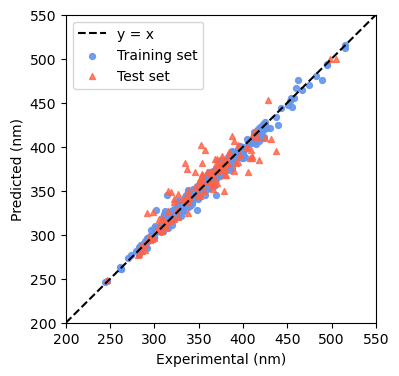

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.plot([200, 550], [200, 550], 'k--', label = 'y = x')
plt.scatter(y_train, y_pred_train_best, alpha=0.9, label='Training set', color='cornflowerblue', marker='o', s=18)  # Set color to cornflowerblue
plt.scatter(y_test, y_pred_test_best, alpha=0.8, label='Test set', color='tomato', marker='^', s=18)  # Set color to tomato
plt.xlim(200, 550)
plt.ylim(200, 550)
plt.legend()
plt.xlabel('Experimental (nm)')
plt.ylabel('Predicted (nm)')
plt.savefig('CATB-best.png',dpi=300, bbox_inches='tight')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error, make_scorer

print('training R = %.3f' % np.sqrt(r2_score(y_train, best_catb.predict(X_train))))
print('training R2 = %.3f' % r2_score(y_train, best_catb.predict(X_train)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_train, best_catb.predict(X_train))))
print('training MAE = %.3f' %mean_absolute_error(y_train, best_catb.predict(X_train)))

print('test R = %.3f' % np.sqrt(r2_score(y_test, best_catb.predict(X_test))))
print('test R2 = %.3f' % r2_score(y_test, best_catb.predict(X_test)))
print('test RMSE = %.3f' % np.sqrt(mean_squared_error(y_test, best_catb.predict(X_test))))
print('training MAE = %.3f' %mean_absolute_error(y_test, best_catb.predict(X_test)))

training R = 0.992
training R2 = 0.984
training RMSE = 5.109
training MAE = 3.722
test R = 0.935
test R2 = 0.874
test RMSE = 15.006
training MAE = 10.570


In [9]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)                        
r2_scores_catb = cross_val_score(best_catb, X_selected, y, scoring='r2', cv=crossvalidation)
rmse_scores_catb = cross_val_score(best_catb, X_selected,y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
mae_scores_catb = cross_val_score(best_catb, X_selected, y, scoring=make_scorer(mean_absolute_error), cv=crossvalidation)

print('Cross-Validation Results:')
print('Folds:%i, mean R: %.3f' %(len(r2_scores_catb), np.sqrt(r2_scores_catb.mean())))
print('Folds:%i, mean R2: %.3f' %(len(r2_scores_catb), r2_scores_catb.mean()))
print('Folds:%i, mean RMSE: %.3f' %(len(rmse_scores_catb), -rmse_scores_catb.mean()))
print('Folds:%i, mean MAE: %.3f' %(len(mae_scores_catb), mae_scores_catb.mean()))

0:	learn: 39.6288213	total: 1.5ms	remaining: 1.35s
1:	learn: 37.6646977	total: 3.35ms	remaining: 1.5s
2:	learn: 36.0109088	total: 4.39ms	remaining: 1.31s
3:	learn: 34.3005491	total: 5.56ms	remaining: 1.24s
4:	learn: 32.9399523	total: 6.87ms	remaining: 1.23s
5:	learn: 31.7115789	total: 8.19ms	remaining: 1.22s
6:	learn: 30.5031497	total: 9.44ms	remaining: 1.2s
7:	learn: 29.4398592	total: 10.9ms	remaining: 1.21s
8:	learn: 28.5375190	total: 12ms	remaining: 1.18s
9:	learn: 27.6713381	total: 13.1ms	remaining: 1.17s
10:	learn: 26.9777456	total: 14.2ms	remaining: 1.15s
11:	learn: 26.3566698	total: 15.3ms	remaining: 1.14s
12:	learn: 25.7394854	total: 16.6ms	remaining: 1.13s
13:	learn: 25.1258480	total: 17.7ms	remaining: 1.12s
14:	learn: 24.6849773	total: 18.8ms	remaining: 1.11s
15:	learn: 24.2699205	total: 20ms	remaining: 1.11s
16:	learn: 23.7705797	total: 21.2ms	remaining: 1.1s
17:	learn: 23.3007844	total: 22.4ms	remaining: 1.09s
18:	learn: 22.8439973	total: 23.5ms	remaining: 1.09s
19:	learn: 

167:	learn: 11.0490664	total: 181ms	remaining: 788ms
168:	learn: 10.9843129	total: 182ms	remaining: 787ms
169:	learn: 10.9461028	total: 183ms	remaining: 786ms
170:	learn: 10.9260645	total: 184ms	remaining: 785ms
171:	learn: 10.9193821	total: 185ms	remaining: 784ms
172:	learn: 10.8832454	total: 186ms	remaining: 782ms
173:	learn: 10.8791859	total: 187ms	remaining: 781ms
174:	learn: 10.8365059	total: 188ms	remaining: 779ms
175:	learn: 10.8240954	total: 189ms	remaining: 778ms
176:	learn: 10.7891067	total: 190ms	remaining: 777ms
177:	learn: 10.7587383	total: 191ms	remaining: 776ms
178:	learn: 10.7542085	total: 192ms	remaining: 775ms
179:	learn: 10.7182603	total: 194ms	remaining: 774ms
180:	learn: 10.6661505	total: 195ms	remaining: 775ms
181:	learn: 10.6232982	total: 196ms	remaining: 773ms
182:	learn: 10.5805038	total: 197ms	remaining: 772ms
183:	learn: 10.5531556	total: 198ms	remaining: 770ms
184:	learn: 10.5447800	total: 199ms	remaining: 770ms
185:	learn: 10.5188421	total: 200ms	remaining:

330:	learn: 7.9174279	total: 349ms	remaining: 600ms
331:	learn: 7.9163017	total: 350ms	remaining: 599ms
332:	learn: 7.8950818	total: 352ms	remaining: 599ms
333:	learn: 7.8810693	total: 353ms	remaining: 598ms
334:	learn: 7.8614287	total: 354ms	remaining: 597ms
335:	learn: 7.8436018	total: 355ms	remaining: 596ms
336:	learn: 7.8291864	total: 356ms	remaining: 595ms
337:	learn: 7.8200671	total: 357ms	remaining: 594ms
338:	learn: 7.8058138	total: 358ms	remaining: 593ms
339:	learn: 7.8031506	total: 359ms	remaining: 592ms
340:	learn: 7.7794788	total: 360ms	remaining: 590ms
341:	learn: 7.7570698	total: 361ms	remaining: 589ms
342:	learn: 7.7488231	total: 362ms	remaining: 588ms
343:	learn: 7.7290079	total: 365ms	remaining: 589ms
344:	learn: 7.7215971	total: 366ms	remaining: 588ms
345:	learn: 7.7123275	total: 367ms	remaining: 587ms
346:	learn: 7.6949349	total: 368ms	remaining: 586ms
347:	learn: 7.6807110	total: 369ms	remaining: 585ms
348:	learn: 7.6607141	total: 370ms	remaining: 584ms
349:	learn: 

507:	learn: 6.0980798	total: 525ms	remaining: 405ms
508:	learn: 6.0908146	total: 526ms	remaining: 404ms
509:	learn: 6.0809247	total: 527ms	remaining: 403ms
510:	learn: 6.0739699	total: 528ms	remaining: 402ms
511:	learn: 6.0644882	total: 530ms	remaining: 401ms
512:	learn: 6.0560006	total: 531ms	remaining: 400ms
513:	learn: 6.0440675	total: 532ms	remaining: 399ms
514:	learn: 6.0381163	total: 533ms	remaining: 398ms
515:	learn: 6.0336667	total: 534ms	remaining: 397ms
516:	learn: 6.0258600	total: 535ms	remaining: 396ms
517:	learn: 6.0082192	total: 536ms	remaining: 395ms
518:	learn: 6.0051566	total: 538ms	remaining: 395ms
519:	learn: 5.9967612	total: 539ms	remaining: 394ms
520:	learn: 5.9934567	total: 541ms	remaining: 393ms
521:	learn: 5.9858279	total: 542ms	remaining: 392ms
522:	learn: 5.9750649	total: 543ms	remaining: 391ms
523:	learn: 5.9711781	total: 544ms	remaining: 390ms
524:	learn: 5.9648544	total: 545ms	remaining: 389ms
525:	learn: 5.9575287	total: 546ms	remaining: 388ms
526:	learn: 

677:	learn: 5.0114878	total: 693ms	remaining: 227ms
678:	learn: 5.0024141	total: 694ms	remaining: 226ms
679:	learn: 5.0002423	total: 695ms	remaining: 225ms
680:	learn: 4.9889848	total: 697ms	remaining: 224ms
681:	learn: 4.9818375	total: 698ms	remaining: 223ms
682:	learn: 4.9768028	total: 699ms	remaining: 222ms
683:	learn: 4.9733077	total: 700ms	remaining: 221ms
684:	learn: 4.9671493	total: 701ms	remaining: 220ms
685:	learn: 4.9587046	total: 702ms	remaining: 219ms
686:	learn: 4.9521713	total: 703ms	remaining: 218ms
687:	learn: 4.9405707	total: 704ms	remaining: 217ms
688:	learn: 4.9312960	total: 705ms	remaining: 216ms
689:	learn: 4.9251789	total: 708ms	remaining: 215ms
690:	learn: 4.9202779	total: 709ms	remaining: 214ms
691:	learn: 4.9154638	total: 710ms	remaining: 213ms
692:	learn: 4.9099236	total: 711ms	remaining: 212ms
693:	learn: 4.9095301	total: 712ms	remaining: 211ms
694:	learn: 4.9051123	total: 713ms	remaining: 210ms
695:	learn: 4.8977149	total: 714ms	remaining: 209ms
696:	learn: 

842:	learn: 4.3053126	total: 862ms	remaining: 58.3ms
843:	learn: 4.2984206	total: 863ms	remaining: 57.3ms
844:	learn: 4.2965178	total: 864ms	remaining: 56.2ms
845:	learn: 4.2958722	total: 865ms	remaining: 55.2ms
846:	learn: 4.2934822	total: 866ms	remaining: 54.2ms
847:	learn: 4.2884937	total: 867ms	remaining: 53.2ms
848:	learn: 4.2880961	total: 868ms	remaining: 52.2ms
849:	learn: 4.2863254	total: 869ms	remaining: 51.1ms
850:	learn: 4.2846338	total: 870ms	remaining: 50.1ms
851:	learn: 4.2824864	total: 871ms	remaining: 49.1ms
852:	learn: 4.2818607	total: 872ms	remaining: 48.1ms
853:	learn: 4.2811136	total: 873ms	remaining: 47ms
854:	learn: 4.2766945	total: 875ms	remaining: 46.1ms
855:	learn: 4.2726548	total: 876ms	remaining: 45.1ms
856:	learn: 4.2721041	total: 878ms	remaining: 44ms
857:	learn: 4.2684807	total: 879ms	remaining: 43ms
858:	learn: 4.2625282	total: 880ms	remaining: 42ms
859:	learn: 4.2579871	total: 880ms	remaining: 41ms
860:	learn: 4.2523104	total: 881ms	remaining: 39.9ms
861

151:	learn: 11.3131740	total: 179ms	remaining: 881ms
152:	learn: 11.2911970	total: 181ms	remaining: 882ms
153:	learn: 11.2470246	total: 182ms	remaining: 880ms
154:	learn: 11.2209972	total: 183ms	remaining: 879ms
155:	learn: 11.2124573	total: 184ms	remaining: 877ms
156:	learn: 11.1826320	total: 185ms	remaining: 875ms
157:	learn: 11.1297417	total: 186ms	remaining: 873ms
158:	learn: 11.1092440	total: 187ms	remaining: 870ms
159:	learn: 11.0707509	total: 188ms	remaining: 869ms
160:	learn: 11.0277205	total: 189ms	remaining: 868ms
161:	learn: 10.9951497	total: 190ms	remaining: 865ms
162:	learn: 10.9688623	total: 191ms	remaining: 864ms
163:	learn: 10.9488373	total: 192ms	remaining: 863ms
164:	learn: 10.9176687	total: 195ms	remaining: 867ms
165:	learn: 10.8782739	total: 196ms	remaining: 866ms
166:	learn: 10.8366900	total: 198ms	remaining: 867ms
167:	learn: 10.7936902	total: 199ms	remaining: 866ms
168:	learn: 10.7510565	total: 200ms	remaining: 865ms
169:	learn: 10.7291451	total: 201ms	remaining:

328:	learn: 7.8548665	total: 357ms	remaining: 620ms
329:	learn: 7.8457581	total: 359ms	remaining: 619ms
330:	learn: 7.8354284	total: 360ms	remaining: 618ms
331:	learn: 7.8196658	total: 361ms	remaining: 618ms
332:	learn: 7.8030681	total: 362ms	remaining: 617ms
333:	learn: 7.7946914	total: 363ms	remaining: 615ms
334:	learn: 7.7934103	total: 364ms	remaining: 614ms
335:	learn: 7.7694918	total: 365ms	remaining: 613ms
336:	learn: 7.7512177	total: 366ms	remaining: 612ms
337:	learn: 7.7340866	total: 367ms	remaining: 611ms
338:	learn: 7.7323808	total: 369ms	remaining: 610ms
339:	learn: 7.7146760	total: 369ms	remaining: 609ms
340:	learn: 7.7047579	total: 371ms	remaining: 608ms
341:	learn: 7.6885848	total: 372ms	remaining: 607ms
342:	learn: 7.6657882	total: 373ms	remaining: 606ms
343:	learn: 7.6428345	total: 375ms	remaining: 607ms
344:	learn: 7.6282269	total: 376ms	remaining: 606ms
345:	learn: 7.6257071	total: 378ms	remaining: 605ms
346:	learn: 7.6182054	total: 379ms	remaining: 604ms
347:	learn: 

487:	learn: 6.1660015	total: 525ms	remaining: 443ms
488:	learn: 6.1508336	total: 527ms	remaining: 443ms
489:	learn: 6.1427975	total: 528ms	remaining: 442ms
490:	learn: 6.1269250	total: 529ms	remaining: 441ms
491:	learn: 6.1154589	total: 530ms	remaining: 440ms
492:	learn: 6.1050622	total: 531ms	remaining: 438ms
493:	learn: 6.1011981	total: 532ms	remaining: 437ms
494:	learn: 6.0954272	total: 533ms	remaining: 436ms
495:	learn: 6.0873903	total: 534ms	remaining: 435ms
496:	learn: 6.0825508	total: 535ms	remaining: 434ms
497:	learn: 6.0787069	total: 536ms	remaining: 433ms
498:	learn: 6.0738772	total: 538ms	remaining: 432ms
499:	learn: 6.0690024	total: 539ms	remaining: 431ms
500:	learn: 6.0663144	total: 540ms	remaining: 430ms
501:	learn: 6.0578530	total: 542ms	remaining: 429ms
502:	learn: 6.0414256	total: 543ms	remaining: 428ms
503:	learn: 6.0341885	total: 544ms	remaining: 427ms
504:	learn: 6.0289621	total: 545ms	remaining: 426ms
505:	learn: 6.0174060	total: 546ms	remaining: 425ms
506:	learn: 

648:	learn: 5.2069628	total: 694ms	remaining: 268ms
649:	learn: 5.2013581	total: 695ms	remaining: 267ms
650:	learn: 5.1917239	total: 696ms	remaining: 266ms
651:	learn: 5.1857900	total: 697ms	remaining: 265ms
652:	learn: 5.1798984	total: 698ms	remaining: 264ms
653:	learn: 5.1789149	total: 699ms	remaining: 263ms
654:	learn: 5.1740508	total: 700ms	remaining: 262ms
655:	learn: 5.1596519	total: 701ms	remaining: 261ms
656:	learn: 5.1533599	total: 702ms	remaining: 260ms
657:	learn: 5.1520543	total: 703ms	remaining: 259ms
658:	learn: 5.1446594	total: 704ms	remaining: 258ms
659:	learn: 5.1365459	total: 705ms	remaining: 257ms
660:	learn: 5.1323588	total: 706ms	remaining: 255ms
661:	learn: 5.1265065	total: 708ms	remaining: 255ms
662:	learn: 5.1215089	total: 710ms	remaining: 254ms
663:	learn: 5.1167004	total: 710ms	remaining: 253ms
664:	learn: 5.1126314	total: 712ms	remaining: 251ms
665:	learn: 5.1069954	total: 713ms	remaining: 250ms
666:	learn: 5.1037619	total: 713ms	remaining: 249ms
667:	learn: 

817:	learn: 4.5365890	total: 860ms	remaining: 86.2ms
818:	learn: 4.5350830	total: 861ms	remaining: 85.2ms
819:	learn: 4.5298309	total: 862ms	remaining: 84.1ms
820:	learn: 4.5261816	total: 863ms	remaining: 83.1ms
821:	learn: 4.5239573	total: 864ms	remaining: 82ms
822:	learn: 4.5198761	total: 865ms	remaining: 80.9ms
823:	learn: 4.5174548	total: 875ms	remaining: 80.7ms
824:	learn: 4.5141869	total: 877ms	remaining: 79.7ms
825:	learn: 4.5111290	total: 878ms	remaining: 78.6ms
826:	learn: 4.5084611	total: 879ms	remaining: 77.6ms
827:	learn: 4.5064588	total: 880ms	remaining: 76.5ms
828:	learn: 4.5017122	total: 881ms	remaining: 75.5ms
829:	learn: 4.4975986	total: 882ms	remaining: 74.4ms
830:	learn: 4.4914817	total: 883ms	remaining: 73.3ms
831:	learn: 4.4894387	total: 884ms	remaining: 72.3ms
832:	learn: 4.4843022	total: 885ms	remaining: 71.2ms
833:	learn: 4.4823937	total: 886ms	remaining: 70.1ms
834:	learn: 4.4797022	total: 887ms	remaining: 69.1ms
835:	learn: 4.4745629	total: 888ms	remaining: 68

178:	learn: 10.3425717	total: 205ms	remaining: 825ms
179:	learn: 10.3343478	total: 206ms	remaining: 823ms
180:	learn: 10.2806144	total: 207ms	remaining: 822ms
181:	learn: 10.2255816	total: 208ms	remaining: 821ms
182:	learn: 10.1865002	total: 209ms	remaining: 818ms
183:	learn: 10.1268714	total: 210ms	remaining: 818ms
184:	learn: 10.0987063	total: 211ms	remaining: 817ms
185:	learn: 10.0707754	total: 212ms	remaining: 814ms
186:	learn: 10.0685630	total: 213ms	remaining: 812ms
187:	learn: 10.0285951	total: 214ms	remaining: 809ms
188:	learn: 10.0265536	total: 214ms	remaining: 807ms
189:	learn: 9.9889797	total: 215ms	remaining: 805ms
190:	learn: 9.9870839	total: 216ms	remaining: 803ms
191:	learn: 9.9733980	total: 217ms	remaining: 801ms
192:	learn: 9.9716195	total: 218ms	remaining: 800ms
193:	learn: 9.9318465	total: 220ms	remaining: 799ms
194:	learn: 9.8931621	total: 222ms	remaining: 801ms
195:	learn: 9.8765505	total: 222ms	remaining: 799ms
196:	learn: 9.8643971	total: 224ms	remaining: 798ms
1

345:	learn: 7.4822110	total: 373ms	remaining: 598ms
346:	learn: 7.4772256	total: 375ms	remaining: 597ms
347:	learn: 7.4690135	total: 376ms	remaining: 596ms
348:	learn: 7.4618078	total: 376ms	remaining: 594ms
349:	learn: 7.4534804	total: 378ms	remaining: 593ms
350:	learn: 7.4408551	total: 379ms	remaining: 592ms
351:	learn: 7.4293121	total: 380ms	remaining: 591ms
352:	learn: 7.4210352	total: 381ms	remaining: 590ms
353:	learn: 7.4164342	total: 382ms	remaining: 589ms
354:	learn: 7.4084038	total: 383ms	remaining: 587ms
355:	learn: 7.4049222	total: 383ms	remaining: 586ms
356:	learn: 7.3892477	total: 384ms	remaining: 584ms
357:	learn: 7.3683116	total: 385ms	remaining: 583ms
358:	learn: 7.3415815	total: 386ms	remaining: 582ms
359:	learn: 7.3373769	total: 388ms	remaining: 582ms
360:	learn: 7.3211064	total: 389ms	remaining: 581ms
361:	learn: 7.3085399	total: 390ms	remaining: 580ms
362:	learn: 7.2950659	total: 391ms	remaining: 579ms
363:	learn: 7.2839065	total: 392ms	remaining: 578ms
364:	learn: 

511:	learn: 6.0005028	total: 540ms	remaining: 409ms
512:	learn: 5.9859141	total: 541ms	remaining: 408ms
513:	learn: 5.9713102	total: 542ms	remaining: 407ms
514:	learn: 5.9655164	total: 543ms	remaining: 406ms
515:	learn: 5.9561677	total: 543ms	remaining: 404ms
516:	learn: 5.9411606	total: 545ms	remaining: 403ms
517:	learn: 5.9280226	total: 546ms	remaining: 402ms
518:	learn: 5.9249712	total: 547ms	remaining: 401ms
519:	learn: 5.9104194	total: 547ms	remaining: 400ms
520:	learn: 5.9088477	total: 548ms	remaining: 399ms
521:	learn: 5.9023918	total: 549ms	remaining: 398ms
522:	learn: 5.8892234	total: 551ms	remaining: 397ms
523:	learn: 5.8840837	total: 553ms	remaining: 397ms
524:	learn: 5.8836730	total: 554ms	remaining: 396ms
525:	learn: 5.8760150	total: 555ms	remaining: 395ms
526:	learn: 5.8642918	total: 556ms	remaining: 394ms
527:	learn: 5.8557511	total: 557ms	remaining: 393ms
528:	learn: 5.8500000	total: 558ms	remaining: 392ms
529:	learn: 5.8377408	total: 559ms	remaining: 391ms
530:	learn: 

674:	learn: 5.0118643	total: 706ms	remaining: 235ms
675:	learn: 5.0098058	total: 708ms	remaining: 234ms
676:	learn: 5.0058184	total: 709ms	remaining: 233ms
677:	learn: 4.9989681	total: 710ms	remaining: 232ms
678:	learn: 4.9967674	total: 711ms	remaining: 231ms
679:	learn: 4.9920504	total: 712ms	remaining: 230ms
680:	learn: 4.9872031	total: 713ms	remaining: 229ms
681:	learn: 4.9830621	total: 714ms	remaining: 228ms
682:	learn: 4.9755255	total: 715ms	remaining: 227ms
683:	learn: 4.9699499	total: 716ms	remaining: 226ms
684:	learn: 4.9613013	total: 717ms	remaining: 225ms
685:	learn: 4.9588460	total: 718ms	remaining: 224ms
686:	learn: 4.9544608	total: 719ms	remaining: 223ms
687:	learn: 4.9534369	total: 720ms	remaining: 222ms
688:	learn: 4.9527680	total: 722ms	remaining: 221ms
689:	learn: 4.9482749	total: 723ms	remaining: 220ms
690:	learn: 4.9438143	total: 724ms	remaining: 219ms
691:	learn: 4.9420540	total: 726ms	remaining: 218ms
692:	learn: 4.9323741	total: 727ms	remaining: 217ms
693:	learn: 

849:	learn: 4.3826528	total: 884ms	remaining: 52ms
850:	learn: 4.3810618	total: 885ms	remaining: 51ms
851:	learn: 4.3808568	total: 887ms	remaining: 49.9ms
852:	learn: 4.3785495	total: 888ms	remaining: 48.9ms
853:	learn: 4.3759484	total: 889ms	remaining: 47.9ms
854:	learn: 4.3738740	total: 890ms	remaining: 46.8ms
855:	learn: 4.3707194	total: 891ms	remaining: 45.8ms
856:	learn: 4.3687812	total: 892ms	remaining: 44.7ms
857:	learn: 4.3667020	total: 892ms	remaining: 43.7ms
858:	learn: 4.3633984	total: 894ms	remaining: 42.6ms
859:	learn: 4.3600235	total: 894ms	remaining: 41.6ms
860:	learn: 4.3588716	total: 896ms	remaining: 40.6ms
861:	learn: 4.3586941	total: 897ms	remaining: 39.5ms
862:	learn: 4.3557472	total: 898ms	remaining: 38.5ms
863:	learn: 4.3516053	total: 899ms	remaining: 37.5ms
864:	learn: 4.3514247	total: 900ms	remaining: 36.4ms
865:	learn: 4.3512860	total: 901ms	remaining: 35.4ms
866:	learn: 4.3512020	total: 902ms	remaining: 34.3ms
867:	learn: 4.3432256	total: 903ms	remaining: 33.3

200:	learn: 10.1177334	total: 241ms	remaining: 839ms
201:	learn: 10.0745605	total: 242ms	remaining: 838ms
202:	learn: 10.0233419	total: 244ms	remaining: 836ms
203:	learn: 10.0192637	total: 245ms	remaining: 834ms
204:	learn: 10.0009498	total: 246ms	remaining: 833ms
205:	learn: 9.9487630	total: 246ms	remaining: 830ms
206:	learn: 9.9228164	total: 248ms	remaining: 829ms
207:	learn: 9.8903806	total: 249ms	remaining: 827ms
208:	learn: 9.8861075	total: 249ms	remaining: 824ms
209:	learn: 9.8479211	total: 251ms	remaining: 823ms
210:	learn: 9.8273213	total: 251ms	remaining: 821ms
211:	learn: 9.7951635	total: 253ms	remaining: 820ms
212:	learn: 9.7923966	total: 254ms	remaining: 819ms
213:	learn: 9.7762139	total: 255ms	remaining: 818ms
214:	learn: 9.7569697	total: 257ms	remaining: 820ms
215:	learn: 9.7486474	total: 259ms	remaining: 819ms
216:	learn: 9.7402206	total: 260ms	remaining: 817ms
217:	learn: 9.7197969	total: 261ms	remaining: 815ms
218:	learn: 9.7126863	total: 262ms	remaining: 814ms
219:	le

523:	learn: 5.9404625	total: 578ms	remaining: 415ms
524:	learn: 5.9372983	total: 580ms	remaining: 414ms
525:	learn: 5.9323544	total: 581ms	remaining: 413ms
526:	learn: 5.9183250	total: 582ms	remaining: 412ms
527:	learn: 5.9054136	total: 583ms	remaining: 411ms
528:	learn: 5.8997401	total: 585ms	remaining: 410ms
529:	learn: 5.8920841	total: 586ms	remaining: 409ms
530:	learn: 5.8854813	total: 587ms	remaining: 408ms
531:	learn: 5.8761141	total: 588ms	remaining: 407ms
532:	learn: 5.8638756	total: 589ms	remaining: 406ms
533:	learn: 5.8542889	total: 590ms	remaining: 404ms
534:	learn: 5.8449234	total: 591ms	remaining: 403ms
535:	learn: 5.8432222	total: 593ms	remaining: 402ms
536:	learn: 5.8368700	total: 594ms	remaining: 401ms
537:	learn: 5.8339884	total: 595ms	remaining: 400ms
538:	learn: 5.8210852	total: 596ms	remaining: 399ms
539:	learn: 5.8146459	total: 598ms	remaining: 399ms
540:	learn: 5.8130549	total: 599ms	remaining: 398ms
541:	learn: 5.8012757	total: 600ms	remaining: 397ms
542:	learn: 

837:	learn: 4.2251979	total: 919ms	remaining: 68ms
838:	learn: 4.2191897	total: 921ms	remaining: 66.9ms
839:	learn: 4.2125544	total: 922ms	remaining: 65.8ms
840:	learn: 4.2045190	total: 922ms	remaining: 64.7ms
841:	learn: 4.2013137	total: 923ms	remaining: 63.6ms
842:	learn: 4.1971946	total: 924ms	remaining: 62.5ms
843:	learn: 4.1956863	total: 925ms	remaining: 61.4ms
844:	learn: 4.1892618	total: 926ms	remaining: 60.3ms
845:	learn: 4.1824116	total: 927ms	remaining: 59.2ms
846:	learn: 4.1787119	total: 928ms	remaining: 58.1ms
847:	learn: 4.1772169	total: 929ms	remaining: 57ms
848:	learn: 4.1768024	total: 930ms	remaining: 55.9ms
849:	learn: 4.1704340	total: 932ms	remaining: 54.8ms
850:	learn: 4.1697846	total: 933ms	remaining: 53.7ms
851:	learn: 4.1620195	total: 934ms	remaining: 52.6ms
852:	learn: 4.1552058	total: 935ms	remaining: 51.5ms
853:	learn: 4.1523800	total: 935ms	remaining: 50.4ms
854:	learn: 4.1499603	total: 936ms	remaining: 49.3ms
855:	learn: 4.1444246	total: 937ms	remaining: 48.2

218:	learn: 9.8273517	total: 238ms	remaining: 741ms
219:	learn: 9.8205561	total: 239ms	remaining: 739ms
220:	learn: 9.7983499	total: 240ms	remaining: 737ms
221:	learn: 9.7666511	total: 241ms	remaining: 736ms
222:	learn: 9.7268376	total: 242ms	remaining: 735ms
223:	learn: 9.7044330	total: 243ms	remaining: 735ms
224:	learn: 9.6782880	total: 245ms	remaining: 734ms
225:	learn: 9.6472796	total: 246ms	remaining: 732ms
226:	learn: 9.6405930	total: 247ms	remaining: 731ms
227:	learn: 9.6224903	total: 248ms	remaining: 731ms
228:	learn: 9.6196577	total: 249ms	remaining: 729ms
229:	learn: 9.6146394	total: 250ms	remaining: 729ms
230:	learn: 9.5997553	total: 251ms	remaining: 728ms
231:	learn: 9.5638123	total: 252ms	remaining: 727ms
232:	learn: 9.5261735	total: 253ms	remaining: 725ms
233:	learn: 9.4874345	total: 255ms	remaining: 727ms
234:	learn: 9.4546722	total: 256ms	remaining: 725ms
235:	learn: 9.4523154	total: 257ms	remaining: 724ms
236:	learn: 9.4489375	total: 258ms	remaining: 722ms
237:	learn: 

384:	learn: 7.2056180	total: 404ms	remaining: 540ms
385:	learn: 7.1985315	total: 405ms	remaining: 539ms
386:	learn: 7.1830570	total: 406ms	remaining: 539ms
387:	learn: 7.1751708	total: 408ms	remaining: 538ms
388:	learn: 7.1583050	total: 409ms	remaining: 537ms
389:	learn: 7.1482140	total: 410ms	remaining: 536ms
390:	learn: 7.1374675	total: 411ms	remaining: 534ms
391:	learn: 7.1326992	total: 411ms	remaining: 533ms
392:	learn: 7.1137595	total: 412ms	remaining: 532ms
393:	learn: 7.1125806	total: 414ms	remaining: 531ms
394:	learn: 7.0841348	total: 415ms	remaining: 530ms
395:	learn: 7.0697402	total: 416ms	remaining: 529ms
396:	learn: 7.0464266	total: 417ms	remaining: 528ms
397:	learn: 7.0394603	total: 418ms	remaining: 527ms
398:	learn: 7.0209974	total: 420ms	remaining: 528ms
399:	learn: 6.9972150	total: 421ms	remaining: 527ms
400:	learn: 6.9836985	total: 423ms	remaining: 526ms
401:	learn: 6.9785672	total: 424ms	remaining: 525ms
402:	learn: 6.9660013	total: 424ms	remaining: 523ms
403:	learn: 

546:	learn: 5.7233397	total: 570ms	remaining: 368ms
547:	learn: 5.7100834	total: 571ms	remaining: 367ms
548:	learn: 5.6988344	total: 572ms	remaining: 366ms
549:	learn: 5.6983448	total: 573ms	remaining: 365ms
550:	learn: 5.6945347	total: 574ms	remaining: 364ms
551:	learn: 5.6890002	total: 576ms	remaining: 363ms
552:	learn: 5.6754127	total: 577ms	remaining: 362ms
553:	learn: 5.6726861	total: 578ms	remaining: 361ms
554:	learn: 5.6657494	total: 579ms	remaining: 360ms
555:	learn: 5.6574055	total: 580ms	remaining: 359ms
556:	learn: 5.6510114	total: 581ms	remaining: 358ms
557:	learn: 5.6472644	total: 582ms	remaining: 357ms
558:	learn: 5.6446476	total: 584ms	remaining: 356ms
559:	learn: 5.6364127	total: 585ms	remaining: 355ms
560:	learn: 5.6296588	total: 586ms	remaining: 354ms
561:	learn: 5.6214572	total: 587ms	remaining: 353ms
562:	learn: 5.6157387	total: 588ms	remaining: 352ms
563:	learn: 5.6101460	total: 589ms	remaining: 351ms
564:	learn: 5.6036495	total: 590ms	remaining: 350ms
565:	learn: 

873:	learn: 4.2546147	total: 928ms	remaining: 27.6ms
874:	learn: 4.2502452	total: 929ms	remaining: 26.5ms
875:	learn: 4.2441591	total: 931ms	remaining: 25.5ms
876:	learn: 4.2418161	total: 932ms	remaining: 24.4ms
877:	learn: 4.2405757	total: 933ms	remaining: 23.4ms
878:	learn: 4.2397100	total: 934ms	remaining: 22.3ms
879:	learn: 4.2347983	total: 935ms	remaining: 21.2ms
880:	learn: 4.2337167	total: 936ms	remaining: 20.2ms
881:	learn: 4.2312221	total: 937ms	remaining: 19.1ms
882:	learn: 4.2297801	total: 938ms	remaining: 18.1ms
883:	learn: 4.2266841	total: 939ms	remaining: 17ms
884:	learn: 4.2216224	total: 940ms	remaining: 15.9ms
885:	learn: 4.2212041	total: 941ms	remaining: 14.9ms
886:	learn: 4.2198545	total: 943ms	remaining: 13.8ms
887:	learn: 4.2173000	total: 944ms	remaining: 12.8ms
888:	learn: 4.2167629	total: 945ms	remaining: 11.7ms
889:	learn: 4.2145008	total: 947ms	remaining: 10.6ms
890:	learn: 4.2106255	total: 947ms	remaining: 9.57ms
891:	learn: 4.2104184	total: 948ms	remaining: 8.

243:	learn: 9.5979348	total: 265ms	remaining: 714ms
244:	learn: 9.5751374	total: 267ms	remaining: 713ms
245:	learn: 9.5568721	total: 268ms	remaining: 712ms
246:	learn: 9.5445450	total: 269ms	remaining: 712ms
247:	learn: 9.5422591	total: 270ms	remaining: 711ms
248:	learn: 9.5184968	total: 272ms	remaining: 710ms
249:	learn: 9.4928087	total: 273ms	remaining: 709ms
250:	learn: 9.4649164	total: 274ms	remaining: 708ms
251:	learn: 9.4434885	total: 275ms	remaining: 707ms
252:	learn: 9.4212730	total: 276ms	remaining: 706ms
253:	learn: 9.3884595	total: 277ms	remaining: 704ms
254:	learn: 9.3511244	total: 278ms	remaining: 702ms
255:	learn: 9.3375140	total: 278ms	remaining: 700ms
256:	learn: 9.3115752	total: 280ms	remaining: 700ms
257:	learn: 9.2977778	total: 281ms	remaining: 698ms
258:	learn: 9.2723957	total: 282ms	remaining: 698ms
259:	learn: 9.2499672	total: 284ms	remaining: 700ms
260:	learn: 9.2463369	total: 286ms	remaining: 699ms
261:	learn: 9.2412274	total: 287ms	remaining: 699ms
262:	learn: 

409:	learn: 7.2721558	total: 435ms	remaining: 520ms
410:	learn: 7.2481598	total: 436ms	remaining: 519ms
411:	learn: 7.2374798	total: 437ms	remaining: 518ms
412:	learn: 7.2254839	total: 439ms	remaining: 517ms
413:	learn: 7.2169033	total: 440ms	remaining: 516ms
414:	learn: 7.1970566	total: 441ms	remaining: 515ms
415:	learn: 7.1865338	total: 442ms	remaining: 514ms
416:	learn: 7.1785131	total: 444ms	remaining: 514ms
417:	learn: 7.1728758	total: 445ms	remaining: 513ms
418:	learn: 7.1598990	total: 446ms	remaining: 512ms
419:	learn: 7.1507769	total: 447ms	remaining: 511ms
420:	learn: 7.1457206	total: 448ms	remaining: 510ms
421:	learn: 7.1312264	total: 451ms	remaining: 511ms
422:	learn: 7.1115134	total: 452ms	remaining: 510ms
423:	learn: 7.1057163	total: 453ms	remaining: 508ms
424:	learn: 7.0892538	total: 454ms	remaining: 507ms
425:	learn: 7.0747919	total: 455ms	remaining: 506ms
426:	learn: 7.0561527	total: 456ms	remaining: 505ms
427:	learn: 7.0450674	total: 457ms	remaining: 504ms
428:	learn: 

572:	learn: 5.8323142	total: 602ms	remaining: 344ms
573:	learn: 5.8286839	total: 604ms	remaining: 343ms
574:	learn: 5.8275238	total: 605ms	remaining: 342ms
575:	learn: 5.8243155	total: 606ms	remaining: 341ms
576:	learn: 5.8146933	total: 607ms	remaining: 340ms
577:	learn: 5.8106719	total: 608ms	remaining: 339ms
578:	learn: 5.7977885	total: 609ms	remaining: 337ms
579:	learn: 5.7970080	total: 610ms	remaining: 336ms
580:	learn: 5.7964701	total: 610ms	remaining: 335ms
581:	learn: 5.7870510	total: 612ms	remaining: 334ms
582:	learn: 5.7821411	total: 613ms	remaining: 333ms
583:	learn: 5.7768302	total: 614ms	remaining: 332ms
584:	learn: 5.7653035	total: 615ms	remaining: 331ms
585:	learn: 5.7572178	total: 616ms	remaining: 330ms
586:	learn: 5.7513111	total: 619ms	remaining: 330ms
587:	learn: 5.7369310	total: 620ms	remaining: 329ms
588:	learn: 5.7296646	total: 621ms	remaining: 328ms
589:	learn: 5.7210565	total: 622ms	remaining: 327ms
590:	learn: 5.7097569	total: 623ms	remaining: 326ms
591:	learn: 

737:	learn: 4.9498427	total: 771ms	remaining: 169ms
738:	learn: 4.9473294	total: 772ms	remaining: 168ms
739:	learn: 4.9376558	total: 773ms	remaining: 167ms
740:	learn: 4.9331017	total: 774ms	remaining: 166ms
741:	learn: 4.9308898	total: 775ms	remaining: 165ms
742:	learn: 4.9249608	total: 776ms	remaining: 164ms
743:	learn: 4.9220341	total: 777ms	remaining: 163ms
744:	learn: 4.9187426	total: 778ms	remaining: 162ms
745:	learn: 4.9141345	total: 779ms	remaining: 161ms
746:	learn: 4.9081572	total: 780ms	remaining: 160ms
747:	learn: 4.9054072	total: 781ms	remaining: 159ms
748:	learn: 4.9007165	total: 782ms	remaining: 158ms
749:	learn: 4.8947167	total: 784ms	remaining: 157ms
750:	learn: 4.8915977	total: 785ms	remaining: 156ms
751:	learn: 4.8913227	total: 787ms	remaining: 155ms
752:	learn: 4.8860067	total: 788ms	remaining: 154ms
753:	learn: 4.8835319	total: 790ms	remaining: 153ms
754:	learn: 4.8806682	total: 791ms	remaining: 152ms
755:	learn: 4.8759070	total: 792ms	remaining: 151ms
756:	learn: 

0:	learn: 39.5068630	total: 1.41ms	remaining: 1.26s
1:	learn: 37.8241767	total: 2.8ms	remaining: 1.26s
2:	learn: 36.1563621	total: 3.96ms	remaining: 1.19s
3:	learn: 34.4465704	total: 5.41ms	remaining: 1.21s
4:	learn: 33.1110864	total: 6.29ms	remaining: 1.13s
5:	learn: 31.9132606	total: 7.49ms	remaining: 1.11s
6:	learn: 30.6888076	total: 8.52ms	remaining: 1.09s
7:	learn: 29.7334648	total: 9.73ms	remaining: 1.08s
8:	learn: 28.7382784	total: 11.1ms	remaining: 1.09s
9:	learn: 27.8640064	total: 12.2ms	remaining: 1.08s
10:	learn: 26.9991234	total: 13.2ms	remaining: 1.07s
11:	learn: 26.3895435	total: 14.6ms	remaining: 1.08s
12:	learn: 25.7026192	total: 15.9ms	remaining: 1.08s
13:	learn: 25.1102465	total: 17.2ms	remaining: 1.09s
14:	learn: 24.6625114	total: 18.5ms	remaining: 1.09s
15:	learn: 24.3351495	total: 19.9ms	remaining: 1.1s
16:	learn: 23.9498572	total: 20.9ms	remaining: 1.09s
17:	learn: 23.4740070	total: 22.2ms	remaining: 1.09s
18:	learn: 23.0719471	total: 23.4ms	remaining: 1.09s
19:	l

161:	learn: 10.4359812	total: 181ms	remaining: 826ms
162:	learn: 10.4294708	total: 183ms	remaining: 826ms
163:	learn: 10.3989366	total: 184ms	remaining: 826ms
164:	learn: 10.3703272	total: 185ms	remaining: 825ms
165:	learn: 10.3522426	total: 186ms	remaining: 822ms
166:	learn: 10.3379642	total: 187ms	remaining: 820ms
167:	learn: 10.3083995	total: 188ms	remaining: 819ms
168:	learn: 10.2625233	total: 189ms	remaining: 817ms
169:	learn: 10.2472153	total: 190ms	remaining: 816ms
170:	learn: 10.2410385	total: 191ms	remaining: 815ms
171:	learn: 10.2082080	total: 193ms	remaining: 815ms
172:	learn: 10.2049230	total: 193ms	remaining: 813ms
173:	learn: 10.2021687	total: 196ms	remaining: 816ms
174:	learn: 10.1688391	total: 197ms	remaining: 815ms
175:	learn: 10.1405502	total: 198ms	remaining: 814ms
176:	learn: 10.1204301	total: 199ms	remaining: 812ms
177:	learn: 10.1170524	total: 200ms	remaining: 811ms
178:	learn: 10.0830875	total: 201ms	remaining: 810ms
179:	learn: 10.0333295	total: 202ms	remaining:

327:	learn: 7.2843381	total: 348ms	remaining: 607ms
328:	learn: 7.2698919	total: 350ms	remaining: 608ms
329:	learn: 7.2603638	total: 351ms	remaining: 606ms
330:	learn: 7.2436676	total: 352ms	remaining: 606ms
331:	learn: 7.2218679	total: 353ms	remaining: 604ms
332:	learn: 7.2002631	total: 354ms	remaining: 603ms
333:	learn: 7.1744235	total: 355ms	remaining: 602ms
334:	learn: 7.1731395	total: 356ms	remaining: 601ms
335:	learn: 7.1720597	total: 357ms	remaining: 600ms
336:	learn: 7.1622791	total: 358ms	remaining: 598ms
337:	learn: 7.1482291	total: 359ms	remaining: 597ms
338:	learn: 7.1241566	total: 360ms	remaining: 596ms
339:	learn: 7.1017166	total: 361ms	remaining: 595ms
340:	learn: 7.0920852	total: 362ms	remaining: 594ms
341:	learn: 7.0909330	total: 365ms	remaining: 595ms
342:	learn: 7.0732969	total: 366ms	remaining: 594ms
343:	learn: 7.0529377	total: 367ms	remaining: 593ms
344:	learn: 7.0506581	total: 368ms	remaining: 591ms
345:	learn: 7.0329886	total: 369ms	remaining: 590ms
346:	learn: 

493:	learn: 5.6344712	total: 517ms	remaining: 425ms
494:	learn: 5.6339645	total: 518ms	remaining: 424ms
495:	learn: 5.6261193	total: 519ms	remaining: 423ms
496:	learn: 5.6204780	total: 520ms	remaining: 421ms
497:	learn: 5.6198036	total: 521ms	remaining: 420ms
498:	learn: 5.6084789	total: 522ms	remaining: 419ms
499:	learn: 5.6016307	total: 523ms	remaining: 418ms
500:	learn: 5.5988861	total: 524ms	remaining: 417ms
501:	learn: 5.5968517	total: 525ms	remaining: 416ms
502:	learn: 5.5918757	total: 526ms	remaining: 415ms
503:	learn: 5.5912812	total: 527ms	remaining: 414ms
504:	learn: 5.5758251	total: 528ms	remaining: 413ms
505:	learn: 5.5749569	total: 529ms	remaining: 412ms
506:	learn: 5.5739053	total: 532ms	remaining: 412ms
507:	learn: 5.5648395	total: 533ms	remaining: 411ms
508:	learn: 5.5633021	total: 534ms	remaining: 410ms
509:	learn: 5.5619013	total: 535ms	remaining: 409ms
510:	learn: 5.5573307	total: 536ms	remaining: 408ms
511:	learn: 5.5472206	total: 537ms	remaining: 407ms
512:	learn: 

659:	learn: 4.6053943	total: 683ms	remaining: 248ms
660:	learn: 4.5980011	total: 684ms	remaining: 247ms
661:	learn: 4.5952394	total: 685ms	remaining: 246ms
662:	learn: 4.5865574	total: 686ms	remaining: 245ms
663:	learn: 4.5832995	total: 687ms	remaining: 244ms
664:	learn: 4.5775769	total: 688ms	remaining: 243ms
665:	learn: 4.5675393	total: 689ms	remaining: 242ms
666:	learn: 4.5582785	total: 690ms	remaining: 241ms
667:	learn: 4.5523397	total: 691ms	remaining: 240ms
668:	learn: 4.5491273	total: 692ms	remaining: 239ms
669:	learn: 4.5430928	total: 693ms	remaining: 238ms
670:	learn: 4.5425209	total: 694ms	remaining: 237ms
671:	learn: 4.5374632	total: 695ms	remaining: 236ms
672:	learn: 4.5297464	total: 696ms	remaining: 235ms
673:	learn: 4.5251539	total: 697ms	remaining: 234ms
674:	learn: 4.5194410	total: 699ms	remaining: 233ms
675:	learn: 4.5085529	total: 700ms	remaining: 232ms
676:	learn: 4.5034086	total: 701ms	remaining: 231ms
677:	learn: 4.5005693	total: 702ms	remaining: 230ms
678:	learn: 

829:	learn: 3.8201687	total: 851ms	remaining: 71.8ms
830:	learn: 3.8172547	total: 852ms	remaining: 70.8ms
831:	learn: 3.8169382	total: 854ms	remaining: 69.8ms
832:	learn: 3.8167101	total: 854ms	remaining: 68.7ms
833:	learn: 3.8110329	total: 856ms	remaining: 67.7ms
834:	learn: 3.8107906	total: 857ms	remaining: 66.7ms
835:	learn: 3.8089442	total: 858ms	remaining: 65.7ms
836:	learn: 3.8070801	total: 859ms	remaining: 64.6ms
837:	learn: 3.8045895	total: 860ms	remaining: 63.6ms
838:	learn: 3.8028748	total: 861ms	remaining: 62.6ms
839:	learn: 3.7943207	total: 862ms	remaining: 61.6ms
840:	learn: 3.7855059	total: 863ms	remaining: 60.5ms
841:	learn: 3.7814184	total: 864ms	remaining: 59.5ms
842:	learn: 3.7811449	total: 865ms	remaining: 58.5ms
843:	learn: 3.7779230	total: 867ms	remaining: 57.5ms
844:	learn: 3.7755375	total: 868ms	remaining: 56.5ms
845:	learn: 3.7752333	total: 869ms	remaining: 55.5ms
846:	learn: 3.7716780	total: 871ms	remaining: 54.5ms
847:	learn: 3.7641610	total: 872ms	remaining: 

192:	learn: 10.2908882	total: 224ms	remaining: 821ms
193:	learn: 10.2438584	total: 225ms	remaining: 819ms
194:	learn: 10.2265028	total: 226ms	remaining: 817ms
195:	learn: 10.2240849	total: 227ms	remaining: 816ms
196:	learn: 10.1790161	total: 228ms	remaining: 814ms
197:	learn: 10.1604823	total: 229ms	remaining: 814ms
198:	learn: 10.1312665	total: 231ms	remaining: 812ms
199:	learn: 10.1273782	total: 231ms	remaining: 810ms
200:	learn: 10.1019201	total: 232ms	remaining: 808ms
201:	learn: 10.0677042	total: 233ms	remaining: 806ms
202:	learn: 10.0394458	total: 234ms	remaining: 805ms
203:	learn: 10.0113247	total: 235ms	remaining: 803ms
204:	learn: 9.9738678	total: 237ms	remaining: 803ms
205:	learn: 9.9706440	total: 238ms	remaining: 801ms
206:	learn: 9.9283974	total: 239ms	remaining: 799ms
207:	learn: 9.8935592	total: 240ms	remaining: 798ms
208:	learn: 9.8757764	total: 242ms	remaining: 800ms
209:	learn: 9.8577519	total: 243ms	remaining: 798ms
210:	learn: 9.8540530	total: 244ms	remaining: 796ms


363:	learn: 7.3913444	total: 419ms	remaining: 617ms
364:	learn: 7.3786575	total: 421ms	remaining: 616ms
365:	learn: 7.3659649	total: 422ms	remaining: 615ms
366:	learn: 7.3521927	total: 423ms	remaining: 614ms
367:	learn: 7.3411005	total: 424ms	remaining: 613ms
368:	learn: 7.3368208	total: 425ms	remaining: 612ms
369:	learn: 7.3324592	total: 426ms	remaining: 610ms
370:	learn: 7.3258515	total: 427ms	remaining: 609ms
371:	learn: 7.3150249	total: 428ms	remaining: 608ms
372:	learn: 7.2963893	total: 429ms	remaining: 606ms
373:	learn: 7.2904234	total: 430ms	remaining: 605ms
374:	learn: 7.2889900	total: 431ms	remaining: 604ms
375:	learn: 7.2763800	total: 433ms	remaining: 603ms
376:	learn: 7.2681826	total: 434ms	remaining: 602ms
377:	learn: 7.2547457	total: 435ms	remaining: 600ms
378:	learn: 7.2440596	total: 436ms	remaining: 599ms
379:	learn: 7.2423017	total: 437ms	remaining: 597ms
380:	learn: 7.2307304	total: 437ms	remaining: 596ms
381:	learn: 7.2140851	total: 439ms	remaining: 595ms
382:	learn: 

529:	learn: 5.8890440	total: 586ms	remaining: 409ms
530:	learn: 5.8841046	total: 588ms	remaining: 409ms
531:	learn: 5.8718416	total: 589ms	remaining: 407ms
532:	learn: 5.8622862	total: 590ms	remaining: 406ms
533:	learn: 5.8584262	total: 591ms	remaining: 405ms
534:	learn: 5.8562456	total: 592ms	remaining: 404ms
535:	learn: 5.8482471	total: 592ms	remaining: 402ms
536:	learn: 5.8368600	total: 593ms	remaining: 401ms
537:	learn: 5.8300387	total: 594ms	remaining: 400ms
538:	learn: 5.8248382	total: 595ms	remaining: 399ms
539:	learn: 5.8189298	total: 596ms	remaining: 397ms
540:	learn: 5.8073571	total: 597ms	remaining: 396ms
541:	learn: 5.7984021	total: 598ms	remaining: 395ms
542:	learn: 5.7969053	total: 599ms	remaining: 394ms
543:	learn: 5.7867408	total: 601ms	remaining: 393ms
544:	learn: 5.7794223	total: 602ms	remaining: 392ms
545:	learn: 5.7788679	total: 603ms	remaining: 391ms
546:	learn: 5.7722519	total: 603ms	remaining: 389ms
547:	learn: 5.7680648	total: 604ms	remaining: 388ms
548:	learn: 

849:	learn: 4.3828802	total: 926ms	remaining: 54.5ms
850:	learn: 4.3807332	total: 928ms	remaining: 53.4ms
851:	learn: 4.3772812	total: 929ms	remaining: 52.3ms
852:	learn: 4.3749454	total: 930ms	remaining: 51.2ms
853:	learn: 4.3720579	total: 931ms	remaining: 50.1ms
854:	learn: 4.3671812	total: 932ms	remaining: 49ms
855:	learn: 4.3629911	total: 932ms	remaining: 47.9ms
856:	learn: 4.3614566	total: 933ms	remaining: 46.8ms
857:	learn: 4.3588930	total: 934ms	remaining: 45.7ms
858:	learn: 4.3538720	total: 935ms	remaining: 44.6ms
859:	learn: 4.3516547	total: 936ms	remaining: 43.5ms
860:	learn: 4.3480484	total: 937ms	remaining: 42.4ms
861:	learn: 4.3470412	total: 938ms	remaining: 41.3ms
862:	learn: 4.3446080	total: 939ms	remaining: 40.2ms
863:	learn: 4.3393980	total: 940ms	remaining: 39.2ms
864:	learn: 4.3346715	total: 941ms	remaining: 38.1ms
865:	learn: 4.3313988	total: 942ms	remaining: 37ms
866:	learn: 4.3275957	total: 944ms	remaining: 35.9ms
867:	learn: 4.3246281	total: 945ms	remaining: 34.9

218:	learn: 9.8780060	total: 249ms	remaining: 775ms
219:	learn: 9.8644427	total: 251ms	remaining: 775ms
220:	learn: 9.8488665	total: 252ms	remaining: 773ms
221:	learn: 9.8455963	total: 253ms	remaining: 772ms
222:	learn: 9.7952420	total: 254ms	remaining: 770ms
223:	learn: 9.7567546	total: 255ms	remaining: 768ms
224:	learn: 9.7459000	total: 256ms	remaining: 767ms
225:	learn: 9.7133870	total: 257ms	remaining: 765ms
226:	learn: 9.6804630	total: 258ms	remaining: 764ms
227:	learn: 9.6774245	total: 259ms	remaining: 762ms
228:	learn: 9.6457511	total: 259ms	remaining: 760ms
229:	learn: 9.6157054	total: 260ms	remaining: 759ms
230:	learn: 9.6075555	total: 261ms	remaining: 757ms
231:	learn: 9.5925837	total: 263ms	remaining: 756ms
232:	learn: 9.5824977	total: 264ms	remaining: 754ms
233:	learn: 9.5649922	total: 265ms	remaining: 754ms
234:	learn: 9.5406705	total: 266ms	remaining: 754ms
235:	learn: 9.5145115	total: 267ms	remaining: 752ms
236:	learn: 9.4881693	total: 269ms	remaining: 751ms
237:	learn: 

382:	learn: 7.3005241	total: 416ms	remaining: 561ms
383:	learn: 7.2973155	total: 417ms	remaining: 561ms
384:	learn: 7.2952606	total: 418ms	remaining: 560ms
385:	learn: 7.2736694	total: 420ms	remaining: 559ms
386:	learn: 7.2548252	total: 421ms	remaining: 558ms
387:	learn: 7.2536610	total: 422ms	remaining: 557ms
388:	learn: 7.2460100	total: 423ms	remaining: 555ms
389:	learn: 7.2422271	total: 423ms	remaining: 554ms
390:	learn: 7.2283262	total: 424ms	remaining: 553ms
391:	learn: 7.2164446	total: 426ms	remaining: 552ms
392:	learn: 7.1956747	total: 427ms	remaining: 551ms
393:	learn: 7.1946294	total: 428ms	remaining: 550ms
394:	learn: 7.1881366	total: 429ms	remaining: 549ms
395:	learn: 7.1733933	total: 431ms	remaining: 548ms
396:	learn: 7.1524312	total: 432ms	remaining: 548ms
397:	learn: 7.1444917	total: 433ms	remaining: 547ms
398:	learn: 7.1290079	total: 434ms	remaining: 545ms
399:	learn: 7.1180460	total: 435ms	remaining: 544ms
400:	learn: 7.1023587	total: 437ms	remaining: 543ms
401:	learn: 

544:	learn: 5.9043166	total: 580ms	remaining: 378ms
545:	learn: 5.8939892	total: 582ms	remaining: 377ms
546:	learn: 5.8822854	total: 583ms	remaining: 376ms
547:	learn: 5.8782579	total: 584ms	remaining: 375ms
548:	learn: 5.8775004	total: 585ms	remaining: 374ms
549:	learn: 5.8651986	total: 586ms	remaining: 373ms
550:	learn: 5.8570591	total: 586ms	remaining: 371ms
551:	learn: 5.8527261	total: 587ms	remaining: 370ms
552:	learn: 5.8500552	total: 588ms	remaining: 369ms
553:	learn: 5.8381171	total: 589ms	remaining: 368ms
554:	learn: 5.8279414	total: 590ms	remaining: 367ms
555:	learn: 5.8215406	total: 591ms	remaining: 366ms
556:	learn: 5.8188117	total: 592ms	remaining: 365ms
557:	learn: 5.8146888	total: 593ms	remaining: 364ms
558:	learn: 5.8142674	total: 594ms	remaining: 363ms
559:	learn: 5.8126350	total: 596ms	remaining: 362ms
560:	learn: 5.7990068	total: 597ms	remaining: 361ms
561:	learn: 5.7919340	total: 598ms	remaining: 360ms
562:	learn: 5.7861354	total: 599ms	remaining: 359ms
563:	learn: 

712:	learn: 4.9379571	total: 750ms	remaining: 197ms
713:	learn: 4.9376236	total: 751ms	remaining: 196ms
714:	learn: 4.9355140	total: 753ms	remaining: 195ms
715:	learn: 4.9317392	total: 754ms	remaining: 194ms
716:	learn: 4.9298847	total: 755ms	remaining: 193ms
717:	learn: 4.9254041	total: 756ms	remaining: 192ms
718:	learn: 4.9186302	total: 757ms	remaining: 191ms
719:	learn: 4.9146060	total: 758ms	remaining: 190ms
720:	learn: 4.9091971	total: 759ms	remaining: 188ms
721:	learn: 4.9020152	total: 760ms	remaining: 187ms
722:	learn: 4.9018554	total: 761ms	remaining: 186ms
723:	learn: 4.8956068	total: 762ms	remaining: 185ms
724:	learn: 4.8900325	total: 763ms	remaining: 184ms
725:	learn: 4.8855875	total: 764ms	remaining: 183ms
726:	learn: 4.8824045	total: 765ms	remaining: 182ms
727:	learn: 4.8777976	total: 766ms	remaining: 181ms
728:	learn: 4.8728680	total: 768ms	remaining: 180ms
729:	learn: 4.8606873	total: 769ms	remaining: 179ms
730:	learn: 4.8561629	total: 770ms	remaining: 178ms
731:	learn: 

875:	learn: 4.3054106	total: 916ms	remaining: 25.1ms
876:	learn: 4.3040584	total: 917ms	remaining: 24.1ms
877:	learn: 4.3016631	total: 918ms	remaining: 23ms
878:	learn: 4.2976845	total: 919ms	remaining: 22ms
879:	learn: 4.2894758	total: 920ms	remaining: 20.9ms
880:	learn: 4.2869266	total: 921ms	remaining: 19.9ms
881:	learn: 4.2829491	total: 922ms	remaining: 18.8ms
882:	learn: 4.2808360	total: 924ms	remaining: 17.8ms
883:	learn: 4.2762011	total: 924ms	remaining: 16.7ms
884:	learn: 4.2714634	total: 925ms	remaining: 15.7ms
885:	learn: 4.2696676	total: 926ms	remaining: 14.6ms
886:	learn: 4.2693501	total: 927ms	remaining: 13.6ms
887:	learn: 4.2653765	total: 928ms	remaining: 12.5ms
888:	learn: 4.2599779	total: 929ms	remaining: 11.5ms
889:	learn: 4.2557398	total: 930ms	remaining: 10.4ms
890:	learn: 4.2528970	total: 932ms	remaining: 9.41ms
891:	learn: 4.2473453	total: 933ms	remaining: 8.37ms
892:	learn: 4.2421797	total: 934ms	remaining: 7.32ms
893:	learn: 4.2385026	total: 935ms	remaining: 6.27

252:	learn: 9.3103421	total: 276ms	remaining: 706ms
253:	learn: 9.3045067	total: 277ms	remaining: 706ms
254:	learn: 9.2785480	total: 279ms	remaining: 705ms
255:	learn: 9.2527774	total: 280ms	remaining: 703ms
256:	learn: 9.2309439	total: 281ms	remaining: 703ms
257:	learn: 9.2207720	total: 282ms	remaining: 701ms
258:	learn: 9.2176222	total: 283ms	remaining: 699ms
259:	learn: 9.2050798	total: 283ms	remaining: 698ms
260:	learn: 9.2014014	total: 284ms	remaining: 696ms
261:	learn: 9.1886282	total: 285ms	remaining: 695ms
262:	learn: 9.1655215	total: 286ms	remaining: 694ms
263:	learn: 9.1470315	total: 288ms	remaining: 693ms
264:	learn: 9.1447940	total: 289ms	remaining: 691ms
265:	learn: 9.1372998	total: 289ms	remaining: 690ms
266:	learn: 9.1282147	total: 290ms	remaining: 688ms
267:	learn: 9.1229043	total: 291ms	remaining: 687ms
268:	learn: 9.0969015	total: 293ms	remaining: 688ms
269:	learn: 9.0955421	total: 294ms	remaining: 687ms
270:	learn: 9.0930541	total: 295ms	remaining: 686ms
271:	learn: 

421:	learn: 7.1968133	total: 445ms	remaining: 504ms
422:	learn: 7.1814659	total: 446ms	remaining: 503ms
423:	learn: 7.1591473	total: 447ms	remaining: 502ms
424:	learn: 7.1437618	total: 448ms	remaining: 501ms
425:	learn: 7.1285042	total: 449ms	remaining: 500ms
426:	learn: 7.1093344	total: 451ms	remaining: 499ms
427:	learn: 7.1086731	total: 452ms	remaining: 498ms
428:	learn: 7.0931198	total: 453ms	remaining: 497ms
429:	learn: 7.0857151	total: 454ms	remaining: 496ms
430:	learn: 7.0738474	total: 454ms	remaining: 494ms
431:	learn: 7.0616557	total: 455ms	remaining: 493ms
432:	learn: 7.0549962	total: 456ms	remaining: 492ms
433:	learn: 7.0423788	total: 457ms	remaining: 491ms
434:	learn: 7.0309591	total: 458ms	remaining: 490ms
435:	learn: 7.0221606	total: 460ms	remaining: 489ms
436:	learn: 7.0134883	total: 462ms	remaining: 489ms
437:	learn: 6.9979476	total: 463ms	remaining: 488ms
438:	learn: 6.9906105	total: 464ms	remaining: 487ms
439:	learn: 6.9788134	total: 465ms	remaining: 486ms
440:	learn: 

591:	learn: 5.8129400	total: 614ms	remaining: 320ms
592:	learn: 5.8092650	total: 616ms	remaining: 319ms
593:	learn: 5.8008152	total: 617ms	remaining: 318ms
594:	learn: 5.7973241	total: 618ms	remaining: 317ms
595:	learn: 5.7966973	total: 619ms	remaining: 316ms
596:	learn: 5.7829706	total: 620ms	remaining: 315ms
597:	learn: 5.7767172	total: 621ms	remaining: 314ms
598:	learn: 5.7723939	total: 622ms	remaining: 312ms
599:	learn: 5.7650738	total: 622ms	remaining: 311ms
600:	learn: 5.7630092	total: 623ms	remaining: 310ms
601:	learn: 5.7550834	total: 624ms	remaining: 309ms
602:	learn: 5.7483916	total: 625ms	remaining: 308ms
603:	learn: 5.7393165	total: 626ms	remaining: 307ms
604:	learn: 5.7339149	total: 628ms	remaining: 306ms
605:	learn: 5.7219319	total: 629ms	remaining: 305ms
606:	learn: 5.7153094	total: 631ms	remaining: 305ms
607:	learn: 5.7107210	total: 632ms	remaining: 304ms
608:	learn: 5.7022556	total: 634ms	remaining: 303ms
609:	learn: 5.6903186	total: 635ms	remaining: 302ms
610:	learn: 

755:	learn: 4.9352096	total: 784ms	remaining: 149ms
756:	learn: 4.9310142	total: 785ms	remaining: 148ms
757:	learn: 4.9285870	total: 786ms	remaining: 147ms
758:	learn: 4.9267720	total: 787ms	remaining: 146ms
759:	learn: 4.9209608	total: 788ms	remaining: 145ms
760:	learn: 4.9153839	total: 790ms	remaining: 144ms
761:	learn: 4.9150824	total: 791ms	remaining: 143ms
762:	learn: 4.9119406	total: 792ms	remaining: 142ms
763:	learn: 4.9112134	total: 793ms	remaining: 141ms
764:	learn: 4.9048562	total: 794ms	remaining: 140ms
765:	learn: 4.9044231	total: 795ms	remaining: 139ms
766:	learn: 4.8972723	total: 796ms	remaining: 138ms
767:	learn: 4.8943798	total: 797ms	remaining: 137ms
768:	learn: 4.8872950	total: 800ms	remaining: 136ms
769:	learn: 4.8868763	total: 801ms	remaining: 135ms
770:	learn: 4.8864157	total: 802ms	remaining: 134ms
771:	learn: 4.8837787	total: 803ms	remaining: 133ms
772:	learn: 4.8787585	total: 804ms	remaining: 132ms
773:	learn: 4.8759814	total: 805ms	remaining: 131ms
774:	learn: 

152:	learn: 11.5354466	total: 178ms	remaining: 871ms
153:	learn: 11.5285661	total: 180ms	remaining: 871ms
154:	learn: 11.5233947	total: 181ms	remaining: 870ms
155:	learn: 11.4603006	total: 182ms	remaining: 868ms
156:	learn: 11.3942949	total: 183ms	remaining: 867ms
157:	learn: 11.3563102	total: 184ms	remaining: 866ms
158:	learn: 11.3219650	total: 185ms	remaining: 863ms
159:	learn: 11.3019419	total: 186ms	remaining: 861ms
160:	learn: 11.2575775	total: 187ms	remaining: 860ms
161:	learn: 11.2040843	total: 188ms	remaining: 858ms
162:	learn: 11.1900416	total: 189ms	remaining: 856ms
163:	learn: 11.1833483	total: 190ms	remaining: 855ms
164:	learn: 11.1291674	total: 191ms	remaining: 853ms
165:	learn: 11.0974583	total: 193ms	remaining: 852ms
166:	learn: 11.0700096	total: 195ms	remaining: 856ms
167:	learn: 11.0490664	total: 196ms	remaining: 853ms
168:	learn: 10.9843129	total: 197ms	remaining: 852ms
169:	learn: 10.9461028	total: 198ms	remaining: 851ms
170:	learn: 10.9260645	total: 199ms	remaining:

319:	learn: 8.0619175	total: 346ms	remaining: 627ms
320:	learn: 8.0526856	total: 347ms	remaining: 626ms
321:	learn: 8.0434416	total: 348ms	remaining: 625ms
322:	learn: 8.0261096	total: 349ms	remaining: 624ms
323:	learn: 8.0184330	total: 351ms	remaining: 623ms
324:	learn: 8.0119029	total: 352ms	remaining: 622ms
325:	learn: 8.0046683	total: 353ms	remaining: 621ms
326:	learn: 7.9895151	total: 354ms	remaining: 620ms
327:	learn: 7.9687365	total: 355ms	remaining: 619ms
328:	learn: 7.9562432	total: 356ms	remaining: 618ms
329:	learn: 7.9312176	total: 357ms	remaining: 617ms
330:	learn: 7.9174279	total: 358ms	remaining: 616ms
331:	learn: 7.9163017	total: 360ms	remaining: 615ms
332:	learn: 7.8950818	total: 361ms	remaining: 614ms
333:	learn: 7.8810693	total: 363ms	remaining: 615ms
334:	learn: 7.8614287	total: 364ms	remaining: 614ms
335:	learn: 7.8436018	total: 365ms	remaining: 613ms
336:	learn: 7.8291864	total: 366ms	remaining: 612ms
337:	learn: 7.8200671	total: 367ms	remaining: 610ms
338:	learn: 

485:	learn: 6.2584673	total: 514ms	remaining: 438ms
486:	learn: 6.2509101	total: 516ms	remaining: 437ms
487:	learn: 6.2444252	total: 517ms	remaining: 436ms
488:	learn: 6.2298769	total: 518ms	remaining: 435ms
489:	learn: 6.2234118	total: 519ms	remaining: 434ms
490:	learn: 6.2211870	total: 520ms	remaining: 433ms
491:	learn: 6.2115991	total: 521ms	remaining: 432ms
492:	learn: 6.1991462	total: 522ms	remaining: 431ms
493:	learn: 6.1930852	total: 523ms	remaining: 430ms
494:	learn: 6.1818791	total: 524ms	remaining: 429ms
495:	learn: 6.1737526	total: 525ms	remaining: 428ms
496:	learn: 6.1631838	total: 527ms	remaining: 427ms
497:	learn: 6.1593610	total: 528ms	remaining: 426ms
498:	learn: 6.1553346	total: 529ms	remaining: 425ms
499:	learn: 6.1478065	total: 531ms	remaining: 424ms
500:	learn: 6.1471772	total: 531ms	remaining: 423ms
501:	learn: 6.1432742	total: 533ms	remaining: 422ms
502:	learn: 6.1282229	total: 534ms	remaining: 421ms
503:	learn: 6.1160095	total: 535ms	remaining: 420ms
504:	learn: 

649:	learn: 5.1513412	total: 681ms	remaining: 262ms
650:	learn: 5.1442434	total: 683ms	remaining: 261ms
651:	learn: 5.1414924	total: 684ms	remaining: 260ms
652:	learn: 5.1328647	total: 685ms	remaining: 259ms
653:	learn: 5.1303021	total: 686ms	remaining: 258ms
654:	learn: 5.1254819	total: 687ms	remaining: 257ms
655:	learn: 5.1131619	total: 688ms	remaining: 256ms
656:	learn: 5.1070234	total: 689ms	remaining: 255ms
657:	learn: 5.1033354	total: 690ms	remaining: 254ms
658:	learn: 5.0970246	total: 691ms	remaining: 253ms
659:	learn: 5.0955908	total: 692ms	remaining: 252ms
660:	learn: 5.0936589	total: 693ms	remaining: 251ms
661:	learn: 5.0874755	total: 696ms	remaining: 250ms
662:	learn: 5.0812291	total: 697ms	remaining: 249ms
663:	learn: 5.0762649	total: 698ms	remaining: 248ms
664:	learn: 5.0739618	total: 699ms	remaining: 247ms
665:	learn: 5.0683796	total: 700ms	remaining: 246ms
666:	learn: 5.0636851	total: 701ms	remaining: 245ms
667:	learn: 5.0582911	total: 702ms	remaining: 244ms
668:	learn: 

813:	learn: 4.4218045	total: 850ms	remaining: 89.8ms
814:	learn: 4.4154496	total: 851ms	remaining: 88.7ms
815:	learn: 4.4109052	total: 852ms	remaining: 87.7ms
816:	learn: 4.4079563	total: 853ms	remaining: 86.7ms
817:	learn: 4.4046701	total: 854ms	remaining: 85.6ms
818:	learn: 4.4020848	total: 855ms	remaining: 84.6ms
819:	learn: 4.3994664	total: 856ms	remaining: 83.5ms
820:	learn: 4.3893615	total: 857ms	remaining: 82.5ms
821:	learn: 4.3870815	total: 858ms	remaining: 81.4ms
822:	learn: 4.3866827	total: 859ms	remaining: 80.4ms
823:	learn: 4.3843678	total: 860ms	remaining: 79.3ms
824:	learn: 4.3820725	total: 861ms	remaining: 78.3ms
825:	learn: 4.3750360	total: 862ms	remaining: 77.3ms
826:	learn: 4.3707218	total: 864ms	remaining: 76.2ms
827:	learn: 4.3624790	total: 866ms	remaining: 75.3ms
828:	learn: 4.3597817	total: 867ms	remaining: 74.2ms
829:	learn: 4.3552489	total: 868ms	remaining: 73.2ms
830:	learn: 4.3544066	total: 869ms	remaining: 72.2ms
831:	learn: 4.3519218	total: 870ms	remaining: 

195:	learn: 10.0958651	total: 218ms	remaining: 782ms
196:	learn: 10.0773031	total: 219ms	remaining: 782ms
197:	learn: 10.0350480	total: 220ms	remaining: 781ms
198:	learn: 10.0092187	total: 222ms	remaining: 780ms
199:	learn: 9.9915758	total: 223ms	remaining: 779ms
200:	learn: 9.9584765	total: 224ms	remaining: 778ms
201:	learn: 9.9368288	total: 225ms	remaining: 777ms
202:	learn: 9.9138774	total: 226ms	remaining: 776ms
203:	learn: 9.8804143	total: 227ms	remaining: 775ms
204:	learn: 9.8639112	total: 228ms	remaining: 773ms
205:	learn: 9.8544900	total: 229ms	remaining: 772ms
206:	learn: 9.8333123	total: 230ms	remaining: 771ms
207:	learn: 9.8220131	total: 231ms	remaining: 770ms
208:	learn: 9.8023264	total: 232ms	remaining: 769ms
209:	learn: 9.7830912	total: 234ms	remaining: 767ms
210:	learn: 9.7405047	total: 235ms	remaining: 766ms
211:	learn: 9.7208958	total: 236ms	remaining: 766ms
212:	learn: 9.7133059	total: 237ms	remaining: 766ms
213:	learn: 9.6808316	total: 238ms	remaining: 764ms
214:	lea

364:	learn: 7.3576337	total: 396ms	remaining: 581ms
365:	learn: 7.3400909	total: 397ms	remaining: 580ms
366:	learn: 7.3306504	total: 399ms	remaining: 579ms
367:	learn: 7.3228923	total: 400ms	remaining: 578ms
368:	learn: 7.3203915	total: 401ms	remaining: 577ms
369:	learn: 7.3035597	total: 402ms	remaining: 575ms
370:	learn: 7.2937745	total: 402ms	remaining: 574ms
371:	learn: 7.2926227	total: 403ms	remaining: 572ms
372:	learn: 7.2744494	total: 404ms	remaining: 571ms
373:	learn: 7.2639423	total: 405ms	remaining: 569ms
374:	learn: 7.2467147	total: 406ms	remaining: 568ms
375:	learn: 7.2229338	total: 407ms	remaining: 567ms
376:	learn: 7.2078203	total: 408ms	remaining: 565ms
377:	learn: 7.1976951	total: 409ms	remaining: 564ms
378:	learn: 7.1775422	total: 410ms	remaining: 563ms
379:	learn: 7.1688132	total: 412ms	remaining: 564ms
380:	learn: 7.1643203	total: 413ms	remaining: 563ms
381:	learn: 7.1539035	total: 414ms	remaining: 561ms
382:	learn: 7.1309602	total: 415ms	remaining: 561ms
383:	learn: 

525:	learn: 5.8888884	total: 566ms	remaining: 403ms
526:	learn: 5.8852917	total: 568ms	remaining: 402ms
527:	learn: 5.8820411	total: 569ms	remaining: 401ms
528:	learn: 5.8775770	total: 570ms	remaining: 400ms
529:	learn: 5.8702170	total: 571ms	remaining: 399ms
530:	learn: 5.8676064	total: 572ms	remaining: 398ms
531:	learn: 5.8635105	total: 573ms	remaining: 396ms
532:	learn: 5.8527907	total: 574ms	remaining: 395ms
533:	learn: 5.8496486	total: 575ms	remaining: 394ms
534:	learn: 5.8396463	total: 576ms	remaining: 393ms
535:	learn: 5.8274052	total: 577ms	remaining: 392ms
536:	learn: 5.8214661	total: 578ms	remaining: 391ms
537:	learn: 5.8195035	total: 579ms	remaining: 390ms
538:	learn: 5.8178301	total: 580ms	remaining: 388ms
539:	learn: 5.8097021	total: 581ms	remaining: 387ms
540:	learn: 5.7996105	total: 583ms	remaining: 387ms
541:	learn: 5.7953042	total: 584ms	remaining: 386ms
542:	learn: 5.7845736	total: 586ms	remaining: 385ms
543:	learn: 5.7836152	total: 586ms	remaining: 384ms
544:	learn: 

685:	learn: 5.0481303	total: 738ms	remaining: 230ms
686:	learn: 5.0435467	total: 740ms	remaining: 229ms
687:	learn: 5.0395526	total: 741ms	remaining: 228ms
688:	learn: 5.0341171	total: 742ms	remaining: 227ms
689:	learn: 5.0290145	total: 743ms	remaining: 226ms
690:	learn: 5.0206372	total: 744ms	remaining: 225ms
691:	learn: 5.0195253	total: 745ms	remaining: 224ms
692:	learn: 5.0112924	total: 746ms	remaining: 223ms
693:	learn: 5.0075789	total: 746ms	remaining: 222ms
694:	learn: 5.0063302	total: 747ms	remaining: 220ms
695:	learn: 5.0043390	total: 748ms	remaining: 219ms
696:	learn: 5.0034708	total: 749ms	remaining: 218ms
697:	learn: 4.9975607	total: 750ms	remaining: 217ms
698:	learn: 4.9921674	total: 751ms	remaining: 216ms
699:	learn: 4.9900208	total: 752ms	remaining: 215ms
700:	learn: 4.9894075	total: 753ms	remaining: 214ms
701:	learn: 4.9827008	total: 754ms	remaining: 213ms
702:	learn: 4.9803198	total: 755ms	remaining: 212ms
703:	learn: 4.9767063	total: 756ms	remaining: 210ms
704:	learn: 

851:	learn: 4.4124616	total: 908ms	remaining: 51.1ms
852:	learn: 4.4098906	total: 910ms	remaining: 50.1ms
853:	learn: 4.4057490	total: 911ms	remaining: 49.1ms
854:	learn: 4.4028643	total: 912ms	remaining: 48ms
855:	learn: 4.3992319	total: 913ms	remaining: 46.9ms
856:	learn: 4.3910328	total: 914ms	remaining: 45.9ms
857:	learn: 4.3876738	total: 915ms	remaining: 44.8ms
858:	learn: 4.3843819	total: 916ms	remaining: 43.7ms
859:	learn: 4.3782542	total: 917ms	remaining: 42.7ms
860:	learn: 4.3750962	total: 918ms	remaining: 41.6ms
861:	learn: 4.3682089	total: 919ms	remaining: 40.5ms
862:	learn: 4.3647662	total: 920ms	remaining: 39.5ms
863:	learn: 4.3605395	total: 922ms	remaining: 38.4ms
864:	learn: 4.3551701	total: 923ms	remaining: 37.3ms
865:	learn: 4.3515977	total: 925ms	remaining: 36.3ms
866:	learn: 4.3443649	total: 926ms	remaining: 35.2ms
867:	learn: 4.3396997	total: 927ms	remaining: 34.2ms
868:	learn: 4.3367623	total: 928ms	remaining: 33.1ms
869:	learn: 4.3318532	total: 929ms	remaining: 32

218:	learn: 9.3935249	total: 248ms	remaining: 770ms
219:	learn: 9.3674296	total: 249ms	remaining: 770ms
220:	learn: 9.3556749	total: 250ms	remaining: 769ms
221:	learn: 9.3226043	total: 252ms	remaining: 768ms
222:	learn: 9.3017854	total: 253ms	remaining: 767ms
223:	learn: 9.2824027	total: 254ms	remaining: 766ms
224:	learn: 9.2615945	total: 255ms	remaining: 764ms
225:	learn: 9.2581615	total: 256ms	remaining: 763ms
226:	learn: 9.2529201	total: 257ms	remaining: 761ms
227:	learn: 9.2364421	total: 258ms	remaining: 759ms
228:	learn: 9.2037033	total: 259ms	remaining: 758ms
229:	learn: 9.1747306	total: 260ms	remaining: 757ms
230:	learn: 9.1521290	total: 261ms	remaining: 756ms
231:	learn: 9.1278268	total: 262ms	remaining: 755ms
232:	learn: 9.1015099	total: 264ms	remaining: 756ms
233:	learn: 9.0844697	total: 265ms	remaining: 754ms
234:	learn: 9.0682856	total: 266ms	remaining: 753ms
235:	learn: 9.0435975	total: 267ms	remaining: 752ms
236:	learn: 9.0220031	total: 268ms	remaining: 751ms
237:	learn: 

390:	learn: 6.9792071	total: 425ms	remaining: 553ms
391:	learn: 6.9784762	total: 426ms	remaining: 552ms
392:	learn: 6.9669326	total: 427ms	remaining: 551ms
393:	learn: 6.9553909	total: 428ms	remaining: 550ms
394:	learn: 6.9463091	total: 429ms	remaining: 549ms
395:	learn: 6.9383828	total: 430ms	remaining: 548ms
396:	learn: 6.9205613	total: 432ms	remaining: 547ms
397:	learn: 6.9082479	total: 433ms	remaining: 546ms
398:	learn: 6.8981486	total: 433ms	remaining: 544ms
399:	learn: 6.8849388	total: 434ms	remaining: 543ms
400:	learn: 6.8725277	total: 435ms	remaining: 542ms
401:	learn: 6.8720015	total: 436ms	remaining: 540ms
402:	learn: 6.8618715	total: 437ms	remaining: 539ms
403:	learn: 6.8557471	total: 439ms	remaining: 539ms
404:	learn: 6.8549171	total: 440ms	remaining: 538ms
405:	learn: 6.8442007	total: 441ms	remaining: 537ms
406:	learn: 6.8267526	total: 442ms	remaining: 536ms
407:	learn: 6.8152726	total: 443ms	remaining: 535ms
408:	learn: 6.8043264	total: 444ms	remaining: 534ms
409:	learn: 

557:	learn: 5.6507052	total: 592ms	remaining: 363ms
558:	learn: 5.6449549	total: 594ms	remaining: 362ms
559:	learn: 5.6386502	total: 595ms	remaining: 361ms
560:	learn: 5.6332329	total: 596ms	remaining: 360ms
561:	learn: 5.6272401	total: 597ms	remaining: 359ms
562:	learn: 5.6203316	total: 598ms	remaining: 358ms
563:	learn: 5.6199961	total: 600ms	remaining: 357ms
564:	learn: 5.6156031	total: 600ms	remaining: 356ms
565:	learn: 5.6140578	total: 602ms	remaining: 355ms
566:	learn: 5.6045416	total: 603ms	remaining: 354ms
567:	learn: 5.5913535	total: 603ms	remaining: 353ms
568:	learn: 5.5909577	total: 604ms	remaining: 352ms
569:	learn: 5.5902819	total: 606ms	remaining: 351ms
570:	learn: 5.5859243	total: 606ms	remaining: 349ms
571:	learn: 5.5816387	total: 608ms	remaining: 348ms
572:	learn: 5.5738823	total: 609ms	remaining: 348ms
573:	learn: 5.5643880	total: 611ms	remaining: 347ms
574:	learn: 5.5590554	total: 612ms	remaining: 346ms
575:	learn: 5.5522869	total: 613ms	remaining: 345ms
576:	learn: 

723:	learn: 4.7990791	total: 761ms	remaining: 185ms
724:	learn: 4.7979109	total: 763ms	remaining: 184ms
725:	learn: 4.7892553	total: 764ms	remaining: 183ms
726:	learn: 4.7853130	total: 765ms	remaining: 182ms
727:	learn: 4.7806616	total: 766ms	remaining: 181ms
728:	learn: 4.7760500	total: 767ms	remaining: 180ms
729:	learn: 4.7691122	total: 768ms	remaining: 179ms
730:	learn: 4.7680481	total: 769ms	remaining: 178ms
731:	learn: 4.7674903	total: 770ms	remaining: 177ms
732:	learn: 4.7672668	total: 771ms	remaining: 176ms
733:	learn: 4.7641296	total: 772ms	remaining: 175ms
734:	learn: 4.7561829	total: 774ms	remaining: 174ms
735:	learn: 4.7523103	total: 775ms	remaining: 173ms
736:	learn: 4.7509544	total: 776ms	remaining: 172ms
737:	learn: 4.7448304	total: 778ms	remaining: 171ms
738:	learn: 4.7424904	total: 779ms	remaining: 170ms
739:	learn: 4.7405559	total: 780ms	remaining: 169ms
740:	learn: 4.7386884	total: 781ms	remaining: 168ms
741:	learn: 4.7379558	total: 782ms	remaining: 167ms
742:	learn: 

887:	learn: 4.2772410	total: 929ms	remaining: 12.6ms
888:	learn: 4.2738097	total: 931ms	remaining: 11.5ms
889:	learn: 4.2685306	total: 932ms	remaining: 10.5ms
890:	learn: 4.2628685	total: 933ms	remaining: 9.42ms
891:	learn: 4.2614018	total: 934ms	remaining: 8.38ms
892:	learn: 4.2598890	total: 935ms	remaining: 7.33ms
893:	learn: 4.2596189	total: 936ms	remaining: 6.28ms
894:	learn: 4.2534839	total: 937ms	remaining: 5.23ms
895:	learn: 4.2515558	total: 938ms	remaining: 4.19ms
896:	learn: 4.2452675	total: 939ms	remaining: 3.14ms
897:	learn: 4.2432180	total: 940ms	remaining: 2.09ms
898:	learn: 4.2429866	total: 941ms	remaining: 1.05ms
899:	learn: 4.2411154	total: 942ms	remaining: 0us
0:	learn: 39.5518072	total: 1.32ms	remaining: 1.19s
1:	learn: 37.8033485	total: 2.67ms	remaining: 1.2s
2:	learn: 36.2257289	total: 4.03ms	remaining: 1.2s
3:	learn: 34.5892206	total: 5.39ms	remaining: 1.21s
4:	learn: 33.2960052	total: 6.92ms	remaining: 1.24s
5:	learn: 32.1357165	total: 8.32ms	remaining: 1.24s
6:	l

250:	learn: 9.1165502	total: 278ms	remaining: 719ms
251:	learn: 9.0942217	total: 279ms	remaining: 718ms
252:	learn: 9.0917108	total: 280ms	remaining: 717ms
253:	learn: 9.0882797	total: 281ms	remaining: 716ms
254:	learn: 9.0497823	total: 282ms	remaining: 714ms
255:	learn: 9.0361078	total: 284ms	remaining: 714ms
256:	learn: 9.0044333	total: 285ms	remaining: 713ms
257:	learn: 8.9859410	total: 286ms	remaining: 711ms
258:	learn: 8.9641155	total: 287ms	remaining: 709ms
259:	learn: 8.9326912	total: 288ms	remaining: 708ms
260:	learn: 8.9191287	total: 289ms	remaining: 707ms
261:	learn: 8.9034390	total: 290ms	remaining: 706ms
262:	learn: 8.8880889	total: 291ms	remaining: 705ms
263:	learn: 8.8741175	total: 292ms	remaining: 704ms
264:	learn: 8.8658741	total: 294ms	remaining: 705ms
265:	learn: 8.8643479	total: 295ms	remaining: 704ms
266:	learn: 8.8403771	total: 297ms	remaining: 704ms
267:	learn: 8.8109645	total: 298ms	remaining: 703ms
268:	learn: 8.7972117	total: 299ms	remaining: 702ms
269:	learn: 

422:	learn: 6.8475237	total: 453ms	remaining: 511ms
423:	learn: 6.8280120	total: 455ms	remaining: 510ms
424:	learn: 6.8106408	total: 456ms	remaining: 509ms
425:	learn: 6.7914662	total: 457ms	remaining: 508ms
426:	learn: 6.7883173	total: 458ms	remaining: 507ms
427:	learn: 6.7787839	total: 459ms	remaining: 506ms
428:	learn: 6.7611457	total: 460ms	remaining: 505ms
429:	learn: 6.7546855	total: 461ms	remaining: 504ms
430:	learn: 6.7462774	total: 462ms	remaining: 502ms
431:	learn: 6.7429596	total: 463ms	remaining: 501ms
432:	learn: 6.7269628	total: 464ms	remaining: 500ms
433:	learn: 6.7085019	total: 464ms	remaining: 499ms
434:	learn: 6.6962876	total: 466ms	remaining: 498ms
435:	learn: 6.6902752	total: 467ms	remaining: 497ms
436:	learn: 6.6814014	total: 469ms	remaining: 497ms
437:	learn: 6.6767765	total: 470ms	remaining: 496ms
438:	learn: 6.6761160	total: 471ms	remaining: 495ms
439:	learn: 6.6704217	total: 472ms	remaining: 493ms
440:	learn: 6.6659608	total: 473ms	remaining: 493ms
441:	learn: 

588:	learn: 5.4363120	total: 620ms	remaining: 327ms
589:	learn: 5.4330253	total: 621ms	remaining: 326ms
590:	learn: 5.4323808	total: 622ms	remaining: 325ms
591:	learn: 5.4253384	total: 623ms	remaining: 324ms
592:	learn: 5.4221120	total: 625ms	remaining: 323ms
593:	learn: 5.4147228	total: 626ms	remaining: 322ms
594:	learn: 5.4102227	total: 627ms	remaining: 321ms
595:	learn: 5.4097107	total: 627ms	remaining: 320ms
596:	learn: 5.3933860	total: 629ms	remaining: 319ms
597:	learn: 5.3813463	total: 630ms	remaining: 318ms
598:	learn: 5.3809755	total: 631ms	remaining: 317ms
599:	learn: 5.3723727	total: 632ms	remaining: 316ms
600:	learn: 5.3675067	total: 633ms	remaining: 315ms
601:	learn: 5.3582608	total: 634ms	remaining: 314ms
602:	learn: 5.3520726	total: 636ms	remaining: 313ms
603:	learn: 5.3450722	total: 637ms	remaining: 312ms
604:	learn: 5.3376751	total: 638ms	remaining: 311ms
605:	learn: 5.3258345	total: 639ms	remaining: 310ms
606:	learn: 5.3224805	total: 641ms	remaining: 309ms
607:	learn: 

749:	learn: 4.6275491	total: 786ms	remaining: 157ms
750:	learn: 4.6214262	total: 787ms	remaining: 156ms
751:	learn: 4.6147489	total: 789ms	remaining: 155ms
752:	learn: 4.6101265	total: 790ms	remaining: 154ms
753:	learn: 4.6062619	total: 791ms	remaining: 153ms
754:	learn: 4.6025514	total: 792ms	remaining: 152ms
755:	learn: 4.5954982	total: 793ms	remaining: 151ms
756:	learn: 4.5925793	total: 794ms	remaining: 150ms
757:	learn: 4.5895390	total: 795ms	remaining: 149ms
758:	learn: 4.5859302	total: 796ms	remaining: 148ms
759:	learn: 4.5827059	total: 797ms	remaining: 147ms
760:	learn: 4.5728689	total: 798ms	remaining: 146ms
761:	learn: 4.5673315	total: 799ms	remaining: 145ms
762:	learn: 4.5627623	total: 801ms	remaining: 144ms
763:	learn: 4.5588930	total: 803ms	remaining: 143ms
764:	learn: 4.5496015	total: 804ms	remaining: 142ms
765:	learn: 4.5440639	total: 805ms	remaining: 141ms
766:	learn: 4.5365172	total: 806ms	remaining: 140ms
767:	learn: 4.5306917	total: 807ms	remaining: 139ms
768:	learn: 

149:	learn: 11.8248441	total: 170ms	remaining: 852ms
150:	learn: 11.7748880	total: 172ms	remaining: 852ms
151:	learn: 11.7576209	total: 173ms	remaining: 851ms
152:	learn: 11.7304599	total: 174ms	remaining: 851ms
153:	learn: 11.7012381	total: 175ms	remaining: 849ms
154:	learn: 11.6939484	total: 176ms	remaining: 847ms
155:	learn: 11.6619260	total: 177ms	remaining: 845ms
156:	learn: 11.6093776	total: 178ms	remaining: 844ms
157:	learn: 11.5928959	total: 179ms	remaining: 843ms
158:	learn: 11.5771365	total: 181ms	remaining: 842ms
159:	learn: 11.5547678	total: 182ms	remaining: 840ms
160:	learn: 11.5493006	total: 183ms	remaining: 839ms
161:	learn: 11.5223854	total: 184ms	remaining: 838ms
162:	learn: 11.4887789	total: 185ms	remaining: 836ms
163:	learn: 11.4477304	total: 186ms	remaining: 834ms
164:	learn: 11.3868682	total: 188ms	remaining: 837ms
165:	learn: 11.3749606	total: 189ms	remaining: 837ms
166:	learn: 11.3345913	total: 190ms	remaining: 836ms
167:	learn: 11.2965925	total: 191ms	remaining:

317:	learn: 8.1457288	total: 340ms	remaining: 622ms
318:	learn: 8.1178642	total: 341ms	remaining: 622ms
319:	learn: 8.0986122	total: 343ms	remaining: 621ms
320:	learn: 8.0954614	total: 344ms	remaining: 620ms
321:	learn: 8.0853006	total: 345ms	remaining: 619ms
322:	learn: 8.0762851	total: 346ms	remaining: 618ms
323:	learn: 8.0746489	total: 347ms	remaining: 616ms
324:	learn: 8.0606788	total: 348ms	remaining: 615ms
325:	learn: 8.0397106	total: 349ms	remaining: 614ms
326:	learn: 8.0229770	total: 350ms	remaining: 613ms
327:	learn: 8.0018333	total: 351ms	remaining: 612ms
328:	learn: 8.0001215	total: 352ms	remaining: 611ms
329:	learn: 7.9865416	total: 353ms	remaining: 610ms
330:	learn: 7.9688429	total: 354ms	remaining: 609ms
331:	learn: 7.9596421	total: 356ms	remaining: 609ms
332:	learn: 7.9435929	total: 357ms	remaining: 608ms
333:	learn: 7.9219691	total: 358ms	remaining: 607ms
334:	learn: 7.9209124	total: 359ms	remaining: 605ms
335:	learn: 7.9140586	total: 360ms	remaining: 604ms
336:	learn: 

480:	learn: 6.2206938	total: 506ms	remaining: 440ms
481:	learn: 6.2070469	total: 507ms	remaining: 440ms
482:	learn: 6.2016073	total: 508ms	remaining: 439ms
483:	learn: 6.1947624	total: 509ms	remaining: 437ms
484:	learn: 6.1890283	total: 510ms	remaining: 436ms
485:	learn: 6.1832132	total: 511ms	remaining: 435ms
486:	learn: 6.1748736	total: 512ms	remaining: 434ms
487:	learn: 6.1655771	total: 513ms	remaining: 433ms
488:	learn: 6.1520998	total: 514ms	remaining: 432ms
489:	learn: 6.1448470	total: 515ms	remaining: 431ms
490:	learn: 6.1386185	total: 516ms	remaining: 430ms
491:	learn: 6.1314568	total: 517ms	remaining: 429ms
492:	learn: 6.1271855	total: 518ms	remaining: 428ms
493:	learn: 6.1143266	total: 519ms	remaining: 427ms
494:	learn: 6.1069329	total: 521ms	remaining: 426ms
495:	learn: 6.0966542	total: 523ms	remaining: 426ms
496:	learn: 6.0908327	total: 524ms	remaining: 425ms
497:	learn: 6.0796333	total: 525ms	remaining: 424ms
498:	learn: 6.0675835	total: 526ms	remaining: 423ms
499:	learn: 

648:	learn: 5.1499862	total: 674ms	remaining: 261ms
649:	learn: 5.1464620	total: 675ms	remaining: 260ms
650:	learn: 5.1431727	total: 677ms	remaining: 259ms
651:	learn: 5.1353094	total: 678ms	remaining: 258ms
652:	learn: 5.1300491	total: 679ms	remaining: 257ms
653:	learn: 5.1243634	total: 680ms	remaining: 256ms
654:	learn: 5.1151277	total: 681ms	remaining: 255ms
655:	learn: 5.1129595	total: 682ms	remaining: 254ms
656:	learn: 5.1036776	total: 683ms	remaining: 253ms
657:	learn: 5.0992850	total: 684ms	remaining: 252ms
658:	learn: 5.0965504	total: 685ms	remaining: 251ms
659:	learn: 5.0902650	total: 686ms	remaining: 249ms
660:	learn: 5.0863815	total: 687ms	remaining: 248ms
661:	learn: 5.0851207	total: 688ms	remaining: 247ms
662:	learn: 5.0809611	total: 690ms	remaining: 247ms
663:	learn: 5.0804765	total: 691ms	remaining: 246ms
664:	learn: 5.0722585	total: 692ms	remaining: 245ms
665:	learn: 5.0697297	total: 693ms	remaining: 244ms
666:	learn: 5.0604016	total: 694ms	remaining: 242ms
667:	learn: 

815:	learn: 4.4456614	total: 841ms	remaining: 86.6ms
816:	learn: 4.4416891	total: 843ms	remaining: 85.6ms
817:	learn: 4.4390162	total: 844ms	remaining: 84.6ms
818:	learn: 4.4387143	total: 845ms	remaining: 83.5ms
819:	learn: 4.4349912	total: 846ms	remaining: 82.5ms
820:	learn: 4.4317942	total: 847ms	remaining: 81.5ms
821:	learn: 4.4274396	total: 848ms	remaining: 80.5ms
822:	learn: 4.4266661	total: 849ms	remaining: 79.5ms
823:	learn: 4.4236047	total: 850ms	remaining: 78.4ms
824:	learn: 4.4186843	total: 851ms	remaining: 77.4ms
825:	learn: 4.4177916	total: 852ms	remaining: 76.3ms
826:	learn: 4.4114510	total: 853ms	remaining: 75.3ms
827:	learn: 4.4057144	total: 855ms	remaining: 74.3ms
828:	learn: 4.4038452	total: 856ms	remaining: 73.3ms
829:	learn: 4.3994786	total: 857ms	remaining: 72.2ms
830:	learn: 4.3954935	total: 858ms	remaining: 71.3ms
831:	learn: 4.3913056	total: 859ms	remaining: 70.2ms
832:	learn: 4.3876577	total: 860ms	remaining: 69.2ms
833:	learn: 4.3853270	total: 861ms	remaining: 

170:	learn: 11.1167912	total: 211ms	remaining: 899ms
171:	learn: 11.0958709	total: 212ms	remaining: 898ms
172:	learn: 11.0521767	total: 213ms	remaining: 897ms
173:	learn: 11.0127353	total: 215ms	remaining: 895ms
174:	learn: 10.9977792	total: 216ms	remaining: 893ms
175:	learn: 10.9647889	total: 216ms	remaining: 890ms
176:	learn: 10.9202601	total: 217ms	remaining: 888ms
177:	learn: 10.9142397	total: 218ms	remaining: 886ms
178:	learn: 10.8780834	total: 220ms	remaining: 884ms
179:	learn: 10.8547639	total: 221ms	remaining: 883ms
180:	learn: 10.8098328	total: 222ms	remaining: 881ms
181:	learn: 10.7642750	total: 223ms	remaining: 879ms
182:	learn: 10.7560089	total: 224ms	remaining: 877ms
183:	learn: 10.7374605	total: 225ms	remaining: 875ms
184:	learn: 10.7337880	total: 226ms	remaining: 873ms
185:	learn: 10.7188278	total: 227ms	remaining: 871ms
186:	learn: 10.6863264	total: 229ms	remaining: 873ms
187:	learn: 10.6651158	total: 230ms	remaining: 870ms
188:	learn: 10.6620876	total: 231ms	remaining:

337:	learn: 8.1314787	total: 379ms	remaining: 629ms
338:	learn: 8.1151358	total: 380ms	remaining: 628ms
339:	learn: 8.0880748	total: 381ms	remaining: 627ms
340:	learn: 8.0590853	total: 382ms	remaining: 626ms
341:	learn: 8.0533913	total: 383ms	remaining: 625ms
342:	learn: 8.0368800	total: 384ms	remaining: 623ms
343:	learn: 8.0260389	total: 385ms	remaining: 622ms
344:	learn: 8.0122514	total: 386ms	remaining: 621ms
345:	learn: 8.0115444	total: 387ms	remaining: 620ms
346:	learn: 8.0002846	total: 388ms	remaining: 619ms
347:	learn: 7.9943033	total: 389ms	remaining: 617ms
348:	learn: 7.9799736	total: 390ms	remaining: 616ms
349:	learn: 7.9636122	total: 391ms	remaining: 615ms
350:	learn: 7.9546952	total: 392ms	remaining: 614ms
351:	learn: 7.9325859	total: 394ms	remaining: 613ms
352:	learn: 7.9236455	total: 395ms	remaining: 612ms
353:	learn: 7.9165224	total: 396ms	remaining: 610ms
354:	learn: 7.9156978	total: 397ms	remaining: 609ms
355:	learn: 7.9049350	total: 398ms	remaining: 607ms
356:	learn: 

500:	learn: 6.3757756	total: 547ms	remaining: 435ms
501:	learn: 6.3641063	total: 548ms	remaining: 434ms
502:	learn: 6.3536387	total: 549ms	remaining: 433ms
503:	learn: 6.3403691	total: 550ms	remaining: 432ms
504:	learn: 6.3290974	total: 551ms	remaining: 431ms
505:	learn: 6.3187478	total: 552ms	remaining: 430ms
506:	learn: 6.3142049	total: 554ms	remaining: 429ms
507:	learn: 6.3063267	total: 555ms	remaining: 428ms
508:	learn: 6.3009322	total: 556ms	remaining: 427ms
509:	learn: 6.2939079	total: 557ms	remaining: 426ms
510:	learn: 6.2883919	total: 558ms	remaining: 425ms
511:	learn: 6.2706954	total: 559ms	remaining: 424ms
512:	learn: 6.2646495	total: 561ms	remaining: 423ms
513:	learn: 6.2454041	total: 562ms	remaining: 422ms
514:	learn: 6.2355441	total: 564ms	remaining: 422ms
515:	learn: 6.2309851	total: 565ms	remaining: 420ms
516:	learn: 6.2249047	total: 566ms	remaining: 419ms
517:	learn: 6.2243404	total: 567ms	remaining: 418ms
518:	learn: 6.2155037	total: 568ms	remaining: 417ms
519:	learn: 

659:	learn: 5.2967811	total: 713ms	remaining: 259ms
660:	learn: 5.2849333	total: 714ms	remaining: 258ms
661:	learn: 5.2836833	total: 715ms	remaining: 257ms
662:	learn: 5.2808987	total: 717ms	remaining: 256ms
663:	learn: 5.2704290	total: 718ms	remaining: 255ms
664:	learn: 5.2668441	total: 719ms	remaining: 254ms
665:	learn: 5.2549212	total: 720ms	remaining: 253ms
666:	learn: 5.2443593	total: 721ms	remaining: 252ms
667:	learn: 5.2385835	total: 722ms	remaining: 251ms
668:	learn: 5.2346610	total: 723ms	remaining: 250ms
669:	learn: 5.2343557	total: 724ms	remaining: 249ms
670:	learn: 5.2274705	total: 725ms	remaining: 247ms
671:	learn: 5.2239385	total: 727ms	remaining: 246ms
672:	learn: 5.2234629	total: 728ms	remaining: 245ms
673:	learn: 5.2169839	total: 730ms	remaining: 245ms
674:	learn: 5.2114957	total: 731ms	remaining: 244ms
675:	learn: 5.2018639	total: 732ms	remaining: 243ms
676:	learn: 5.1929914	total: 733ms	remaining: 242ms
677:	learn: 5.1886398	total: 735ms	remaining: 241ms
678:	learn: 

825:	learn: 4.6240373	total: 884ms	remaining: 79.2ms
826:	learn: 4.6169344	total: 885ms	remaining: 78.1ms
827:	learn: 4.6165041	total: 886ms	remaining: 77ms
828:	learn: 4.6160291	total: 887ms	remaining: 76ms
829:	learn: 4.6098114	total: 888ms	remaining: 74.9ms
830:	learn: 4.6073762	total: 889ms	remaining: 73.8ms
831:	learn: 4.6012661	total: 890ms	remaining: 72.7ms
832:	learn: 4.5961160	total: 891ms	remaining: 71.7ms
833:	learn: 4.5957078	total: 892ms	remaining: 70.6ms
834:	learn: 4.5907917	total: 893ms	remaining: 69.5ms
835:	learn: 4.5904191	total: 894ms	remaining: 68.4ms
836:	learn: 4.5877453	total: 895ms	remaining: 67.4ms
837:	learn: 4.5831071	total: 896ms	remaining: 66.3ms
838:	learn: 4.5809530	total: 897ms	remaining: 65.2ms
839:	learn: 4.5761148	total: 899ms	remaining: 64.2ms
840:	learn: 4.5682789	total: 900ms	remaining: 63.1ms
841:	learn: 4.5618868	total: 901ms	remaining: 62.1ms
842:	learn: 4.5575104	total: 902ms	remaining: 61ms
843:	learn: 4.5572331	total: 903ms	remaining: 59.9ms

190:	learn: 9.7545117	total: 222ms	remaining: 823ms
191:	learn: 9.7206297	total: 223ms	remaining: 822ms
192:	learn: 9.6842445	total: 224ms	remaining: 821ms
193:	learn: 9.6569404	total: 225ms	remaining: 820ms
194:	learn: 9.6466682	total: 226ms	remaining: 819ms
195:	learn: 9.6191694	total: 227ms	remaining: 817ms
196:	learn: 9.5981699	total: 229ms	remaining: 815ms
197:	learn: 9.5951580	total: 229ms	remaining: 813ms
198:	learn: 9.5508587	total: 230ms	remaining: 811ms
199:	learn: 9.5445214	total: 231ms	remaining: 810ms
200:	learn: 9.5110544	total: 233ms	remaining: 809ms
201:	learn: 9.5034031	total: 234ms	remaining: 807ms
202:	learn: 9.4709064	total: 235ms	remaining: 806ms
203:	learn: 9.4414207	total: 236ms	remaining: 804ms
204:	learn: 9.4313101	total: 237ms	remaining: 803ms
205:	learn: 9.4071379	total: 238ms	remaining: 801ms
206:	learn: 9.3784553	total: 240ms	remaining: 804ms
207:	learn: 9.3492152	total: 241ms	remaining: 803ms
208:	learn: 9.3188598	total: 243ms	remaining: 802ms
209:	learn: 

357:	learn: 6.9079754	total: 389ms	remaining: 588ms
358:	learn: 6.8963790	total: 390ms	remaining: 588ms
359:	learn: 6.8862762	total: 391ms	remaining: 587ms
360:	learn: 6.8847409	total: 392ms	remaining: 586ms
361:	learn: 6.8696819	total: 394ms	remaining: 585ms
362:	learn: 6.8562277	total: 394ms	remaining: 584ms
363:	learn: 6.8408830	total: 395ms	remaining: 582ms
364:	learn: 6.8301135	total: 396ms	remaining: 581ms
365:	learn: 6.8137613	total: 398ms	remaining: 580ms
366:	learn: 6.7947896	total: 399ms	remaining: 579ms
367:	learn: 6.7863189	total: 400ms	remaining: 578ms
368:	learn: 6.7791216	total: 401ms	remaining: 577ms
369:	learn: 6.7627750	total: 402ms	remaining: 576ms
370:	learn: 6.7431639	total: 403ms	remaining: 575ms
371:	learn: 6.7346392	total: 405ms	remaining: 575ms
372:	learn: 6.7332318	total: 406ms	remaining: 574ms
373:	learn: 6.7137113	total: 408ms	remaining: 573ms
374:	learn: 6.7040652	total: 409ms	remaining: 572ms
375:	learn: 6.6891148	total: 410ms	remaining: 571ms
376:	learn: 

526:	learn: 5.4391273	total: 559ms	remaining: 396ms
527:	learn: 5.4274932	total: 560ms	remaining: 395ms
528:	learn: 5.4171245	total: 561ms	remaining: 394ms
529:	learn: 5.4062546	total: 562ms	remaining: 393ms
530:	learn: 5.4042704	total: 563ms	remaining: 392ms
531:	learn: 5.3959230	total: 565ms	remaining: 391ms
532:	learn: 5.3830754	total: 566ms	remaining: 390ms
533:	learn: 5.3826143	total: 566ms	remaining: 388ms
534:	learn: 5.3775100	total: 567ms	remaining: 387ms
535:	learn: 5.3666797	total: 568ms	remaining: 386ms
536:	learn: 5.3586971	total: 569ms	remaining: 385ms
537:	learn: 5.3503078	total: 570ms	remaining: 384ms
538:	learn: 5.3419902	total: 572ms	remaining: 383ms
539:	learn: 5.3409230	total: 573ms	remaining: 382ms
540:	learn: 5.3291212	total: 574ms	remaining: 381ms
541:	learn: 5.3228780	total: 576ms	remaining: 380ms
542:	learn: 5.3142995	total: 577ms	remaining: 379ms
543:	learn: 5.3101925	total: 578ms	remaining: 378ms
544:	learn: 5.2944608	total: 579ms	remaining: 377ms
545:	learn: 

690:	learn: 4.4354980	total: 729ms	remaining: 220ms
691:	learn: 4.4283815	total: 730ms	remaining: 219ms
692:	learn: 4.4280037	total: 731ms	remaining: 218ms
693:	learn: 4.4221613	total: 733ms	remaining: 217ms
694:	learn: 4.4191400	total: 734ms	remaining: 216ms
695:	learn: 4.4099964	total: 735ms	remaining: 215ms
696:	learn: 4.4053713	total: 736ms	remaining: 214ms
697:	learn: 4.4050429	total: 737ms	remaining: 213ms
698:	learn: 4.4000852	total: 738ms	remaining: 212ms
699:	learn: 4.3954948	total: 739ms	remaining: 211ms
700:	learn: 4.3887628	total: 740ms	remaining: 210ms
701:	learn: 4.3884413	total: 741ms	remaining: 209ms
702:	learn: 4.3857257	total: 742ms	remaining: 208ms
703:	learn: 4.3818102	total: 743ms	remaining: 207ms
704:	learn: 4.3745884	total: 746ms	remaining: 206ms
705:	learn: 4.3705382	total: 747ms	remaining: 205ms
706:	learn: 4.3683190	total: 748ms	remaining: 204ms
707:	learn: 4.3647197	total: 749ms	remaining: 203ms
708:	learn: 4.3624613	total: 750ms	remaining: 202ms
709:	learn: 

848:	learn: 3.7591159	total: 892ms	remaining: 53.6ms
849:	learn: 3.7586101	total: 893ms	remaining: 52.5ms
850:	learn: 3.7583938	total: 894ms	remaining: 51.5ms
851:	learn: 3.7549149	total: 895ms	remaining: 50.4ms
852:	learn: 3.7514014	total: 896ms	remaining: 49.4ms
853:	learn: 3.7469680	total: 897ms	remaining: 48.3ms
854:	learn: 3.7437085	total: 898ms	remaining: 47.3ms
855:	learn: 3.7398388	total: 899ms	remaining: 46.2ms
856:	learn: 3.7373709	total: 900ms	remaining: 45.2ms
857:	learn: 3.7347195	total: 901ms	remaining: 44.1ms
858:	learn: 3.7308165	total: 902ms	remaining: 43ms
859:	learn: 3.7273761	total: 903ms	remaining: 42ms
860:	learn: 3.7267997	total: 904ms	remaining: 40.9ms
861:	learn: 3.7220828	total: 905ms	remaining: 39.9ms
862:	learn: 3.7199006	total: 908ms	remaining: 38.9ms
863:	learn: 3.7149218	total: 909ms	remaining: 37.9ms
864:	learn: 3.7073710	total: 910ms	remaining: 36.8ms
865:	learn: 3.7030007	total: 911ms	remaining: 35.8ms
866:	learn: 3.7011295	total: 912ms	remaining: 34.7

216:	learn: 9.7422160	total: 244ms	remaining: 768ms
217:	learn: 9.6929467	total: 245ms	remaining: 768ms
218:	learn: 9.6765165	total: 246ms	remaining: 766ms
219:	learn: 9.6557242	total: 247ms	remaining: 764ms
220:	learn: 9.6530505	total: 248ms	remaining: 763ms
221:	learn: 9.6420490	total: 249ms	remaining: 761ms
222:	learn: 9.6401809	total: 250ms	remaining: 759ms
223:	learn: 9.6185894	total: 251ms	remaining: 757ms
224:	learn: 9.6044464	total: 252ms	remaining: 756ms
225:	learn: 9.5648156	total: 253ms	remaining: 755ms
226:	learn: 9.5270928	total: 254ms	remaining: 753ms
227:	learn: 9.5021254	total: 255ms	remaining: 752ms
228:	learn: 9.5002766	total: 256ms	remaining: 751ms
229:	learn: 9.4567878	total: 258ms	remaining: 751ms
230:	learn: 9.4535467	total: 259ms	remaining: 750ms
231:	learn: 9.4414857	total: 260ms	remaining: 748ms
232:	learn: 9.4112866	total: 261ms	remaining: 747ms
233:	learn: 9.3751100	total: 262ms	remaining: 746ms
234:	learn: 9.3523080	total: 264ms	remaining: 747ms
235:	learn: 

383:	learn: 7.1792232	total: 411ms	remaining: 552ms
384:	learn: 7.1614481	total: 413ms	remaining: 552ms
385:	learn: 7.1409109	total: 414ms	remaining: 551ms
386:	learn: 7.1344826	total: 415ms	remaining: 550ms
387:	learn: 7.1170034	total: 416ms	remaining: 549ms
388:	learn: 7.0981990	total: 417ms	remaining: 548ms
389:	learn: 7.0930842	total: 418ms	remaining: 547ms
390:	learn: 7.0732766	total: 419ms	remaining: 546ms
391:	learn: 7.0570516	total: 421ms	remaining: 545ms
392:	learn: 7.0470232	total: 422ms	remaining: 544ms
393:	learn: 7.0339965	total: 423ms	remaining: 543ms
394:	learn: 7.0219569	total: 424ms	remaining: 542ms
395:	learn: 7.0212915	total: 425ms	remaining: 542ms
396:	learn: 7.0066252	total: 427ms	remaining: 541ms
397:	learn: 6.9985965	total: 428ms	remaining: 540ms
398:	learn: 6.9918656	total: 430ms	remaining: 540ms
399:	learn: 6.9703913	total: 431ms	remaining: 539ms
400:	learn: 6.9660776	total: 432ms	remaining: 537ms
401:	learn: 6.9471839	total: 433ms	remaining: 536ms
402:	learn: 

549:	learn: 5.7508945	total: 597ms	remaining: 380ms
550:	learn: 5.7453594	total: 599ms	remaining: 379ms
551:	learn: 5.7364963	total: 600ms	remaining: 378ms
552:	learn: 5.7360978	total: 601ms	remaining: 377ms
553:	learn: 5.7335838	total: 602ms	remaining: 376ms
554:	learn: 5.7237506	total: 603ms	remaining: 375ms
555:	learn: 5.7234199	total: 604ms	remaining: 374ms
556:	learn: 5.7196314	total: 605ms	remaining: 372ms
557:	learn: 5.7136528	total: 606ms	remaining: 371ms
558:	learn: 5.7031378	total: 607ms	remaining: 370ms
559:	learn: 5.6942278	total: 607ms	remaining: 369ms
560:	learn: 5.6870333	total: 609ms	remaining: 368ms
561:	learn: 5.6812900	total: 610ms	remaining: 367ms
562:	learn: 5.6722150	total: 611ms	remaining: 366ms
563:	learn: 5.6664449	total: 612ms	remaining: 364ms
564:	learn: 5.6617913	total: 613ms	remaining: 363ms
565:	learn: 5.6547915	total: 614ms	remaining: 362ms
566:	learn: 5.6508344	total: 615ms	remaining: 361ms
567:	learn: 5.6416899	total: 616ms	remaining: 360ms
568:	learn: 

716:	learn: 4.8116214	total: 765ms	remaining: 195ms
717:	learn: 4.8091314	total: 766ms	remaining: 194ms
718:	learn: 4.8046954	total: 767ms	remaining: 193ms
719:	learn: 4.8040354	total: 768ms	remaining: 192ms
720:	learn: 4.7979598	total: 770ms	remaining: 191ms
721:	learn: 4.7946490	total: 771ms	remaining: 190ms
722:	learn: 4.7919335	total: 772ms	remaining: 189ms
723:	learn: 4.7911627	total: 773ms	remaining: 188ms
724:	learn: 4.7850880	total: 774ms	remaining: 187ms
725:	learn: 4.7826462	total: 775ms	remaining: 186ms
726:	learn: 4.7748994	total: 776ms	remaining: 185ms
727:	learn: 4.7660648	total: 777ms	remaining: 184ms
728:	learn: 4.7645599	total: 778ms	remaining: 183ms
729:	learn: 4.7600334	total: 781ms	remaining: 182ms
730:	learn: 4.7528286	total: 782ms	remaining: 181ms
731:	learn: 4.7489024	total: 783ms	remaining: 180ms
732:	learn: 4.7444571	total: 784ms	remaining: 179ms
733:	learn: 4.7416341	total: 785ms	remaining: 177ms
734:	learn: 4.7363338	total: 786ms	remaining: 176ms
735:	learn: 

879:	learn: 4.2984032	total: 930ms	remaining: 21.1ms
880:	learn: 4.2982119	total: 931ms	remaining: 20.1ms
881:	learn: 4.2957467	total: 932ms	remaining: 19ms
882:	learn: 4.2931674	total: 934ms	remaining: 18ms
883:	learn: 4.2894814	total: 934ms	remaining: 16.9ms
884:	learn: 4.2860795	total: 936ms	remaining: 15.9ms
885:	learn: 4.2819825	total: 937ms	remaining: 14.8ms
886:	learn: 4.2773142	total: 938ms	remaining: 13.7ms
887:	learn: 4.2732987	total: 939ms	remaining: 12.7ms
888:	learn: 4.2685993	total: 940ms	remaining: 11.6ms
889:	learn: 4.2607937	total: 941ms	remaining: 10.6ms
890:	learn: 4.2577289	total: 942ms	remaining: 9.52ms
891:	learn: 4.2535837	total: 943ms	remaining: 8.46ms
892:	learn: 4.2496103	total: 944ms	remaining: 7.4ms
893:	learn: 4.2474002	total: 945ms	remaining: 6.34ms
894:	learn: 4.2447860	total: 946ms	remaining: 5.29ms
895:	learn: 4.2438194	total: 948ms	remaining: 4.23ms
896:	learn: 4.2436386	total: 949ms	remaining: 3.17ms
897:	learn: 4.2406200	total: 950ms	remaining: 2.12m

264:	learn: 8.9831056	total: 283ms	remaining: 678ms
265:	learn: 8.9732703	total: 285ms	remaining: 678ms
266:	learn: 8.9432202	total: 286ms	remaining: 677ms
267:	learn: 8.9415475	total: 287ms	remaining: 676ms
268:	learn: 8.9259707	total: 288ms	remaining: 675ms
269:	learn: 8.9238987	total: 289ms	remaining: 674ms
270:	learn: 8.9100473	total: 290ms	remaining: 672ms
271:	learn: 8.8950721	total: 291ms	remaining: 671ms
272:	learn: 8.8874278	total: 292ms	remaining: 670ms
273:	learn: 8.8847071	total: 293ms	remaining: 669ms
274:	learn: 8.8620819	total: 294ms	remaining: 668ms
275:	learn: 8.8437401	total: 295ms	remaining: 667ms
276:	learn: 8.8171662	total: 296ms	remaining: 666ms
277:	learn: 8.8136710	total: 297ms	remaining: 664ms
278:	learn: 8.7933298	total: 298ms	remaining: 663ms
279:	learn: 8.7778655	total: 299ms	remaining: 662ms
280:	learn: 8.7568004	total: 300ms	remaining: 662ms
281:	learn: 8.7385002	total: 302ms	remaining: 662ms
282:	learn: 8.7363018	total: 303ms	remaining: 661ms
283:	learn: 

428:	learn: 6.8603073	total: 449ms	remaining: 493ms
429:	learn: 6.8525154	total: 451ms	remaining: 492ms
430:	learn: 6.8451049	total: 451ms	remaining: 491ms
431:	learn: 6.8362952	total: 453ms	remaining: 490ms
432:	learn: 6.8304581	total: 454ms	remaining: 489ms
433:	learn: 6.8186497	total: 455ms	remaining: 488ms
434:	learn: 6.8005584	total: 456ms	remaining: 487ms
435:	learn: 6.7883474	total: 457ms	remaining: 486ms
436:	learn: 6.7847588	total: 458ms	remaining: 485ms
437:	learn: 6.7727681	total: 459ms	remaining: 484ms
438:	learn: 6.7552107	total: 460ms	remaining: 483ms
439:	learn: 6.7506222	total: 461ms	remaining: 482ms
440:	learn: 6.7403467	total: 462ms	remaining: 481ms
441:	learn: 6.7374962	total: 463ms	remaining: 480ms
442:	learn: 6.7252974	total: 465ms	remaining: 480ms
443:	learn: 6.7245796	total: 467ms	remaining: 480ms
444:	learn: 6.7229851	total: 469ms	remaining: 479ms
445:	learn: 6.7140037	total: 470ms	remaining: 478ms
446:	learn: 6.7026825	total: 471ms	remaining: 477ms
447:	learn: 

730:	learn: 4.8561629	total: 784ms	remaining: 181ms
731:	learn: 4.8462172	total: 785ms	remaining: 180ms
732:	learn: 4.8357519	total: 786ms	remaining: 179ms
733:	learn: 4.8355630	total: 788ms	remaining: 178ms
734:	learn: 4.8282802	total: 788ms	remaining: 177ms
735:	learn: 4.8265127	total: 789ms	remaining: 176ms
736:	learn: 4.8211781	total: 790ms	remaining: 175ms
737:	learn: 4.8150695	total: 791ms	remaining: 174ms
738:	learn: 4.8124613	total: 792ms	remaining: 173ms
739:	learn: 4.8088260	total: 793ms	remaining: 172ms
740:	learn: 4.8047797	total: 794ms	remaining: 170ms
741:	learn: 4.8029421	total: 795ms	remaining: 169ms
742:	learn: 4.8007900	total: 796ms	remaining: 168ms
743:	learn: 4.7976228	total: 798ms	remaining: 167ms
744:	learn: 4.7947301	total: 799ms	remaining: 166ms
745:	learn: 4.7924351	total: 800ms	remaining: 165ms
746:	learn: 4.7898670	total: 801ms	remaining: 164ms
747:	learn: 4.7854683	total: 803ms	remaining: 163ms
748:	learn: 4.7828709	total: 804ms	remaining: 162ms
749:	learn: 

899:	learn: 4.2225571	total: 950ms	remaining: 0us
0:	learn: 39.0958776	total: 1.45ms	remaining: 1.31s
1:	learn: 37.5185183	total: 2.83ms	remaining: 1.27s
2:	learn: 35.8858462	total: 4.02ms	remaining: 1.2s
3:	learn: 34.1968581	total: 5.57ms	remaining: 1.25s
4:	learn: 32.7494366	total: 7.02ms	remaining: 1.26s
5:	learn: 31.6425092	total: 8.26ms	remaining: 1.23s
6:	learn: 30.4481143	total: 9.58ms	remaining: 1.22s
7:	learn: 29.4077946	total: 10.9ms	remaining: 1.21s
8:	learn: 28.4266078	total: 12.1ms	remaining: 1.2s
9:	learn: 27.6273149	total: 13.3ms	remaining: 1.18s
10:	learn: 26.9147178	total: 14.5ms	remaining: 1.17s
11:	learn: 26.2848670	total: 15.7ms	remaining: 1.16s
12:	learn: 25.6966563	total: 16.8ms	remaining: 1.15s
13:	learn: 25.0477337	total: 18.1ms	remaining: 1.14s
14:	learn: 24.6551340	total: 19.4ms	remaining: 1.15s
15:	learn: 24.2329854	total: 20.5ms	remaining: 1.13s
16:	learn: 23.8268025	total: 21.7ms	remaining: 1.13s
17:	learn: 23.4353304	total: 23.1ms	remaining: 1.13s
18:	lear

265:	learn: 9.1372998	total: 291ms	remaining: 693ms
266:	learn: 9.1282147	total: 292ms	remaining: 691ms
267:	learn: 9.1229043	total: 293ms	remaining: 690ms
268:	learn: 9.0969015	total: 294ms	remaining: 689ms
269:	learn: 9.0955421	total: 295ms	remaining: 688ms
270:	learn: 9.0930541	total: 296ms	remaining: 688ms
271:	learn: 9.0628279	total: 298ms	remaining: 687ms
272:	learn: 9.0510937	total: 299ms	remaining: 687ms
273:	learn: 9.0488271	total: 300ms	remaining: 686ms
274:	learn: 9.0462878	total: 301ms	remaining: 684ms
275:	learn: 9.0172292	total: 302ms	remaining: 683ms
276:	learn: 9.0118685	total: 303ms	remaining: 682ms
277:	learn: 9.0082514	total: 304ms	remaining: 681ms
278:	learn: 8.9997031	total: 305ms	remaining: 680ms
279:	learn: 8.9979170	total: 307ms	remaining: 679ms
280:	learn: 8.9826602	total: 309ms	remaining: 680ms
281:	learn: 8.9652603	total: 310ms	remaining: 679ms
282:	learn: 8.9473007	total: 310ms	remaining: 677ms
283:	learn: 8.9248869	total: 311ms	remaining: 675ms
284:	learn: 

427:	learn: 7.1086731	total: 459ms	remaining: 507ms
428:	learn: 7.0931198	total: 461ms	remaining: 506ms
429:	learn: 7.0857151	total: 462ms	remaining: 505ms
430:	learn: 7.0738474	total: 463ms	remaining: 504ms
431:	learn: 7.0616557	total: 464ms	remaining: 503ms
432:	learn: 7.0549962	total: 465ms	remaining: 501ms
433:	learn: 7.0423788	total: 466ms	remaining: 500ms
434:	learn: 7.0309591	total: 467ms	remaining: 499ms
435:	learn: 7.0221606	total: 468ms	remaining: 498ms
436:	learn: 7.0134883	total: 469ms	remaining: 497ms
437:	learn: 6.9979476	total: 470ms	remaining: 496ms
438:	learn: 6.9906105	total: 471ms	remaining: 495ms
439:	learn: 6.9788134	total: 472ms	remaining: 494ms
440:	learn: 6.9647451	total: 474ms	remaining: 493ms
441:	learn: 6.9528111	total: 475ms	remaining: 492ms
442:	learn: 6.9406923	total: 476ms	remaining: 491ms
443:	learn: 6.9326270	total: 477ms	remaining: 490ms
444:	learn: 6.9143567	total: 479ms	remaining: 489ms
445:	learn: 6.9058880	total: 480ms	remaining: 488ms
446:	learn: 

590:	learn: 5.8195553	total: 628ms	remaining: 328ms
591:	learn: 5.8129400	total: 629ms	remaining: 327ms
592:	learn: 5.8092650	total: 631ms	remaining: 326ms
593:	learn: 5.8008152	total: 632ms	remaining: 325ms
594:	learn: 5.7973241	total: 633ms	remaining: 324ms
595:	learn: 5.7966973	total: 634ms	remaining: 323ms
596:	learn: 5.7829706	total: 635ms	remaining: 322ms
597:	learn: 5.7767172	total: 636ms	remaining: 321ms
598:	learn: 5.7723939	total: 637ms	remaining: 320ms
599:	learn: 5.7650738	total: 638ms	remaining: 319ms
600:	learn: 5.7630092	total: 639ms	remaining: 318ms
601:	learn: 5.7550834	total: 641ms	remaining: 317ms
602:	learn: 5.7483916	total: 642ms	remaining: 316ms
603:	learn: 5.7393165	total: 643ms	remaining: 315ms
604:	learn: 5.7339149	total: 644ms	remaining: 314ms
605:	learn: 5.7219319	total: 645ms	remaining: 313ms
606:	learn: 5.7153094	total: 646ms	remaining: 312ms
607:	learn: 5.7107210	total: 647ms	remaining: 311ms
608:	learn: 5.7022556	total: 648ms	remaining: 309ms
609:	learn: 

752:	learn: 4.9598054	total: 797ms	remaining: 156ms
753:	learn: 4.9479441	total: 799ms	remaining: 155ms
754:	learn: 4.9411421	total: 800ms	remaining: 154ms
755:	learn: 4.9352096	total: 801ms	remaining: 153ms
756:	learn: 4.9310142	total: 802ms	remaining: 151ms
757:	learn: 4.9285870	total: 803ms	remaining: 150ms
758:	learn: 4.9267720	total: 804ms	remaining: 149ms
759:	learn: 4.9209608	total: 805ms	remaining: 148ms
760:	learn: 4.9153839	total: 806ms	remaining: 147ms
761:	learn: 4.9150824	total: 807ms	remaining: 146ms
762:	learn: 4.9119406	total: 808ms	remaining: 145ms
763:	learn: 4.9112134	total: 809ms	remaining: 144ms
764:	learn: 4.9048562	total: 811ms	remaining: 143ms
765:	learn: 4.9044231	total: 812ms	remaining: 142ms
766:	learn: 4.8972723	total: 813ms	remaining: 141ms
767:	learn: 4.8943798	total: 814ms	remaining: 140ms
768:	learn: 4.8872950	total: 815ms	remaining: 139ms
769:	learn: 4.8868763	total: 816ms	remaining: 138ms
770:	learn: 4.8864157	total: 817ms	remaining: 137ms
771:	learn: 

167:	learn: 11.0490664	total: 178ms	remaining: 777ms
168:	learn: 10.9843129	total: 180ms	remaining: 779ms
169:	learn: 10.9461028	total: 181ms	remaining: 779ms
170:	learn: 10.9260645	total: 182ms	remaining: 777ms
171:	learn: 10.9193821	total: 183ms	remaining: 776ms
172:	learn: 10.8832454	total: 184ms	remaining: 774ms
173:	learn: 10.8791859	total: 185ms	remaining: 772ms
174:	learn: 10.8365059	total: 186ms	remaining: 772ms
175:	learn: 10.8240954	total: 187ms	remaining: 771ms
176:	learn: 10.7891067	total: 189ms	remaining: 770ms
177:	learn: 10.7587383	total: 190ms	remaining: 769ms
178:	learn: 10.7542085	total: 191ms	remaining: 768ms
179:	learn: 10.7182603	total: 192ms	remaining: 767ms
180:	learn: 10.6661505	total: 193ms	remaining: 766ms
181:	learn: 10.6232982	total: 194ms	remaining: 765ms
182:	learn: 10.5805038	total: 196ms	remaining: 768ms
183:	learn: 10.5531556	total: 197ms	remaining: 767ms
184:	learn: 10.5447800	total: 198ms	remaining: 765ms
185:	learn: 10.5188421	total: 199ms	remaining:

333:	learn: 7.8810693	total: 346ms	remaining: 586ms
334:	learn: 7.8614287	total: 347ms	remaining: 586ms
335:	learn: 7.8436018	total: 349ms	remaining: 585ms
336:	learn: 7.8291864	total: 350ms	remaining: 584ms
337:	learn: 7.8200671	total: 351ms	remaining: 584ms
338:	learn: 7.8058138	total: 352ms	remaining: 582ms
339:	learn: 7.8031506	total: 353ms	remaining: 581ms
340:	learn: 7.7794788	total: 354ms	remaining: 580ms
341:	learn: 7.7570698	total: 355ms	remaining: 579ms
342:	learn: 7.7488231	total: 356ms	remaining: 578ms
343:	learn: 7.7290079	total: 357ms	remaining: 577ms
344:	learn: 7.7215971	total: 358ms	remaining: 576ms
345:	learn: 7.7123275	total: 359ms	remaining: 575ms
346:	learn: 7.6949349	total: 361ms	remaining: 575ms
347:	learn: 7.6807110	total: 362ms	remaining: 574ms
348:	learn: 7.6607141	total: 364ms	remaining: 575ms
349:	learn: 7.6582531	total: 365ms	remaining: 574ms
350:	learn: 7.6569723	total: 366ms	remaining: 572ms
351:	learn: 7.6348773	total: 367ms	remaining: 571ms
352:	learn: 

500:	learn: 6.1471772	total: 514ms	remaining: 409ms
501:	learn: 6.1432742	total: 516ms	remaining: 409ms
502:	learn: 6.1282229	total: 517ms	remaining: 408ms
503:	learn: 6.1160095	total: 518ms	remaining: 407ms
504:	learn: 6.1111932	total: 519ms	remaining: 406ms
505:	learn: 6.1102083	total: 520ms	remaining: 405ms
506:	learn: 6.1031693	total: 521ms	remaining: 404ms
507:	learn: 6.0980798	total: 522ms	remaining: 403ms
508:	learn: 6.0908146	total: 523ms	remaining: 402ms
509:	learn: 6.0809247	total: 524ms	remaining: 401ms
510:	learn: 6.0739699	total: 525ms	remaining: 399ms
511:	learn: 6.0644882	total: 525ms	remaining: 398ms
512:	learn: 6.0560006	total: 526ms	remaining: 397ms
513:	learn: 6.0440675	total: 527ms	remaining: 396ms
514:	learn: 6.0381163	total: 528ms	remaining: 395ms
515:	learn: 6.0336667	total: 529ms	remaining: 394ms
516:	learn: 6.0258600	total: 530ms	remaining: 393ms
517:	learn: 6.0082192	total: 531ms	remaining: 392ms
518:	learn: 6.0051566	total: 533ms	remaining: 392ms
519:	learn: 

667:	learn: 5.0582911	total: 684ms	remaining: 238ms
668:	learn: 5.0579250	total: 685ms	remaining: 237ms
669:	learn: 5.0575525	total: 686ms	remaining: 235ms
670:	learn: 5.0546600	total: 687ms	remaining: 234ms
671:	learn: 5.0478708	total: 688ms	remaining: 234ms
672:	learn: 5.0364056	total: 689ms	remaining: 232ms
673:	learn: 5.0307407	total: 690ms	remaining: 231ms
674:	learn: 5.0201781	total: 691ms	remaining: 230ms
675:	learn: 5.0169687	total: 692ms	remaining: 229ms
676:	learn: 5.0117996	total: 693ms	remaining: 228ms
677:	learn: 5.0114878	total: 694ms	remaining: 227ms
678:	learn: 5.0024141	total: 695ms	remaining: 226ms
679:	learn: 5.0002423	total: 696ms	remaining: 225ms
680:	learn: 4.9889848	total: 697ms	remaining: 224ms
681:	learn: 4.9818375	total: 698ms	remaining: 223ms
682:	learn: 4.9768028	total: 699ms	remaining: 222ms
683:	learn: 4.9733077	total: 701ms	remaining: 221ms
684:	learn: 4.9671493	total: 703ms	remaining: 221ms
685:	learn: 4.9587046	total: 704ms	remaining: 220ms
686:	learn: 

834:	learn: 4.3401586	total: 853ms	remaining: 66.4ms
835:	learn: 4.3374457	total: 855ms	remaining: 65.4ms
836:	learn: 4.3329180	total: 856ms	remaining: 64.4ms
837:	learn: 4.3290923	total: 857ms	remaining: 63.4ms
838:	learn: 4.3239140	total: 858ms	remaining: 62.4ms
839:	learn: 4.3181749	total: 859ms	remaining: 61.4ms
840:	learn: 4.3140218	total: 860ms	remaining: 60.3ms
841:	learn: 4.3087711	total: 861ms	remaining: 59.3ms
842:	learn: 4.3053126	total: 862ms	remaining: 58.3ms
843:	learn: 4.2984206	total: 863ms	remaining: 57.3ms
844:	learn: 4.2965178	total: 864ms	remaining: 56.3ms
845:	learn: 4.2958722	total: 865ms	remaining: 55.2ms
846:	learn: 4.2934822	total: 867ms	remaining: 54.2ms
847:	learn: 4.2884937	total: 868ms	remaining: 53.2ms
848:	learn: 4.2880961	total: 869ms	remaining: 52.2ms
849:	learn: 4.2863254	total: 871ms	remaining: 51.3ms
850:	learn: 4.2846338	total: 872ms	remaining: 50.2ms
851:	learn: 4.2824864	total: 874ms	remaining: 49.2ms
852:	learn: 4.2818607	total: 875ms	remaining: 

185:	learn: 10.3348262	total: 226ms	remaining: 869ms
186:	learn: 10.3241397	total: 228ms	remaining: 868ms
187:	learn: 10.3017903	total: 229ms	remaining: 866ms
188:	learn: 10.2566906	total: 230ms	remaining: 865ms
189:	learn: 10.2381974	total: 231ms	remaining: 863ms
190:	learn: 10.2296816	total: 232ms	remaining: 861ms
191:	learn: 10.2067207	total: 233ms	remaining: 859ms
192:	learn: 10.1761009	total: 234ms	remaining: 856ms
193:	learn: 10.1511168	total: 235ms	remaining: 854ms
194:	learn: 10.1117941	total: 236ms	remaining: 852ms
195:	learn: 10.0958651	total: 237ms	remaining: 850ms
196:	learn: 10.0773031	total: 238ms	remaining: 848ms
197:	learn: 10.0350480	total: 239ms	remaining: 846ms
198:	learn: 10.0092187	total: 240ms	remaining: 846ms
199:	learn: 9.9915758	total: 241ms	remaining: 844ms
200:	learn: 9.9584765	total: 242ms	remaining: 842ms
201:	learn: 9.9368288	total: 243ms	remaining: 841ms
202:	learn: 9.9138774	total: 244ms	remaining: 839ms
203:	learn: 9.8804143	total: 247ms	remaining: 841m

351:	learn: 7.5593062	total: 396ms	remaining: 616ms
352:	learn: 7.5439269	total: 397ms	remaining: 615ms
353:	learn: 7.5238458	total: 398ms	remaining: 614ms
354:	learn: 7.4995534	total: 399ms	remaining: 612ms
355:	learn: 7.4914632	total: 400ms	remaining: 611ms
356:	learn: 7.4691193	total: 401ms	remaining: 609ms
357:	learn: 7.4633251	total: 402ms	remaining: 608ms
358:	learn: 7.4468635	total: 403ms	remaining: 607ms
359:	learn: 7.4458649	total: 404ms	remaining: 605ms
360:	learn: 7.4356246	total: 405ms	remaining: 604ms
361:	learn: 7.4170737	total: 406ms	remaining: 603ms
362:	learn: 7.3928281	total: 407ms	remaining: 602ms
363:	learn: 7.3828923	total: 408ms	remaining: 601ms
364:	learn: 7.3576337	total: 409ms	remaining: 600ms
365:	learn: 7.3400909	total: 410ms	remaining: 598ms
366:	learn: 7.3306504	total: 411ms	remaining: 597ms
367:	learn: 7.3228923	total: 412ms	remaining: 596ms
368:	learn: 7.3203915	total: 413ms	remaining: 595ms
369:	learn: 7.3035597	total: 415ms	remaining: 594ms
370:	learn: 

519:	learn: 5.9326721	total: 566ms	remaining: 413ms
520:	learn: 5.9213922	total: 567ms	remaining: 413ms
521:	learn: 5.9106554	total: 568ms	remaining: 411ms
522:	learn: 5.9056822	total: 569ms	remaining: 410ms
523:	learn: 5.9019454	total: 570ms	remaining: 409ms
524:	learn: 5.8895747	total: 571ms	remaining: 408ms
525:	learn: 5.8888884	total: 572ms	remaining: 407ms
526:	learn: 5.8852917	total: 573ms	remaining: 406ms
527:	learn: 5.8820411	total: 574ms	remaining: 405ms
528:	learn: 5.8775770	total: 575ms	remaining: 403ms
529:	learn: 5.8702170	total: 576ms	remaining: 402ms
530:	learn: 5.8676064	total: 577ms	remaining: 401ms
531:	learn: 5.8635105	total: 579ms	remaining: 400ms
532:	learn: 5.8527907	total: 580ms	remaining: 399ms
533:	learn: 5.8496486	total: 581ms	remaining: 398ms
534:	learn: 5.8396463	total: 584ms	remaining: 398ms
535:	learn: 5.8274052	total: 585ms	remaining: 397ms
536:	learn: 5.8214661	total: 585ms	remaining: 396ms
537:	learn: 5.8195035	total: 586ms	remaining: 394ms
538:	learn: 

685:	learn: 5.0481303	total: 735ms	remaining: 229ms
686:	learn: 5.0435467	total: 736ms	remaining: 228ms
687:	learn: 5.0395526	total: 737ms	remaining: 227ms
688:	learn: 5.0341171	total: 738ms	remaining: 226ms
689:	learn: 5.0290145	total: 739ms	remaining: 225ms
690:	learn: 5.0206372	total: 740ms	remaining: 224ms
691:	learn: 5.0195253	total: 741ms	remaining: 223ms
692:	learn: 5.0112924	total: 742ms	remaining: 222ms
693:	learn: 5.0075789	total: 743ms	remaining: 220ms
694:	learn: 5.0063302	total: 744ms	remaining: 219ms
695:	learn: 5.0043390	total: 745ms	remaining: 218ms
696:	learn: 5.0034708	total: 746ms	remaining: 217ms
697:	learn: 4.9975607	total: 747ms	remaining: 216ms
698:	learn: 4.9921674	total: 748ms	remaining: 215ms
699:	learn: 4.9900208	total: 749ms	remaining: 214ms
700:	learn: 4.9894075	total: 750ms	remaining: 213ms
701:	learn: 4.9827008	total: 752ms	remaining: 212ms
702:	learn: 4.9803198	total: 753ms	remaining: 211ms
703:	learn: 4.9767063	total: 755ms	remaining: 210ms
704:	learn: 

854:	learn: 4.4028643	total: 903ms	remaining: 47.5ms
855:	learn: 4.3992319	total: 904ms	remaining: 46.5ms
856:	learn: 4.3910328	total: 905ms	remaining: 45.4ms
857:	learn: 4.3876738	total: 906ms	remaining: 44.4ms
858:	learn: 4.3843819	total: 907ms	remaining: 43.3ms
859:	learn: 4.3782542	total: 908ms	remaining: 42.3ms
860:	learn: 4.3750962	total: 910ms	remaining: 41.2ms
861:	learn: 4.3682089	total: 910ms	remaining: 40.1ms
862:	learn: 4.3647662	total: 911ms	remaining: 39.1ms
863:	learn: 4.3605395	total: 912ms	remaining: 38ms
864:	learn: 4.3551701	total: 914ms	remaining: 37ms
865:	learn: 4.3515977	total: 915ms	remaining: 35.9ms
866:	learn: 4.3443649	total: 916ms	remaining: 34.9ms
867:	learn: 4.3396997	total: 917ms	remaining: 33.8ms
868:	learn: 4.3367623	total: 918ms	remaining: 32.8ms
869:	learn: 4.3318532	total: 920ms	remaining: 31.7ms
870:	learn: 4.3315574	total: 922ms	remaining: 30.7ms
871:	learn: 4.3301876	total: 923ms	remaining: 29.6ms
872:	learn: 4.3261660	total: 924ms	remaining: 28.6

231:	learn: 9.1278268	total: 263ms	remaining: 758ms
232:	learn: 9.1015099	total: 265ms	remaining: 758ms
233:	learn: 9.0844697	total: 266ms	remaining: 757ms
234:	learn: 9.0682856	total: 267ms	remaining: 756ms
235:	learn: 9.0435975	total: 268ms	remaining: 754ms
236:	learn: 9.0220031	total: 269ms	remaining: 753ms
237:	learn: 9.0187917	total: 270ms	remaining: 751ms
238:	learn: 8.9797377	total: 271ms	remaining: 750ms
239:	learn: 8.9458493	total: 272ms	remaining: 749ms
240:	learn: 8.9298443	total: 273ms	remaining: 747ms
241:	learn: 8.8957691	total: 274ms	remaining: 745ms
242:	learn: 8.8911159	total: 275ms	remaining: 744ms
243:	learn: 8.8728163	total: 276ms	remaining: 742ms
244:	learn: 8.8509090	total: 277ms	remaining: 741ms
245:	learn: 8.8467469	total: 278ms	remaining: 740ms
246:	learn: 8.8187830	total: 279ms	remaining: 739ms
247:	learn: 8.7994271	total: 281ms	remaining: 740ms
248:	learn: 8.7731801	total: 283ms	remaining: 739ms
249:	learn: 8.7558167	total: 284ms	remaining: 738ms
250:	learn: 

409:	learn: 6.7922010	total: 441ms	remaining: 527ms
410:	learn: 6.7782076	total: 443ms	remaining: 527ms
411:	learn: 6.7774350	total: 444ms	remaining: 526ms
412:	learn: 6.7588599	total: 445ms	remaining: 525ms
413:	learn: 6.7507933	total: 446ms	remaining: 523ms
414:	learn: 6.7389561	total: 447ms	remaining: 522ms
415:	learn: 6.7241907	total: 448ms	remaining: 521ms
416:	learn: 6.7084792	total: 449ms	remaining: 520ms
417:	learn: 6.7033790	total: 450ms	remaining: 519ms
418:	learn: 6.6991597	total: 451ms	remaining: 518ms
419:	learn: 6.6984769	total: 452ms	remaining: 516ms
420:	learn: 6.6859403	total: 453ms	remaining: 515ms
421:	learn: 6.6754940	total: 454ms	remaining: 515ms
422:	learn: 6.6652257	total: 455ms	remaining: 513ms
423:	learn: 6.6531083	total: 458ms	remaining: 514ms
424:	learn: 6.6416114	total: 459ms	remaining: 513ms
425:	learn: 6.6330697	total: 460ms	remaining: 512ms
426:	learn: 6.6202561	total: 461ms	remaining: 511ms
427:	learn: 6.6195997	total: 462ms	remaining: 509ms
428:	learn: 

567:	learn: 5.5913535	total: 606ms	remaining: 354ms
568:	learn: 5.5909577	total: 607ms	remaining: 353ms
569:	learn: 5.5902819	total: 608ms	remaining: 352ms
570:	learn: 5.5859243	total: 609ms	remaining: 351ms
571:	learn: 5.5816387	total: 611ms	remaining: 350ms
572:	learn: 5.5738823	total: 612ms	remaining: 349ms
573:	learn: 5.5643880	total: 613ms	remaining: 348ms
574:	learn: 5.5590554	total: 614ms	remaining: 347ms
575:	learn: 5.5522869	total: 615ms	remaining: 346ms
576:	learn: 5.5437107	total: 616ms	remaining: 345ms
577:	learn: 5.5373945	total: 617ms	remaining: 344ms
578:	learn: 5.5275874	total: 618ms	remaining: 343ms
579:	learn: 5.5172476	total: 619ms	remaining: 342ms
580:	learn: 5.5048810	total: 620ms	remaining: 341ms
581:	learn: 5.4944267	total: 621ms	remaining: 339ms
582:	learn: 5.4908325	total: 623ms	remaining: 339ms
583:	learn: 5.4847571	total: 624ms	remaining: 338ms
584:	learn: 5.4831479	total: 625ms	remaining: 337ms
585:	learn: 5.4737068	total: 626ms	remaining: 336ms
586:	learn: 

729:	learn: 4.7691122	total: 772ms	remaining: 180ms
730:	learn: 4.7680481	total: 773ms	remaining: 179ms
731:	learn: 4.7674903	total: 775ms	remaining: 178ms
732:	learn: 4.7672668	total: 776ms	remaining: 177ms
733:	learn: 4.7641296	total: 777ms	remaining: 176ms
734:	learn: 4.7561829	total: 778ms	remaining: 175ms
735:	learn: 4.7523103	total: 779ms	remaining: 174ms
736:	learn: 4.7509544	total: 780ms	remaining: 172ms
737:	learn: 4.7448304	total: 781ms	remaining: 171ms
738:	learn: 4.7424904	total: 782ms	remaining: 170ms
739:	learn: 4.7405559	total: 783ms	remaining: 169ms
740:	learn: 4.7386884	total: 784ms	remaining: 168ms
741:	learn: 4.7379558	total: 785ms	remaining: 167ms
742:	learn: 4.7313402	total: 787ms	remaining: 166ms
743:	learn: 4.7272582	total: 788ms	remaining: 165ms
744:	learn: 4.7250596	total: 790ms	remaining: 164ms
745:	learn: 4.7235620	total: 791ms	remaining: 163ms
746:	learn: 4.7189600	total: 792ms	remaining: 162ms
747:	learn: 4.7144794	total: 793ms	remaining: 161ms
748:	learn: 

894:	learn: 4.2534839	total: 936ms	remaining: 5.23ms
895:	learn: 4.2515558	total: 937ms	remaining: 4.18ms
896:	learn: 4.2452675	total: 938ms	remaining: 3.14ms
897:	learn: 4.2432180	total: 939ms	remaining: 2.09ms
898:	learn: 4.2429866	total: 940ms	remaining: 1.04ms
899:	learn: 4.2411154	total: 941ms	remaining: 0us
0:	learn: 39.5518072	total: 1.66ms	remaining: 1.49s
1:	learn: 37.8033485	total: 2.87ms	remaining: 1.29s
2:	learn: 36.2257289	total: 4.38ms	remaining: 1.31s
3:	learn: 34.5892206	total: 5.67ms	remaining: 1.27s
4:	learn: 33.2960052	total: 6.55ms	remaining: 1.17s
5:	learn: 32.1357165	total: 8.14ms	remaining: 1.21s
6:	learn: 30.9317467	total: 9.45ms	remaining: 1.21s
7:	learn: 29.8761149	total: 10.8ms	remaining: 1.2s
8:	learn: 28.9560456	total: 12.3ms	remaining: 1.21s
9:	learn: 28.2195304	total: 13.7ms	remaining: 1.22s
10:	learn: 27.5375391	total: 15.1ms	remaining: 1.22s
11:	learn: 26.9164004	total: 16.2ms	remaining: 1.2s
12:	learn: 26.3661150	total: 17ms	remaining: 1.16s
13:	learn:

236:	learn: 9.3736219	total: 278ms	remaining: 777ms
237:	learn: 9.3522140	total: 279ms	remaining: 777ms
238:	learn: 9.3413892	total: 281ms	remaining: 776ms
239:	learn: 9.3120510	total: 282ms	remaining: 775ms
240:	learn: 9.2745220	total: 283ms	remaining: 774ms
241:	learn: 9.2425440	total: 284ms	remaining: 772ms
242:	learn: 9.2388676	total: 285ms	remaining: 771ms
243:	learn: 9.2267703	total: 287ms	remaining: 771ms
244:	learn: 9.2176686	total: 288ms	remaining: 770ms
245:	learn: 9.2054461	total: 289ms	remaining: 769ms
246:	learn: 9.2026498	total: 291ms	remaining: 769ms
247:	learn: 9.1836165	total: 292ms	remaining: 768ms
248:	learn: 9.1676995	total: 293ms	remaining: 767ms
249:	learn: 9.1395636	total: 295ms	remaining: 766ms
250:	learn: 9.1165502	total: 297ms	remaining: 767ms
251:	learn: 9.0942217	total: 298ms	remaining: 767ms
252:	learn: 9.0917108	total: 300ms	remaining: 766ms
253:	learn: 9.0882797	total: 300ms	remaining: 764ms
254:	learn: 9.0497823	total: 301ms	remaining: 762ms
255:	learn: 

538:	learn: 5.8210852	total: 609ms	remaining: 408ms
539:	learn: 5.8146459	total: 611ms	remaining: 407ms
540:	learn: 5.8130549	total: 612ms	remaining: 406ms
541:	learn: 5.8012757	total: 613ms	remaining: 405ms
542:	learn: 5.7888370	total: 615ms	remaining: 404ms
543:	learn: 5.7829132	total: 616ms	remaining: 403ms
544:	learn: 5.7664745	total: 617ms	remaining: 402ms
545:	learn: 5.7598003	total: 617ms	remaining: 400ms
546:	learn: 5.7535262	total: 619ms	remaining: 399ms
547:	learn: 5.7433531	total: 620ms	remaining: 398ms
548:	learn: 5.7293783	total: 621ms	remaining: 397ms
549:	learn: 5.7151304	total: 622ms	remaining: 396ms
550:	learn: 5.7007101	total: 623ms	remaining: 395ms
551:	learn: 5.6932179	total: 624ms	remaining: 394ms
552:	learn: 5.6928842	total: 625ms	remaining: 392ms
553:	learn: 5.6881402	total: 627ms	remaining: 391ms
554:	learn: 5.6796932	total: 629ms	remaining: 391ms
555:	learn: 5.6791274	total: 630ms	remaining: 390ms
556:	learn: 5.6766991	total: 631ms	remaining: 389ms
557:	learn: 

700:	learn: 4.8652759	total: 779ms	remaining: 221ms
701:	learn: 4.8647822	total: 781ms	remaining: 220ms
702:	learn: 4.8587412	total: 782ms	remaining: 219ms
703:	learn: 4.8556861	total: 783ms	remaining: 218ms
704:	learn: 4.8488664	total: 785ms	remaining: 217ms
705:	learn: 4.8450582	total: 786ms	remaining: 216ms
706:	learn: 4.8338368	total: 787ms	remaining: 215ms
707:	learn: 4.8302217	total: 788ms	remaining: 214ms
708:	learn: 4.8254185	total: 789ms	remaining: 212ms
709:	learn: 4.8224232	total: 790ms	remaining: 211ms
710:	learn: 4.8176657	total: 791ms	remaining: 210ms
711:	learn: 4.8171351	total: 792ms	remaining: 209ms
712:	learn: 4.8142813	total: 793ms	remaining: 208ms
713:	learn: 4.8114922	total: 794ms	remaining: 207ms
714:	learn: 4.8041337	total: 795ms	remaining: 206ms
715:	learn: 4.7973265	total: 796ms	remaining: 205ms
716:	learn: 4.7899156	total: 797ms	remaining: 204ms
717:	learn: 4.7872112	total: 798ms	remaining: 202ms
718:	learn: 4.7794403	total: 799ms	remaining: 201ms
719:	learn: 

867:	learn: 4.1105312	total: 946ms	remaining: 34.9ms
868:	learn: 4.1088187	total: 948ms	remaining: 33.8ms
869:	learn: 4.1068085	total: 949ms	remaining: 32.7ms
870:	learn: 4.1029870	total: 950ms	remaining: 31.6ms
871:	learn: 4.1012736	total: 951ms	remaining: 30.5ms
872:	learn: 4.0981069	total: 952ms	remaining: 29.4ms
873:	learn: 4.0926706	total: 953ms	remaining: 28.3ms
874:	learn: 4.0886466	total: 954ms	remaining: 27.3ms
875:	learn: 4.0858069	total: 955ms	remaining: 26.2ms
876:	learn: 4.0811635	total: 956ms	remaining: 25.1ms
877:	learn: 4.0808874	total: 957ms	remaining: 24ms
878:	learn: 4.0768591	total: 958ms	remaining: 22.9ms
879:	learn: 4.0681737	total: 959ms	remaining: 21.8ms
880:	learn: 4.0630000	total: 960ms	remaining: 20.7ms
881:	learn: 4.0570255	total: 961ms	remaining: 19.6ms
882:	learn: 4.0514450	total: 962ms	remaining: 18.5ms
883:	learn: 4.0451892	total: 963ms	remaining: 17.4ms
884:	learn: 4.0423527	total: 965ms	remaining: 16.4ms
885:	learn: 4.0393933	total: 966ms	remaining: 15

224:	learn: 9.6782880	total: 262ms	remaining: 785ms
225:	learn: 9.6472796	total: 263ms	remaining: 784ms
226:	learn: 9.6405930	total: 264ms	remaining: 783ms
227:	learn: 9.6224903	total: 265ms	remaining: 782ms
228:	learn: 9.6196577	total: 266ms	remaining: 780ms
229:	learn: 9.6146394	total: 267ms	remaining: 778ms
230:	learn: 9.5997553	total: 268ms	remaining: 777ms
231:	learn: 9.5638123	total: 269ms	remaining: 775ms
232:	learn: 9.5261735	total: 271ms	remaining: 775ms
233:	learn: 9.4874345	total: 272ms	remaining: 773ms
234:	learn: 9.4546722	total: 273ms	remaining: 772ms
235:	learn: 9.4523154	total: 274ms	remaining: 770ms
236:	learn: 9.4489375	total: 275ms	remaining: 771ms
237:	learn: 9.4321083	total: 277ms	remaining: 769ms
238:	learn: 9.4091586	total: 279ms	remaining: 771ms
239:	learn: 9.3971024	total: 280ms	remaining: 769ms
240:	learn: 9.3780329	total: 281ms	remaining: 768ms
241:	learn: 9.3586587	total: 282ms	remaining: 767ms
242:	learn: 9.3461504	total: 283ms	remaining: 765ms
243:	learn: 

388:	learn: 7.1583050	total: 429ms	remaining: 563ms
389:	learn: 7.1482140	total: 430ms	remaining: 563ms
390:	learn: 7.1374675	total: 431ms	remaining: 562ms
391:	learn: 7.1326992	total: 432ms	remaining: 560ms
392:	learn: 7.1137595	total: 433ms	remaining: 559ms
393:	learn: 7.1125806	total: 434ms	remaining: 558ms
394:	learn: 7.0841348	total: 435ms	remaining: 557ms
395:	learn: 7.0697402	total: 437ms	remaining: 556ms
396:	learn: 7.0464266	total: 438ms	remaining: 555ms
397:	learn: 7.0394603	total: 439ms	remaining: 554ms
398:	learn: 7.0209974	total: 440ms	remaining: 553ms
399:	learn: 6.9972150	total: 441ms	remaining: 552ms
400:	learn: 6.9836985	total: 443ms	remaining: 551ms
401:	learn: 6.9785672	total: 444ms	remaining: 550ms
402:	learn: 6.9660013	total: 446ms	remaining: 549ms
403:	learn: 6.9528553	total: 447ms	remaining: 548ms
404:	learn: 6.9465425	total: 448ms	remaining: 547ms
405:	learn: 6.9380061	total: 449ms	remaining: 546ms
406:	learn: 6.9277702	total: 450ms	remaining: 545ms
407:	learn: 

562:	learn: 5.6157387	total: 607ms	remaining: 363ms
563:	learn: 5.6101460	total: 608ms	remaining: 362ms
564:	learn: 5.6036495	total: 610ms	remaining: 361ms
565:	learn: 5.5924997	total: 611ms	remaining: 360ms
566:	learn: 5.5826832	total: 612ms	remaining: 359ms
567:	learn: 5.5784505	total: 613ms	remaining: 358ms
568:	learn: 5.5710619	total: 614ms	remaining: 357ms
569:	learn: 5.5661864	total: 615ms	remaining: 356ms
570:	learn: 5.5610988	total: 616ms	remaining: 355ms
571:	learn: 5.5496156	total: 617ms	remaining: 354ms
572:	learn: 5.5480486	total: 618ms	remaining: 353ms
573:	learn: 5.5439610	total: 620ms	remaining: 352ms
574:	learn: 5.5365069	total: 621ms	remaining: 351ms
575:	learn: 5.5347846	total: 622ms	remaining: 350ms
576:	learn: 5.5301579	total: 624ms	remaining: 349ms
577:	learn: 5.5294360	total: 625ms	remaining: 348ms
578:	learn: 5.5227096	total: 626ms	remaining: 347ms
579:	learn: 5.5170597	total: 627ms	remaining: 346ms
580:	learn: 5.5120361	total: 628ms	remaining: 345ms
581:	learn: 

723:	learn: 4.8000728	total: 770ms	remaining: 187ms
724:	learn: 4.7944456	total: 772ms	remaining: 186ms
725:	learn: 4.7929003	total: 772ms	remaining: 185ms
726:	learn: 4.7833468	total: 773ms	remaining: 184ms
727:	learn: 4.7771740	total: 774ms	remaining: 183ms
728:	learn: 4.7708090	total: 775ms	remaining: 182ms
729:	learn: 4.7694427	total: 776ms	remaining: 181ms
730:	learn: 4.7627411	total: 777ms	remaining: 180ms
731:	learn: 4.7573981	total: 778ms	remaining: 179ms
732:	learn: 4.7525542	total: 780ms	remaining: 178ms
733:	learn: 4.7490423	total: 781ms	remaining: 177ms
734:	learn: 4.7419569	total: 782ms	remaining: 176ms
735:	learn: 4.7385405	total: 783ms	remaining: 175ms
736:	learn: 4.7339419	total: 784ms	remaining: 173ms
737:	learn: 4.7310726	total: 786ms	remaining: 172ms
738:	learn: 4.7296951	total: 788ms	remaining: 172ms
739:	learn: 4.7261071	total: 788ms	remaining: 170ms
740:	learn: 4.7203502	total: 789ms	remaining: 169ms
741:	learn: 4.7158632	total: 790ms	remaining: 168ms
742:	learn: 

886:	learn: 4.2198545	total: 937ms	remaining: 13.7ms
887:	learn: 4.2173000	total: 938ms	remaining: 12.7ms
888:	learn: 4.2167629	total: 940ms	remaining: 11.6ms
889:	learn: 4.2145008	total: 941ms	remaining: 10.6ms
890:	learn: 4.2106255	total: 942ms	remaining: 9.51ms
891:	learn: 4.2104184	total: 943ms	remaining: 8.46ms
892:	learn: 4.2085453	total: 944ms	remaining: 7.4ms
893:	learn: 4.2071019	total: 945ms	remaining: 6.34ms
894:	learn: 4.2069108	total: 946ms	remaining: 5.28ms
895:	learn: 4.2045929	total: 947ms	remaining: 4.23ms
896:	learn: 4.2029328	total: 948ms	remaining: 3.17ms
897:	learn: 4.2011622	total: 949ms	remaining: 2.11ms
898:	learn: 4.2008311	total: 950ms	remaining: 1.06ms
899:	learn: 4.1994429	total: 952ms	remaining: 0us
0:	learn: 38.6838324	total: 2.54ms	remaining: 2.28s
1:	learn: 37.1272953	total: 3.75ms	remaining: 1.68s
2:	learn: 35.5420435	total: 4.93ms	remaining: 1.47s
3:	learn: 33.8756713	total: 6.11ms	remaining: 1.37s
4:	learn: 32.6121963	total: 7.43ms	remaining: 1.33s
5:

254:	learn: 9.3511244	total: 282ms	remaining: 714ms
255:	learn: 9.3375140	total: 284ms	remaining: 714ms
256:	learn: 9.3115752	total: 285ms	remaining: 713ms
257:	learn: 9.2977778	total: 286ms	remaining: 712ms
258:	learn: 9.2723957	total: 287ms	remaining: 711ms
259:	learn: 9.2499672	total: 288ms	remaining: 709ms
260:	learn: 9.2463369	total: 289ms	remaining: 708ms
261:	learn: 9.2412274	total: 290ms	remaining: 706ms
262:	learn: 9.2198675	total: 291ms	remaining: 704ms
263:	learn: 9.2083220	total: 292ms	remaining: 703ms
264:	learn: 9.2052281	total: 293ms	remaining: 701ms
265:	learn: 9.2034915	total: 294ms	remaining: 700ms
266:	learn: 9.1789065	total: 295ms	remaining: 698ms
267:	learn: 9.1582357	total: 296ms	remaining: 698ms
268:	learn: 9.1299652	total: 297ms	remaining: 697ms
269:	learn: 9.1085359	total: 298ms	remaining: 695ms
270:	learn: 9.0991880	total: 299ms	remaining: 694ms
271:	learn: 9.0623489	total: 301ms	remaining: 696ms
272:	learn: 9.0514324	total: 302ms	remaining: 694ms
273:	learn: 

423:	learn: 7.1057163	total: 453ms	remaining: 509ms
424:	learn: 7.0892538	total: 454ms	remaining: 508ms
425:	learn: 7.0747919	total: 456ms	remaining: 507ms
426:	learn: 7.0561527	total: 457ms	remaining: 506ms
427:	learn: 7.0450674	total: 458ms	remaining: 505ms
428:	learn: 7.0304345	total: 459ms	remaining: 504ms
429:	learn: 7.0287302	total: 460ms	remaining: 503ms
430:	learn: 7.0201881	total: 461ms	remaining: 501ms
431:	learn: 7.0134108	total: 462ms	remaining: 501ms
432:	learn: 7.0002318	total: 463ms	remaining: 500ms
433:	learn: 6.9848527	total: 464ms	remaining: 499ms
434:	learn: 6.9731781	total: 465ms	remaining: 498ms
435:	learn: 6.9531548	total: 467ms	remaining: 497ms
436:	learn: 6.9382241	total: 469ms	remaining: 497ms
437:	learn: 6.9314973	total: 470ms	remaining: 496ms
438:	learn: 6.9218545	total: 471ms	remaining: 495ms
439:	learn: 6.8971245	total: 472ms	remaining: 494ms
440:	learn: 6.8864936	total: 473ms	remaining: 493ms
441:	learn: 6.8766482	total: 474ms	remaining: 491ms
442:	learn: 

585:	learn: 5.7572178	total: 620ms	remaining: 332ms
586:	learn: 5.7513111	total: 622ms	remaining: 332ms
587:	learn: 5.7369310	total: 623ms	remaining: 330ms
588:	learn: 5.7296646	total: 624ms	remaining: 329ms
589:	learn: 5.7210565	total: 625ms	remaining: 328ms
590:	learn: 5.7097569	total: 626ms	remaining: 327ms
591:	learn: 5.7060772	total: 627ms	remaining: 326ms
592:	learn: 5.6979028	total: 628ms	remaining: 325ms
593:	learn: 5.6896300	total: 629ms	remaining: 324ms
594:	learn: 5.6867781	total: 630ms	remaining: 323ms
595:	learn: 5.6863285	total: 631ms	remaining: 322ms
596:	learn: 5.6793259	total: 633ms	remaining: 321ms
597:	learn: 5.6722049	total: 634ms	remaining: 320ms
598:	learn: 5.6676271	total: 635ms	remaining: 319ms
599:	learn: 5.6641213	total: 636ms	remaining: 318ms
600:	learn: 5.6487592	total: 637ms	remaining: 317ms
601:	learn: 5.6407283	total: 638ms	remaining: 316ms
602:	learn: 5.6324494	total: 639ms	remaining: 315ms
603:	learn: 5.6189935	total: 640ms	remaining: 314ms
604:	learn: 

751:	learn: 4.8913227	total: 787ms	remaining: 155ms
752:	learn: 4.8860067	total: 788ms	remaining: 154ms
753:	learn: 4.8835319	total: 789ms	remaining: 153ms
754:	learn: 4.8806682	total: 790ms	remaining: 152ms
755:	learn: 4.8759070	total: 791ms	remaining: 151ms
756:	learn: 4.8703126	total: 792ms	remaining: 150ms
757:	learn: 4.8679628	total: 793ms	remaining: 149ms
758:	learn: 4.8619915	total: 794ms	remaining: 148ms
759:	learn: 4.8585259	total: 795ms	remaining: 146ms
760:	learn: 4.8558948	total: 796ms	remaining: 145ms
761:	learn: 4.8523147	total: 797ms	remaining: 144ms
762:	learn: 4.8503524	total: 798ms	remaining: 143ms
763:	learn: 4.8470364	total: 799ms	remaining: 142ms
764:	learn: 4.8440222	total: 801ms	remaining: 141ms
765:	learn: 4.8403933	total: 801ms	remaining: 140ms
766:	learn: 4.8388355	total: 802ms	remaining: 139ms
767:	learn: 4.8385999	total: 804ms	remaining: 138ms
768:	learn: 4.8304792	total: 805ms	remaining: 137ms
769:	learn: 4.8300257	total: 806ms	remaining: 136ms
770:	learn: 

166:	learn: 10.3379642	total: 174ms	remaining: 766ms
167:	learn: 10.3083995	total: 176ms	remaining: 766ms
168:	learn: 10.2625233	total: 177ms	remaining: 766ms
169:	learn: 10.2472153	total: 178ms	remaining: 766ms
170:	learn: 10.2410385	total: 180ms	remaining: 765ms
171:	learn: 10.2082080	total: 181ms	remaining: 764ms
172:	learn: 10.2049230	total: 181ms	remaining: 762ms
173:	learn: 10.2021687	total: 182ms	remaining: 761ms
174:	learn: 10.1688391	total: 183ms	remaining: 760ms
175:	learn: 10.1405502	total: 184ms	remaining: 759ms
176:	learn: 10.1204301	total: 185ms	remaining: 757ms
177:	learn: 10.1170524	total: 186ms	remaining: 756ms
178:	learn: 10.0830875	total: 188ms	remaining: 756ms
179:	learn: 10.0333295	total: 189ms	remaining: 755ms
180:	learn: 10.0099535	total: 190ms	remaining: 754ms
181:	learn: 9.9699345	total: 191ms	remaining: 754ms
182:	learn: 9.9639932	total: 192ms	remaining: 753ms
183:	learn: 9.9342258	total: 194ms	remaining: 753ms
184:	learn: 9.9027490	total: 194ms	remaining: 751

331:	learn: 7.2218679	total: 340ms	remaining: 582ms
332:	learn: 7.2002631	total: 342ms	remaining: 582ms
333:	learn: 7.1744235	total: 343ms	remaining: 581ms
334:	learn: 7.1731395	total: 344ms	remaining: 581ms
335:	learn: 7.1720597	total: 345ms	remaining: 580ms
336:	learn: 7.1622791	total: 346ms	remaining: 579ms
337:	learn: 7.1482291	total: 347ms	remaining: 578ms
338:	learn: 7.1241566	total: 349ms	remaining: 577ms
339:	learn: 7.1017166	total: 350ms	remaining: 576ms
340:	learn: 7.0920852	total: 351ms	remaining: 575ms
341:	learn: 7.0909330	total: 352ms	remaining: 574ms
342:	learn: 7.0732969	total: 353ms	remaining: 573ms
343:	learn: 7.0529377	total: 354ms	remaining: 573ms
344:	learn: 7.0506581	total: 355ms	remaining: 572ms
345:	learn: 7.0329886	total: 357ms	remaining: 571ms
346:	learn: 7.0235388	total: 358ms	remaining: 571ms
347:	learn: 7.0126478	total: 359ms	remaining: 570ms
348:	learn: 6.9987394	total: 361ms	remaining: 569ms
349:	learn: 6.9973416	total: 362ms	remaining: 568ms
350:	learn: 

508:	learn: 5.5633021	total: 517ms	remaining: 397ms
509:	learn: 5.5619013	total: 519ms	remaining: 397ms
510:	learn: 5.5573307	total: 520ms	remaining: 396ms
511:	learn: 5.5472206	total: 521ms	remaining: 395ms
512:	learn: 5.5398915	total: 522ms	remaining: 394ms
513:	learn: 5.5285294	total: 523ms	remaining: 393ms
514:	learn: 5.5275385	total: 524ms	remaining: 392ms
515:	learn: 5.5228389	total: 525ms	remaining: 390ms
516:	learn: 5.5192672	total: 526ms	remaining: 389ms
517:	learn: 5.5144997	total: 527ms	remaining: 389ms
518:	learn: 5.5051963	total: 528ms	remaining: 387ms
519:	learn: 5.4933939	total: 529ms	remaining: 386ms
520:	learn: 5.4868909	total: 530ms	remaining: 385ms
521:	learn: 5.4824495	total: 531ms	remaining: 384ms
522:	learn: 5.4734129	total: 532ms	remaining: 383ms
523:	learn: 5.4666559	total: 533ms	remaining: 382ms
524:	learn: 5.4574276	total: 534ms	remaining: 382ms
525:	learn: 5.4472573	total: 535ms	remaining: 380ms
526:	learn: 5.4391273	total: 536ms	remaining: 380ms
527:	learn: 

674:	learn: 4.5194410	total: 682ms	remaining: 227ms
675:	learn: 4.5085529	total: 683ms	remaining: 226ms
676:	learn: 4.5034086	total: 684ms	remaining: 225ms
677:	learn: 4.5005693	total: 685ms	remaining: 224ms
678:	learn: 4.4951367	total: 686ms	remaining: 223ms
679:	learn: 4.4921754	total: 688ms	remaining: 222ms
680:	learn: 4.4862660	total: 688ms	remaining: 221ms
681:	learn: 4.4792050	total: 689ms	remaining: 220ms
682:	learn: 4.4685479	total: 690ms	remaining: 219ms
683:	learn: 4.4677814	total: 691ms	remaining: 218ms
684:	learn: 4.4665752	total: 692ms	remaining: 217ms
685:	learn: 4.4623862	total: 693ms	remaining: 216ms
686:	learn: 4.4552720	total: 695ms	remaining: 215ms
687:	learn: 4.4494697	total: 696ms	remaining: 214ms
688:	learn: 4.4419814	total: 697ms	remaining: 213ms
689:	learn: 4.4389939	total: 698ms	remaining: 212ms
690:	learn: 4.4354980	total: 699ms	remaining: 212ms
691:	learn: 4.4283815	total: 702ms	remaining: 211ms
692:	learn: 4.4280037	total: 703ms	remaining: 210ms
693:	learn: 

833:	learn: 3.8110329	total: 851ms	remaining: 67.4ms
834:	learn: 3.8107906	total: 853ms	remaining: 66.4ms
835:	learn: 3.8089442	total: 854ms	remaining: 65.4ms
836:	learn: 3.8070801	total: 855ms	remaining: 64.4ms
837:	learn: 3.8045895	total: 857ms	remaining: 63.4ms
838:	learn: 3.8028748	total: 858ms	remaining: 62.3ms
839:	learn: 3.7943207	total: 859ms	remaining: 61.3ms
840:	learn: 3.7855059	total: 860ms	remaining: 60.3ms
841:	learn: 3.7814184	total: 861ms	remaining: 59.3ms
842:	learn: 3.7811449	total: 863ms	remaining: 58.3ms
843:	learn: 3.7779230	total: 864ms	remaining: 57.3ms
844:	learn: 3.7755375	total: 865ms	remaining: 56.3ms
845:	learn: 3.7752333	total: 866ms	remaining: 55.3ms
846:	learn: 3.7716780	total: 867ms	remaining: 54.2ms
847:	learn: 3.7641610	total: 868ms	remaining: 53.2ms
848:	learn: 3.7591159	total: 870ms	remaining: 52.3ms
849:	learn: 3.7586101	total: 871ms	remaining: 51.2ms
850:	learn: 3.7583938	total: 872ms	remaining: 50.2ms
851:	learn: 3.7549149	total: 873ms	remaining: 

197:	learn: 10.1604823	total: 222ms	remaining: 787ms
198:	learn: 10.1312665	total: 224ms	remaining: 789ms
199:	learn: 10.1273782	total: 225ms	remaining: 788ms
200:	learn: 10.1019201	total: 226ms	remaining: 786ms
201:	learn: 10.0677042	total: 227ms	remaining: 785ms
202:	learn: 10.0394458	total: 228ms	remaining: 784ms
203:	learn: 10.0113247	total: 230ms	remaining: 783ms
204:	learn: 9.9738678	total: 231ms	remaining: 782ms
205:	learn: 9.9706440	total: 232ms	remaining: 781ms
206:	learn: 9.9283974	total: 233ms	remaining: 780ms
207:	learn: 9.8935592	total: 250ms	remaining: 832ms
208:	learn: 9.8757764	total: 251ms	remaining: 830ms
209:	learn: 9.8577519	total: 252ms	remaining: 829ms
210:	learn: 9.8540530	total: 253ms	remaining: 827ms
211:	learn: 9.8324862	total: 255ms	remaining: 826ms
212:	learn: 9.8125199	total: 256ms	remaining: 825ms
213:	learn: 9.7923186	total: 257ms	remaining: 823ms
214:	learn: 9.7613817	total: 258ms	remaining: 821ms
215:	learn: 9.7590540	total: 259ms	remaining: 820ms
216:	

482:	learn: 6.2432649	total: 568ms	remaining: 491ms
483:	learn: 6.2281486	total: 570ms	remaining: 490ms
484:	learn: 6.2192954	total: 571ms	remaining: 489ms
485:	learn: 6.2122668	total: 572ms	remaining: 487ms
486:	learn: 6.2001913	total: 573ms	remaining: 486ms
487:	learn: 6.1993124	total: 574ms	remaining: 485ms
488:	learn: 6.1873895	total: 575ms	remaining: 484ms
489:	learn: 6.1864780	total: 577ms	remaining: 482ms
490:	learn: 6.1740416	total: 578ms	remaining: 481ms
491:	learn: 6.1601657	total: 579ms	remaining: 480ms
492:	learn: 6.1469604	total: 580ms	remaining: 479ms
493:	learn: 6.1412867	total: 581ms	remaining: 478ms
494:	learn: 6.1273549	total: 582ms	remaining: 476ms
495:	learn: 6.1180972	total: 584ms	remaining: 475ms
496:	learn: 6.1130965	total: 585ms	remaining: 474ms
497:	learn: 6.1124222	total: 586ms	remaining: 473ms
498:	learn: 6.1028642	total: 587ms	remaining: 472ms
499:	learn: 6.0962237	total: 588ms	remaining: 471ms
500:	learn: 6.0932360	total: 595ms	remaining: 474ms
501:	learn: 

640:	learn: 5.2139342	total: 737ms	remaining: 298ms
641:	learn: 5.2043288	total: 738ms	remaining: 297ms
642:	learn: 5.1987932	total: 739ms	remaining: 295ms
643:	learn: 5.1954558	total: 740ms	remaining: 294ms
644:	learn: 5.1949014	total: 741ms	remaining: 293ms
645:	learn: 5.1876852	total: 742ms	remaining: 292ms
646:	learn: 5.1833025	total: 743ms	remaining: 290ms
647:	learn: 5.1812304	total: 744ms	remaining: 289ms
648:	learn: 5.1752672	total: 745ms	remaining: 288ms
649:	learn: 5.1701237	total: 746ms	remaining: 287ms
650:	learn: 5.1655689	total: 747ms	remaining: 286ms
651:	learn: 5.1543378	total: 748ms	remaining: 285ms
652:	learn: 5.1468822	total: 749ms	remaining: 283ms
653:	learn: 5.1436711	total: 751ms	remaining: 282ms
654:	learn: 5.1402663	total: 752ms	remaining: 281ms
655:	learn: 5.1329197	total: 753ms	remaining: 280ms
656:	learn: 5.1279487	total: 754ms	remaining: 279ms
657:	learn: 5.1216386	total: 755ms	remaining: 278ms
658:	learn: 5.1135735	total: 756ms	remaining: 276ms
659:	learn: 

816:	learn: 4.4803681	total: 914ms	remaining: 92.9ms
817:	learn: 4.4798040	total: 916ms	remaining: 91.8ms
818:	learn: 4.4727997	total: 917ms	remaining: 90.7ms
819:	learn: 4.4687263	total: 918ms	remaining: 89.6ms
820:	learn: 4.4680895	total: 919ms	remaining: 88.4ms
821:	learn: 4.4647423	total: 920ms	remaining: 87.3ms
822:	learn: 4.4642887	total: 921ms	remaining: 86.2ms
823:	learn: 4.4639728	total: 922ms	remaining: 85.1ms
824:	learn: 4.4615379	total: 923ms	remaining: 83.9ms
825:	learn: 4.4568275	total: 924ms	remaining: 82.8ms
826:	learn: 4.4520661	total: 925ms	remaining: 81.7ms
827:	learn: 4.4485386	total: 926ms	remaining: 80.5ms
828:	learn: 4.4437246	total: 927ms	remaining: 79.4ms
829:	learn: 4.4369865	total: 928ms	remaining: 78.3ms
830:	learn: 4.4347370	total: 929ms	remaining: 77.1ms
831:	learn: 4.4334048	total: 931ms	remaining: 76.1ms
832:	learn: 4.4303564	total: 932ms	remaining: 75ms
833:	learn: 4.4254856	total: 933ms	remaining: 73.8ms
834:	learn: 4.4206740	total: 934ms	remaining: 72

186:	learn: 10.5692940	total: 209ms	remaining: 796ms
187:	learn: 10.5339268	total: 210ms	remaining: 794ms
188:	learn: 10.5086279	total: 211ms	remaining: 793ms
189:	learn: 10.4931684	total: 212ms	remaining: 791ms
190:	learn: 10.4808439	total: 212ms	remaining: 788ms
191:	learn: 10.4576787	total: 213ms	remaining: 787ms
192:	learn: 10.4301783	total: 214ms	remaining: 785ms
193:	learn: 10.4119332	total: 215ms	remaining: 784ms
194:	learn: 10.4049103	total: 216ms	remaining: 782ms
195:	learn: 10.3759456	total: 217ms	remaining: 781ms
196:	learn: 10.3492640	total: 219ms	remaining: 780ms
197:	learn: 10.3462462	total: 219ms	remaining: 778ms
198:	learn: 10.3274335	total: 220ms	remaining: 777ms
199:	learn: 10.3212287	total: 221ms	remaining: 775ms
200:	learn: 10.2843146	total: 222ms	remaining: 773ms
201:	learn: 10.2573345	total: 223ms	remaining: 771ms
202:	learn: 10.2466749	total: 224ms	remaining: 770ms
203:	learn: 10.2421853	total: 226ms	remaining: 772ms
204:	learn: 10.2189116	total: 227ms	remaining:

353:	learn: 7.7314857	total: 375ms	remaining: 578ms
354:	learn: 7.7112035	total: 376ms	remaining: 577ms
355:	learn: 7.6805495	total: 377ms	remaining: 577ms
356:	learn: 7.6651768	total: 379ms	remaining: 576ms
357:	learn: 7.6481524	total: 380ms	remaining: 575ms
358:	learn: 7.6213615	total: 381ms	remaining: 574ms
359:	learn: 7.6128003	total: 382ms	remaining: 573ms
360:	learn: 7.5889408	total: 383ms	remaining: 572ms
361:	learn: 7.5758308	total: 384ms	remaining: 571ms
362:	learn: 7.5600065	total: 385ms	remaining: 570ms
363:	learn: 7.5376693	total: 386ms	remaining: 568ms
364:	learn: 7.5193904	total: 387ms	remaining: 568ms
365:	learn: 7.5043226	total: 388ms	remaining: 567ms
366:	learn: 7.5021496	total: 389ms	remaining: 566ms
367:	learn: 7.4925352	total: 391ms	remaining: 565ms
368:	learn: 7.4867515	total: 392ms	remaining: 564ms
369:	learn: 7.4659093	total: 393ms	remaining: 563ms
370:	learn: 7.4417952	total: 395ms	remaining: 563ms
371:	learn: 7.4245769	total: 396ms	remaining: 562ms
372:	learn: 

517:	learn: 6.1400979	total: 543ms	remaining: 401ms
518:	learn: 6.1340379	total: 544ms	remaining: 400ms
519:	learn: 6.1260687	total: 546ms	remaining: 399ms
520:	learn: 6.1253444	total: 547ms	remaining: 398ms
521:	learn: 6.1125295	total: 548ms	remaining: 397ms
522:	learn: 6.1014533	total: 549ms	remaining: 396ms
523:	learn: 6.0930366	total: 550ms	remaining: 395ms
524:	learn: 6.0831922	total: 551ms	remaining: 394ms
525:	learn: 6.0744971	total: 552ms	remaining: 392ms
526:	learn: 6.0734147	total: 553ms	remaining: 391ms
527:	learn: 6.0671353	total: 554ms	remaining: 390ms
528:	learn: 6.0555277	total: 555ms	remaining: 389ms
529:	learn: 6.0471576	total: 556ms	remaining: 388ms
530:	learn: 6.0350569	total: 557ms	remaining: 387ms
531:	learn: 6.0276314	total: 558ms	remaining: 386ms
532:	learn: 6.0150410	total: 560ms	remaining: 385ms
533:	learn: 6.0073369	total: 561ms	remaining: 385ms
534:	learn: 5.9998141	total: 562ms	remaining: 384ms
535:	learn: 5.9899042	total: 563ms	remaining: 383ms
536:	learn: 

684:	learn: 5.0769986	total: 712ms	remaining: 223ms
685:	learn: 5.0694355	total: 713ms	remaining: 222ms
686:	learn: 5.0630864	total: 714ms	remaining: 221ms
687:	learn: 5.0575852	total: 715ms	remaining: 220ms
688:	learn: 5.0455011	total: 716ms	remaining: 219ms
689:	learn: 5.0451677	total: 717ms	remaining: 218ms
690:	learn: 5.0420353	total: 718ms	remaining: 217ms
691:	learn: 5.0390770	total: 719ms	remaining: 216ms
692:	learn: 5.0346061	total: 720ms	remaining: 215ms
693:	learn: 5.0301644	total: 721ms	remaining: 214ms
694:	learn: 5.0280642	total: 722ms	remaining: 213ms
695:	learn: 5.0247422	total: 723ms	remaining: 212ms
696:	learn: 5.0244909	total: 725ms	remaining: 211ms
697:	learn: 5.0142981	total: 726ms	remaining: 210ms
698:	learn: 5.0057198	total: 727ms	remaining: 209ms
699:	learn: 5.0026237	total: 728ms	remaining: 208ms
700:	learn: 4.9949845	total: 729ms	remaining: 207ms
701:	learn: 4.9907666	total: 731ms	remaining: 206ms
702:	learn: 4.9862821	total: 732ms	remaining: 205ms
703:	learn: 

852:	learn: 4.3949261	total: 881ms	remaining: 48.6ms
853:	learn: 4.3945600	total: 883ms	remaining: 47.6ms
854:	learn: 4.3908732	total: 884ms	remaining: 46.5ms
855:	learn: 4.3853328	total: 885ms	remaining: 45.5ms
856:	learn: 4.3773602	total: 886ms	remaining: 44.5ms
857:	learn: 4.3733654	total: 887ms	remaining: 43.4ms
858:	learn: 4.3693484	total: 888ms	remaining: 42.4ms
859:	learn: 4.3659847	total: 889ms	remaining: 41.3ms
860:	learn: 4.3623192	total: 890ms	remaining: 40.3ms
861:	learn: 4.3581878	total: 891ms	remaining: 39.3ms
862:	learn: 4.3537948	total: 892ms	remaining: 38.2ms
863:	learn: 4.3474544	total: 892ms	remaining: 37.2ms
864:	learn: 4.3445556	total: 893ms	remaining: 36.1ms
865:	learn: 4.3394199	total: 895ms	remaining: 35.1ms
866:	learn: 4.3376949	total: 896ms	remaining: 34.1ms
867:	learn: 4.3357594	total: 897ms	remaining: 33.1ms
868:	learn: 4.3335218	total: 898ms	remaining: 32ms
869:	learn: 4.3312330	total: 900ms	remaining: 31ms
870:	learn: 4.3272051	total: 902ms	remaining: 30ms

222:	learn: 9.9064065	total: 252ms	remaining: 765ms
223:	learn: 9.8900428	total: 253ms	remaining: 764ms
224:	learn: 9.8736592	total: 254ms	remaining: 763ms
225:	learn: 9.8454406	total: 256ms	remaining: 762ms
226:	learn: 9.8107091	total: 257ms	remaining: 761ms
227:	learn: 9.7671743	total: 258ms	remaining: 760ms
228:	learn: 9.7330412	total: 259ms	remaining: 759ms
229:	learn: 9.7102537	total: 260ms	remaining: 757ms
230:	learn: 9.7075063	total: 261ms	remaining: 756ms
231:	learn: 9.7041528	total: 262ms	remaining: 754ms
232:	learn: 9.6926826	total: 263ms	remaining: 753ms
233:	learn: 9.6887489	total: 264ms	remaining: 752ms
234:	learn: 9.6844094	total: 265ms	remaining: 751ms
235:	learn: 9.6620077	total: 266ms	remaining: 750ms
236:	learn: 9.6605955	total: 267ms	remaining: 748ms
237:	learn: 9.6540209	total: 268ms	remaining: 747ms
238:	learn: 9.6349175	total: 269ms	remaining: 745ms
239:	learn: 9.5989006	total: 272ms	remaining: 747ms
240:	learn: 9.5846525	total: 272ms	remaining: 745ms
241:	learn: 

386:	learn: 7.5905018	total: 419ms	remaining: 555ms
387:	learn: 7.5831503	total: 420ms	remaining: 554ms
388:	learn: 7.5772056	total: 421ms	remaining: 553ms
389:	learn: 7.5621345	total: 422ms	remaining: 552ms
390:	learn: 7.5609965	total: 423ms	remaining: 551ms
391:	learn: 7.5544035	total: 424ms	remaining: 550ms
392:	learn: 7.5413319	total: 425ms	remaining: 549ms
393:	learn: 7.5409602	total: 426ms	remaining: 547ms
394:	learn: 7.5328864	total: 427ms	remaining: 546ms
395:	learn: 7.5214766	total: 428ms	remaining: 545ms
396:	learn: 7.5134353	total: 429ms	remaining: 544ms
397:	learn: 7.5054306	total: 430ms	remaining: 542ms
398:	learn: 7.4886631	total: 431ms	remaining: 541ms
399:	learn: 7.4759249	total: 432ms	remaining: 540ms
400:	learn: 7.4409175	total: 433ms	remaining: 539ms
401:	learn: 7.4357475	total: 434ms	remaining: 537ms
402:	learn: 7.4226521	total: 435ms	remaining: 536ms
403:	learn: 7.4050615	total: 436ms	remaining: 535ms
404:	learn: 7.3941401	total: 438ms	remaining: 536ms
405:	learn: 

558:	learn: 6.0074436	total: 588ms	remaining: 359ms
559:	learn: 5.9996250	total: 590ms	remaining: 358ms
560:	learn: 5.9958973	total: 591ms	remaining: 357ms
561:	learn: 5.9933877	total: 592ms	remaining: 356ms
562:	learn: 5.9827738	total: 593ms	remaining: 355ms
563:	learn: 5.9741800	total: 594ms	remaining: 354ms
564:	learn: 5.9688497	total: 595ms	remaining: 353ms
565:	learn: 5.9589403	total: 596ms	remaining: 352ms
566:	learn: 5.9565255	total: 597ms	remaining: 350ms
567:	learn: 5.9459474	total: 598ms	remaining: 349ms
568:	learn: 5.9383788	total: 599ms	remaining: 348ms
569:	learn: 5.9373744	total: 600ms	remaining: 347ms
570:	learn: 5.9337817	total: 602ms	remaining: 347ms
571:	learn: 5.9311850	total: 603ms	remaining: 346ms
572:	learn: 5.9252034	total: 605ms	remaining: 345ms
573:	learn: 5.9178801	total: 607ms	remaining: 345ms
574:	learn: 5.9168364	total: 608ms	remaining: 343ms
575:	learn: 5.9155580	total: 609ms	remaining: 342ms
576:	learn: 5.9146158	total: 610ms	remaining: 341ms
577:	learn: 

729:	learn: 5.0676944	total: 758ms	remaining: 176ms
730:	learn: 5.0600085	total: 759ms	remaining: 175ms
731:	learn: 5.0572403	total: 760ms	remaining: 174ms
732:	learn: 5.0531674	total: 761ms	remaining: 173ms
733:	learn: 5.0486046	total: 762ms	remaining: 172ms
734:	learn: 5.0438221	total: 764ms	remaining: 171ms
735:	learn: 5.0370925	total: 765ms	remaining: 170ms
736:	learn: 5.0345670	total: 766ms	remaining: 169ms
737:	learn: 5.0248486	total: 767ms	remaining: 168ms
738:	learn: 5.0211551	total: 768ms	remaining: 167ms
739:	learn: 5.0182993	total: 769ms	remaining: 166ms
740:	learn: 5.0136477	total: 770ms	remaining: 165ms
741:	learn: 5.0094827	total: 771ms	remaining: 164ms
742:	learn: 5.0037412	total: 772ms	remaining: 163ms
743:	learn: 5.0010442	total: 773ms	remaining: 162ms
744:	learn: 4.9979068	total: 775ms	remaining: 161ms
745:	learn: 4.9947152	total: 777ms	remaining: 160ms
746:	learn: 4.9916960	total: 778ms	remaining: 159ms
747:	learn: 4.9811501	total: 779ms	remaining: 158ms
748:	learn: 

893:	learn: 4.4957607	total: 925ms	remaining: 6.21ms
894:	learn: 4.4930155	total: 926ms	remaining: 5.17ms
895:	learn: 4.4928279	total: 927ms	remaining: 4.14ms
896:	learn: 4.4925180	total: 928ms	remaining: 3.1ms
897:	learn: 4.4922446	total: 929ms	remaining: 2.07ms
898:	learn: 4.4905664	total: 930ms	remaining: 1.03ms
899:	learn: 4.4879765	total: 931ms	remaining: 0us
Cross-Validation Results:
Folds:10, mean R: 0.911
Folds:10, mean R2: 0.830
Folds:10, mean RMSE: 16.162
Folds:10, mean MAE: 11.836


In [10]:
std_error_r = np.std(np.sqrt(r2_scores_catb))
print("R的误差范围：%.3f" %(std_error_r))
std_error_r2 = np.std(r2_scores_catb)
print("R2的误差范围：%.3f" %(std_error_r2))
std_error_rmse = np.std(rmse_scores_catb)
print("RMSE的误差范围：%.3f" %(std_error_rmse))
std_error_mae = np.std(mae_scores_catb)
print("MAE的误差范围：%.3f" %(std_error_mae))

R的误差范围：0.044
R2的误差范围：0.077
RMSE的误差范围：2.577
MAE的误差范围：1.693


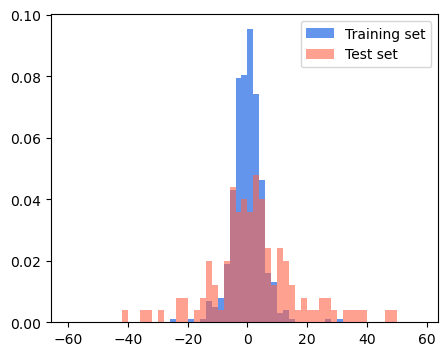

In [12]:
plt.figure(figsize=(5, 4))
plt.hist(best_catb.predict(X_train)-y_train, color='cornflowerblue',
         bins=np.arange(-60, 60, 2), density=True, label= 'Training set' )
plt.hist(best_catb.predict(X_test)-y_test, color='tomato',
         bins=np.arange(-60, 60, 2), density=True, alpha=0.6, label= 'Test set' )
plt.legend()
plt.savefig('CATB-error_distribution.png',dpi=300, bbox_inches='tight')
plt.show()